# **Información preliminar**

## **Determinación de objetivos**
---
---

### **Objetivo general**
Segmentar las MYPEs peruanas registradas en Ruta Digital (2021-2024) mediante técnicas de clustering aplicadas a las seis dimensiones del test de digitalización, identificando perfiles multidimensionales de madurez digital que revelen patrones heterogéneos de capacidades y brechas tecnológicas, contextualizados por variables sectoriales y geográficas derivadas, para orientar estrategias de intervención diferenciadas por parte de PRODUCE.

### **Objetivos específicos**
- OE1.	Caracterizar las MYPEs peruanas de Ruta Digital (2021-2024) mediante análisis exploratorio de datos, examinando la distribución y variabilidad de las puntuaciones en las seis dimensiones del test de digitalización.
- OE2.	Determinar la técnica de clustering más adecuada para segmentar las MYPEs, evaluando diferentes algoritmos y métricas de validación estadística.
- OE3.	Interpretar los perfiles digitales identificados mediante clustering, analizando sus fortalezas y debilidades en las seis dimensiones evaluadas, contextualizando los resultados con variables sectoriales y geográficas derivadas, para destacar necesidades específicas de intervención focalizada.


## **Metodología PRODUCE**
---
---

### **DIG_GENERAL**

'DIG_GENERAL' = <br>0.20 'GESTION_EMPRESARIAL' + <br>0.25 'COMERCIO_ELECTRONICO' + <br>0.10 'ANALISIS_DE_DATOS' + <br>0.30 'MARKETING_DIGITAL' + <br>0.05 'MEDIOS_DE_PAGO' + <br>0.10 'FINANZAS'

### **NIVEL_DIGITALIZACION**

NIVEL_DIGITALIZACION asignado por DIG_GENERAL (Rango de valores)
- De	0.0 a 25.0: 'Inicial'
- De 26.0 a 50.0: 'Básico'
- De 51.0 a 75.0: 'Intermedio'
- De 76.0 a 100.0: 'Avanzado'

### **DATASET**

- Ministerio de la Produccion - PRODUCE, 2025 https://datosabiertos.gob.pe/dataset/registro-de-mypes-que-culminaron-el-test-de-digitalizaci%C3%B3n-en-la-plataforma-ruta-digital

# **1. Análisis de resultados del Objetivo Específico 1**

## **1.1. Carga del dataset original**
---
---

In [1]:
# Importar librerías para la visualización general y el análisis de datos
import pandas as pd
import numpy as np
from datetime import datetime
import io
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Cargar el archivo con codificación Latin-1 y separador de barra vertical
df = pd.read_csv("/content/DS8_RUTADIGITAL2021al2024_anonimizado.csv", encoding="latin1", sep="|", decimal=",")

# Agregar columna ID como índice global de registros, empezando en 1
df.insert(0, "ID", range(1, len(df) + 1))

# Convertir columnas de fechas al formato datetime
date_columns = ["FECHA_REGISTRO", "FECHA_INICIO", "FECHA_FIN", "FECHA_PUB_PNDA"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format="%Y%m%d", errors="coerce")

# Convertir columnas numéricas con comas como separador decimal al formato float
numeric_columns = ["DIG_GENERAL",
                   "GESTION_EMPRESARIAL",
                   "COMERCIO_ELECTRONICO",
                   "ANALISIS_DE_DATOS",
                   "MARKETING_DIGITAL",
                   "MEDIOS_DE_PAGO",
                   "FINANZAS"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Mostrar la información general del dataframe (tamaño, tipos de variables, primeras filas)
print("Tamaño del dataframe original:\n" + "=" * 100)
print(df.shape)
print("\nInformación actualizada del dataframe original:\n" + "=" * 100)
print(df.info())
print("\nPrimeras filas del dataframe original:\n" + "=" * 100)
df.head()

Tamaño del dataframe original:
(13944, 24)

Información actualizada del dataframe original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        13944 non-null  int64         
 1   ANIO                      13944 non-null  int64         
 2   CIIU                      13944 non-null  object        
 3   DESCRIPCION_CIIU          13941 non-null  object        
 4   RAZON_SOCIAL_ANONIMIZADA  13944 non-null  object        
 5   TIPO                      13944 non-null  object        
 6   DEPARTAMENTO              13944 non-null  object        
 7   PROVINCIA                 13944 non-null  object        
 8   DISTRITO                  13944 non-null  object        
 9   UBIGEO                    13944 non-null  int64         
 10  NIVEL_DIGITALIZACION      13944 non-null  object  

ID  ANIO   CIIU                    DESCRIPCION_CIIU  \
0   1  2022  18100          FAB. DE PRENDAS DE VESTIR.   
1   2  2021  55205     RESTAURANTES, BARES Y CANTINAS.   
2   3  2022  55205     RESTAURANTES, BARES Y CANTINAS.   
3   4  2022  18100          FAB. DE PRENDAS DE VESTIR.   
4   5  2022  92192  OTRAS ACTIVID.ENTRETENIMIENTO NCP.   

                            RAZON_SOCIAL_ANONIMIZADA      TIPO DEPARTAMENTO  \
0  5325E51F720E0A8F8C71188DAE1C4AC311713DDBBF8BDE...  JURIDICA  LA LIBERTAD   
1  20E1926945D02E102075B60FB7F40A4ED071618C9B0BEB...   NATURAL  LA LIBERTAD   
2  7B2624A048B4437F2CE51B1F16E2BAF8EC454566477EAF...   NATURAL  LA LIBERTAD   
3  2315EC15C77EC0110FC24C7F7F9AA8ED150C006E2394C4...  JURIDICA  LA LIBERTAD   
4  2E0D8F3A258AA02E0D72923ECCD89142EFBB76B8550A36...   NATURAL  LA LIBERTAD   

  PROVINCIA              DISTRITO  UBIGEO  ... ANALISIS_DE_DATOS  \
0  TRUJILLO  VICTOR LARCO HERRERA  130111  ...               0.0   
1  TRUJILLO  VICTOR LARCO HERRERA  130111  ...              50.0   
2  TRUJILLO  VICTOR LARCO HERRERA  130111  ...               0.0   
3  TRUJILLO  VICTOR LARCO HERRERA  130111  ...              50.0   
4  TRUJILLO  VICTOR LARCO HERRERA  130111  ...               0.0   

   MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  FECHA_INICIO  FECHA_FIN  \
0               22.0            25.0     25.00    2022-07-22 2022-07-22   
1               27.0            25.0     31.25    2021-12-06 2021-12-06   
2               32.0            50.0     37.50    2022-07-31 2022-07-31   
3               22.0            25.0     56.25    2022-11-10 2022-12-10   
4               45.0            25.0     31.25    2022-04-21 2022-04-21   

   TIEMPO_DEMORA_MINUTOS  FECHA_REGISTRO AUT_PUBLICIDAD FECHA_PUB_PNDA  
0                     93      2022-07-22             SI     2025-03-06  
1                      1      2021-12-06             SI     2025-03-06  
2                      2      2021-03-07             SI     2025-03-06  
3                  42915      2021-03-02             SI     2025-03-06  
4                     15      2022-04-21             SI     2025-03-06  

[5 rows x 24 columns]

## **1.2. Análisis exploratorio inicial**
---
---

### **1.2.1. Variables de recolección**
---
Variable **Año** (ANIO)

Valores únicos de la variable
[2022 2021 2023 2024] 

Distribución de la variable ANIO


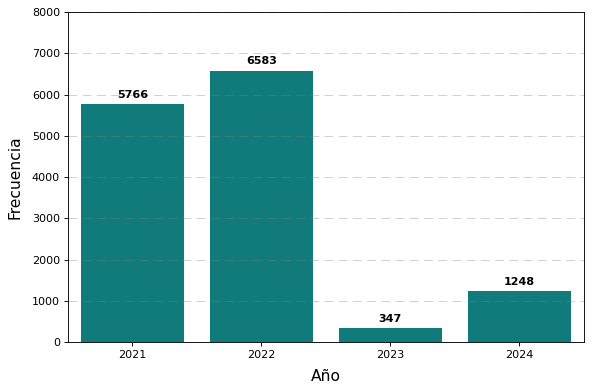

In [3]:
# Mostrar valores únicos de la variable
print("Valores únicos de la variable\n" + "=" * 100)
print(df["ANIO"].unique(), "\n")

# Crear el gráfico de barras con la frecuencia de cada categoría
print("Distribución de la variable ANIO\n" + "=" * 100)
plt.figure(figsize=(7.5, 5), dpi=80)
var_counts = df["ANIO"].value_counts().sort_index()
ax = sns.barplot(x=var_counts.index, y=var_counts.values, color="darkcyan")

for i, v in enumerate(var_counts.values):
    ax.text(i, v + 150, str(v), ha="center", fontweight="bold")

plt.xlabel("Año", fontsize=14, labelpad=8)
plt.ylabel("Frecuencia", fontsize=14, labelpad=8)
ax.yaxis.grid(True)
ax.grid(axis="y", color="gray", linewidth=0.8, alpha=0.4, linestyle=(0, (10, 6)))
plt.ylim(0, 8000)
plt.tight_layout()
plt.show()

Variable **Tipo de usuario** (TIPO)

Valores únicos de la variable
['JURIDICA' 'NATURAL'] 

Distribución de la variable TIPO


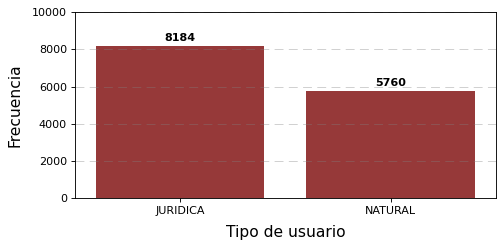

In [4]:
# Mostrar valores únicos de la variable
print("Valores únicos de la variable\n" + "=" * 100)
print(df["TIPO"].unique(), "\n")

# Crear el gráfico de barras con la frecuencia de cada categoría
print("Distribución de la variable TIPO\n" + "=" * 100)
plt.figure(figsize=(6.4, 3.2), dpi=80)
var_counts = df["TIPO"].value_counts().sort_index()
ax = sns.barplot(x=var_counts.index, y=var_counts.values, color="brown")

for i, v in enumerate(var_counts.values):
    ax.text(i, v + 250, str(v), ha="center", fontweight="bold")

plt.xlabel("Tipo de usuario", fontsize=14, labelpad=8)
plt.ylabel("Frecuencia", fontsize=14, labelpad=8)
ax.yaxis.grid(True)
ax.grid(axis="y", color="gray", linewidth=0.8, alpha=0.4, linestyle=(0, (10, 6)))
plt.ylim(0, 10000)
plt.tight_layout()
plt.show()

Variable **Autorización de publicidad** (AUT_PUBLICIDAD)

Valores únicos de la variable
['SI' 'NO'] 

Distribución de la variable AUT_PUBLICIDAD


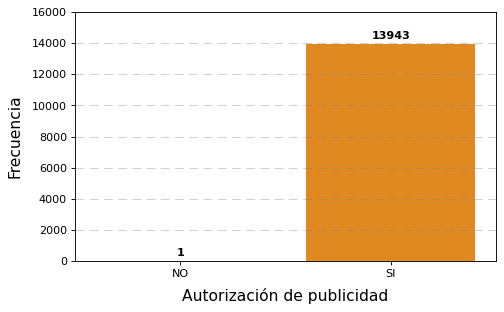

In [5]:
# Mostrar valores únicos de la variable
print("Valores únicos de la variable\n" + "=" * 100)
print(df["AUT_PUBLICIDAD"].unique(), "\n")

# Crear el gráfico de barras con la frecuencia de cada categoría
print("Distribución de la variable AUT_PUBLICIDAD\n" + "=" * 100)
plt.figure(figsize=(6.4, 4), dpi=80)
var_counts = df["AUT_PUBLICIDAD"].value_counts().sort_index()
ax = sns.barplot(x=var_counts.index, y=var_counts.values, color="darkorange")

for i, v in enumerate(var_counts.values):
    ax.text(i, v + 350, str(v), ha="center", fontweight="bold")

plt.xlabel("Autorización de publicidad", fontsize=14, labelpad=8)
plt.ylabel("Frecuencia", fontsize=14, labelpad=8)
ax.yaxis.grid(True)
ax.grid(axis="y", color="gray", linewidth=0.8, alpha=0.4, linestyle=(0, (10, 6)))
plt.ylim(0, 16000)
plt.tight_layout()
plt.show()

### **1.2.2. Variables geográficas**
---
Variable **DEPARTAMENTO** <br>
Variable **PROVINCIA** <br>
Variable **DISTRITO** <br>
Variable **UBIGEO**

In [6]:
# Mostrar la cantidad de valores de cada variable
print("Cantidad de registros válidos por variable\n" + "=" * 100)
geographic_columns = ["DEPARTAMENTO", "PROVINCIA", "DISTRITO", "UBIGEO"]
for col in geographic_columns:
    print(f"Cantidad total de valores en {col}:", df[col].shape[0])
print()

# Mostrar la cantidad de valores únicos de cada variable
print("Cantidad de valores únicos de cada variable\n" + "=" * 100)
for col in geographic_columns:
    print(f"{col} - valores únicos: {df[col].nunique()}")
print()

# Mostrar valores únicos de las variables
for col in geographic_columns:
    print(f"Valores únicos de la variable {col}\n" + "=" * 100)
    unique_values = df[col].unique()
    if df[col].dtype == "object":
        sorted_values = np.sort(unique_values)
    else:
        sorted_values = np.sort(unique_values.astype(int))
    print(sorted_values, "\n")

Cantidad de registros válidos por variable
Cantidad total de valores en DEPARTAMENTO: 13944
Cantidad total de valores en PROVINCIA: 13944
Cantidad total de valores en DISTRITO: 13944
Cantidad total de valores en UBIGEO: 13944

Cantidad de valores únicos de cada variable
DEPARTAMENTO - valores únicos: 25
PROVINCIA - valores únicos: 177
DISTRITO - valores únicos: 663
UBIGEO - valores únicos: 696

Valores únicos de la variable DEPARTAMENTO
['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO'
 'SAN MARTIN' 'TACNA' 'TUMBES' 'UCAYALI'] 

Valores únicos de la variable PROVINCIA
['ABANCAY' 'ACOBAMBA' 'AIJA' 'ALTO AMAZONAS' 'AMBO' 'ANDAHUAYLAS'
 'ANGARAES' 'ANTA' 'ANTABAMBA' 'AREQUIPA' 'ASCOPE' 'ATALAYA' 'AYMARAES'
 'AZANGARO' 'BAGUA' 'BARRANCA' 'BELLAVISTA' 'BOLIVAR' 'BOLOGNESI'
 'BONGARA' 'CAJABAMBA' 'CAJAMARCA' 'CAJATAMBO' 'CALCA'

Distribución de la variable DEPARTAMENTO


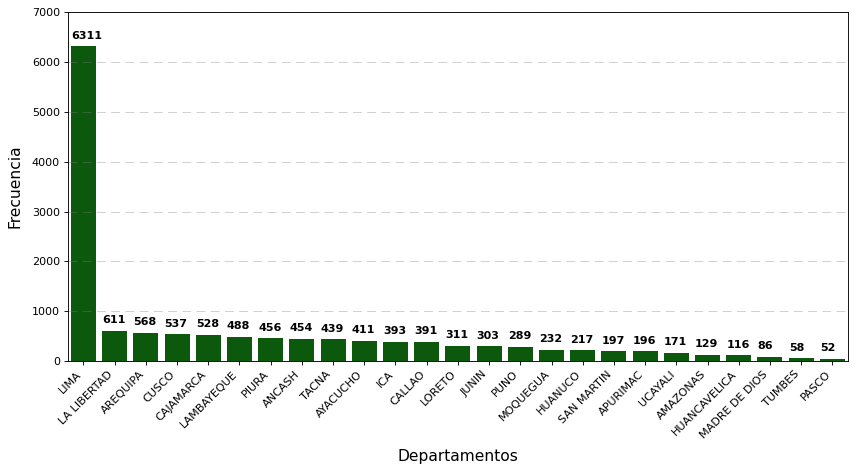

In [7]:
# Crear el gráfico de barras con la frecuencia de cada categoría
print("Distribución de la variable DEPARTAMENTO\n" + "=" * 100)
plt.figure(figsize=(10.8, 6), dpi=80)
var_counts = df["DEPARTAMENTO"].value_counts()
ax = sns.barplot(x=var_counts.index, y=var_counts.values, color="darkgreen")

for i, v in enumerate(var_counts.values):
    ax.text(i - 0.4, v + 150, str(v), ha="left", fontweight="bold")

plt.xlabel("Departamentos", fontsize=14, labelpad=8)
plt.ylabel("Frecuencia", fontsize=14, labelpad=8)
ax.yaxis.grid(True)
ax.grid(axis="y", color="gray", linewidth=0.8, alpha=0.4, linestyle=(0, (10, 6)))
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 7000)
plt.tight_layout()
plt.show()

### **1.2.3. Variables temporales**
---
Variable **FECHA_INICIO** <br>
Variable **FECHA_FIN** <br>
Variable **FECHA_REGISTRO** <br>
Variable **FECHA_PUB_PNDA**

In [8]:
# Mostrar la cantidad de valores de cada variable
print("Cantidad de registros válidos por variable\n" + "=" * 100)
for col in date_columns:
    print(f"Cantidad total de valores en {col}:", df[col].shape[0])
print()

# Mostrar las primeras filas de los campos especificados
print("Primeras filas de las variables de fechas\n" + "=" * 100)
display(df[date_columns].head())
print()

# Mostrar los valores únicos de la variable "FECHA_PUB_PNDA"
print("Valores únicos de la variable 'FECHA_PUB_PNDA'\n" + "=" * 100)
print(df["FECHA_PUB_PNDA"].unique(), "\n")

# Verificar el cumplimiento del orden cronológico de las fechas
print("Orden cronológico de las fechas para todos los registros\n" + "=" * 100)
valid_condition = (
    (df["FECHA_PUB_PNDA"] >= df["FECHA_FIN"]) &
    (df["FECHA_FIN"] >= df["FECHA_INICIO"]) &
    (df["FECHA_INICIO"] >= df["FECHA_REGISTRO"])).all()

if valid_condition:
    print("✅ En todos los registros se cumple el orden cronológico esperado.")
else:
    print("❌ Hay registros donde NO se cumple el orden cronológico esperado.")

Cantidad de registros válidos por variable
Cantidad total de valores en FECHA_REGISTRO: 13944
Cantidad total de valores en FECHA_INICIO: 13944
Cantidad total de valores en FECHA_FIN: 13944
Cantidad total de valores en FECHA_PUB_PNDA: 13944

Primeras filas de las variables de fechas


FECHA_REGISTRO FECHA_INICIO  FECHA_FIN FECHA_PUB_PNDA
0     2022-07-22   2022-07-22 2022-07-22     2025-03-06
1     2021-12-06   2021-12-06 2021-12-06     2025-03-06
2     2021-03-07   2022-07-31 2022-07-31     2025-03-06
3     2021-03-02   2022-11-10 2022-12-10     2025-03-06
4     2022-04-21   2022-04-21 2022-04-21     2025-03-06


Valores únicos de la variable 'FECHA_PUB_PNDA'
<DatetimeArray>
['2025-03-06 00:00:00']
Length: 1, dtype: datetime64[ns] 

Orden cronológico de las fechas para todos los registros
✅ En todos los registros se cumple el orden cronológico esperado.


Variable **TIEMPO_DEMORA_MINUTOS**

Cantidad de registros válidos de la variable
13944 

Cantidad de valores únicos de la variable
4529 

Valores únicos de la variable
[    93      1      2 ... 476749 313553 296391] 

Diagramas de cajas de Tiempo de Demora (minutos) por intervalos


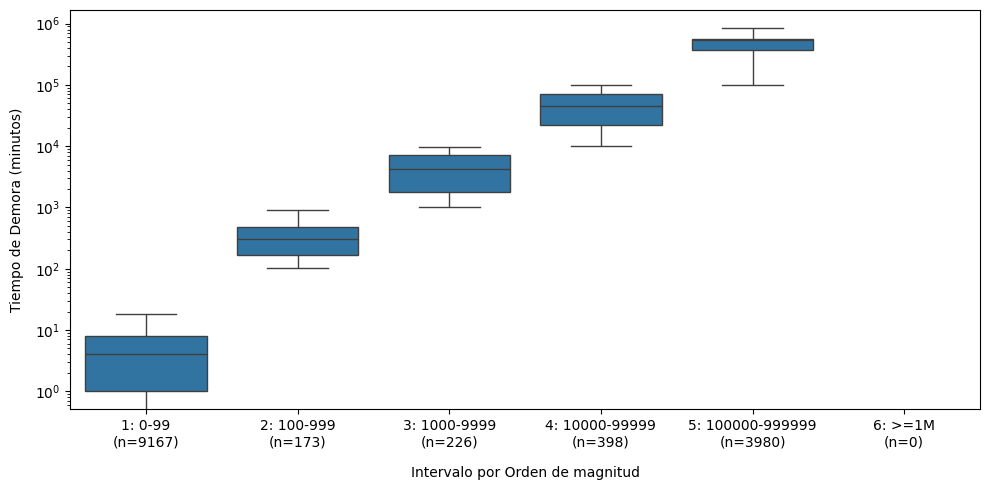

In [9]:
# Mostrar la cantidad de valores de la variable
print("Cantidad de registros válidos de la variable\n" + "=" * 100)
print(df["TIEMPO_DEMORA_MINUTOS"].shape[0], "\n")

# Mostrar la cantidad de valores únicos de la variable
print("Cantidad de valores únicos de la variable\n" + "=" * 100)
print(df["TIEMPO_DEMORA_MINUTOS"].nunique(), "\n")

# Mostrar valores únicos de la variable
print("Valores únicos de la variable\n" + "=" * 100)
print(df["TIEMPO_DEMORA_MINUTOS"].unique(), "\n")

# Clasificar los valores en intervalos basados en órdenes de magnitud
def clasificar_intervalo(valor):
    if valor < 100:
        return "1: 0-99"
    elif valor < 1000:
        return "2: 100-999"
    elif valor < 10000:
        return "3: 1000-9999"
    elif valor < 100000:
        return "4: 10000-99999"
    elif valor < 1000000:
        return "5: 100000-999999"
    else:
        return "6: >=1M"

interval_order = ["1: 0-99", "2: 100-999", "3: 1000-9999", "4: 10000-99999", "5: 100000-999999", "6: >=1M"]

df_temporal = df.copy()
df_temporal["Intervalo"] = df_temporal["TIEMPO_DEMORA_MINUTOS"].apply(clasificar_intervalo)
df_temporal["Intervalo"] = pd.Categorical(df_temporal["Intervalo"], categories=interval_order, ordered=True)

# Contar registros por intervalo y crear etiquetas personalizadas
conteo = df_temporal["Intervalo"].value_counts().reindex(interval_order)
etiquetas_personalizadas = [f"{intervalo}\n(n={conteo[intervalo]})" for intervalo in interval_order]

# Crear el gráfico de cajas y bigotes con los intervalos de valores ordenados
print("Diagramas de cajas de Tiempo de Demora (minutos) por intervalos\n" + "=" * 100)
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Intervalo", y="TIEMPO_DEMORA_MINUTOS", data=df_temporal, showfliers=False)
ax.set_yscale("log")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(etiquetas_personalizadas)
ax.set_xlabel("Intervalo por Orden de magnitud", labelpad=12)
plt.ylabel("Tiempo de Demora (minutos)", labelpad=8)
plt.tight_layout()
plt.show()

### **1.2.4. Variables del sector empresarial**
---
Variable **CIIU** <br>
Variable **DESCRIPCION_CIIU**

In [10]:
# Mostrar la cantidad de valores de cada variable
print("Cantidad de registros válidos por variable\n" + "=" * 100)
for col in ["CIIU", "DESCRIPCION_CIIU"]:
    print(f"Cantidad total de valores en {col}:", df[col].shape[0])
print()

# Crear una nueva columna concatenando los valores de CIIU y DESCRIPCION_CIIU
df_temporal["CIIU_COMPLETO"] = df_temporal["CIIU"] + " - " + df_temporal["DESCRIPCION_CIIU"]
CIIU_columns = ["CIIU", "DESCRIPCION_CIIU", "CIIU_COMPLETO"]

# Mostrar la cantidad de valores únicos y nulos de cada variable
print("Cantidad de valores únicos y nulos de cada variable\n" + "=" * 100)
for col in CIIU_columns:
    print(f"{col}:")
    print(f"  - Valores únicos: {df_temporal[col].nunique()}")
    print(f"  - Valores nulos:  {df_temporal[col].isna().sum()}\n")

# Mostrar los registros de DESCRIPCION_CIIU con valores nulos
print("Registros con valores nulos según DESCRIPCION_CIIU\n" + "=" * 100)
display(df_temporal[df_temporal["DESCRIPCION_CIIU"].isna()])
print()

# Mostrar los registros de CIIU con valores "-" asociados a valores nulos
print("Registros con valores nulos según CIIU\n" + "=" * 100)
display(df_temporal[df_temporal["CIIU"].str.contains("-", na=False)])

Cantidad de registros válidos por variable
Cantidad total de valores en CIIU: 13944
Cantidad total de valores en DESCRIPCION_CIIU: 13944

Cantidad de valores únicos y nulos de cada variable
CIIU:
  - Valores únicos: 234
  - Valores nulos:  0

DESCRIPCION_CIIU:
  - Valores únicos: 233
  - Valores nulos:  3

CIIU_COMPLETO:
  - Valores únicos: 233
  - Valores nulos:  3

Registros con valores nulos según DESCRIPCION_CIIU


ID  ANIO   CIIU DESCRIPCION_CIIU  \
9610    9611  2022  -                  NaN   
11101  11102  2021  -                  NaN   
11385  11386  2022  -                  NaN   

                                RAZON_SOCIAL_ANONIMIZADA      TIPO  \
9610   B1F9E494F03A45C46C145FB020557CCC53B17A74E9C6EF...   NATURAL   
11101  C1159A1438BCB482708CE64829C7F5238C21B58FF74C95...  JURIDICA   
11385  0D00DFC64D73E132DFEF27A7D0184C67ACA887ED726B42...   NATURAL   

      DEPARTAMENTO    PROVINCIA     DISTRITO  UBIGEO  ... MEDIOS_DE_PAGO  \
9610      AMAZONAS  CHACHAPOYAS  MOLINOPAMPA   10114  ...           25.0   
11101     AYACUCHO     HUAMANGA     TAMBILLO   50113  ...            0.0   
11385    CAJAMARCA        CHOTA        CHOTA   60401  ...           25.0   

       FINANZAS  FECHA_INICIO  FECHA_FIN  TIEMPO_DEMORA_MINUTOS  \
9610      56.25    2022-12-08 2022-12-08                      1   
11101     25.00    2021-07-12 2021-07-12                      4   
11385     43.75    2022-12-23 2022-12-23                      1   

       FECHA_REGISTRO  AUT_PUBLICIDAD  FECHA_PUB_PNDA Intervalo CIIU_COMPLETO  
9610       2022-04-13              SI      2025-03-06   1: 0-99           NaN  
11101      2021-07-12              SI      2025-03-06   1: 0-99           NaN  
11385      2022-03-22              SI      2025-03-06   1: 0-99           NaN  

[3 rows x 26 columns]


Registros con valores nulos según CIIU


ID  ANIO   CIIU DESCRIPCION_CIIU  \
9610    9611  2022  -                  NaN   
11101  11102  2021  -                  NaN   
11385  11386  2022  -                  NaN   

                                RAZON_SOCIAL_ANONIMIZADA      TIPO  \
9610   B1F9E494F03A45C46C145FB020557CCC53B17A74E9C6EF...   NATURAL   
11101  C1159A1438BCB482708CE64829C7F5238C21B58FF74C95...  JURIDICA   
11385  0D00DFC64D73E132DFEF27A7D0184C67ACA887ED726B42...   NATURAL   

      DEPARTAMENTO    PROVINCIA     DISTRITO  UBIGEO  ... MEDIOS_DE_PAGO  \
9610      AMAZONAS  CHACHAPOYAS  MOLINOPAMPA   10114  ...           25.0   
11101     AYACUCHO     HUAMANGA     TAMBILLO   50113  ...            0.0   
11385    CAJAMARCA        CHOTA        CHOTA   60401  ...           25.0   

       FINANZAS  FECHA_INICIO  FECHA_FIN  TIEMPO_DEMORA_MINUTOS  \
9610      56.25    2022-12-08 2022-12-08                      1   
11101     25.00    2021-07-12 2021-07-12                      4   
11385     43.75    2022-12-23 2022-12-23                      1   

       FECHA_REGISTRO  AUT_PUBLICIDAD  FECHA_PUB_PNDA Intervalo CIIU_COMPLETO  
9610       2022-04-13              SI      2025-03-06   1: 0-99           NaN  
11101      2021-07-12              SI      2025-03-06   1: 0-99           NaN  
11385      2022-03-22              SI      2025-03-06   1: 0-99           NaN  

[3 rows x 26 columns]

Variable **RAZON_SOCIAL_ANONIMIZADA**

In [11]:
# Mostrar la cantidad de valores, únicos y nulos de la variable
print("Cantidad de registros válidos de la variable\n" + "=" * 100)
print(df["TIEMPO_DEMORA_MINUTOS"].shape[0], "\n")
print("Cantidad de valores únicos de la variable\n" + "=" * 100)
print(df["RAZON_SOCIAL_ANONIMIZADA"].nunique(), "\n")
print("Cantidad de valores nulos de la variable\n" + "=" * 100)
print(df["RAZON_SOCIAL_ANONIMIZADA"].isna().sum(), "\n")

# Mostrar valores únicos de la variable
print("Valores únicos de la variable\n" + "=" * 100)
print(df["RAZON_SOCIAL_ANONIMIZADA"].unique(), "\n")

# Identificar la cantidad de duplicados y sus valores correspondientes
df_duplicados = df_temporal[df.duplicated(subset=["RAZON_SOCIAL_ANONIMIZADA"], keep=False)]
print("Cantidad de razones sociales duplicadas\n" + "=" * 100)
print(df_duplicados["RAZON_SOCIAL_ANONIMIZADA"].nunique(), "\n")

print("Razones sociales duplicadas\n" + "=" * 100)
registros_duplicados = df_duplicados["RAZON_SOCIAL_ANONIMIZADA"].unique()
print(registros_duplicados, "\n")

# Filtrar los registros con razones sociales duplicadas desde el dataset original
dup_columns = ["ID", "CIIU", "DESCRIPCION_CIIU", "RAZON_SOCIAL_ANONIMIZADA", "NIVEL_DIGITALIZACION", "FECHA_FIN"]
df_duplicados_total = df_temporal[df_temporal["RAZON_SOCIAL_ANONIMIZADA"].isin(registros_duplicados)][dup_columns]
df_duplicados_total

Cantidad de registros válidos de la variable
13944 

Cantidad de valores únicos de la variable
13936 

Cantidad de valores nulos de la variable
0 

Valores únicos de la variable
['5325E51F720E0A8F8C71188DAE1C4AC311713DDBBF8BDE5BDFC4AF0C1B3BCC54'
 '20E1926945D02E102075B60FB7F40A4ED071618C9B0BEB2DC3E82EDCAC79AB10'
 '7B2624A048B4437F2CE51B1F16E2BAF8EC454566477EAFB502ED790C68CDAA39' ...
 'DBC273653C5ECB93D64AB6AC4BCBE172199DB6E786A1399C7D9EBC79A2313073'
 'FDF867CEF84B3FB5414743BE9A593D035F1CE38B673E0A8E4DEE377A01BA6E93'
 'F62299530BEAFD21EC62C2E4FE657BDED0039BFE645C8A14985D83DA23AD731A'] 

Cantidad de razones sociales duplicadas
8 

Razones sociales duplicadas
['6DD7BE067E13E65A8876B952C892DD10A850AD115D607A024B964F89C2A7260C'
 '4F619EB514681444377A3A5DC30D880B64C66A4AB696B38DCCDD6057566B1F9A'
 '95568D5C34EC5D48D65E83D56331F233311F76DF439E37C77F4BE958DBC76DF8'
 '1E6EF75264C7985450AA616E0D1C6BADBA7501042350D420562B626FB793B4AB'
 'DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865F6DA5AF5AF3D5C6

ID   CIIU                          DESCRIPCION_CIIU  \
89        90  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
779      780  52511   VTA. MIN. DE CASAS DE VENTA POR CORREO.   
3928    3929  52310  VTA.  MIN. PROD. FARMAC. Y ART. TOCADOR.   
5608    5609  51906             VTA. MAY. DE OTROS PRODUCTOS.   
6554    6555  51109   VTA.  MAY. A CAMBIO DE UNA RETRIBUCION.   
8076    8077  36996     OTRAS INDUSTRIAS  MANUFACTURERAS NCP.   
8186    8187  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
8391    8392  62103            TRANSPORTE  REGULAR VIA AEREA.   
8654    8655  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
8762    8763  52511   VTA. MIN. DE CASAS DE VENTA POR CORREO.   
9109    9110  52310  VTA.  MIN. PROD. FARMAC. Y ART. TOCADOR.   
9252    9253  51906             VTA. MAY. DE OTROS PRODUCTOS.   
9360    9361  51109   VTA.  MAY. A CAMBIO DE UNA RETRIBUCION.   
9548    9549  36996     OTRAS INDUSTRIAS  MANUFACTURERAS NCP.   
9554    9555  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
11849  11850  62103            TRANSPORTE  REGULAR VIA AEREA.   

                                RAZON_SOCIAL_ANONIMIZADA NIVEL_DIGITALIZACION  \
89     6DD7BE067E13E65A8876B952C892DD10A850AD115D607A...               Básico   
779    4F619EB514681444377A3A5DC30D880B64C66A4AB696B3...               Básico   
3928   95568D5C34EC5D48D65E83D56331F233311F76DF439E37...           Intermedio   
5608   1E6EF75264C7985450AA616E0D1C6BADBA7501042350D4...               Básico   
6554   DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865...           Intermedio   
8076   467309B89298BCBF5A94BFB5A6C88F58186D3D9CA6C8AB...              Inicial   
8186   B51EA87D8451D68DCA79D37EA4DF052030EE8095150352...               Básico   
8391   3FC33CB929D03A4B0E93FDAAD01BBB27257D6FBDB56338...           Intermedio   
8654   6DD7BE067E13E65A8876B952C892DD10A850AD115D607A...               Básico   
8762   4F619EB514681444377A3A5DC30D880B64C66A4AB696B3...             Avanzado   
9109   95568D5C34EC5D48D65E83D56331F233311F76DF439E37...             Avanzado   
9252   1E6EF75264C7985450AA616E0D1C6BADBA7501042350D4...           Intermedio   
9360   DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865...               Básico   
9548   467309B89298BCBF5A94BFB5A6C88F58186D3D9CA6C8AB...               Básico   
9554   B51EA87D8451D68DCA79D37EA4DF052030EE8095150352...               Básico   
11849  3FC33CB929D03A4B0E93FDAAD01BBB27257D6FBDB56338...              Inicial   

       FECHA_FIN  
89    2021-06-23  
779   2022-10-06  
3928  2021-11-08  
5608  2022-12-28  
6554  2022-12-14  
8076  2022-06-28  
8186  2022-12-06  
8391  2024-12-16  
8654  2024-12-12  
8762  2024-12-13  
9109  2024-12-13  
9252  2024-12-17  
9360  2024-12-17  
9548  2024-12-18  
9554  2024-03-29  
11849 2022-03-08

### **1.2.5. Variables de la encuesta**
---
Variable **NIVEL_DIGITALIZACION** <br>

Valores únicos de la variable
['Inicial' 'Básico' 'Intermedio' 'Avanzado' 'Experto'] 

Distribución de la variable NIVEL_DIGITALIZACION


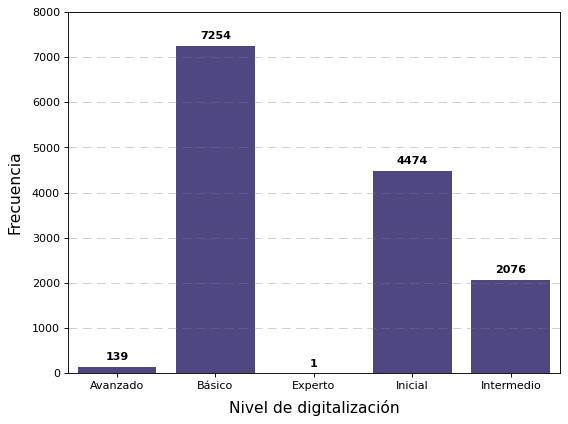

In [12]:
# Mostrar valores únicos de la variable
print("Valores únicos de la variable\n" + "=" * 100)
print(df["NIVEL_DIGITALIZACION"].unique(), "\n")

# Crear el gráfico de barras con la frecuencia de cada categoría
print("Distribución de la variable NIVEL_DIGITALIZACION\n" + "=" * 100)
plt.figure(figsize=(7.2, 5.4), dpi=80)
var_counts = df["NIVEL_DIGITALIZACION"].value_counts().sort_index()
ax = sns.barplot(x=var_counts.index, y=var_counts.values, color="darkslateblue")

for i, v in enumerate(var_counts.values):
    ax.text(i, v + 150, str(v), ha="center", fontweight="bold")

plt.xlabel("Nivel de digitalización", fontsize=14, labelpad=8)
plt.ylabel("Frecuencia", fontsize=14, labelpad=8)
ax.yaxis.grid(True)
ax.grid(axis="y", color="gray", linewidth=0.8, alpha=0.4, linestyle=(0, (10, 6)))
plt.ylim(0, 8000)
plt.tight_layout()
plt.show()

**Relación entre las variables numéricas NIVEL_DIGITALIZACION y DIG_GENERAL**

In [13]:
# Agrupar registros por NIVEL_DIGITALIZACION y calcular el valor mínimo y máximo de DIG_GENERAL
level_groups = df.groupby("NIVEL_DIGITALIZACION")["DIG_GENERAL"].agg(["min", "max"])

# Mostrar los grupos ordenados por el valor mínimo de DIG_GENERAL (de menor a mayor)
print("Rango de valores de DIG_GENERAL por NIVEL_DIGITALIZACION\n" + "=" * 100)
level_groups = level_groups.sort_values(by="min", ascending=True)
print(level_groups)

Rango de valores de DIG_GENERAL por NIVEL_DIGITALIZACION
                        min    max
NIVEL_DIGITALIZACION              
Inicial                 1.0   25.0
Básico                 26.0   50.0
Intermedio             51.0   75.0
Avanzado               76.0   96.0
Experto               100.0  100.0


Variable **DIG_GENERAL** <br>
Variable **GESTION_EMPRESARIAL** <br>
Variable **COMERCIO_ELECTRONICO** <br>
Variable **ANALISIS_DE_DATOS** <br>
Variable **MARKETING_DIGITAL** <br>
Variable **MEDIOS_DE_PAGO** <br>
Variable **FINANZAS**

Medidas de tendencia central y dispersión de las variables numéricas


DIG_GENERAL  GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  \
count  13944.000000         13944.000000          13944.000000   
mean      34.324943            35.416116             34.878209   
std       16.401363            20.618634             30.009379   
min        1.000000             0.000000              0.000000   
25%       21.000000            20.830000             12.500000   
50%       35.000000            33.340000             37.500000   
75%       46.000000            50.000000             56.250000   
max      100.000000           106.250000            125.000000   

       ANALISIS_DE_DATOS  MARKETING_DIGITAL  MEDIOS_DE_PAGO      FINANZAS  
count       13944.000000       13944.000000    13944.000000  13944.000000  
mean           35.667673          29.730709       29.611872     45.423246  
std            29.235752          17.612022       21.298862     21.389881  
min             0.000000           0.000000        0.000000      6.000000  
25%             0.000000          16.000000       25.000000     31.250000  
50%            25.000000          27.000000       25.000000     50.000000  
75%            50.000000          41.000000       50.000000     56.250000  
max           133.330000         100.000000      141.670000    100.000000


Cantidad de valores únicos de cada variable numérica
DIG_GENERAL          - valores únicos: 97
GESTION_EMPRESARIAL  - valores únicos: 57
COMERCIO_ELECTRONICO - valores únicos: 23
ANALISIS_DE_DATOS    - valores únicos: 13
MARKETING_DIGITAL    - valores únicos: 87
MEDIOS_DE_PAGO       - valores únicos: 13
FINANZAS             - valores únicos: 35

Valores únicos de la variable DIG_GENERAL
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96. 100.] 

Valores únicos de la variable GESTION_EMPRESARIAL
[  0.     4.     4.17   6.25   8.     8.33  12.5   13.    16.67 

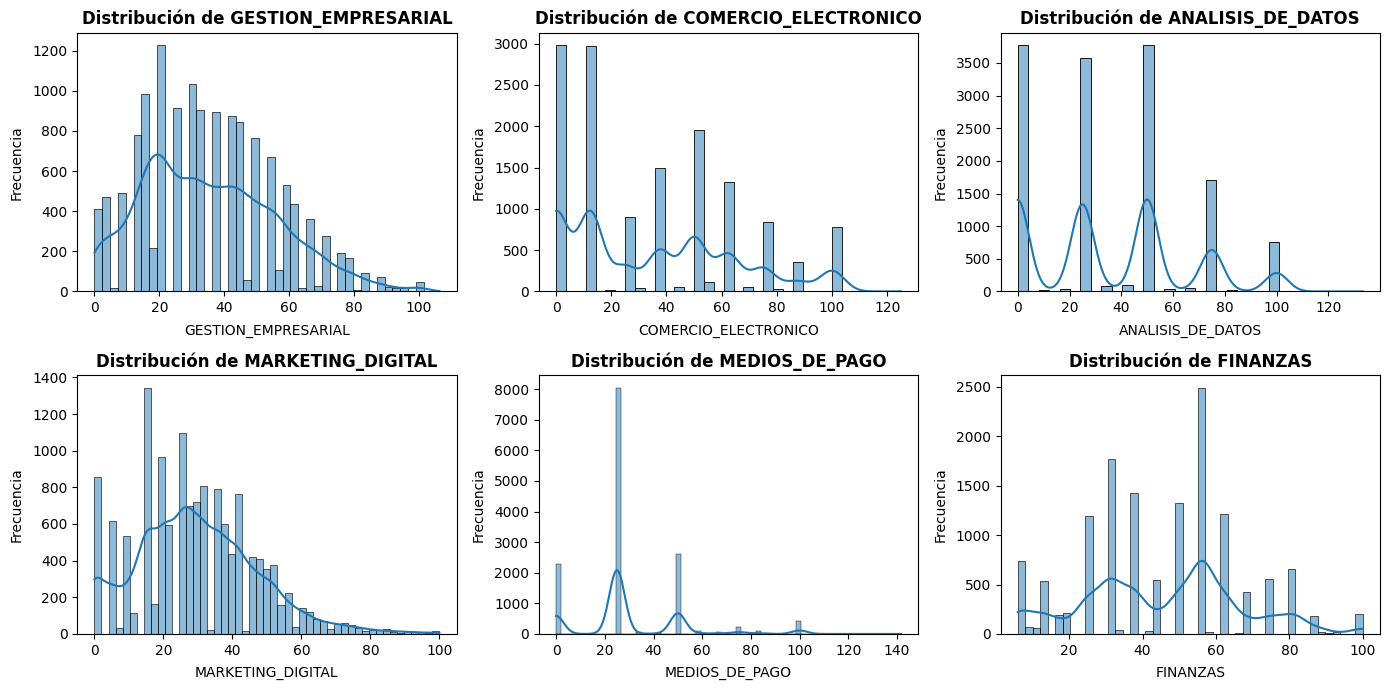

In [14]:
# Mostrar las estadísticas descriptivas de las variables numéricas
print("Medidas de tendencia central y dispersión de las variables numéricas\n" + "=" * 100)
display(df[numeric_columns].describe())
print()

# Mostrar la cantidad de valores únicos de cada variable numérica
print("Cantidad de valores únicos de cada variable numérica\n" + "=" * 100)
max_len = max(len(col) for col in numeric_columns)
for col in numeric_columns:
    print(f"{col.ljust(max_len)} - valores únicos: {df[col].nunique()}")
print()

# Mostrar los valores únicos de cada variable numérica
for col in numeric_columns:
  print(f"Valores únicos de la variable {col}\n" + "=" * 100)
  print(np.sort(df[col].unique()), "\n")

# Conteo de ceros por columna y por fila en las dimensiones del test RUTA DIGITAL
dimensiones = [col for col in df.select_dtypes(include="float64").columns if col != "DIG_GENERAL"]
conteo_ceros = (df[dimensiones] == 0).sum().sort_values(ascending=False)
print("Cantidad de ceros por dimensión numérica del test\n" + "=" * 100)
print(conteo_ceros, "\n")

ceros_por_fila = (df[dimensiones] == 0).sum(axis=1)

# Conteo de registros con exactamente de entre 0 a 6 ceros
for k in range(0, 7):
    cantidad = (ceros_por_fila == k).sum()
    print(f"Registros con exactamente {k} ceros en esas columnas: {cantidad}")
print()

# Visualizar la distribución de cada variable mediante histogramas
print("Distribución de cada variable del test mediante histogramas\n" + "=" * 100)
plt.figure(figsize=(14, 7))
for i, dimension in enumerate(dimensiones, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[dimension], kde=True)
    ax = plt.gca()
    plt.title(f"Distribución de {dimension}", fontsize=12, fontweight="bold")
    plt.xlabel(dimension, fontsize=10, labelpad=6)
    plt.ylabel("Frecuencia", fontsize=10, labelpad=6)
plt.tight_layout()
plt.show()

**Análisis de correlaciones entre variables numéricas flotantes**

Matriz de correlación de las variables numéricas de la encuesta


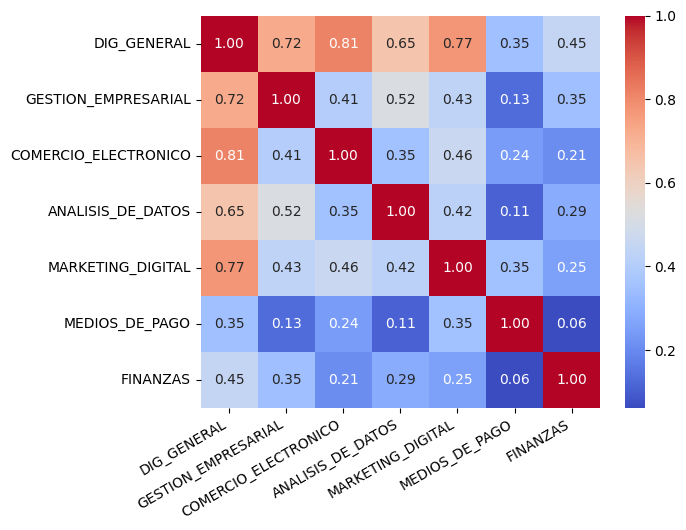

DIG_GENERAL  GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  \
DIG_GENERAL                 1.000                0.722                 0.814   
GESTION_EMPRESARIAL         0.722                1.000                 0.406   
COMERCIO_ELECTRONICO        0.814                0.406                 1.000   
ANALISIS_DE_DATOS           0.650                0.518                 0.352   
MARKETING_DIGITAL           0.774                0.434                 0.464   
MEDIOS_DE_PAGO              0.350                0.129                 0.243   
FINANZAS                    0.449                0.347                 0.206   

                      ANALISIS_DE_DATOS  MARKETING_DIGITAL  MEDIOS_DE_PAGO  \
DIG_GENERAL                       0.650              0.774           0.350   
GESTION_EMPRESARIAL               0.518              0.434           0.129   
COMERCIO_ELECTRONICO              0.352              0.464           0.243   
ANALISIS_DE_DATOS                 1.000              0.422           0.109   
MARKETING_DIGITAL                 0.422              1.000           0.354   
MEDIOS_DE_PAGO                    0.109              0.354           1.000   
FINANZAS                          0.289              0.254           0.062   

                      FINANZAS  
DIG_GENERAL              0.449  
GESTION_EMPRESARIAL      0.347  
COMERCIO_ELECTRONICO     0.206  
ANALISIS_DE_DATOS        0.289  
MARKETING_DIGITAL        0.254  
MEDIOS_DE_PAGO           0.062  
FINANZAS                 1.000

In [15]:
# Matriz de correlación de las variables numéricas de la encuesta
print("Matriz de correlación de las variables numéricas de la encuesta\n" + "=" * 100)
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(7.2, 5.4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
print()

# Mostrar versión numérica del mapa de calor
display(corr_matrix.round(3))

### **1.2.6. Modelo predictivo para validar DIG_GENERAL**
---

In [16]:
# Importar librerías para la validación de la variable DIG_GENERAL
from itertools import combinations
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy.stats import shapiro, kstest, anderson, jarque_bera
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

In [17]:
"""
# Definir las variables y funciones del modelo de predicción
predictoras = ["GESTION_EMPRESARIAL", "COMERCIO_ELECTRONICO", "ANALISIS_DE_DATOS", "MARKETING_DIGITAL", "MEDIOS_DE_PAGO", "FINANZAS"]
objetivo = "DIG_GENERAL"

def validate_data(df): # Validar que el DataFrame contenga las columnas necesarias y maneje valores nulos.
    try:
        required_columns = predictoras + [objetivo]
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            raise ValueError(f"Faltan las columnas: {missing_columns}")
        if df[required_columns].isnull().any().any():
            print("Advertencia: Se encontraron valores nulos. Imputando con la mediana...")
            df[required_columns] = df[required_columns].fillna(df[required_columns].median())
        non_numeric = df[predictoras].select_dtypes(exclude=["float64", "int64"]).columns
        if len(non_numeric) > 0:
            raise ValueError(f"Las columnas {non_numeric} no son numéricas.")
        return df
    except Exception as e:
        raise Exception(f"Error al validar los datos: {e}")

def linear_regression_analysis(X, y): # Realizar los análisis de regresión lineal con y sin intercepto.
    print("="*80 + "\n1. REGRESIÓN LINEAL (MÍNIMOS CUADRADOS ORDINARIOS)\n" + "="*80)

    X_const = sm.add_constant(X)
    model_ols = sm.OLS(y, X_const).fit()
    print("\n1.1. Regresión CON intercepto:\n" + "*"*100)
    print(model_ols.summary())

    coef_ols = model_ols.params[1:]
    print("\nCoeficientes MCO:\n" + "-"*80)
    print(coef_ols.round(4), "\n")

    model_no_intercept = sm.OLS(y, X).fit()
    print("\n1.2. Regresión SIN intercepto:\n" + "*"*100)
    print(model_no_intercept.summary())
    return model_ols, model_no_intercept, coef_ols

def validate_assumptions(model_ols, X, y): # Validar los supuestos de la regresión lineal.
    print("\n" + "="*80 + "\n2. VALIDACIÓN DE SUPUESTOS DE LA REGRESIÓN LINEAL\n" + "="*80)

    residuos = model_ols.resid

    print("\n2.1. Supuesto de Normalidad de los errores\n" + "*"*100)
    jb_test = sm.stats.jarque_bera(residuos)
    print("Test de Jarque-Bera para normalidad:")
    print(f"Estadístico: {jb_test[0]:.2f}, p-valor: {jb_test[1]:.4f}")

    print("\nGráfico Q-Q de Residuos\n" + "=" * 100)
    plt.figure(figsize=(6.4, 4.8))
    qqplot(residuos, line="s", fit=True, ax=plt.gca())
    plt.xlabel("Cuantiles teóricos", fontsize=12, labelpad=8)
    plt.ylabel("Cuantiles de los residuos", fontsize=12, labelpad=8)
    plt.tight_layout()
    plt.show()

    print("\n2.2. Supuesto de Varianza constante de los errores\n" + "*"*100)
    bp_test = het_breuschpagan(residuos, model_ols.model.exog)
    print("Test de Breusch-Pagan para homocedasticidad:")
    print(f"Estadístico: {bp_test[0]:.2f}, p-valor: {bp_test[1]:.4f}")

    print("\nResiduos vs Valores predichos\n" + "=" * 100)
    plt.figure(figsize=(6.4, 4.8))
    plt.scatter(model_ols.fittedvalues, residuos, alpha=0.5)
    plt.axhline(y=0, color="r", linestyle="--")
    plt.xlabel("Valores Predichos", fontsize=12, labelpad=8)
    plt.ylabel("Residuos", fontsize=12, labelpad=8)
    plt.show()

    print("\n2.3. Supuesto de Independencia de los errores\n" + "*"*100)
    dw_stat = sm.stats.durbin_watson(residuos)
    print("Test de Durbin-Watson para autocorrelación:")
    print(f"Estadístico DW: {dw_stat:.4f}", "(Valor cercano a 2 indica no autocorrelación)")

    print("\nDistribución de Residuos vs Normal\n" + "=" * 100)
    plt.figure(figsize=(6.4, 4.8))
    sns.histplot(residuos, kde=True, stat="density")
    x = np.linspace(residuos.min(), residuos.max(), 100)
    plt.plot(x, stats.norm.pdf(x, residuos.mean(), residuos.std()), color="red")
    plt.xlabel("Residuos", fontsize=12, labelpad=8)
    plt.ylabel("Densidad", fontsize=12, labelpad=8)
    plt.tight_layout()
    plt.show()

def alternative_models(X, y): # Aplicar modelos alternativos: Ridge, Lasso, Random Forest.
    print("\n" + "="*80 + "\n3. MÉTODOS ALTERNATIVOS\n" + "="*80)

    ridge = Ridge(alpha=0.1).fit(X, y)
    coef_ridge = ridge.coef_
    print("\n3.1. Coeficientes según Ridge:", coef_ridge.round(4))

    lasso = Lasso(alpha=0.1).fit(X, y)
    coef_lasso = lasso.coef_
    print("\n3.2. Coeficientes según Lasso:", coef_lasso.round(4))

    print("\n3.3. Random Forest - Permutation Importance:\n" + "*"*100)
    rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y)
    result = permutation_importance(rf, X, y, n_repeats=5, random_state=42)
    importance_df = pd.DataFrame({
        "Variable": X.columns,
        "Importancia": result.importances_mean,
        "Desviación": result.importances_std
    }).sort_values("Importancia", ascending=False)
    print(importance_df)
    print("\nImportancia de Variables (Random Forest - Permutation)\n" + "="*100)

    if len(importance_df) == 0 or importance_df["Importancia"].isnull().all():
        print("Advertencia: No se calcularon importancias válidas para Random Forest.")
        return coef_ridge, coef_lasso, importance_df, rf

    plt.figure(figsize=(7.2, 3.6))
    try:
        sns.barplot(x="Importancia", y="Variable", data=importance_df)
        for i, row in importance_df.iterrows():
            plt.errorbar(x=row["Importancia"], y=i, xerr=row["Desviación"], fmt="none", c="black", capsize=5)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error al generar el gráfico de barras: {e}")
    return coef_ridge, coef_lasso, importance_df, rf

def shap_analysis(X, y, model_rf): # Realizar análisis SHAP para el modelo Random Forest usando una muestra del dataset.
    print("\n" + "="*80 + "\n4. ANÁLISIS SHAP (Simplificado)\n" + "="*80)
    try:
        sample_size = min(1000, len(X))
        if sample_size < 1:
            raise ValueError("El dataset está vacío o tiene menos de 1 fila.")
        muestra = X.sample(sample_size, random_state=42)
        y_muestra = y.loc[muestra.index]
        if muestra.empty or y_muestra.empty:
            raise ValueError("La muestra seleccionada está vacía.")
        print(f"Tamaño de la muestra para SHAP: {len(muestra)} filas")

        explainer = shap.TreeExplainer(model_rf)
        shap_values = explainer.shap_values(muestra)
        print(f"Forma de shap_values: {np.shape(shap_values)}\n")

        # Generar gráfico SHAP
        print("\nImportancia de Variables (SHAP)\n" + "*"*100)
        plt.figure(figsize=(7, 4))
        shap.summary_plot(shap_values, muestra, plot_type="bar", show=False)
        plt.tight_layout()
        plt.show()
        print()

        # Gráfico adicional: Summary plot
        print("\nDistribución de Impacto SHAP por Variable\n" + "*"*100)
        plt.figure(figsize=(7, 4))
        shap.summary_plot(shap_values, muestra, show=False)
        plt.tight_layout()
        plt.show()
        print()

    except Exception as e:
        print(f"Error en el análisis SHAP: {e}")
        print("Por favor, verifica que los datos y el modelo sean válidos.")

def compare_models(predictoras, coef_ols, coef_ridge, coef_lasso, importance_df, model_no_intercept): # Comparar coeficientes e importancias de los modelos.
    coef_comparison = pd.DataFrame({
        "Variable": predictoras,
        "MCO": coef_ols,
        "MCO_Sin_Intercepto": model_no_intercept.params,
        "Ridge": coef_ridge,
        "Lasso": coef_lasso,
        "RF_Importance": importance_df.set_index("Variable")["Importancia"].reindex(predictoras, fill_value=0)
    }).melt(id_vars="Variable", var_name="Modelo", value_name="Valor")

    def safe_normalize(x):
        if x.max() == x.min():
            return np.zeros_like(x)
        return (x - x.min()) / (x.max() - x.min())

    coef_comparison["Valor_normalizado"] = coef_comparison.groupby("Modelo")["Valor"].transform(safe_normalize)

    print("\nComparación de Coeficientes/Importancias entre Modelos (Normalizado)\n" + "="*100)
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Variable", y="Valor_normalizado", hue="Modelo", data=coef_comparison)
    plt.xticks(rotation=30, ha="center")
    plt.xlabel("Dimensión", fontsize=12, labelpad=8)
    plt.ylabel("Importancia Normalizada", fontsize=12, labelpad=8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

def main(data):
    df = validate_data(data.copy())
    X = df[predictoras]
    y = df[objetivo]

    model_ols, model_no_intercept, coef_ols = linear_regression_analysis(X, y)
    validate_assumptions(model_ols, X, y)
    coef_ridge, coef_lasso, importance_df, model_rf = alternative_models(X, y)
    shap_analysis(X, y, model_rf)
    compare_models(predictoras, coef_ols, coef_ridge, coef_lasso, importance_df, model_no_intercept)

if __name__ == "__main__":
    try:
        main(df)
    except NameError:
        print("Error: 'data' no está definido. Verificar que el DataFrame esté disponible.")"""

'\n# Definir las variables y funciones del modelo de predicción\npredictoras = ["GESTION_EMPRESARIAL", "COMERCIO_ELECTRONICO", "ANALISIS_DE_DATOS", "MARKETING_DIGITAL", "MEDIOS_DE_PAGO", "FINANZAS"]\nobjetivo = "DIG_GENERAL"\n\ndef validate_data(df): # Validar que el DataFrame contenga las columnas necesarias y maneje valores nulos.\n    try:\n        required_columns = predictoras + [objetivo]\n        missing_columns = [col for col in required_columns if col not in df.columns]\n        if missing_columns:\n            raise ValueError(f"Faltan las columnas: {missing_columns}")\n        if df[required_columns].isnull().any().any():\n            print("Advertencia: Se encontraron valores nulos. Imputando con la mediana...")\n            df[required_columns] = df[required_columns].fillna(df[required_columns].median())\n        non_numeric = df[predictoras].select_dtypes(exclude=["float64", "int64"]).columns\n        if len(non_numeric) > 0:\n            raise ValueError(f"Las columnas {

**Detección de valores atípicos iniciales en las 6 dimensiones del TEST**

Distribución de outliers por dimensión mediante boxplots


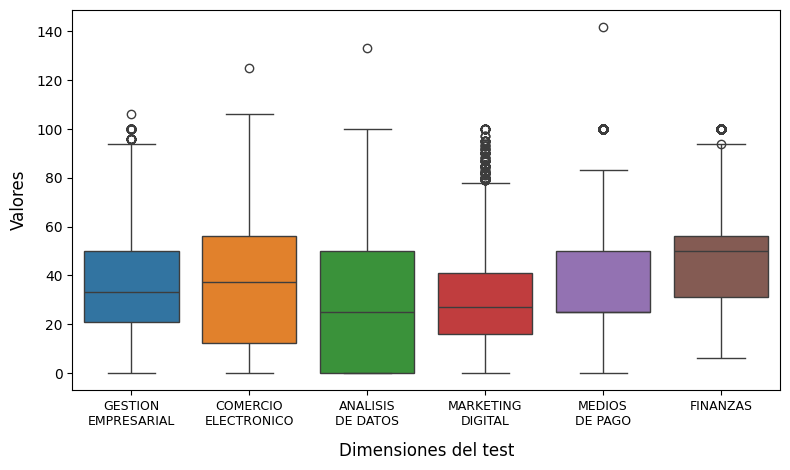



Detección de outliers por dimensión según el Método IQR
            Variable  Cantidad  Porcentaje (%)  Valor Mín.  Valor Máx.  Límite Inf.  Límite Sup.
 GESTION_EMPRESARIAL        67            0.48         0.0      106.25       -22.93        93.76
COMERCIO_ELECTRONICO         1            0.01         0.0      125.00       -53.12       121.88
   ANALISIS_DE_DATOS         1            0.01         0.0      133.33       -75.00       125.00
   MARKETING_DIGITAL       150            1.08         0.0      100.00       -21.50        78.50
      MEDIOS_DE_PAGO       438            3.14         0.0      141.67       -12.50        87.50
            FINANZAS       199            1.43         6.0      100.00        -6.25        93.75


In [18]:
# Visualizar las distribuciones de outliers con boxplots
dimensions_labels = ["GESTION\nEMPRESARIAL", "COMERCIO\nELECTRONICO", "ANALISIS\nDE DATOS", "MARKETING\nDIGITAL", "MEDIOS\nDE PAGO", "FINANZAS"]

print("Distribución de outliers por dimensión mediante boxplots\n" + "=" * 100)
plt.figure(figsize=(8, 4.8))
ax = sns.boxplot(data=df[dimensiones])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(dimensions_labels, ha="center", fontsize=9)
ax.set_xlabel("Dimensiones del test", fontsize=12, labelpad=10)
ax.set_ylabel("Valores", fontsize=12, labelpad=6)
plt.tight_layout()
plt.show()
print()

# Detectar outliers usando el método IQR (rango intercuartílico)
print("\nDetección de outliers por dimensión según el Método IQR\n" + "=" * 100)
def detectar_outliers_iqr(df, columnas):
    resultados = []
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

        resultados.append({
            "Variable": col,
            "Cantidad": len(outliers),
            "Porcentaje (%)": round((len(outliers) / len(df)) * 100, 2),
            "Valor Mín.": df[col].min(),
            "Valor Máx.": df[col].max(),
            "Límite Inf.": round(limite_inferior, 2),
            "Límite Sup.": round(limite_superior, 2)})
    return pd.DataFrame(resultados)

outliers_df = detectar_outliers_iqr(df, dimensiones)
print(outliers_df.to_string(index=False))

## **1.3. Ajustes técnicos - Preprocesamiento de datos**
---
---

### **AT1: Se reemplazó el único registro con NIVEL_DIGITALIZACION "Experto" por "Avanzado"**
---

In [19]:
# Obtener conteo de registros ANTES del reemplazo
conteo_antes = df["NIVEL_DIGITALIZACION"].value_counts()

# Reemplazar el registro con valor Experto por Avanzado
df["NIVEL_DIGITALIZACION"] = df["NIVEL_DIGITALIZACION"].replace('Experto', 'Avanzado')

# Obtener conteo de registros DESPUÉS del reemplazo
conteo_despues = df["NIVEL_DIGITALIZACION"].value_counts()

# Graficar tabla comparativa de registros
print("Cantidad de registros antes y después del reemplazo en NIVEL_DIGITALIZACION\n" + "="*100)
df_visual = pd.DataFrame({
    "Conteo Antes": conteo_antes,
    "Conteo Despues": conteo_despues
}).fillna(0).astype(int).reset_index()

df_visual.rename(columns={"index": "NIVEL_DIGITALIZACION"}, inplace=True)
df_visual = df_visual.sort_values(by="Conteo Despues", ascending=False)
display(df_visual)

Cantidad de registros antes y después del reemplazo en NIVEL_DIGITALIZACION


NIVEL_DIGITALIZACION  Conteo Antes  Conteo Despues
1               Básico          7254            7254
3              Inicial          4474            4474
4           Intermedio          2076            2076
0             Avanzado           139             140
2              Experto             1               0

### **AT2: Se eliminaron ocho registros con RAZON_SOCIAL_ANONIMIZADA duplicada**
---

In [20]:
# Mostrar cantidad de registros y de razones sociales originales
print("Descripción del estado previo\n" + "=" * 100)
print(f"Total de registros originales: {df.shape[0]}")
print(f"Total de razones sociales únicas originales: {df['RAZON_SOCIAL_ANONIMIZADA'].nunique()}\n")

# Filtrar los registros con razones sociales duplicadas desde el dataset original
print("Razones sociales duplicadas\n" + "=" * 100)
print(registros_duplicados, "\n")
display(df_duplicados_total)

# Conservar el registro más reciente de cada RAZON_SOCIAL_ANONIMIZADA según FECHA_FIN
df = df.sort_values("FECHA_FIN", ascending=False).drop_duplicates(subset="RAZON_SOCIAL_ANONIMIZADA", keep="first")

# Verificar la cantidad y valores de los registros eliminados
print("\nDescripción del estado actual\n" + "=" * 100)
print(f"Total de registros después de eliminar duplicados: {df.shape[0]}")
print(f"Total de razones sociales únicas actuales: {df['RAZON_SOCIAL_ANONIMIZADA'].nunique()}")
print(f"Registros eliminados: {df_temporal.shape[0] - df.shape[0]}\n")

df_no_duplicados = df[df["RAZON_SOCIAL_ANONIMIZADA"].isin(registros_duplicados)][dup_columns]
display(df_no_duplicados)

Descripción del estado previo
Total de registros originales: 13944
Total de razones sociales únicas originales: 13936

Razones sociales duplicadas
['6DD7BE067E13E65A8876B952C892DD10A850AD115D607A024B964F89C2A7260C'
 '4F619EB514681444377A3A5DC30D880B64C66A4AB696B38DCCDD6057566B1F9A'
 '95568D5C34EC5D48D65E83D56331F233311F76DF439E37C77F4BE958DBC76DF8'
 '1E6EF75264C7985450AA616E0D1C6BADBA7501042350D420562B626FB793B4AB'
 'DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865F6DA5AF5AF3D5C6354'
 '467309B89298BCBF5A94BFB5A6C88F58186D3D9CA6C8AB2D4237AD0184F767E3'
 'B51EA87D8451D68DCA79D37EA4DF052030EE809515035264E3F81082F8737EFA'
 '3FC33CB929D03A4B0E93FDAAD01BBB27257D6FBDB56338E5F39E4F0E1A4B437B'] 



ID   CIIU                          DESCRIPCION_CIIU  \
89        90  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
779      780  52511   VTA. MIN. DE CASAS DE VENTA POR CORREO.   
3928    3929  52310  VTA.  MIN. PROD. FARMAC. Y ART. TOCADOR.   
5608    5609  51906             VTA. MAY. DE OTROS PRODUCTOS.   
6554    6555  51109   VTA.  MAY. A CAMBIO DE UNA RETRIBUCION.   
8076    8077  36996     OTRAS INDUSTRIAS  MANUFACTURERAS NCP.   
8186    8187  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
8391    8392  62103            TRANSPORTE  REGULAR VIA AEREA.   
8654    8655  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
8762    8763  52511   VTA. MIN. DE CASAS DE VENTA POR CORREO.   
9109    9110  52310  VTA.  MIN. PROD. FARMAC. Y ART. TOCADOR.   
9252    9253  51906             VTA. MAY. DE OTROS PRODUCTOS.   
9360    9361  51109   VTA.  MAY. A CAMBIO DE UNA RETRIBUCION.   
9548    9549  36996     OTRAS INDUSTRIAS  MANUFACTURERAS NCP.   
9554    9555  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
11849  11850  62103            TRANSPORTE  REGULAR VIA AEREA.   

                                RAZON_SOCIAL_ANONIMIZADA NIVEL_DIGITALIZACION  \
89     6DD7BE067E13E65A8876B952C892DD10A850AD115D607A...               Básico   
779    4F619EB514681444377A3A5DC30D880B64C66A4AB696B3...               Básico   
3928   95568D5C34EC5D48D65E83D56331F233311F76DF439E37...           Intermedio   
5608   1E6EF75264C7985450AA616E0D1C6BADBA7501042350D4...               Básico   
6554   DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865...           Intermedio   
8076   467309B89298BCBF5A94BFB5A6C88F58186D3D9CA6C8AB...              Inicial   
8186   B51EA87D8451D68DCA79D37EA4DF052030EE8095150352...               Básico   
8391   3FC33CB929D03A4B0E93FDAAD01BBB27257D6FBDB56338...           Intermedio   
8654   6DD7BE067E13E65A8876B952C892DD10A850AD115D607A...               Básico   
8762   4F619EB514681444377A3A5DC30D880B64C66A4AB696B3...             Avanzado   
9109   95568D5C34EC5D48D65E83D56331F233311F76DF439E37...             Avanzado   
9252   1E6EF75264C7985450AA616E0D1C6BADBA7501042350D4...           Intermedio   
9360   DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865...               Básico   
9548   467309B89298BCBF5A94BFB5A6C88F58186D3D9CA6C8AB...               Básico   
9554   B51EA87D8451D68DCA79D37EA4DF052030EE8095150352...               Básico   
11849  3FC33CB929D03A4B0E93FDAAD01BBB27257D6FBDB56338...              Inicial   

       FECHA_FIN  
89    2021-06-23  
779   2022-10-06  
3928  2021-11-08  
5608  2022-12-28  
6554  2022-12-14  
8076  2022-06-28  
8186  2022-12-06  
8391  2024-12-16  
8654  2024-12-12  
8762  2024-12-13  
9109  2024-12-13  
9252  2024-12-17  
9360  2024-12-17  
9548  2024-12-18  
9554  2024-03-29  
11849 2022-03-08


Descripción del estado actual
Total de registros después de eliminar duplicados: 13936
Total de razones sociales únicas actuales: 13936
Registros eliminados: 8



ID   CIIU                          DESCRIPCION_CIIU  \
9548  9549  36996     OTRAS INDUSTRIAS  MANUFACTURERAS NCP.   
9252  9253  51906             VTA. MAY. DE OTROS PRODUCTOS.   
9360  9361  51109   VTA.  MAY. A CAMBIO DE UNA RETRIBUCION.   
8391  8392  62103            TRANSPORTE  REGULAR VIA AEREA.   
8762  8763  52511   VTA. MIN. DE CASAS DE VENTA POR CORREO.   
9109  9110  52310  VTA.  MIN. PROD. FARMAC. Y ART. TOCADOR.   
8654  8655  52391        OTROS TIPOS DE VENTA AL POR MENOR.   
9554  9555  52391        OTROS TIPOS DE VENTA AL POR MENOR.   

                               RAZON_SOCIAL_ANONIMIZADA NIVEL_DIGITALIZACION  \
9548  467309B89298BCBF5A94BFB5A6C88F58186D3D9CA6C8AB...               Básico   
9252  1E6EF75264C7985450AA616E0D1C6BADBA7501042350D4...           Intermedio   
9360  DDB745CFADD77055AF37551496AF6C5EFB4F8EB9DFF865...               Básico   
8391  3FC33CB929D03A4B0E93FDAAD01BBB27257D6FBDB56338...           Intermedio   
8762  4F619EB514681444377A3A5DC30D880B64C66A4AB696B3...             Avanzado   
9109  95568D5C34EC5D48D65E83D56331F233311F76DF439E37...             Avanzado   
8654  6DD7BE067E13E65A8876B952C892DD10A850AD115D607A...               Básico   
9554  B51EA87D8451D68DCA79D37EA4DF052030EE8095150352...               Básico   

      FECHA_FIN  
9548 2024-12-18  
9252 2024-12-17  
9360 2024-12-17  
8391 2024-12-16  
8762 2024-12-13  
9109 2024-12-13  
8654 2024-12-12  
9554 2024-03-29

### **AT3: Se eliminaron tres registros con CIIU nulo por tratarse de errores de captura**
---

In [21]:
# Mostrar la cantidad original de valores nulos de cada variable
print("Cantidad original de valores nulos de cada variable\n" + "=" * 100)
for col in ["CIIU", "DESCRIPCION_CIIU"]:
    print(f"Valores nulos de {col}: {df[col].isnull().sum()}")
print()

# Mostrar los registros de DESCRIPCION_CIIU con valores nulos
print("Registros con valores nulos según DESCRIPCION_CIIU\n" + "=" * 100)
display(df_temporal[df_temporal["DESCRIPCION_CIIU"].isnull()])
print()

# Eliminar los registros con DESCRIPCION_CIIU nulos
df_sin_duplicados = df.copy()
df = df.dropna(subset=["DESCRIPCION_CIIU"])

# Verificar la cantidad de registros eliminados
print("Cantidad actual de valores nulos de cada variable\n" + "=" * 100)
print(f"Registros antes: {df_sin_duplicados.shape[0]}")
print(f"Registros después de eliminar nulos en DESCRIPCION_CIIU: {df.shape[0]}")
print(f"Registros eliminados: {df_sin_duplicados.shape[0] - df.shape[0]}\n")

for col in ["CIIU", "DESCRIPCION_CIIU"]:
    print(f"Valores nulos de {col}: {df[col].isnull().sum()}")

Cantidad original de valores nulos de cada variable
Valores nulos de CIIU: 0
Valores nulos de DESCRIPCION_CIIU: 3

Registros con valores nulos según DESCRIPCION_CIIU


ID  ANIO   CIIU DESCRIPCION_CIIU  \
9610    9611  2022  -                  NaN   
11101  11102  2021  -                  NaN   
11385  11386  2022  -                  NaN   

                                RAZON_SOCIAL_ANONIMIZADA      TIPO  \
9610   B1F9E494F03A45C46C145FB020557CCC53B17A74E9C6EF...   NATURAL   
11101  C1159A1438BCB482708CE64829C7F5238C21B58FF74C95...  JURIDICA   
11385  0D00DFC64D73E132DFEF27A7D0184C67ACA887ED726B42...   NATURAL   

      DEPARTAMENTO    PROVINCIA     DISTRITO  UBIGEO  ... MEDIOS_DE_PAGO  \
9610      AMAZONAS  CHACHAPOYAS  MOLINOPAMPA   10114  ...           25.0   
11101     AYACUCHO     HUAMANGA     TAMBILLO   50113  ...            0.0   
11385    CAJAMARCA        CHOTA        CHOTA   60401  ...           25.0   

       FINANZAS  FECHA_INICIO  FECHA_FIN  TIEMPO_DEMORA_MINUTOS  \
9610      56.25    2022-12-08 2022-12-08                      1   
11101     25.00    2021-07-12 2021-07-12                      4   
11385     43.75    2022-12-23 2022-12-23                      1   

       FECHA_REGISTRO  AUT_PUBLICIDAD  FECHA_PUB_PNDA Intervalo CIIU_COMPLETO  
9610       2022-04-13              SI      2025-03-06   1: 0-99           NaN  
11101      2021-07-12              SI      2025-03-06   1: 0-99           NaN  
11385      2022-03-22              SI      2025-03-06   1: 0-99           NaN  

[3 rows x 26 columns]


Cantidad actual de valores nulos de cada variable
Registros antes: 13936
Registros después de eliminar nulos en DESCRIPCION_CIIU: 13933
Registros eliminados: 3

Valores nulos de CIIU: 0
Valores nulos de DESCRIPCION_CIIU: 0


### **AT4: Se eliminaron cinco registros con valores superiores a 100 en al menos una de las seis dimensiones del test de digitalización**
---

In [22]:
# Mostrar registros con valores mayores a 100 en alguna de las columnas
mask_superior_100 = np.zeros(df.shape[0], dtype=bool)
for col in numeric_columns:
    mask_superior_100 = mask_superior_100 | (df[col] > 100)

registros_invalidos = df[mask_superior_100]

print("Cantidad de registros con al menos una dimensión con valor mayor a 100\n" + "=" * 100)
print(f"Registros con valores mayores a 100 en las dimensiones: {registros_invalidos.shape[0]}\n")
display(registros_invalidos[["RAZON_SOCIAL_ANONIMIZADA"] + numeric_columns])
print()

# Eliminar registros con valores mayores a 100 en alguna de las columnas
df_sin_nulos_ciiu = df.copy()
df = df[~mask_superior_100].copy()

# Verificar la cantidad de registros eliminados
print("Cantidad actual de registros con valores mayores a 100\n" + "=" * 100)
print(f"Registros antes: {df_sin_nulos_ciiu.shape[0]}")
print(f"Registros después de eliminar valores mayores a 100: {df.shape[0]}")
print(f"Registros eliminados: {df_sin_nulos_ciiu.shape[0] - df.shape[0]}")

Cantidad de registros con al menos una dimensión con valor mayor a 100
Registros con valores mayores a 100 en las dimensiones: 5



RAZON_SOCIAL_ANONIMIZADA  DIG_GENERAL  \
12055  278338302165AFE80A3F39CCD41EAC635B3C5062477978...         49.0   
7183   DFD7F1D729D066B5D072257DAEA3EA4B0445DB81AA4C37...         61.0   
13218  75258D815B00FC3D552797C0D7F0984E8C5D2A9E85BC76...         74.0   
7489   25B098707CF517B0CAE6E441B535B5FB064D1571F4BBD5...         69.0   
1079   E1648988375F913EBED9DE66A2759137AFA6790BD4536F...         79.0   

       GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
12055               106.25                 68.75              25.00   
7183                 31.25                 68.75              66.67   
13218                62.50                106.25              58.33   
7489                 56.25                 62.50             133.33   
1079                 50.00                125.00              66.67   

       MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
12055               10.0            8.33     41.67  
7183                75.0          141.67     16.67  
13218               65.0           75.00     58.33  
7489                75.0           75.00     25.00  
1079                80.0           83.33     25.00


Cantidad actual de registros con valores mayores a 100
Registros antes: 13933
Registros después de eliminar valores mayores a 100: 13928
Registros eliminados: 5


**Limpieza de columnas que no aportan información relevante a la clusterización**

In [23]:
# Eliminar las columnas no requeridas y reordenar los registros
disposable_columns = ["ANIO", "AUT_PUBLICIDAD", "TIEMPO_DEMORA_MINUTOS", "TIPO",
                        "FECHA_REGISTRO", "FECHA_INICIO", "FECHA_FIN", "FECHA_PUB_PNDA"]

data_filtrada = df.drop(columns=disposable_columns)

# Reordenar los registros según el identificador único ID y restablecer el índice
data_filtrada = data_filtrada.sort_values("ID").reset_index(drop=True)

# Verificar la cantidad de registros eliminados
print("Descripción del estado actual\n" + "=" * 100)
print(f"Registros resultantes: {data_filtrada.shape[0]}")
print(f"Columnas resultantes: {data_filtrada.shape[1]}")

# Verificar la estructura del dataset optimizado
print("\nVariables del dataset preprocesado\n" + "="*100)
print(data_filtrada.dtypes)
print("\nVariables del dataset preprocesado\n" + "="*100)
data_filtrada.head()

Descripción del estado actual
Registros resultantes: 13928
Columnas resultantes: 16

Variables del dataset preprocesado
ID                            int64
CIIU                         object
DESCRIPCION_CIIU             object
RAZON_SOCIAL_ANONIMIZADA     object
DEPARTAMENTO                 object
PROVINCIA                    object
DISTRITO                     object
UBIGEO                        int64
NIVEL_DIGITALIZACION         object
DIG_GENERAL                 float64
GESTION_EMPRESARIAL         float64
COMERCIO_ELECTRONICO        float64
ANALISIS_DE_DATOS           float64
MARKETING_DIGITAL           float64
MEDIOS_DE_PAGO              float64
FINANZAS                    float64
dtype: object

Variables del dataset preprocesado


ID   CIIU                    DESCRIPCION_CIIU  \
0   1  18100          FAB. DE PRENDAS DE VESTIR.   
1   2  55205     RESTAURANTES, BARES Y CANTINAS.   
2   3  55205     RESTAURANTES, BARES Y CANTINAS.   
3   4  18100          FAB. DE PRENDAS DE VESTIR.   
4   5  92192  OTRAS ACTIVID.ENTRETENIMIENTO NCP.   

                            RAZON_SOCIAL_ANONIMIZADA DEPARTAMENTO PROVINCIA  \
0  5325E51F720E0A8F8C71188DAE1C4AC311713DDBBF8BDE...  LA LIBERTAD  TRUJILLO   
1  20E1926945D02E102075B60FB7F40A4ED071618C9B0BEB...  LA LIBERTAD  TRUJILLO   
2  7B2624A048B4437F2CE51B1F16E2BAF8EC454566477EAF...  LA LIBERTAD  TRUJILLO   
3  2315EC15C77EC0110FC24C7F7F9AA8ED150C006E2394C4...  LA LIBERTAD  TRUJILLO   
4  2E0D8F3A258AA02E0D72923ECCD89142EFBB76B8550A36...  LA LIBERTAD  TRUJILLO   

               DISTRITO  UBIGEO NIVEL_DIGITALIZACION  DIG_GENERAL  \
0  VICTOR LARCO HERRERA  130111              Inicial         19.0   
1  VICTOR LARCO HERRERA  130111               Básico         37.0   
2  VICTOR LARCO HERRERA  130111               Básico         29.0   
3  VICTOR LARCO HERRERA  130111               Básico         30.0   
4  VICTOR LARCO HERRERA  130111               Básico         39.0   

   GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
0                29.17                  12.5                0.0   
1                50.00                  37.5               50.0   
2                33.34                  25.0                0.0   
3                58.34                   0.0               50.0   
4                25.00                  62.5                0.0   

   MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
0               22.0            25.0     25.00  
1               27.0            25.0     31.25  
2               32.0            50.0     37.50  
3               22.0            25.0     56.25  
4               45.0            25.0     31.25

## **1.4. Análisis exploratorio de datos - EDA**
---
---

### **1.4.1. Análisis descriptivo univariado de variables numéricas**
---
**Distribución de variables numéricas**

In [24]:
# Importar librerías para el análisis exploratorio de datos
import statsmodels.api as sm
from scipy import stats
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis
from scipy.stats import shapiro, kstest, norm, jarque_bera, anderson
from scipy.stats import zscore
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
from sklearn.ensemble import IsolationForest
import itertools
from scipy.stats import pearsonr

Gráficos de histogramas por dimensión del test


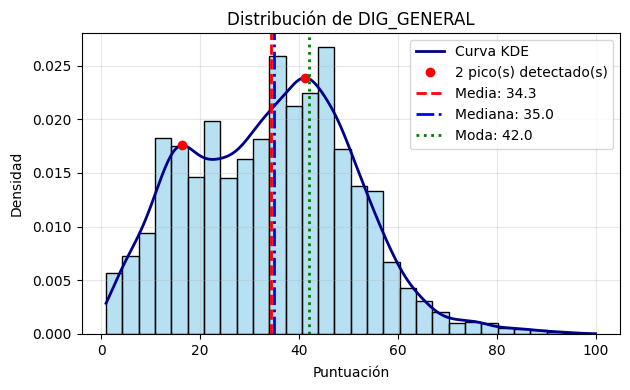

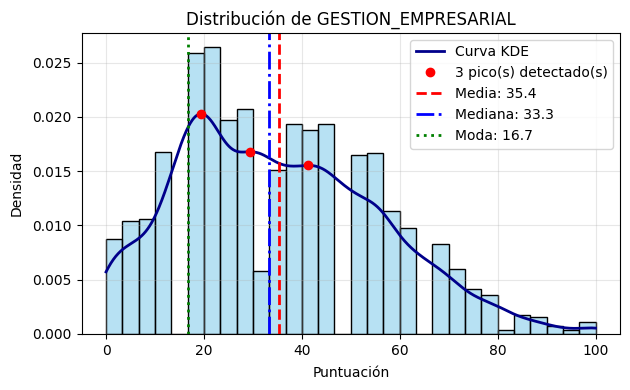

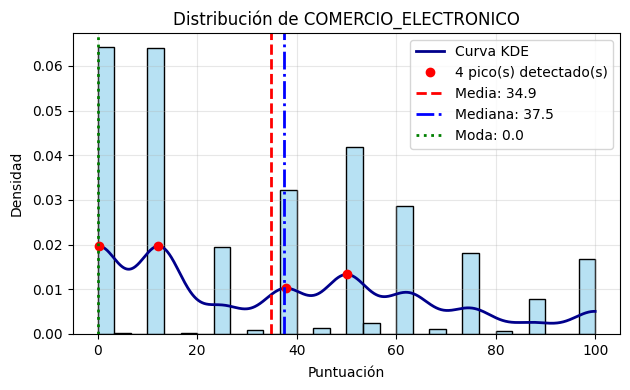

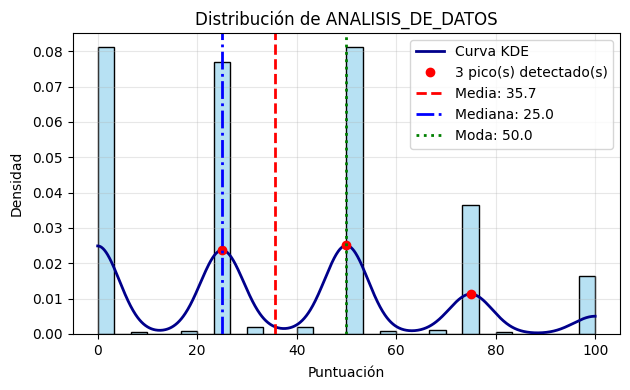

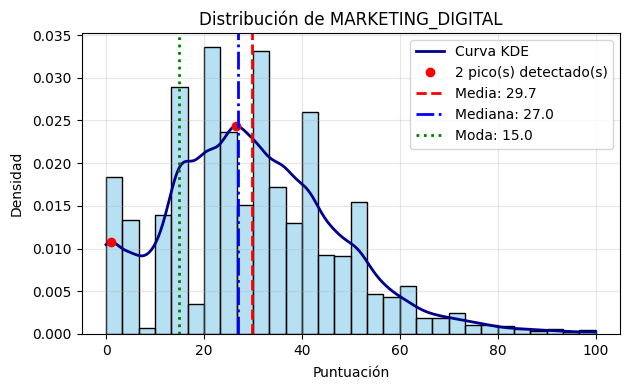

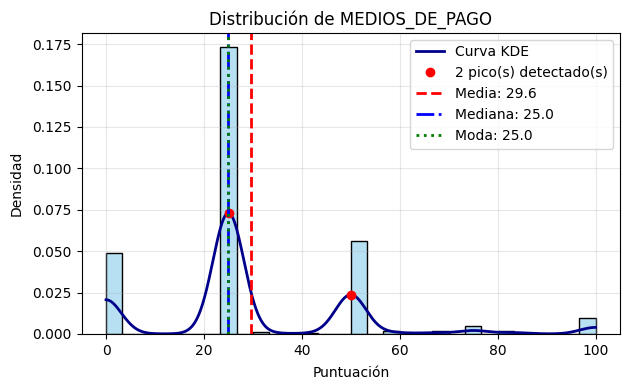

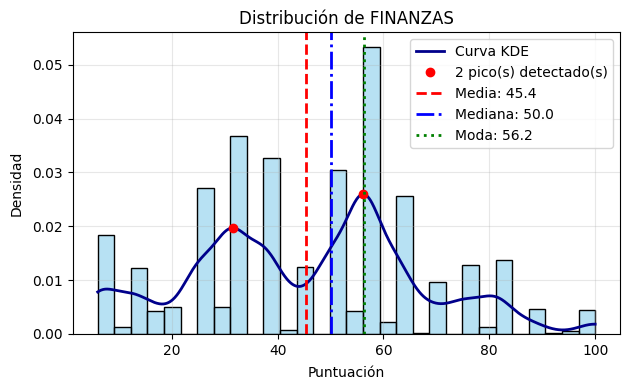

In [25]:
# Crear gráficos de histogramas por dimensión del test
print("Gráficos de histogramas por dimensión del test\n" + "=" * 100)
for dimension in numeric_columns:
    datos = data_filtrada[dimension].dropna()
    media = datos.mean()
    mediana = datos.median()
    moda = datos.mode().iloc[0] if not datos.mode().empty else None

    # KDE y picos
    kde = stats.gaussian_kde(datos)
    x_vals = np.linspace(datos.min(), datos.max(), 1000)
    y_vals = kde(x_vals)
    picos, _ = find_peaks(y_vals, height=0.01)

    # Histograma
    plt.figure(figsize=(6.4, 4))
    sns.histplot(datos, bins=30, kde=False, color="skyblue", edgecolor="black", alpha=0.6, stat="density")
    plt.plot(x_vals, y_vals, color="darkblue", linewidth=2, label="Curva KDE")
    plt.plot(x_vals[picos], y_vals[picos], "ro", label=f"{len(picos)} pico(s) detectado(s)")

    # Líneas verticales
    plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media: {media:.1f}")
    plt.axvline(mediana, color="blue", linestyle="-.", linewidth=2, label=f"Mediana: {mediana:.1f}")
    if moda is not None:
        plt.axvline(moda, color="green", linestyle=":", linewidth=2, label=f"Moda: {moda:.1f}")

    plt.title(f"Distribución de {dimension}", fontsize=12)
    plt.xlabel("Puntuación", fontsize=10, labelpad=6)
    plt.ylabel("Densidad", fontsize=10, labelpad=6)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print()

**Medidas de tendencia central y dispersión de las variables numéricas**

In [26]:
# Crear resumen estadístico descriptivo
tabla_stat = data_filtrada[numeric_columns].describe().T
tabla_stat = tabla_stat[["count", "mean", "std", "min", "25%", "50%", "75%", "max"]].round(3)

print("Medidas de tendencia central y dispersión de las variables numéricas\n" + "=" * 100)
print(tabla_stat.to_string())

Medidas de tendencia central y dispersión de las variables numéricas
                        count    mean     std  min    25%    50%    75%    max
DIG_GENERAL           13928.0  34.310  16.391  1.0  21.00  35.00  46.00  100.0
GESTION_EMPRESARIAL   13928.0  35.409  20.613  0.0  20.83  33.34  50.00  100.0
COMERCIO_ELECTRONICO  13928.0  34.851  29.994  0.0  12.50  37.50  56.25  100.0
ANALISIS_DE_DATOS     13928.0  35.651  29.228  0.0   0.00  25.00  50.00  100.0
MARKETING_DIGITAL     13928.0  29.719  17.597  0.0  16.00  27.00  41.00  100.0
MEDIOS_DE_PAGO        13928.0  29.595  21.265  0.0  25.00  25.00  50.00  100.0
FINANZAS              13928.0  45.421  21.393  6.0  31.25  50.00  56.25  100.0


**Percentiles de las dimensiones de digitalización**

In [27]:
# Calcular los percentiles redondeados por dimensión del test
percentiles = [5, 25, 50, 75, 90, 95]
tabla_percentil = data_filtrada[numeric_columns].quantile([p/100 for p in percentiles]).T
tabla_percentil.columns = [f"P{int(p)}" for p in percentiles]
tabla_percentil = tabla_percentil.round(2)

print("Percentiles de las dimensiones de digitalización\n" + "=" * 100)
print(tabla_percentil.to_string())

Percentiles de las dimensiones de digitalización
                        P5    P25    P50    P75   P90     P95
DIG_GENERAL           8.00  21.00  35.00  46.00  54.0   60.00
GESTION_EMPRESARIAL   4.17  20.83  33.34  50.00  62.5   70.84
COMERCIO_ELECTRONICO  0.00  12.50  37.50  56.25  75.0  100.00
ANALISIS_DE_DATOS     0.00   0.00  25.00  50.00  75.0  100.00
MARKETING_DIGITAL     0.00  16.00  27.00  41.00  52.0   60.00
MEDIOS_DE_PAGO        0.00  25.00  25.00  50.00  50.0   75.00
FINANZAS              6.25  31.25  50.00  56.25  75.0   81.25


**Cantidad de ceros y cienes por dimensión numérica del test**

In [28]:
# Calcular la cantidad de ceros y el porcentaje representado
total_registros = data_filtrada.shape[0]
tabla_cero = pd.DataFrame({"Cantidad":[(data_filtrada[col] == 0).sum() for col in dimensiones]}, index=dimensiones)
tabla_cero["Porcentaje"] = (tabla_cero["Cantidad"] / total_registros * 100).round(2).astype(str) + "%"
tabla_cero = tabla_cero.sort_values(by="Cantidad", ascending=False)

print("Cantidad de ceros por dimensión numérica del test\n" + "=" * 100)
print(tabla_cero.to_string(), "\n")

# Calcular la cantidad de cienes y el porcentaje representado
tabla_cien = pd.DataFrame({"Cantidad":[(data_filtrada[col] == 100).sum() for col in dimensiones]}, index=dimensiones)
tabla_cien["Porcentaje"] = (tabla_cien["Cantidad"] / total_registros * 100).round(2).astype(str) + "%"
tabla_cien = tabla_cien.sort_values(by="Cantidad", ascending=False)

print("Cantidad de cienes por dimensión numérica del test\n" + "=" * 100)
print(tabla_cien.to_string())

Cantidad de ceros por dimensión numérica del test
                      Cantidad Porcentaje
ANALISIS_DE_DATOS         3767     27.05%
COMERCIO_ELECTRONICO      2981      21.4%
MEDIOS_DE_PAGO            2272     16.31%
MARKETING_DIGITAL          855      6.14%
GESTION_EMPRESARIAL        408      2.93%
FINANZAS                     0       0.0% 

Cantidad de cienes por dimensión numérica del test
                      Cantidad Porcentaje
COMERCIO_ELECTRONICO       777      5.58%
ANALISIS_DE_DATOS          759      5.45%
MEDIOS_DE_PAGO             436      3.13%
FINANZAS                   198      1.42%
GESTION_EMPRESARIAL         49      0.35%
MARKETING_DIGITAL           17      0.12%


**Variabilidad y forma distributiva por variables**

In [29]:
# Calcular métricas de dispersión y forma de la distribución por dimensión del test
tabla_variacion = pd.DataFrame(index=numeric_columns, columns=["Varianza", "CV", "Asimetría", "Curtosis"])

for var in numeric_columns:
    datos = data_filtrada[var].dropna()
    media = datos.mean()
    std = datos.std()

    tabla_variacion.loc[var, "Varianza"] = round(std**2, 2)
    tabla_variacion.loc[var, "CV"] = f"{round(std / media * 100, 2)}%"
    tabla_variacion.loc[var, "Asimetría"] = round(skew(datos), 3)
    tabla_variacion.loc[var, "Curtosis"] = round(kurtosis(datos, fisher=True), 3)

print("Variabilidad y forma distributiva por variables\n" + "=" * 100)
print(tabla_variacion.to_string())

Variabilidad y forma distributiva por variables
                     Varianza      CV Asimetría Curtosis
DIG_GENERAL            268.65  47.77%      0.18   -0.282
GESTION_EMPRESARIAL    424.91  58.22%     0.448   -0.317
COMERCIO_ELECTRONICO   899.62  86.06%      0.54   -0.759
ANALISIS_DE_DATOS      854.26  81.98%     0.419   -0.681
MARKETING_DIGITAL      309.65  59.21%     0.544     0.46
MEDIOS_DE_PAGO          452.2  71.85%     1.155     2.19
FINANZAS               457.66   47.1%     0.114   -0.465


### **1.4.2. Evaluación de supuestos de normalidad**
---
**Comparativa de test de normalidad**

In [30]:
# Crear tabla comparativa de los test de normalidad
tabla_normal = pd.DataFrame(columns=[
    "Shapiro-Wilk (p)",
    "Kolmogorov-Smirnov (p)",
    "Jarque-Bera (stat)",
    "Jarque-Bera (p)",
    "Anderson-Darling (stat)",
    "AD valor crítico (5%)"
], index=numeric_columns)

for var in numeric_columns:
    datos = data_filtrada[var].dropna()
    # Shapiro-Wilk (máximo 5000 observaciones)
    try:
        p_shapiro = shapiro(datos.sample(n=5000, random_state=1))[1] if len(datos) > 5000 else shapiro(datos)[1]
    except:
        p_shapiro = np.nan

    # Kolmogorov-Smirnov contra distribución normal con media y std de los datos
    p_kstest = kstest(datos, "norm", args=(datos.mean(), datos.std()))[1]

    # Jarque-Bera
    jb_stat, jb_p = jarque_bera(datos)

    # Anderson-Darling
    ad_test = anderson(datos, dist="norm")
    ad_stat = ad_test.statistic
    ad_critical_5 = ad_test.critical_values[2]  # índice 2 → 5%

    tabla_normal.loc[var] = [
        round(p_shapiro, 5),
        round(p_kstest, 5),
        round(jb_stat, 4),
        round(jb_p, 5),
        round(ad_stat, 4),
        round(ad_critical_5, 3)]

print("Tabla comparativa de test de normalidad\n" + "=" * 100)
print(tabla_normal.to_string())

Tabla comparativa de test de normalidad
                     Shapiro-Wilk (p) Kolmogorov-Smirnov (p) Jarque-Bera (stat) Jarque-Bera (p) Anderson-Darling (stat) AD valor crítico (5%)
DIG_GENERAL                       0.0                    0.0           121.6769             0.0                 41.3698                 0.787
GESTION_EMPRESARIAL               0.0                    0.0           524.1979             0.0                 93.9189                 0.787
COMERCIO_ELECTRONICO              0.0                    0.0          1009.9925             0.0                426.6736                 0.787
ANALISIS_DE_DATOS                 0.0                    0.0           675.8515             0.0                521.8557                 0.787
MARKETING_DIGITAL                 0.0                    0.0            809.773             0.0                 57.5793                 0.787
MEDIOS_DE_PAGO                    0.0                    0.0          5878.0911             0.0             

**Q-Q Plots de variables numéricas**

Gráficos Q-Q plot de las dimensiones del test


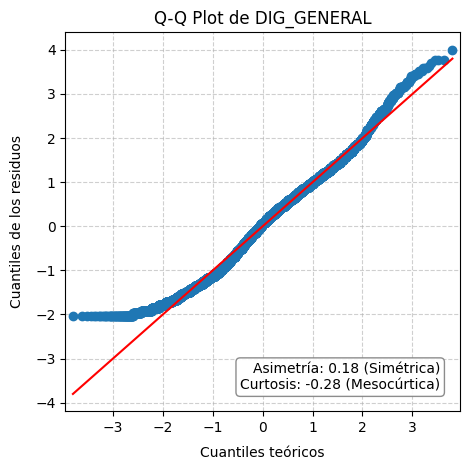

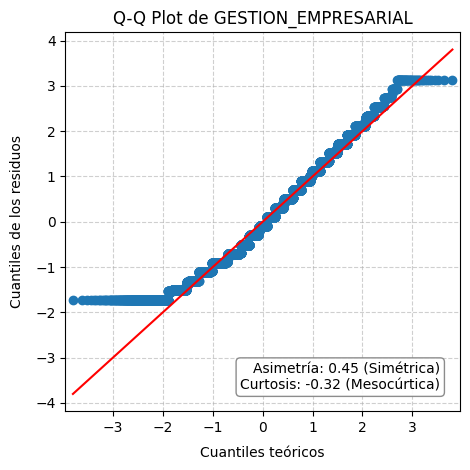

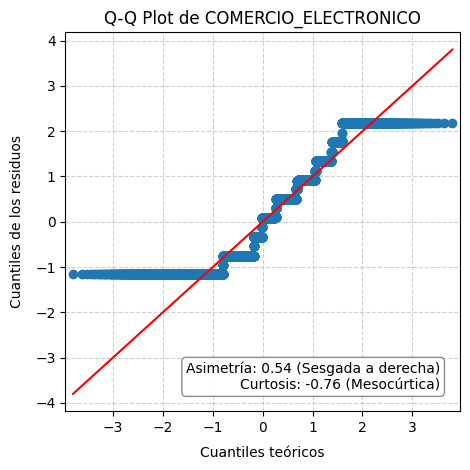

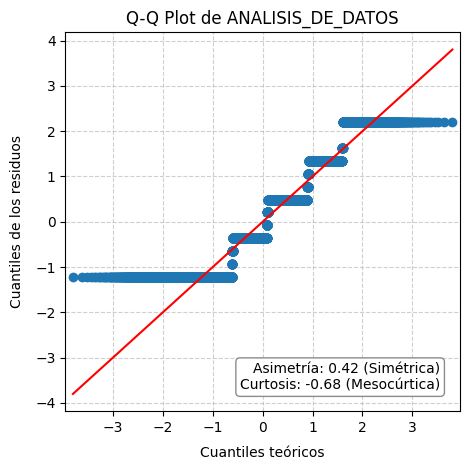

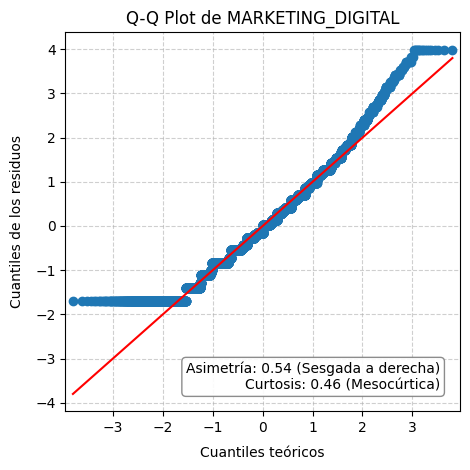

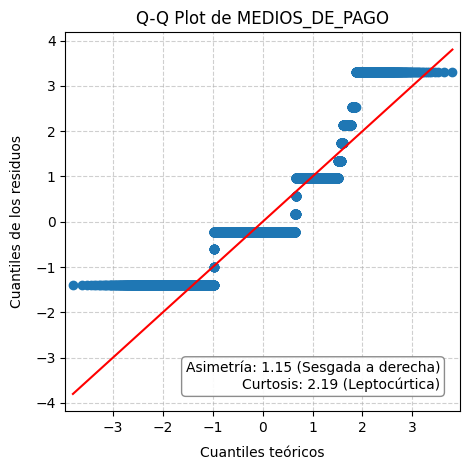

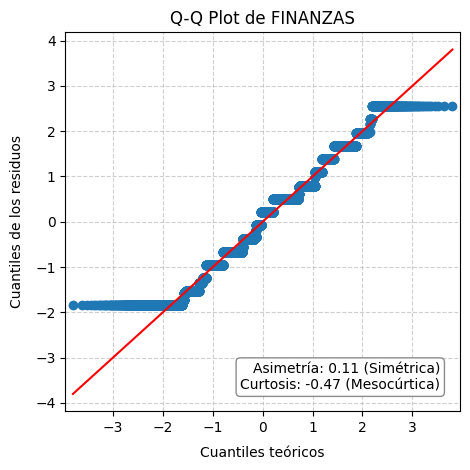

In [31]:
# Crear gráficos Q-Q plot de las dimensiones del test
print("Gráficos Q-Q plot de las dimensiones del test\n" + "=" * 100)
for var in numeric_columns:
    datos = data_filtrada[var].dropna()
    asimetria = stats.skew(datos)
    curtosis = stats.kurtosis(datos, fisher=True)

    # Interpretación asimetría
    if abs(asimetria) < 0.5:
        tipo_asimetria = "Simétrica"
    elif asimetria > 0.5:
        tipo_asimetria = "Sesgada a derecha"
    else:
        tipo_asimetria = "Sesgada a izquierda"

    # Interpretación curtosis
    if abs(curtosis) < 1:
        tipo_curtosis = "Mesocúrtica"
    elif curtosis > 1:
        tipo_curtosis = "Leptocúrtica"
    else:
        tipo_curtosis = "Platicúrtica"

    plt.figure(figsize=(4.8, 4.8))
    ax = plt.gca()
    sm.qqplot(datos, line="s", fit=True, ax=ax)
    plt.title(f"Q-Q Plot de {var}", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    texto_box = (f"Asimetría: {asimetria:.2f} ({tipo_asimetria})\n"
                 f"Curtosis: {curtosis:.2f} ({tipo_curtosis})")
    props = dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.9)
    ax.text(0.95, 0.05, texto_box, transform=ax.transAxes, fontsize=10,
            verticalalignment="bottom", horizontalalignment="right", bbox=props)

    plt.xlabel("Cuantiles teóricos", fontsize=10, labelpad=8)
    plt.ylabel("Cuantiles de los residuos", fontsize=10, labelpad=8)
    plt.tight_layout()
    plt.show()
    print()

### **1.4.3. Identificación de valores atípicos**
---
**Detección de outliers por dimensión según el Método IQR**

Detección de outliers por dimensión según el Método IQR
                     Cantidad Porcentaje (%) Valor Mín. Valor Max. Límite Inf. Límite Max.
GESTION_EMPRESARIAL        66           0.47        0.0      100.0      -22.93       93.76
COMERCIO_ELECTRONICO        0            0.0        0.0      100.0      -53.12      121.88
ANALISIS_DE_DATOS           0            0.0        0.0      100.0       -75.0       125.0
MARKETING_DIGITAL         149           1.07        0.0      100.0       -21.5        78.5
MEDIOS_DE_PAGO            436           3.13        0.0      100.0       -12.5        87.5
FINANZAS                  199           1.43        6.0      100.0       -6.25       93.75 

Distribución de outliers por dimensión mediante boxplots


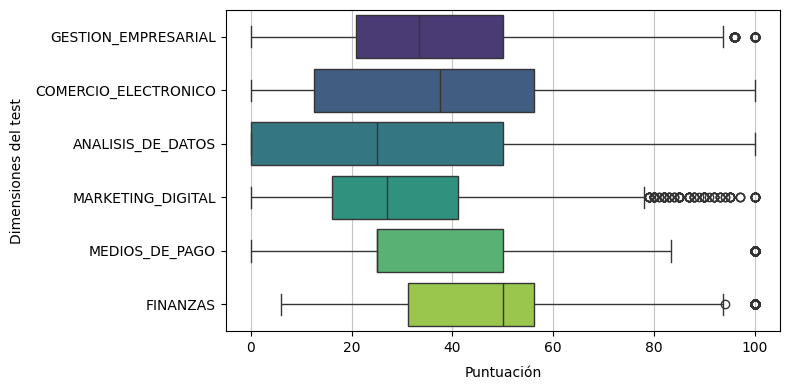

In [32]:
# Detectar valores atípicos en las dimensiones del test, según el método IQR
total = data_filtrada.shape[0]
tabla_iqr = pd.DataFrame(columns=["Cantidad", "Porcentaje (%)", "Valor Mín.", "Valor Max.", "Límite Inf.", "Límite Max."], index=dimensiones)

for col in dimensiones:
    datos = data_filtrada[col].dropna()
    q1 = datos.quantile(0.25)
    q3 = datos.quantile(0.75)
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    outliers = datos[(datos < limite_inf) | (datos > limite_sup)]
    cantidad = outliers.count()
    porcentaje = round(cantidad / total * 100, 2)

    tabla_iqr.loc[col] = [
        cantidad,
        porcentaje,
        datos.min(),
        datos.max(),
        round(limite_inf, 2),
        round(limite_sup, 2)]

print("Detección de outliers por dimensión según el Método IQR\n" + "="*100)
print(tabla_iqr.to_string(), "\n")

# Visualizar las distribuciones de outliers con boxplots
print("Distribución de outliers por dimensión mediante boxplots\n" + "=" * 100)
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_filtrada[dimensiones], orient="h", palette="viridis")
plt.xlabel("Puntuación", fontsize=10, labelpad=8)
plt.ylabel("Dimensiones del test", fontsize=10, labelpad=8)
plt.grid(axis="x", alpha=0.75)
plt.tight_layout()
plt.show()

**Detección de outliers por dimensión según el Método Z-score estándar y modificado (basado en MAD)**

In [33]:
# Detectar valores atípicos en las dimensiones del test, según el método Z-score
tabla_z = pd.DataFrame(columns=["Cantidad", "Porcentaje (%)", "Valor Mín.", "Valor Max.", "Límite Inf.", "Límite Sup."], index=dimensiones)

for col in dimensiones:
    datos = data_filtrada[col].dropna()
    media = datos.mean()
    std = datos.std()
    limite_inf = media - 3 * std
    limite_sup = media + 3 * std

    outliers = datos[(datos < limite_inf) | (datos > limite_sup)]
    cantidad = outliers.count()
    porcentaje = round(cantidad / total * 100, 2)

    tabla_z.loc[col] = [
        cantidad,
        porcentaje,
        datos.min(),
        datos.max(),
        round(limite_inf, 2),
        round(limite_sup, 2)]

print("Detección de outliers por dimensión según el Método Z-score\n" + "=" * 100)
print(tabla_z.to_string())
print()

# Detectar valores atípicos en las dimensiones del test, según el método Z-score modificado (basado en MAD)
def detectar_outliers_zmodificado(df, columnas, umbral=3.5):
    resultados = []
    for col in columnas:
        mediana = df[col].median()
        mad = np.median(np.abs(df[col] - mediana))
        if mad == 0:
            cantidad = 0
        else:
            zmod = 0.6745 * (df[col] - mediana) / mad
            cantidad = (np.abs(zmod) > umbral).sum()

        limite_inferior = mediana - (umbral * mad / 0.6745)
        limite_superior = mediana + (umbral * mad / 0.6745)

        resultados.append({
            "Variable": col,
            "Cantidad": cantidad,
            "Porcentaje (%)": round((cantidad / len(df)) * 100, 2),
            "Valor Mín.": df[col].min(),
            "Valor Máx.": df[col].max(),
            "Límite Inf.": round(limite_inferior, 2),
            "Límite Sup.": round(limite_superior, 2)})
    return pd.DataFrame(resultados)

outliers_zmod_df = detectar_outliers_zmodificado(data_filtrada, dimensiones)

print("Detección de outliers por dimensión según el Método Z-score Modificado (basado en MAD)\n" + "=" * 100)
print(outliers_zmod_df.to_string(index=False))

Detección de outliers por dimensión según el Método Z-score
                     Cantidad Porcentaje (%) Valor Mín. Valor Max. Límite Inf. Límite Sup.
GESTION_EMPRESARIAL        49           0.35        0.0      100.0      -26.43       97.25
COMERCIO_ELECTRONICO        0            0.0        0.0      100.0      -55.13      124.83
ANALISIS_DE_DATOS           0            0.0        0.0      100.0      -52.03      123.33
MARKETING_DIGITAL         102           0.73        0.0      100.0      -23.07       82.51
MEDIOS_DE_PAGO            436           3.13        0.0      100.0       -34.2       93.39
FINANZAS                    0            0.0        6.0      100.0      -18.76       109.6

Detección de outliers por dimensión según el Método Z-score Modificado (basado en MAD)
            Variable  Cantidad  Porcentaje (%)  Valor Mín.  Valor Máx.  Límite Inf.  Límite Sup.
 GESTION_EMPRESARIAL         0            0.00         0.0       100.0       -52.28       118.96
COMERCIO_ELECTRONICO 

**Distancia de Mahalanobis**

Umbrales de selección
Umbral 97.5%: 16.01
Umbral 99.9%: 24.32

Distribución Distancia de Mahalanobis al Cuadrado con umbrales


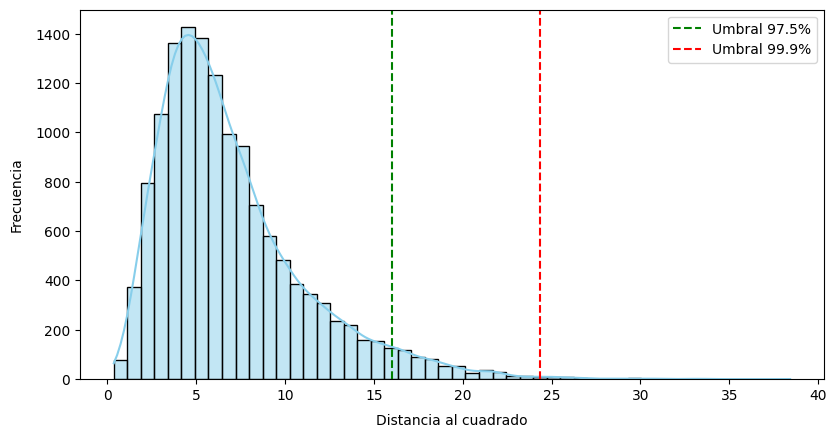


Distancias de Mahalanobis ordenadas (Raíz) con umbrales


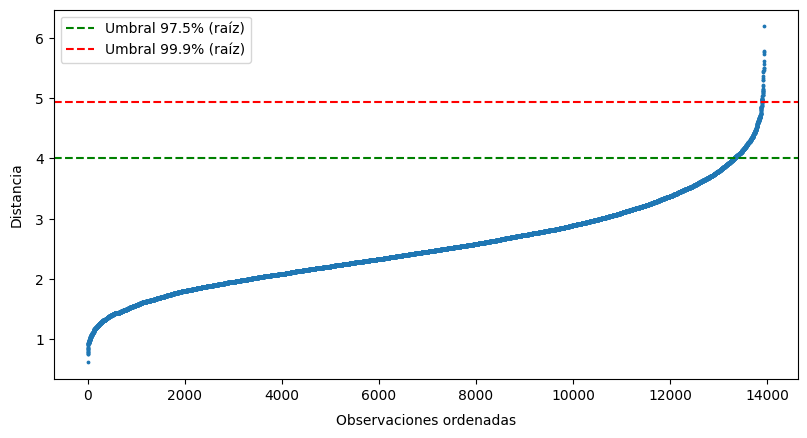

In [34]:
# Definir los parámetros de entrada para el cálculo de la distancia
X = data_filtrada[numeric_columns].dropna()
df = len(numeric_columns) # (Grados de libertad)
mean_vec = X.mean().values

# Matriz de covarianza y su inversa
cov_matrix = np.cov(X, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calcular distancia de Mahalanobis al cuadrado para cada fila
def mahalanobis_sq(row):
    diff = row.values - mean_vec
    return diff.T @ inv_cov_matrix @ diff

dist_sq = X.apply(mahalanobis_sq, axis=1)
df_cluster = data_filtrada.loc[X.index].copy()
df_cluster["Mahalanobis_Distance_Squared"] = dist_sq

# Definir niveles de significancia y umbrales
alpha_975 = 0.025
alpha_999 = 0.001
umbral_975 = chi2.ppf(1 - alpha_975, df)
umbral_999 = chi2.ppf(1 - alpha_999, df)

print("Umbrales de selección\n" + "=" * 100)
print(f"Umbral 97.5%: {umbral_975:.2f}")
print(f"Umbral 99.9%: {umbral_999:.2f}\n")

# Graficar histograma de distancias al cuadrado con umbrales
print("Distribución Distancia de Mahalanobis al Cuadrado con umbrales\n" + "=" * 100)
plt.figure(figsize=(9.6, 4.8))
sns.histplot(dist_sq, bins=50, kde=True, color="skyblue", edgecolor="black")
plt.axvline(umbral_975, color="green", linestyle="--", label="Umbral 97.5%")
plt.axvline(umbral_999, color="red", linestyle="--", label="Umbral 99.9%")
plt.xlabel("Distancia al cuadrado", fontsize=10, labelpad=8)
plt.ylabel("Frecuencia", fontsize=10, labelpad=8)
plt.legend()
plt.show()
print()

# Graficar scatterplot de distancias raíz ordenadas
print("Distancias de Mahalanobis ordenadas (Raíz) con umbrales\n" + "=" * 100)
dist_raiz = np.sqrt(dist_sq)

plt.figure(figsize=(9.6, 4.8))
plt.scatter(range(len(dist_raiz)), np.sort(dist_raiz), s=3)
plt.axhline(np.sqrt(umbral_975), color="green", linestyle="--", label="Umbral 97.5% (raíz)")
plt.axhline(np.sqrt(umbral_999), color="red", linestyle="--", label="Umbral 99.9% (raíz)")
plt.xlabel("Observaciones ordenadas", fontsize=10, labelpad=8)
plt.ylabel("Distancia", fontsize=10, labelpad=8)
plt.legend()
plt.show()

**Detección de Outliers Multivariados (Isolation Forest)**

In [35]:
# Entrenar Isolation Forest para la detección de outliers multivariados
X = data_filtrada[numeric_columns].dropna()
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)
labels = iso_forest.predict(X) # Predecir: (-1 = outlier, 1 = normal)

# Crear columna en df_cluster alineada al índice
df_cluster = data_filtrada.loc[X.index].copy()
df_cluster["IsolationForest_Label"] = labels

# Resumen general
total_obs = len(df_cluster)
outliers_count = (labels == -1).sum()
normal_count = (labels == 1).sum()
outliers_pct = 100 * outliers_count / total_obs
normal_pct = 100 * normal_count / total_obs

print("Detección de outliers multivariados (Isolation Forest)\n" + "=" * 100)
print(f"Total de observaciones: {total_obs}")
print(f"Outliers detectados: {outliers_count} ({outliers_pct:.2f}%)")
print(f"Normales: {normal_count} ({normal_pct:.2f}%)\n")

# Calcular medias por grupo
means_outliers = df_cluster[df_cluster["IsolationForest_Label"] == -1][numeric_columns].mean()
means_normales = df_cluster[df_cluster["IsolationForest_Label"] == 1][numeric_columns].mean()

# Crear tabla resumen con diferencias
resumen_df = pd.DataFrame({
    "Variable": numeric_columns,
    "Media (Outliers)": means_outliers.values,
    "Media (Normales)": means_normales.values,})

resumen_df["Diferencia"] = resumen_df["Media (Outliers)"] - resumen_df["Media (Normales)"]

print("Comparación de medias (outliers vs normales)\n" + "=" * 100)
print(f"{'Variable':>20}  {'Media (Outliers)':>16}  {'Media (Normales)':>16}  {'Diferencia':>10}")
for i, row in resumen_df.iterrows():
    print(f"{row['Variable']:>20}  {row['Media (Outliers)']:16.2f}  {row['Media (Normales)']:16.2f}  {row['Diferencia']:10.2f}")

Detección de outliers multivariados (Isolation Forest)
Total de observaciones: 13928
Outliers detectados: 697 (5.00%)
Normales: 13231 (95.00%)

Comparación de medias (outliers vs normales)
            Variable  Media (Outliers)  Media (Normales)  Diferencia
         DIG_GENERAL             62.38             32.83       29.55
 GESTION_EMPRESARIAL             55.39             34.36       21.03
COMERCIO_ELECTRONICO             73.47             32.82       40.66
   ANALISIS_DE_DATOS             62.33             34.25       28.08
   MARKETING_DIGITAL             58.63             28.20       30.44
      MEDIOS_DE_PAGO             64.74             27.74       37.00
            FINANZAS             58.84             44.71       14.12


### **1.4.4. Análisis comparativo por niveles de digitalización**
---
**Cantidad de registros por NIVEL_DIGITALIZACION**

Cantidad de registros por NIVEL_DIGITALIZACION


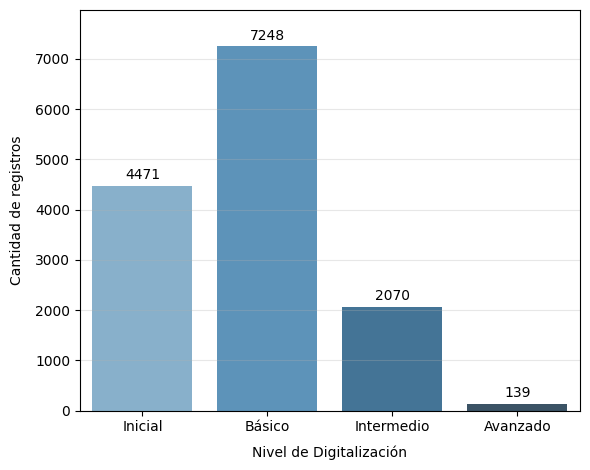

In [36]:
# Contar registros por nivel de digitalización y en orden específico
niveles_orden = ["Inicial", "Básico", "Intermedio", "Avanzado"]
conteo = data_filtrada["NIVEL_DIGITALIZACION"].value_counts().reindex(niveles_orden)

plt.figure(figsize=(6,4.8))
sns.barplot(x=conteo.index, y=conteo.values, hue=conteo.index, palette="Blues_d", legend=False)

for i, v in enumerate(conteo.values):
    plt.text(i, v + max(conteo.values)*0.01, str(v), ha="center", va="bottom", fontsize=10)

print("Cantidad de registros por NIVEL_DIGITALIZACION\n" + "=" * 100)
plt.xlabel("Nivel de Digitalización", fontsize=10, labelpad=8)
plt.ylabel("Cantidad de registros", fontsize=10, labelpad=8)
plt.ylim(0, max(conteo.values)*1.1)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

**Estadísticas de DIG_GENERAL por categoría de NIVEL_DIGITALIZACION**

In [37]:
# Calcular estadísticas descriptivas agrupadas por NIVEL_DIGITALIZACION
grupo = data_filtrada.groupby("NIVEL_DIGITALIZACION")["DIG_GENERAL"]

tabla_nivel_gen = grupo.agg([
    ("Cantidad", "count"),
    ("Media", "mean"),
    ("Desviación_Estándar", "std"),
    ("Mínimo", "min"),
    ("Máximo", "max")])

total = tabla_nivel_gen["Cantidad"].sum()
tabla_nivel_gen.insert(1, "Porcentaje", (tabla_nivel_gen["Cantidad"] / total * 100).round(2))
tabla_nivel_gen["Media"] = tabla_nivel_gen["Media"].round(2)
tabla_nivel_gen["Desviación_Estándar"] = tabla_nivel_gen["Desviación_Estándar"].round(2)

tabla_nivel_gen = tabla_nivel_gen.reindex(niveles_orden)

print("Estadísticas de DIG_GENERAL por categoría de NIVEL_DIGITALIZACION\n" + "=" * 100)
print(tabla_nivel_gen.to_string())

Estadísticas de DIG_GENERAL por categoría de NIVEL_DIGITALIZACION
                      Cantidad  Porcentaje  Media  Desviación_Estándar  Mínimo  Máximo
NIVEL_DIGITALIZACION                                                                  
Inicial                   4471       32.10  15.40                 6.25     1.0    25.0
Básico                    7248       52.04  38.44                 6.87    26.0    50.0
Intermedio                2070       14.86  57.44                 5.76    51.0    75.0
Avanzado                   139        1.00  82.54                 5.64    76.0   100.0


**Medidas por NIVEL_DIGITALIZACION y dimensión**

In [38]:
# Calcular las estadísticas descriptivas agrupadas por dimensión del test
resultados = []
total_registros = data_filtrada.shape[0]

for nivel in niveles_orden:
    df_nivel = data_filtrada[data_filtrada["NIVEL_DIGITALIZACION"] == nivel]
    cantidad_nivel = df_nivel.shape[0]
    porcentaje_nivel = round(cantidad_nivel / total_registros * 100, 2)

    for dim in dimensiones:
        media = df_nivel[dim].mean()
        std = df_nivel[dim].std()
        resultados.append({
            "Nivel de Digitalización": nivel,
            "Variable": dim,
            "Cantidad": cantidad_nivel,
            "Porcentaje": f"{porcentaje_nivel}%",
            "Media": round(media, 2),
            "Desviación Estándar": round(std, 2)})

tabla_dimension_gen = pd.DataFrame(resultados)

print("Medidas por NIVEL_DIGITALIZACION y dimensión\n" + "=" * 100)
print(tabla_dimension_gen.to_string(index=False))

Medidas por NIVEL_DIGITALIZACION y dimensión
Nivel de Digitalización             Variable  Cantidad Porcentaje  Media  Desviación Estándar
                Inicial  GESTION_EMPRESARIAL      4471      32.1%  17.48                11.37
                Inicial COMERCIO_ELECTRONICO      4471      32.1%   7.48                10.27
                Inicial    ANALISIS_DE_DATOS      4471      32.1%  11.95                16.78
                Inicial    MARKETING_DIGITAL      4471      32.1%  14.22                10.31
                Inicial       MEDIOS_DE_PAGO      4471      32.1%  22.63                14.94
                Inicial             FINANZAS      4471      32.1%  34.25                18.26
                 Básico  GESTION_EMPRESARIAL      7248     52.04%  40.15                16.74
                 Básico COMERCIO_ELECTRONICO      7248     52.04%  39.40                23.29
                 Básico    ANALISIS_DE_DATOS      7248     52.04%  42.44                25.81
               

### **1.4.5. Análisis de correlación y dependencia lineal**
---
**Matriz de correlación entre variables numéricas**

Matriz de correlación de las variables numéricas del test


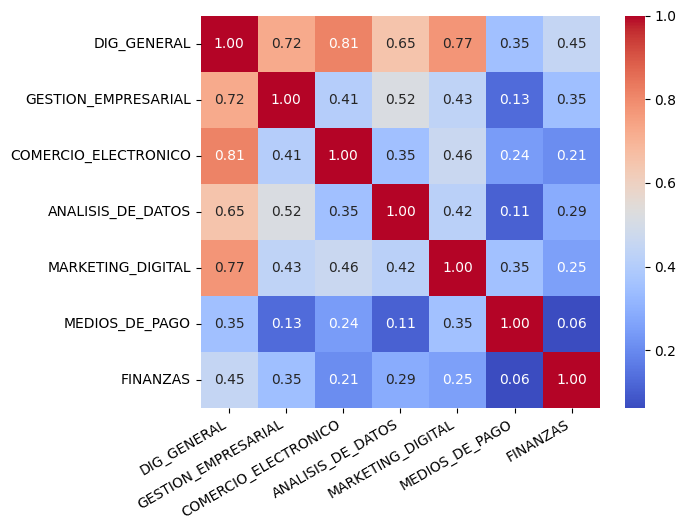

DIG_GENERAL  GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  \
DIG_GENERAL                 1.000                0.723                 0.814   
GESTION_EMPRESARIAL         0.723                1.000                 0.406   
COMERCIO_ELECTRONICO        0.814                0.406                 1.000   
ANALISIS_DE_DATOS           0.649                0.518                 0.352   
MARKETING_DIGITAL           0.774                0.435                 0.463   
MEDIOS_DE_PAGO              0.349                0.129                 0.242   
FINANZAS                    0.450                0.347                 0.206   

                      ANALISIS_DE_DATOS  MARKETING_DIGITAL  MEDIOS_DE_PAGO  \
DIG_GENERAL                       0.649              0.774           0.349   
GESTION_EMPRESARIAL               0.518              0.435           0.129   
COMERCIO_ELECTRONICO              0.352              0.463           0.242   
ANALISIS_DE_DATOS                 1.000              0.421           0.108   
MARKETING_DIGITAL                 0.421              1.000           0.352   
MEDIOS_DE_PAGO                    0.108              0.352           1.000   
FINANZAS                          0.289              0.255           0.063   

                      FINANZAS  
DIG_GENERAL              0.450  
GESTION_EMPRESARIAL      0.347  
COMERCIO_ELECTRONICO     0.206  
ANALISIS_DE_DATOS        0.289  
MARKETING_DIGITAL        0.255  
MEDIOS_DE_PAGO           0.063  
FINANZAS                 1.000

In [39]:
# Matriz de correlación de las variables numéricas del test
print("Matriz de correlación de las variables numéricas del test\n" + "=" * 100)
corr_matrix = data_filtrada[numeric_columns].corr()
plt.figure(figsize=(7.2, 5.4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()
print()

# Mostrar versión numérica del mapa de calor
display(corr_matrix.round(3))

**Test de significancia de correlaciones de Pearson entre variables numéricas**

In [40]:
# Calcular la significancia de correlaciones de Pearson entre variables numéricas
resultados = []
for var1, var2 in itertools.combinations(numeric_columns, 2):
    datos1 = data_filtrada[var1]
    datos2 = data_filtrada[var2]

    # Calcular coeficiente y p-valor
    r, p_val = pearsonr(datos1, datos2)

    resultados.append({
        "Variable 1": var1,
        "Variable 2": var2,
        "Coef. Pearson (r)": round(r, 3),
        "Valor p": round(p_val, 5),
        "Significativa (p < 0.05)": "TRUE" if p_val < 0.05 else "FALSE"})

tabla_pearson = pd.DataFrame(resultados)

print("Test de significancia de correlaciones de Pearson entre variables numéricas\n" + "=" * 100)
print(tabla_pearson.to_string(index=False))

Test de significancia de correlaciones de Pearson entre variables numéricas
          Variable 1           Variable 2  Coef. Pearson (r)  Valor p Significativa (p < 0.05)
         DIG_GENERAL  GESTION_EMPRESARIAL              0.723      0.0                     TRUE
         DIG_GENERAL COMERCIO_ELECTRONICO              0.814      0.0                     TRUE
         DIG_GENERAL    ANALISIS_DE_DATOS              0.649      0.0                     TRUE
         DIG_GENERAL    MARKETING_DIGITAL              0.774      0.0                     TRUE
         DIG_GENERAL       MEDIOS_DE_PAGO              0.349      0.0                     TRUE
         DIG_GENERAL             FINANZAS              0.450      0.0                     TRUE
 GESTION_EMPRESARIAL COMERCIO_ELECTRONICO              0.406      0.0                     TRUE
 GESTION_EMPRESARIAL    ANALISIS_DE_DATOS              0.518      0.0                     TRUE
 GESTION_EMPRESARIAL    MARKETING_DIGITAL              0.435      0.0

# **2. Análisis de resultados del Objetivo Específico 2**

## **2.1. Configuración del entorno y variables de trabajo**
---
---

In [41]:
# Instalar scikit_posthocs para la evaluación post-hoc
import importlib.util
package_name = "scikit_posthocs"

if importlib.util.find_spec(package_name) is None:
    !pip install scikit-posthocs
else:
    print(f"'{package_name}' ya está instalado.")

# Instalar gap_statistic para la evaluación post-hoc
# from gap_statistic import OptimalK
# !pip install gap-statistic

In [42]:
# Importar librerías para entrenar y evaluar modelos de clasificación
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from sklearn.utils import resample
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import itertools # Para generar pares de combinaciones
import warnings

warnings.filterwarnings("ignore")

# Definir las variables de trabajo para la clasificación
df_cluster = data_filtrada.copy() # Dataset limpio y ordenado
clustering_vars = ["GESTION_EMPRESARIAL", "COMERCIO_ELECTRONICO", "ANALISIS_DE_DATOS", "MARKETING_DIGITAL", "MEDIOS_DE_PAGO", "FINANZAS"]
X_original = df_cluster[clustering_vars].copy() # Variables de interés para el clustering
n_samples_original = X_original.shape[0] # Almacenar el número de muestras original

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


## **2.2. Aplicación de algoritmos de Machine Learning para clustering**
---
---

### **2.2.1. Determinación del valor K óptimo referencial**
---

Ejecutar KMeans para determinar K óptimo
Dimensiones de df_cluster cargado: (13928, 16)
Variables seleccionadas para determinar K: ['GESTION_EMPRESARIAL', 'COMERCIO_ELECTRONICO', 'ANALISIS_DE_DATOS', 'MARKETING_DIGITAL', 'MEDIOS_DE_PAGO', 'FINANZAS']
Número de muestras en el dataset original: 13928
Realizando el análisis de K óptimo con: No_Escalado
Evaluando K en el rango: [2, 3, 4, 5, 6, 7, 8, 9, 10]

  K=2 completado. Tiempo: 4.10s.
  K=3 completado. Tiempo: 3.63s.
  K=4 completado. Tiempo: 5.65s.
  K=5 completado. Tiempo: 4.24s.
  K=6 completado. Tiempo: 4.19s.
  K=7 completado. Tiempo: 5.86s.
  K=8 completado. Tiempo: 4.02s.
  K=9 completado. Tiempo: 4.32s.
  K=10 completado. Tiempo: 5.69s.

Calcular K óptimo mediante Gap Statistic
Error al calcular Gap Statistic: name 'OptimalK' is not defined
Verificar que 'gap-statistic' esté instalado y que los datos no sean triviales.
  Tiempo para Gap Statistic: 0.00s.

Análisis de K óptimo completado en 41.71 segundos

Generar visualizacion

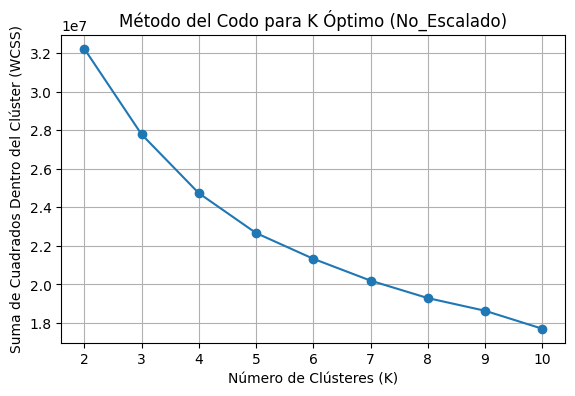

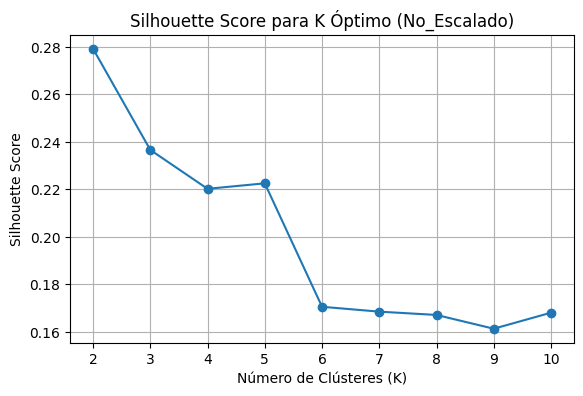

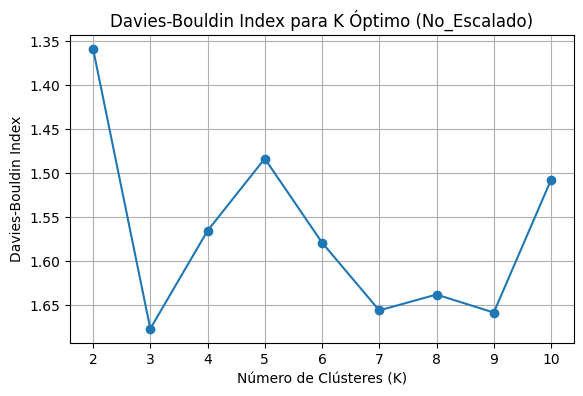

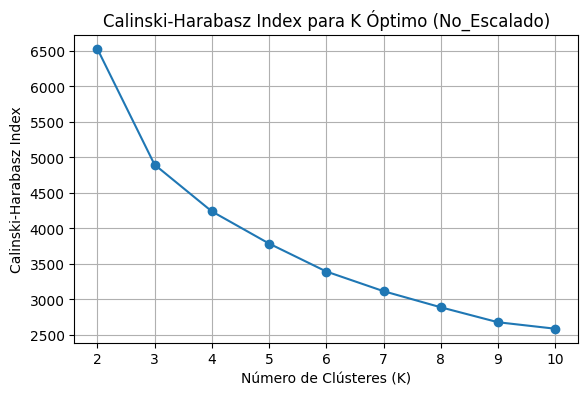



Crear tabla resumen de métricas para determinar el valor de K óptimo
 K          WCSS  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
 2 32217016.9734            0.2791                1.3591                6531.8657
 3 27780550.9811            0.2365                1.6768                4899.1321
 4 24732115.2755            0.2202                1.5657                4240.5070
 5 22666563.4409            0.2225                1.4838                3787.1113
 6 21332074.9757            0.1705                1.5791                3393.1913
 7 20200093.8573            0.1685                1.6560                3115.9258
 8 19295003.8214            0.1671                1.6381                2889.1428
 9 18638018.2899            0.1613                1.6585                2678.2573
10 17706848.3840            0.1680                1.5080                2587.0395


In [43]:
# Seleccionar el método de escalado inicial para determinar K óptimo
# (Se recomienda "No_Escalado" o "MinMaxScaler" ya que las variables están en escala 0-100)
print("Ejecutar KMeans para determinar K óptimo\n" + "=" * 100)
print(f"Dimensiones de df_cluster cargado: {df_cluster.shape}")
print(f"Variables seleccionadas para determinar K: {clustering_vars}")
print(f"Número de muestras en el dataset original: {n_samples_original}")
initial_scaler_name = "No_Escalado"

print(f"Realizando el análisis de K óptimo con: {initial_scaler_name}")
if initial_scaler_name == "No_Escalado": # Representa la escala natural original
    X_scaled_for_k_opt = X_original
elif initial_scaler_name == "MinMaxScaler": # Normaliza 0-100 a 0-1 sin distorsión
    scaler_k = MinMaxScaler()
    X_scaled_for_k_opt = pd.DataFrame(scaler_k.fit_transform(X_original), columns=X_original.columns)
else:
    raise ValueError("El escalador inicial debe ser 'No_Escalado' o 'MinMaxScaler'.")

# Definir el rango de evaluación de K (desde 2 hasta 10)
k_range = range(2, 11)
print(f"Evaluando K en el rango: {list(k_range)}" + "\n")

# Ejecutar el análisis de K mostrando el progreso
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
start_time_k_opt = time.time()

for k in k_range:
    k_start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled_for_k_opt)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_) # Suma de cuadrados dentro de los clústeres

    # Calcular métricas de evaluación solo si es posible
    if len(np.unique(labels)) > 1 and X_scaled_for_k_opt.shape[0] >= k:
        silhouette_scores.append(silhouette_score(X_scaled_for_k_opt, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X_scaled_for_k_opt, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled_for_k_opt, labels))
    else:
        silhouette_scores.append(np.nan)
        davies_bouldin_scores.append(np.nan)
        calinski_harabasz_scores.append(np.nan)

    k_elapsed_time = time.time() - k_start_time
    print(f"  K={k} completado. Tiempo: {k_elapsed_time:.2f}s.")

# Evaluar el número óptimo de clústeres utilizando el método Gap Statistic
print("\nCalcular K óptimo mediante Gap Statistic\n" + "=" * 100)
gap_start_time = time.time()
try:
    optimalK = OptimalK(n_jobs=-1, cluster_array=k_range)
    gap_values, gap_optimal_k = optimalK(X_scaled_for_k_opt, n_refs=10)
    print(f"  K óptimo sugerido por Gap Statistic: {gap_optimal_k}")
except Exception as e:
    print(f"Error al calcular Gap Statistic: {e}")
    print("Verificar que 'gap-statistic' esté instalado y que los datos no sean triviales.")
    gap_values = None
    gap_optimal_k = None

gap_elapsed_time = time.time() - gap_start_time
print(f"  Tiempo para Gap Statistic: {gap_elapsed_time:.2f}s.\n")

total_elapsed_k_opt_time = time.time() - start_time_k_opt
print(f"Análisis de K óptimo completado en {total_elapsed_k_opt_time:.2f} segundos\n")

# Visualizar métricas para la determinación de K óptimo
print("Generar visualizaciones para determinar el valor de K óptimo\n" + "=" * 100)

# Gráfico del método del codo (WCSS)
plt.figure(figsize=(6.5, 4))
plt.plot(k_range, wcss, marker="o")
plt.title(f"Método del Codo para K Óptimo ({initial_scaler_name})", fontsize=12)
plt.xlabel("Número de Clústeres (K)", fontsize=10)
plt.ylabel("Suma de Cuadrados Dentro del Clúster (WCSS)", fontsize=10)
plt.grid(True)
plt.xticks(list(k_range))
plt.show()
print()

# Gráfico de Silhouette Score
plt.figure(figsize=(6.5, 4))
plt.plot(k_range, silhouette_scores, marker="o")
plt.title(f"Silhouette Score para K Óptimo ({initial_scaler_name})", fontsize=12)
plt.xlabel("Número de Clústeres (K)", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.grid(True)
plt.xticks(list(k_range))
plt.show()
print()

# Gráfico de Davies-Bouldin Index
plt.figure(figsize=(6.5, 4))
plt.plot(k_range, davies_bouldin_scores, marker="o")
plt.title(f"Davies-Bouldin Index para K Óptimo ({initial_scaler_name})", fontsize=12)
plt.xlabel("Número de Clústeres (K)", fontsize=10)
plt.ylabel("Davies-Bouldin Index", fontsize=10)
plt.grid(True)
plt.xticks(list(k_range))
plt.gca().invert_yaxis()
plt.show()
print()

# Gráfico de Calinski-Harabasz Index
plt.figure(figsize=(6.5, 4))
plt.plot(k_range, calinski_harabasz_scores, marker="o")
plt.title(f"Calinski-Harabasz Index para K Óptimo ({initial_scaler_name})", fontsize=12)
plt.xlabel("Número de Clústeres (K)", fontsize=10)
plt.ylabel("Calinski-Harabasz Index", fontsize=10)
plt.grid(True)
plt.xticks(list(k_range))
plt.show()
print()

# Gráfico del Gap Statistic
if gap_values is not None:
    plt.figure(figsize=(6.5, 4))
    plt.plot(k_range, [g[0] for g in gap_values], marker="o", label="Gap Statistic")
    if gap_optimal_k is not None:
        plt.axvline(x=gap_optimal_k, color="r", linestyle="--", label=f"Gap Óptimo K={gap_optimal_k}")
    plt.title(f"Gap Statistic para K Óptimo ({initial_scaler_name})", fontsize=12)
    plt.xlabel("Número de Clústeres (K)", fontsize=10)
    plt.ylabel("Gap Value", fontsize=10)
    plt.grid(True)
    plt.xticks(list(k_range))
    plt.legend()
    plt.show()
print()

# Visualizar tabla resumen de métricas para la determinación de K óptimo
# Información utilizada para justificar la elección de K antes de proceder con el análisis de escaladores
print("Crear tabla resumen de métricas para determinar el valor de K óptimo\n" + "=" * 100)
df_k_summary = pd.DataFrame({
    "K": list(k_range),
    "WCSS": wcss,
    "Silhouette Score": silhouette_scores,
    "Davies-Bouldin Index": davies_bouldin_scores,
    "Calinski-Harabasz Index": calinski_harabasz_scores})

print(df_k_summary.to_string(index=False, float_format="%.4f"))

### **2.2.2. Selección del método de escalamiento de variables**
---

In [44]:
# Indicar el número de clusters K óptimo determinado previamente y el número de iteraciones de bootstrap
n_clusters = 5
n_bootstrap_samples = 100

# Diccionario para almacenar los resultados de Silhouette Score para cada escalador
silhouette_scores = {"No_Escalado": [],
                     "StandardScaler": [],
                     "MinMaxScaler": [],
                     "RobustScaler": []}

# Definir proceso de Bootstrap clásico (muestreo con reemplazo) para cada escalador
print(f"Comparación con {n_bootstrap_samples} muestras de bootstrap (tamaño completo con reemplazo)\n" + "=" * 100)

for i in range(n_bootstrap_samples):
    if i % 10 == 0: # Mostrar avance cada 10 iteraciones
        print(f"  Procesando iteración {i+1}/{n_bootstrap_samples}...")

    sample_df = resample(X_original, replace=True, n_samples=n_samples_original, random_state=i)

    # --- No Escalado ---
    kmeans_no_scaled = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    clusters_no_scaled = kmeans_no_scaled.fit_predict(sample_df)
    # Se debe asegurar que se formen k=n_clusters clusters para que Silhouette sea válido
    if len(np.unique(clusters_no_scaled)) == n_clusters and sample_df.shape[0] > 1:
        score = silhouette_score(sample_df, clusters_no_scaled)
        silhouette_scores["No_Escalado"].append(score)
    else:
        print(f"  Advertencia (No_Escalado, iter {i+1}): No se formaron {n_clusters} clústeres o datos insuficientes.")
        pass

    # --- StandardScaler ---
    scaler_standard = StandardScaler()
    X_standard_scaled = scaler_standard.fit_transform(sample_df)
    kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    clusters_standard = kmeans_standard.fit_predict(X_standard_scaled)
    if len(np.unique(clusters_standard)) == n_clusters and X_standard_scaled.shape[0] > 1:
        score = silhouette_score(X_standard_scaled, clusters_standard)
        silhouette_scores["StandardScaler"].append(score)
    else:
        print(f"  Advertencia (StandardScaler, iter {i+1}): No se formaron {n_clusters} clústeres o datos insuficientes.")
        pass

    # --- MinMaxScaler ---
    scaler_minmax = MinMaxScaler()
    X_minmax_scaled = scaler_minmax.fit_transform(sample_df)
    kmeans_minmax = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    clusters_minmax = kmeans_minmax.fit_predict(X_minmax_scaled)
    if len(np.unique(clusters_minmax)) == n_clusters and X_minmax_scaled.shape[0] > 1:
        score = silhouette_score(X_minmax_scaled, clusters_minmax)
        silhouette_scores["MinMaxScaler"].append(score)
    else:
        print(f"  Advertencia (MinMaxScaler, iter {i+1}): No se formaron {n_clusters} clústeres o datos insuficientes.")
        pass

    # --- RobustScaler ---
    scaler_robust = RobustScaler()
    X_robust_scaled = scaler_robust.fit_transform(sample_df)
    kmeans_robust = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    clusters_robust = kmeans_robust.fit_predict(X_robust_scaled)
    if len(np.unique(clusters_robust)) == n_clusters and X_robust_scaled.shape[0] > 1:
        score = silhouette_score(X_robust_scaled, clusters_robust)
        silhouette_scores["RobustScaler"].append(score)
    else:
        print(f"  Advertencia (RobustScaler, iter {i+1}): No se formaron {n_clusters} clústeres o datos insuficientes.")
        pass

print("\nResultados del Bootstrap (Silhouette Scores)\n" + "-" * 80)
for key, values in silhouette_scores.items():
    if values:
        print(f"{key}: Media = {np.mean(values):.4f}, Desviación Estándar = {np.std(values):.4f}, N = {len(values)}")
    else:
        print(f"{key}: No se pudieron calcular scores válidos.")

# Ejecutar el Test de Friedman
# Verificar que todas las listas de scores tienen la misma longitud, rellenando con NaN o truncando.
valid_scalers = {key: values for key, values in silhouette_scores.items() if len(values) > 1}
min_len = min(len(v) for v in valid_scalers.values()) if valid_scalers else 0

if min_len < 2:
    print("\nError: Friedman necesita al menos 2 observaciones por grupo.")
else:
    # Asegurar que el orden de los datos sea consistente para el test
    scalers_names = [key for key in valid_scalers.keys()]
    friedman_data = [valid_scalers[name][:min_len] for name in scalers_names]

    print("\nRealizando Test de Friedman\n" + "=" * 100)
    stat, p_friedman = friedmanchisquare(*friedman_data)
    print(f"Estadístico de Friedman: {stat:.4f}")
    print(f"P-valor del Test de Friedman: {p_friedman:.4f}")

    alpha = 0.05

    if p_friedman < alpha:
        print("\nResultado del Test de Friedman: Hay diferencias estadísticamente significativas entre los escaladores.")
        print("Procediendo con comparaciones pareadas post-hoc (Nemenyi)...")

        # --- Comparaciones Pareadas Post-Hoc (Nemenyi) ---
        df_friedman = pd.DataFrame(np.array(friedman_data).T, columns=scalers_names)
        nemenyi_results = sp.posthoc_nemenyi_friedman(df_friedman)

        print("\nResultados de las Comparaciones Pareadas (Nemenyi P-valores)\n" + "-" * 80)
        print(nemenyi_results.to_string(float_format=lambda x: f"{x:.4f}"))

        print(f"\nComparaciones Significativas (p < {alpha})\n" + "-" * 80)
        significant_pairs = []
        # Iterar sobre la parte superior triangular de la matriz de p-valores
        for i in range(len(nemenyi_results.columns)):
            for j in range(i + 1, len(nemenyi_results.columns)):
                col1 = nemenyi_results.columns[i]
                col2 = nemenyi_results.columns[j]
                # Asegurar el acceder al valor correcto, ya que nemenyi_results es simétrico
                p_value = nemenyi_results.loc[col1, col2] if col1 in nemenyi_results.index else nemenyi_results.loc[col2, col1]
                if p_value < alpha:
                    significant_pairs.append(f"{col1} vs {col2} (p={p_value:.4f})")
        if significant_pairs:
            for pair in significant_pairs:
                print(pair)
        else:
            print("No se encontraron pares significativamente diferentes al nivel de alfa establecido.")

        # --- Decisión basada en los resultados del test ---
        print("\nDecisión sobre el método de escalado\n" + "-" * 80)
        best_scaler = None
        best_mean_score = -np.inf

        for name in scalers_names:
            mean_score = np.mean(valid_scalers[name][:min_len])
            print(f"Media del Silhouette Score para {name}: {mean_score:.4f}")
            if mean_score > best_mean_score:
                best_mean_score = mean_score
                best_scaler = name

        if "No_Escalado" in scalers_names:
            is_no_scaled_competitive = True
            mean_no_scaled = np.mean(valid_scalers["No_Escalado"][:min_len])

            for name in scalers_names:
                if name != "No_Escalado":
                    p_val_vs_no_scaled = None
                    try:
                        # Probar en ambos órdenes por si la indexación no es estricta
                        p_val_vs_no_scaled = nemenyi_results.loc["No_Escalado", name]
                    except KeyError:
                        try:
                            p_val_vs_no_scaled = nemenyi_results.loc[name, "No_Escalado"]
                        except KeyError:
                            print(f"""Advertencia: No se pudo encontrar el valor p para comparar '{name}' vs 'No_Escalado' en los resultados de Nemenyi.\n
                            Se asume que la diferencia no es significativa.""")
                            p_val_vs_no_scaled = 1.0

                    # Si otro escalador es SIGNIFICATIVAMENTE MEJOR que No_Escalado
                    mean_other_scaler = np.mean(valid_scalers[name][:min_len])
                    if (p_val_vs_no_scaled < alpha) and (mean_other_scaler > mean_no_scaled):
                        is_no_scaled_competitive = False
                        break # Ya no es competitivo, se sale del bucle

            if is_no_scaled_competitive:
                print("\n'No_Escalado' no es significativamente peor que las alternativas y su rendimiento es competitivo.")
                print("Por principio de parsimonia, se recomienda utilizar **No_Escalado** para simplificar el pipeline.")
            else:
                print(f"\n'No_Escalado' es significativamente peor o su rendimiento es claramente inferior.")
                print(f"Se recomienda el escalador con la media de Silhouette Score más alta y que no sea significativamente peor que otros de alto rendimiento.")
                print(f"Basado en las medias y el análisis de significancia, el escalador recomendado es: **{best_scaler}**")
        else:
            print(f"\nNo se incluyó 'No_Escalado' en la comparación o no generó scores válidos.")
            print(f"El escalador con la media de Silhouette Score más alta es: **{best_scaler}**")
    else:
        print("\nResultado del Test de Friedman: No hay diferencias estadísticamente significativas entre los escaladores.")
        print("Esto sugiere que el tipo de escalado no tiene un impacto significativo en la calidad del clustering (medido por Silhouette Score).")
        print("Por lo tanto, por simplicidad y parsimonia, se recomienda **No_Escalado**.")

Comparación con 100 muestras de bootstrap (tamaño completo con reemplazo)
  Procesando iteración 1/100...
  Procesando iteración 11/100...
  Procesando iteración 21/100...
  Procesando iteración 31/100...
  Procesando iteración 41/100...
  Procesando iteración 51/100...
  Procesando iteración 61/100...
  Procesando iteración 71/100...
  Procesando iteración 81/100...
  Procesando iteración 91/100...

Resultados del Bootstrap (Silhouette Scores)
--------------------------------------------------------------------------------
No_Escalado: Media = 0.2175, Desviación Estándar = 0.0168, N = 100
StandardScaler: Media = 0.1735, Desviación Estándar = 0.0065, N = 100
MinMaxScaler: Media = 0.2080, Desviación Estándar = 0.0196, N = 100
RobustScaler: Media = 0.2207, Desviación Estándar = 0.1440, N = 100

Realizando Test de Friedman
Estadístico de Friedman: 154.9560
P-valor del Test de Friedman: 0.0000

Resultado del Test de Friedman: Hay diferencias estadísticamente significativas entre los escala

### **2.2.3. Preselección del valor K óptimo definitivo**
---

Preselección de K óptimo (10 iteraciones de Bootstrap)
Evaluando K en el rango: [2, 3, 4, 5, 6, 7, 8, 9, 10]

Número de muestras de bootstrap para preselección: 10
Técnica de muestreo para Bootstrap: Muestreo con reemplazo del mismo tamaño que el dataset original.
Técnica de escalado utilizada: No_Escalado

Ejecución de KMeans para determinar K óptimo con bootstrap clásico
  > Procesando K = 2...
    Progreso K=2: 1/10 iteraciones. Total: 1/90 (1.11%)
    Progreso K=2: 2/10 iteraciones. Total: 2/90 (2.22%)
    Progreso K=2: 3/10 iteraciones. Total: 3/90 (3.33%)
    Progreso K=2: 4/10 iteraciones. Total: 4/90 (4.44%)
    Progreso K=2: 5/10 iteraciones. Total: 5/90 (5.56%)
    Progreso K=2: 6/10 iteraciones. Total: 6/90 (6.67%)
    Progreso K=2: 7/10 iteraciones. Total: 7/90 (7.78%)
    Progreso K=2: 8/10 iteraciones. Total: 8/90 (8.89%)
    Progreso K=2: 9/10 iteraciones. Total: 9/90 (10.00%)
    Progreso K=2: 10/10 iteraciones. Total: 10/90 (11.11%)
  K=2 completado. Tiempo para este K

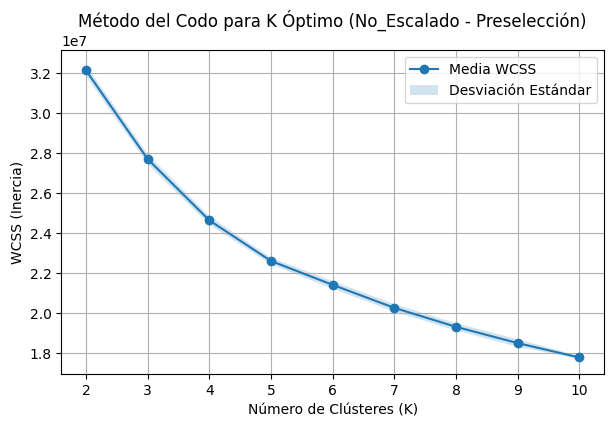

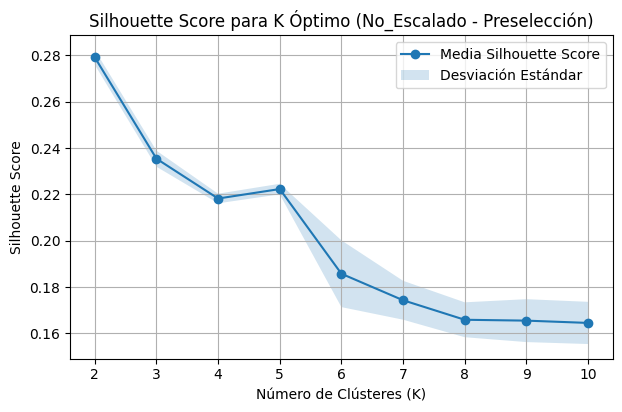

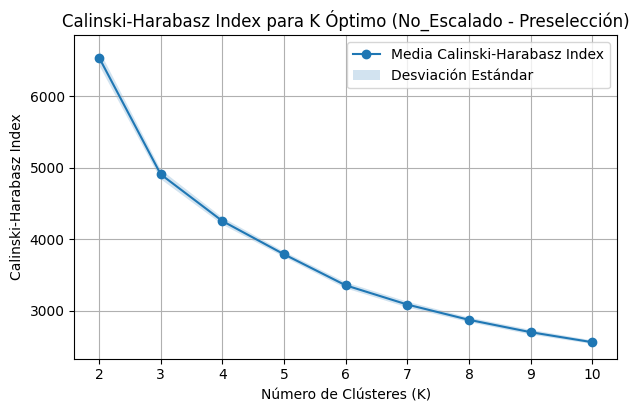

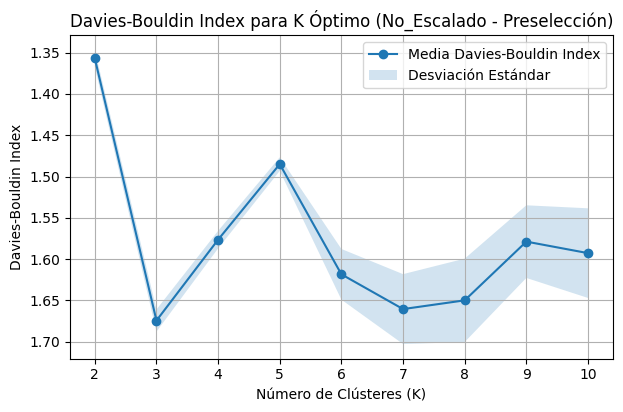

In [45]:
# Configuración de número de iteraciones de Bootstrap y rango de valores K a evaluar
print("Preselección de K óptimo (10 iteraciones de Bootstrap)\n" + "=" * 100)
k_range = range(2, 11)
n_bootstrap_samples = 10

print(f"Evaluando K en el rango: {list(k_range)}" + "\n")
print(f"Número de muestras de bootstrap para preselección: {n_bootstrap_samples}")
print("Técnica de muestreo para Bootstrap: Muestreo con reemplazo del mismo tamaño que el dataset original.")
print("Técnica de escalado utilizada: No_Escalado")

# Diccionario para almacenar los resultados de cada métrica por K y por iteración
bootstrap_results = {
    k: {"wcss": [],
        "silhouette": [],
        "calinski_harabasz": [],
        "davies_bouldin": []} for k in k_range}

# Ejecutar el Análisis de K con Bootstrap
print("\nEjecución de KMeans para determinar K óptimo con bootstrap clásico\n" + "=" * 100)
start_time_total = time.time()
total_kmeans_runs = len(k_range) * n_bootstrap_samples
current_run_count = 0

for k in k_range:
    print(f"  > Procesando K = {k}...")
    k_start_time = time.time()
    for i in range(n_bootstrap_samples):
        current_run_count += 1

        sample_df = resample(X_original, replace=True, n_samples=n_samples_original, random_state=i)
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        kmeans.fit(sample_df)
        labels = kmeans.labels_

        # Almacenar WCSS
        bootstrap_results[k]["wcss"].append(kmeans.inertia_)

        # Calcular y almacenar métricas solo si es posible (exactamente K clústeres y suficientes puntos)
        if len(np.unique(labels)) == k and sample_df.shape[0] >= k:
            bootstrap_results[k]["silhouette"].append(silhouette_score(sample_df, labels))
            bootstrap_results[k]["calinski_harabasz"].append(calinski_harabasz_score(sample_df, labels))
            bootstrap_results[k]["davies_bouldin"].append(davies_bouldin_score(sample_df, labels))
        else:
            # Si no se pueden calcular, añadir NaN para mantener la longitud consistente
            bootstrap_results[k]["silhouette"].append(np.nan)
            bootstrap_results[k]["calinski_harabasz"].append(np.nan)
            bootstrap_results[k]["davies_bouldin"].append(np.nan)

        print(f"    Progreso K={k}: {i+1}/{n_bootstrap_samples} iteraciones. Total: {current_run_count}/{total_kmeans_runs} ({current_run_count/total_kmeans_runs*100:.2f}%)")

    k_elapsed_time = time.time() - k_start_time
    print(f"  K={k} completado. Tiempo para este K: {k_elapsed_time:.2f}s.")

total_elapsed_k_opt_time = time.time() - start_time_total
print(f"\nEvaluación de K óptimo con Bootstrap completada en {total_elapsed_k_opt_time:.2f} segundos")

# Calcular las métricas de evaluación (Media y Desviación Estándar)
print("\nResumen de métricas de K óptimo (Fase 1: No_Escalado con 10 Bootstraps)\n" + "=" * 100)

metrics_summary_data = []
for k in k_range:
    row_data = {"K": k}
    for metric_name, scores_list in bootstrap_results[k].items():
        valid_scores = [score for score in scores_list if not np.isnan(score)]
        if valid_scores:
            row_data[f"Media_{metric_name.capitalize()}"] = np.mean(valid_scores)
            row_data[f"Std_{metric_name.capitalize()}"] = np.std(valid_scores)
        else:
            row_data[f"Media_{metric_name.capitalize()}"] = np.nan
            row_data[f"Std_{metric_name.capitalize()}"] = np.nan

    metrics_summary_data.append(row_data)

df_k_summary = pd.DataFrame(metrics_summary_data)
print("\nTabla resumen de métricas de la preselección de K óptimo\n" + "-" * 80)
print(df_k_summary.to_string(index=False, float_format="%.4f"))

# Visualizar los resultados gráficos de las métricas de evaluación
# Se considera el 'codo' en WCSS, los picos en Silhouette y Calinski-Harabasz, y los valles en Davies-Bouldin
print("\nGenerar visualizaciones de K Óptimo\n" + "=" * 100)

# Gráfico del método del codo (WCSS) - Media y Sombra de Std
plt.figure(figsize=(7, 4.2))
means = df_k_summary["Media_Wcss"]
stds = df_k_summary["Std_Wcss"]
plt.plot(df_k_summary["K"], means, marker="o", label="Media WCSS")
if not stds.isnull().all() and np.any(stds > 1e-6):
    plt.fill_between(df_k_summary["K"], means - stds, means + stds, alpha=0.2, label="Desviación Estándar")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("WCSS (Inercia)")
plt.title("Método del Codo para K Óptimo (No_Escalado - Preselección)")
plt.grid(True)
plt.xticks(list(k_range))
plt.legend()
plt.show()
print()

# Gráficos de otras métricas - (Media y Sombra de Std)
metrics_for_plot = ["Silhouette", "Calinski_harabasz", "Davies_bouldin"]
metric_titles = {
    "Silhouette": "Silhouette Score",
    "Calinski_harabasz": "Calinski-Harabasz Index",
    "Davies_bouldin": "Davies-Bouldin Index"}

higher_is_better = {"Silhouette": True, "Calinski_harabasz": True, "Davies_bouldin": False}

for metric in metrics_for_plot:
    plt.figure(figsize=(7, 4.2))
    means = df_k_summary[f"Media_{metric}"]
    stds = df_k_summary[f"Std_{metric}"]
    plt.plot(df_k_summary["K"], means, marker="o", label=f"Media {metric_titles[metric]}")
    if not stds.isnull().all() and np.any(stds > 1e-6):
        plt.fill_between(df_k_summary["K"], means - stds, means + stds, alpha=0.2, label="Desviación Estándar")
    plt.xlabel("Número de Clústeres (K)")
    plt.ylabel(metric_titles[metric])
    plt.title(f"{metric_titles[metric]} para K Óptimo (No_Escalado - Preselección)")
    plt.grid(True)
    plt.xticks(list(k_range))
    if not higher_is_better[metric]: # Invertir eje Y si menor es mejor (Davies-Bouldin)
        plt.gca().invert_yaxis()
    plt.legend()
    plt.show()
    print()

### **2.2.4. Validación rigurosa del valor K óptimo definitivo**
---

Validación Rigurosa de K óptimo (100 iteraciones de Bootstrap con No_Escalado)
Evaluando K en el rango más prometedor: [4, 5, 6]

Número de muestras de bootstrap para validación rigurosa: 100
Técnica de muestreo para Bootstrap: Muestreo con reemplazo del mismo tamaño que el dataset original.
Técnica de escalado utilizada: No_Escalado

Ejecución de KMeans para validar K óptimo con bootstrap clásico
  > Procesando K = 4...
    4 clústeres: 10/100 iteraciones. Progreso total: 3.33%
    4 clústeres: 20/100 iteraciones. Progreso total: 6.67%
    4 clústeres: 30/100 iteraciones. Progreso total: 10.00%
    4 clústeres: 40/100 iteraciones. Progreso total: 13.33%
    4 clústeres: 50/100 iteraciones. Progreso total: 16.67%
    4 clústeres: 60/100 iteraciones. Progreso total: 20.00%
    4 clústeres: 70/100 iteraciones. Progreso total: 23.33%
    4 clústeres: 80/100 iteraciones. Progreso total: 26.67%
    4 clústeres: 90/100 iteraciones. Progreso total: 30.00%
    4 clústeres: 100/100 iteraciones.

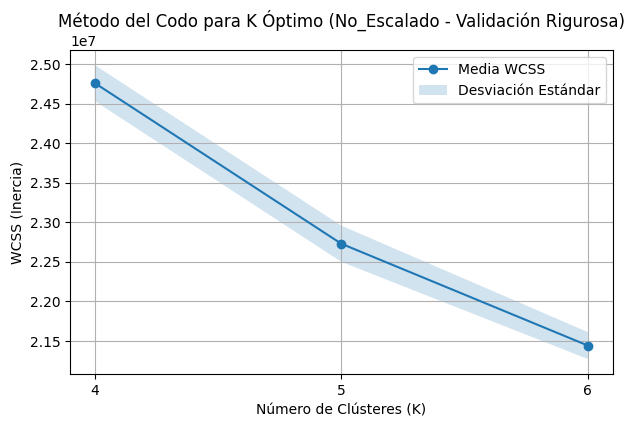

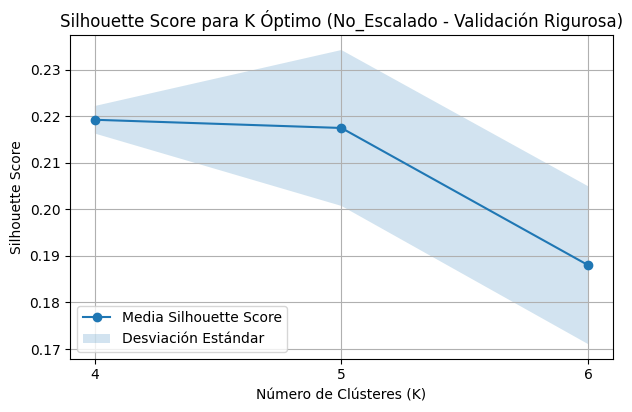

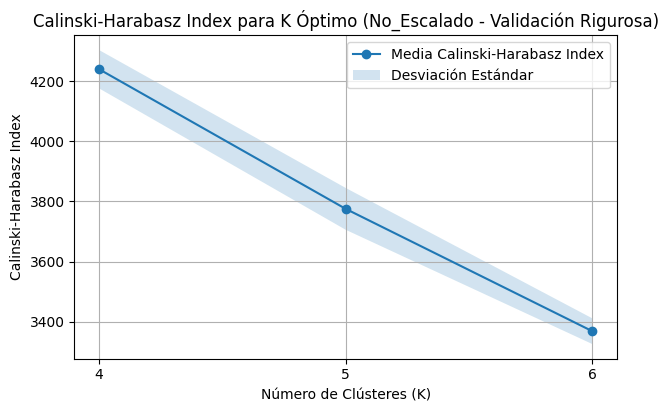

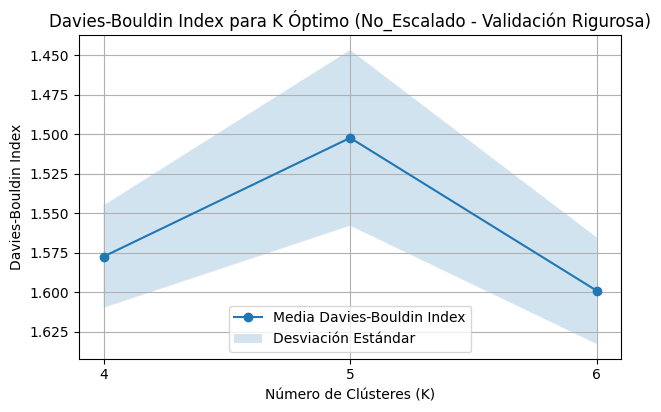

In [46]:
# Configuración de número de iteraciones Bootstrap y rango optimizado de K a Evaluar
print("Validación Rigurosa de K óptimo (100 iteraciones de Bootstrap con No_Escalado)\n" + "=" * 100)
k_range_phase2 = [4, 5, 6]
n_bootstrap_samples_phase2 = 100

print(f"Evaluando K en el rango más prometedor: {k_range_phase2}" + "\n")
print(f"Número de muestras de bootstrap para validación rigurosa: {n_bootstrap_samples_phase2}")
print("Técnica de muestreo para Bootstrap: Muestreo con reemplazo del mismo tamaño que el dataset original.")
print("Técnica de escalado utilizada: No_Escalado")

# Diccionario para almacenar los resultados de cada métrica por K y por iteración
bootstrap_results_phase2 = {
    k: {"wcss": [],
        "silhouette": [],
        "calinski_harabasz": [],
        "davies_bouldin": []} for k in k_range_phase2}

# Ejecutar el Análisis de K con Bootstrap
print("\nEjecución de KMeans para validar K óptimo con bootstrap clásico\n" + "=" * 100)
start_time_total = time.time()
total_kmeans_runs = len(k_range_phase2) * n_bootstrap_samples_phase2
current_run_count = 0

for k in k_range_phase2:
    print(f"  > Procesando K = {k}...")
    k_start_time = time.time()
    for i in range(n_bootstrap_samples_phase2):
        current_run_count += 1

        sample_df = resample(X_original, replace=True, n_samples=n_samples_original, random_state=i)
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        kmeans.fit(sample_df)
        labels = kmeans.labels_

        # Almacenar WCSS
        bootstrap_results_phase2[k]["wcss"].append(kmeans.inertia_)

        # Calcular y almacenar métricas solo si es posible (más de 1 clúster y suficientes puntos)
        if len(np.unique(labels)) == k and sample_df.shape[0] >= k:
            bootstrap_results_phase2[k]["silhouette"].append(silhouette_score(sample_df, labels))
            bootstrap_results_phase2[k]["calinski_harabasz"].append(calinski_harabasz_score(sample_df, labels))
            bootstrap_results_phase2[k]["davies_bouldin"].append(davies_bouldin_score(sample_df, labels))
        else:
            bootstrap_results_phase2[k]["silhouette"].append(np.nan)
            bootstrap_results_phase2[k]["calinski_harabasz"].append(np.nan)
            bootstrap_results_phase2[k]["davies_bouldin"].append(np.nan)

        if (i + 1) % 10 == 0 or (i + 1) == n_bootstrap_samples_phase2:
            progress_percentage = (current_run_count / total_kmeans_runs) * 100
            print(f"    {k} clústeres: {i+1}/{n_bootstrap_samples_phase2} iteraciones. Progreso total: {progress_percentage:.2f}%")

    k_elapsed_time = time.time() - k_start_time
    print(f"  K={k} completado. Tiempo para este K: {k_elapsed_time:.2f}s.")

total_elapsed_k_opt_time = time.time() - start_time_total
print(f"\nEvaluación de K óptimo con Bootstrap completada en {total_elapsed_k_opt_time:.2f} segundos")

# Calcular las métricas de evaluación (Media y Desviación Estándar)
print("\nResumen de métricas de K óptimo (Fase 2: No_Escalado con 100 Bootstraps)\n" + "=" * 100)

metrics_summary_data_phase2 = []
for k in k_range_phase2:
    row_data = {"K": k}
    for metric_name, scores_list in bootstrap_results_phase2[k].items():
        valid_scores = [score for score in scores_list if not np.isnan(score)]
        if valid_scores:
            row_data[f"Media_{metric_name.capitalize()}"] = np.mean(valid_scores)
            row_data[f"Std_{metric_name.capitalize()}"] = np.std(valid_scores)
        else:
            row_data[f"Media_{metric_name.capitalize()}"] = np.nan
            row_data[f"Std_{metric_name.capitalize()}"] = np.nan

    metrics_summary_data_phase2.append(row_data)

df_k_summary_phase2 = pd.DataFrame(metrics_summary_data_phase2)
print("\nTabla resumen de métricas de la validación de K óptimo\n" + "-" * 80)
print(df_k_summary_phase2.to_string(index=False, float_format="%.4f"))

# Visualizar los resultados gráficos de las métricas de validación
# Se considera el 'codo' en WCSS, los picos en Silhouette y Calinski-Harabasz, y los valles en Davies-Bouldin
print("\nGenerar visualizaciones de K Óptimo\n" + "=" * 100)

# Gráfico del método del codo (WCSS) - Media y Sombra de Std
plt.figure(figsize=(7, 4.2))
means = df_k_summary_phase2["Media_Wcss"]
stds = df_k_summary_phase2["Std_Wcss"]
plt.plot(df_k_summary_phase2["K"], means, marker="o", label="Media WCSS")
if not stds.isnull().all() and np.any(stds > 1e-6):
    plt.fill_between(df_k_summary_phase2["K"], means - stds, means + stds, alpha=0.2, label="Desviación Estándar")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("WCSS (Inercia)")
plt.title("Método del Codo para K Óptimo (No_Escalado - Validación Rigurosa)")
plt.grid(True)
plt.xticks(k_range_phase2)
plt.legend()
plt.show()
print()

# Gráficos de otras métricas (Media y Sombra de Std)
metrics_for_plot = ["Silhouette", "Calinski_harabasz", "Davies_bouldin"]
metric_titles = {
    "Silhouette": "Silhouette Score",
    "Calinski_harabasz": "Calinski-Harabasz Index",
    "Davies_bouldin": "Davies-Bouldin Index"}

higher_is_better = {"Silhouette": True, "Calinski_harabasz": True, "Davies_bouldin": False}

for metric in metrics_for_plot:
    plt.figure(figsize=(7, 4.2))
    means = df_k_summary_phase2[f"Media_{metric}"]
    stds = df_k_summary_phase2[f"Std_{metric}"]
    plt.plot(df_k_summary_phase2["K"], means, marker="o", label=f"Media {metric_titles[metric]}")
    if not stds.isnull().all() and np.any(stds > 1e-6):
        plt.fill_between(df_k_summary_phase2["K"], means - stds, means + stds, alpha=0.2, label="Desviación Estándar")
    plt.xlabel("Número de Clústeres (K)")
    plt.ylabel(metric_titles[metric])
    plt.title(f"{metric_titles[metric]} para K Óptimo (No_Escalado - Validación Rigurosa)")
    plt.grid(True)
    plt.xticks(k_range_phase2)
    if not higher_is_better[metric]: # Invertir eje Y si menor es mejor (Davies-Bouldin)
        plt.gca().invert_yaxis()
    plt.legend()
    plt.show()
    print()

Gráficas de las métricas para la etapa de preselección


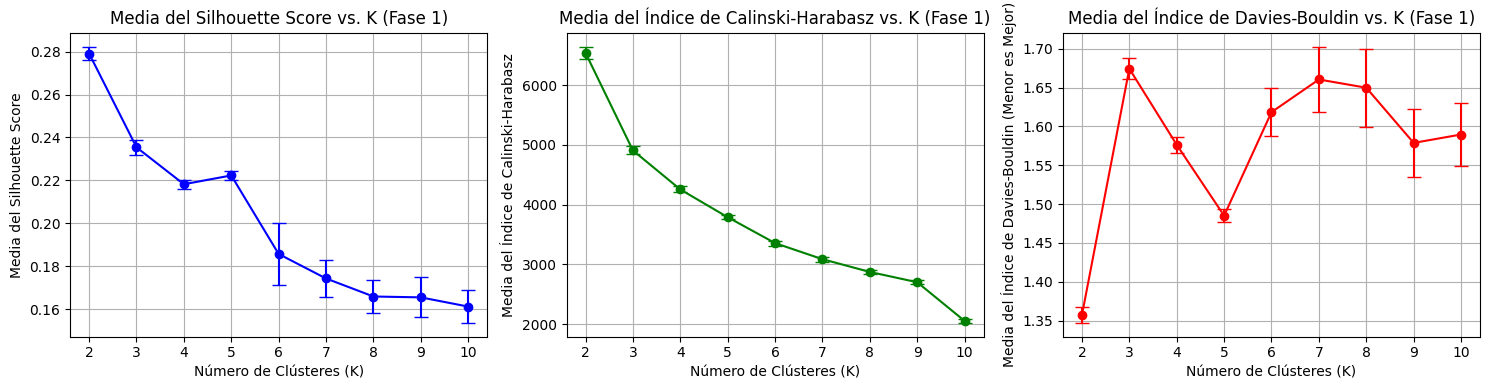


Gráficas de las métricas para la etapa de validación


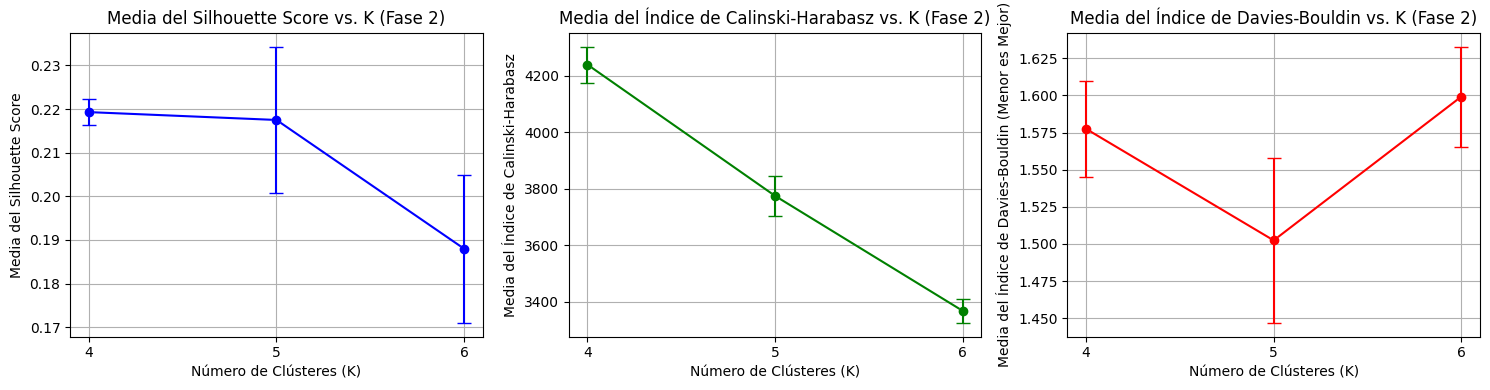

In [47]:
# Generar gráficas de las métricas para las etapas de preselección y validación
# (Fase 1 - Preselección con 10 Iteraciones de Bootstrap)
data_t19 = {
    "K": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Media_Silhouette": [0.2791, 0.2354, 0.2182, 0.2223, 0.1857, 0.1743, 0.1659, 0.1655, 0.1612],
    "Std_Silhouette": [0.0032, 0.0035, 0.0021, 0.0023, 0.0144, 0.0084, 0.0075, 0.0093, 0.0076],
    "Media_Calinski_harabasz": [6541.7580, 4908.0131, 4254.5227, 3789.3693, 3355.2908, 3086.0056, 2872.4848, 2699.5586, 2051.17],
    "Std_Calinski_harabasz": [105.2851, 66.9124, 49.6981, 36.9055, 41.8878, 40.4060, 32.1809, 33.2525, 32.77],
    "Media_Davies_bouldin": [1.3570, 1.6744, 1.5764, 1.4850, 1.6184, 1.6605, 1.6499, 1.5788, 1.5896],
    "Std_Davies_bouldin": [0.0101, 0.0134, 0.0106, 0.0082, 0.0307, 0.0423, 0.0505, 0.0440, 0.0400]
}
df_t19 = pd.DataFrame(data_t19)

# (Fase 2 - Validación Rigurosa con 100 Iteraciones de Bootstrap)
data_t20 = {
    "K": [4, 5, 6],
    "Media_Silhouette": [0.2193, 0.2175, 0.1880],
    "Std_Silhouette": [0.0030, 0.0168, 0.0170],
    "Media_Calinski_harabasz": [4240.0078, 3775.4976, 3368.6263],
    "Std_Calinski_harabasz": [63.7506, 69.5661, 42.7560],
    "Media_Davies_bouldin": [1.5775, 1.5024, 1.5992],
    "Std_Davies_bouldin": [0.0324, 0.0556, 0.0337]
}
df_t20 = pd.DataFrame(data_t20)

# --- Generar gráficas para la preselección ---
print("Gráficas de las métricas para la etapa de preselección\n" + "=" * 100)
plt.figure(figsize=(15, 4))

# Media del Silhouette Score vs. K (Fase 1, con Std Dev)
plt.subplot(1, 3, 1)
sns.lineplot(x="K", y="Media_Silhouette", data=df_t19, marker="o", color="blue")
plt.errorbar(x=df_t19["K"], y=df_t19["Media_Silhouette"], yerr=df_t19["Std_Silhouette"], fmt="o", color="blue", capsize=5)
plt.title("Media del Silhouette Score vs. K (Fase 1)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Media del Silhouette Score")
plt.xticks(df_t19["K"])
plt.grid(True)

# Media del Índice de Calinski-Harabasz vs. K (Fase 1, con Std Dev)
plt.subplot(1, 3, 2)
sns.lineplot(x="K", y="Media_Calinski_harabasz", data=df_t19, marker="o", color="green")
plt.errorbar(x=df_t19["K"], y=df_t19["Media_Calinski_harabasz"], yerr=df_t19["Std_Calinski_harabasz"], fmt="o", color="green", capsize=5)
plt.title("Media del Índice de Calinski-Harabasz vs. K (Fase 1)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Media del Índice de Calinski-Harabasz")
plt.xticks(df_t19["K"])
plt.grid(True)

# Media del Índice de Davies-Bouldin vs. K (Fase 1, con Std Dev)
plt.subplot(1, 3, 3)
sns.lineplot(x="K", y="Media_Davies_bouldin", data=df_t19, marker="o", color="red")
plt.errorbar(x=df_t19["K"], y=df_t19["Media_Davies_bouldin"], yerr=df_t19["Std_Davies_bouldin"], fmt="o", color="red", capsize=5)
plt.title("Media del Índice de Davies-Bouldin vs. K (Fase 1)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Media del Índice de Davies-Bouldin (Menor es Mejor)")
plt.xticks(df_t19["K"])
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Generar gráficas para la validación ---
print("\nGráficas de las métricas para la etapa de validación\n" + "=" * 100)
plt.figure(figsize=(15, 4))

# Media del Silhouette Score vs. K (Fase 2, con Std Dev)
plt.subplot(1, 3, 1)
sns.lineplot(x="K", y="Media_Silhouette", data=df_t20, marker="o", color="blue")
plt.errorbar(x=df_t20["K"], y=df_t20["Media_Silhouette"], yerr=df_t20["Std_Silhouette"], fmt="o", color="blue", capsize=5)
plt.title("Media del Silhouette Score vs. K (Fase 2)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Media del Silhouette Score")
plt.xticks(df_t20["K"])
plt.grid(True)

# Media del Índice de Calinski-Harabasz vs. K (Fase 2, con Std Dev)
plt.subplot(1, 3, 2)
sns.lineplot(x="K", y="Media_Calinski_harabasz", data=df_t20, marker="o", color="green")
plt.errorbar(x=df_t20["K"], y=df_t20["Media_Calinski_harabasz"], yerr=df_t20["Std_Calinski_harabasz"], fmt="o", color="green", capsize=5)
plt.title("Media del Índice de Calinski-Harabasz vs. K (Fase 2)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Media del Índice de Calinski-Harabasz")
plt.xticks(df_t20["K"])
plt.grid(True)

# Media del Índice de Davies-Bouldin vs. K (Fase 2, con Std Dev)
plt.subplot(1, 3, 3)
sns.lineplot(x="K", y="Media_Davies_bouldin", data=df_t20, marker="o", color="red")
plt.errorbar(x=df_t20["K"], y=df_t20["Media_Davies_bouldin"], yerr=df_t20["Std_Davies_bouldin"], fmt="o", color="red", capsize=5)
plt.title("Media del Índice de Davies-Bouldin vs. K (Fase 2)")
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Media del Índice de Davies-Bouldin (Menor es Mejor)")
plt.xticks(df_t20["K"])
plt.grid(True)

plt.tight_layout()
plt.show()

Generación de clústeres definitivos y sus perfiles para K=4, K=5 y K=6

Entrenando KMeans para K = 4...
Centroides calculados para K=4
--------------------------------------------------------------------------------
   GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS
0                36.93                 59.67              22.02              34.04           35.87     43.77
1                17.84                  8.12               9.20              15.85           23.39     34.63
2                42.68                 21.23              54.32              33.16           25.78     51.99
3                52.97                 69.73              69.51              43.18           37.99     56.26

Entrenando KMeans para K = 5...
Centroides calculados para K=5
--------------------------------------------------------------------------------
   GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  MARKETING_DIGITAL  MEDIOS_DE_

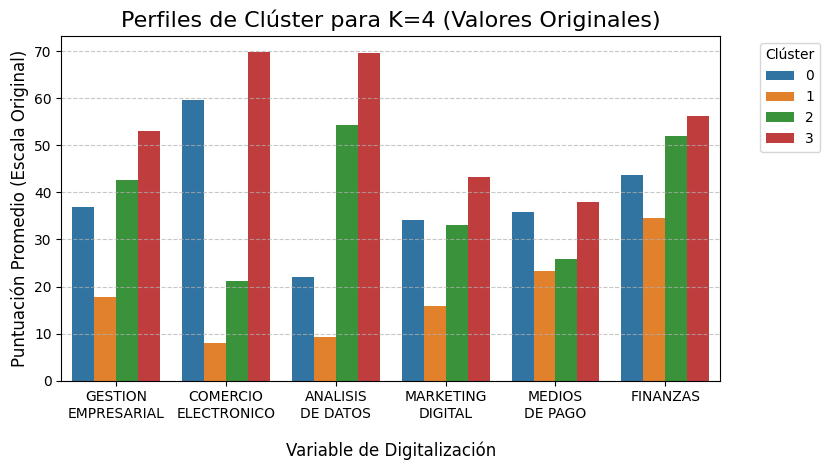



Gráfico de Perfiles de Clúster para K=5
--------------------------------------------------------------------------------


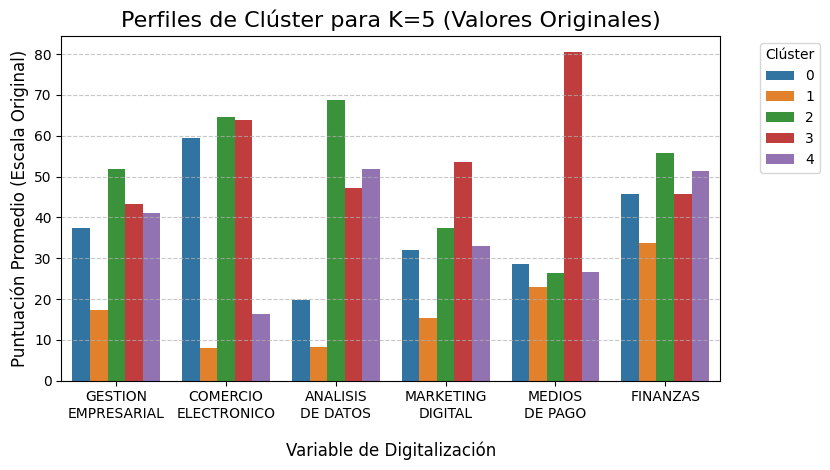



Gráfico de Perfiles de Clúster para K=6
--------------------------------------------------------------------------------


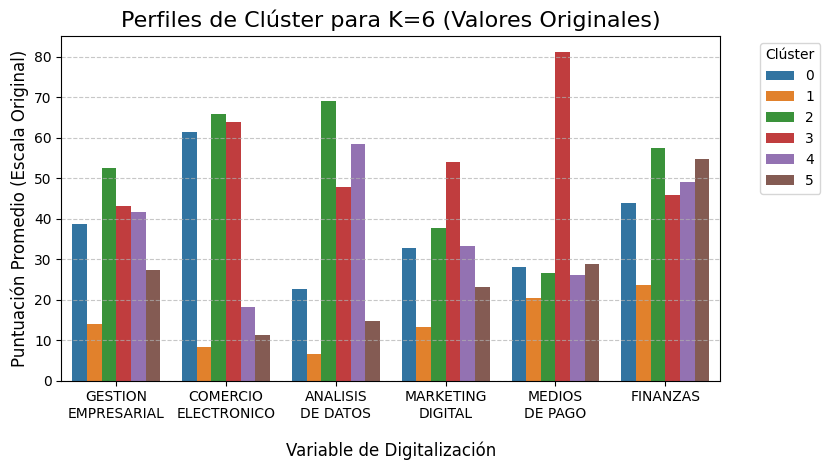

In [48]:
# Generar y almacenar los dataframes de centroides y etiquetas para K=4, K=5 y K=6
print("Generación de clústeres definitivos y sus perfiles para K=4, K=5 y K=6\n" + "=" * 100)
centroids_for_plotting = {}
labels_for_k4 = None # Para almacenar las etiquetas de K=4
labels_for_k5 = None # Para almacenar las etiquetas de K=5
labels_for_k6 = None # Para almacenar las etiquetas de K=6

for k_val in [4, 5, 6]:
    print(f"\nEntrenando KMeans para K = {k_val}...")
    kmeans_model = KMeans(n_clusters=k_val, random_state=42, n_init="auto")
    kmeans_model.fit(X_original)

    # Guardar los centroides en un dataframe
    centroids_df = pd.DataFrame(kmeans_model.cluster_centers_, columns=clustering_vars)
    centroids_for_plotting[k_val] = centroids_df
    if k_val == 4:
        labels_for_k4 = kmeans_model.labels_
    elif k_val == 5:
        labels_for_k5 = kmeans_model.labels_
    elif k_val == 6:
        labels_for_k6 = kmeans_model.labels_

    print(f"Centroides calculados para K={k_val}\n" + "-" * 80)
    print(centroids_df.to_string(float_format="%.2f"))

# Genera los gráficos de barras de los perfiles de clúster directamente desde el dataframe de centroides
def plot_cluster_profiles_from_centroids(k_value, centroids_df, vars_list):

    print(f"\nGráfico de Perfiles de Clúster para K={k_value}\n" + "-" * 80)

    # El índice de centroids_df se refeire a los IDs de los clústeres (0, 1, ..., K-1)
    df_plot = centroids_df.reset_index().rename(columns={"index": "Clúster"})
    df_plot_melted = df_plot.melt(id_vars="Clúster", var_name="Variable de Digitalización", value_name="Puntuación Promedio")

    # Reemplazar los nombres de las variables por los personalizados con saltos de línea
    nombres = ["GESTION\nEMPRESARIAL", "COMERCIO\nELECTRONICO", "ANALISIS\nDE DATOS", "MARKETING\nDIGITAL", "MEDIOS\nDE PAGO", "FINANZAS"]
    df_plot_melted["Variable de Digitalización"] = df_plot_melted["Variable de Digitalización"].map(dict(zip(vars_list, nombres)))

    plt.figure(figsize=(8.4, 4.8))
    sns.barplot(
        x="Variable de Digitalización",
        y="Puntuación Promedio",
        hue="Clúster",
        data=df_plot_melted,
        palette="tab10")

    plt.title(f"Perfiles de Clúster para K={k_value} (Valores Originales)", fontsize=16)
    plt.xlabel("Variable de Digitalización", fontsize=12)
    plt.ylabel("Puntuación Promedio (Escala Original)", fontsize=12)
    plt.gca().xaxis.labelpad = 15
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(title="Clúster", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
    print()

# Gráficos para K=4, K=5 y K=6
plot_cluster_profiles_from_centroids(4, centroids_for_plotting[4], clustering_vars)
plot_cluster_profiles_from_centroids(5, centroids_for_plotting[5], clustering_vars)
plot_cluster_profiles_from_centroids(6, centroids_for_plotting[6], clustering_vars)

## **2.3. Evaluación comparativa de algoritmos de clustering**
---
---


### **2.3.1. Algoritmos de clustering basados en densidad (DBSCAN y HDBSCAN)**
---

In [49]:
# Evaluar algoritmos de clustering basados en densidad (DBSCAN y HDBSCAN)
print("Evaluación de algoritmos de clustering basados en densidad (DBSCAN y HDBSCAN)\n" + "=" * 100)

# --- DBSCAN ---
print("\nAlgoritmo de clustering DBSCAN\n" + "-" * 80)
# Parámetros críticos de DBSCAN:
# eps (epsilon): distancia máxima entre dos muestras para que una sea considerada como en la vecindad de la otra.
# min_samples: número de muestras en una vecindad para que un punto sea considerado como un punto central.

# Usamos valores que típicamente resultan en muchos outliers o pocos clústeres.
# Es probable que los datos de MYPEs no tengan 'densidades' claras sino más bien una distribución dispersa.
dbscan_model_1 = DBSCAN(eps=20, min_samples=5) # primera prueba
dbscan_labels_1 = dbscan_model_1.fit_predict(X_original)
n_clusters_dbscan_1 = len(set(dbscan_labels_1)) - (1 if -1 in dbscan_labels_1 else 0)
n_noise_dbscan_1 = list(dbscan_labels_1).count(-1)

print(f"  DBSCAN (eps=20, min_samples=5):")
print(f"    Número de clústeres encontrados: {n_clusters_dbscan_1}")
print(f"    Número de puntos de ruido (outliers): {n_noise_dbscan_1} ({(n_noise_dbscan_1 / len(X_original)) * 100:.2f}%)")

# Prueba realizada con otros parámetros buscando una mejora (no es significativa si los datos no son de densidad)
dbscan_model_2 = DBSCAN(eps=30, min_samples=10) # segunda prueba
dbscan_labels_2 = dbscan_model_2.fit_predict(X_original)
n_clusters_dbscan_2 = len(set(dbscan_labels_2)) - (1 if -1 in dbscan_labels_2 else 0)
n_noise_dbscan_2 = list(dbscan_labels_2).count(-1)

print(f"  DBSCAN (eps=30, min_samples=10):")
print(f"    Número de clústeres encontrados: {n_clusters_dbscan_2}")
print(f"    Número de puntos de ruido (outliers): {n_noise_dbscan_2} ({(n_noise_dbscan_2 / len(X_original)) * 100:.2f}%)")


# --- HDBSCAN ---
print("\nAlgoritmo de clustering HDBSCAN\n" + "-" * 80)
# Parámetros críticos de HDBSCAN:
# Es más robusto a la selección de parámetros, pero aún así puede no encontrar clusters si la densidad no es una característica predominante.
# min_cluster_size: el número mínimo de puntos en un clúster.
# prediction_data=True: para poder asignar puntos nuevos.
# cluster_selection_epsilon: un umbral para cortar el árbol de jerarquía.
hdbscan_model_1 = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5) # primera prueba
hdbscan_labels_1 = hdbscan_model_1.fit_predict(X_original)
n_clusters_hdbscan_1 = len(set(hdbscan_labels_1)) - (1 if -1 in hdbscan_labels_1 else 0)
n_noise_hdbscan_1 = list(hdbscan_labels_1).count(-1)

print(f"  HDBSCAN (min_cluster_size=15, min_samples=5):")
print(f"    Número de clústeres encontrados: {n_clusters_hdbscan_1}")
print(f"    Número de puntos de ruido (outliers): {n_noise_hdbscan_1} ({(n_noise_hdbscan_1 / len(X_original)) * 100:.2f}%)")

Evaluación de algoritmos de clustering basados en densidad (DBSCAN y HDBSCAN)

Algoritmo de clustering DBSCAN
--------------------------------------------------------------------------------
  DBSCAN (eps=20, min_samples=5):
    Número de clústeres encontrados: 26
    Número de puntos de ruido (outliers): 912 (6.55%)
  DBSCAN (eps=30, min_samples=10):
    Número de clústeres encontrados: 1
    Número de puntos de ruido (outliers): 87 (0.62%)

Algoritmo de clustering HDBSCAN
--------------------------------------------------------------------------------
  HDBSCAN (min_cluster_size=15, min_samples=5):
    Número de clústeres encontrados: 91
    Número de puntos de ruido (outliers): 5958 (42.78%)


### **2.3.2. Algoritmos de clustering K-Means, GMM y Agglomerative**
---

In [50]:
# Evaluar algoritmos de clustering basados en particiones, probabilísticos y jerárquicos (K=5)
print("Evaluación de algoritmos de clustering para K=5 (Sin Bootstrap, conjunto completo de datos)\n" + "=" * 100)
algorithms = {
    "K-Means_RandomInit": KMeans(n_clusters=5, random_state=42, n_init="auto", init="random"),
    "K-Means_KMeans++": KMeans(n_clusters=5, init="k-means++", random_state=42, n_init="auto"),
    "GMM-Full": GaussianMixture(n_components=5, covariance_type="full", random_state=42),
    "GMM-Spherical": GaussianMixture(n_components=5, covariance_type="spherical", random_state=42),
    "Agglomerative-Ward": AgglomerativeClustering(n_clusters=5, linkage="ward")
    }

results = {algo_name: {} for algo_name in algorithms.keys()}

# Ejecutar la evaluación para cada algoritmo
print("\nResultados de la evaluación de cada algoritmo (K=5, Sin Bootstrap)\n" + "-" * 80)
for algo_name, model in algorithms.items():
    labels = None
    try:
        if "GMM" in algo_name or "K-Means" in algo_name:
            model.fit(X_original)
            labels = model.predict(X_original)
        elif "Agglomerative" in algo_name:
            labels = model.fit_predict(X_original)
        else:
            raise ValueError(f"Algoritmo '{algo_name}' no reconocido.")

        # Validar etiquetas y calcular métricas
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1 and len(unique_labels) == 5:
            if X_original.shape[0] >= 2 and len(labels) == X_original.shape[0]:
                results[algo_name]["Silhouette"] = silhouette_score(X_original, labels)
                results[algo_name]["Calinski_Harabasz"] = calinski_harabasz_score(X_original, labels)
                results[algo_name]["Davies_Bouldin"] = davies_bouldin_score(X_original, labels)
            else:
                print(f"  Advertencia: Datos insuficientes o labels no coinciden para {algo_name}.")
                results[algo_name]["Silhouette"] = np.nan
                results[algo_name]["Calinski_Harabasz"] = np.nan
                results[algo_name]["Davies_Bouldin"] = np.nan
        else:
            print(f"  Advertencia: {algo_name} no formó 5 clústeres. Encontrados: {len(unique_labels)}. Métricas NaN.")
            results[algo_name]["Silhouette"] = np.nan
            results[algo_name]["Calinski_Harabasz"] = np.nan
            results[algo_name]["Davies_Bouldin"] = np.nan

    except Exception as e:
        print(f"  Error al ejecutar {algo_name}: {e}. Métricas NaN.")
        results[algo_name]["Silhouette"] = np.nan
        results[algo_name]["Calinski_Harabasz"] = np.nan
        results[algo_name]["Davies_Bouldin"] = np.nan

summary_results = pd.DataFrame.from_dict(results, orient="index")
summary_results = summary_results[["Silhouette", "Calinski_Harabasz", "Davies_Bouldin"]]
print(summary_results.to_string(float_format=lambda x: f"{x:.4f}"))

Evaluación de algoritmos de clustering para K=5 (Sin Bootstrap, conjunto completo de datos)

Resultados de la evaluación de cada algoritmo (K=5, Sin Bootstrap)
--------------------------------------------------------------------------------
                    Silhouette  Calinski_Harabasz  Davies_Bouldin
K-Means_RandomInit      0.2227          3787.4389          1.4848
K-Means_KMeans++        0.2225          3787.1113          1.4838
GMM-Full                0.0706          2451.0016          2.1391
GMM-Spherical           0.2152          3688.9485          1.4860
Agglomerative-Ward      0.1686          3064.6113          1.8493


## **2.4. Selección del modelo óptimo**
---
---

In [51]:
# Evaluar algoritmos de clustering basados en particiones, probabilísticos y jerárquicos (K=5)
print("Evaluación de algoritmos de clustering para K=5 (Bootstrap con No_Escalado)\n" + "=" * 100)
algorithms = {
    "K-Means_RandomInit": KMeans(n_clusters=5, random_state=42, n_init="auto", init="random"),
    "K-Means_KMeans++": KMeans(n_clusters=5, init="k-means++", random_state=42, n_init="auto"),
    "GMM-Spherical": GaussianMixture(n_components=5, covariance_type="spherical", random_state=42),
    "Agglomerative-Ward": AgglomerativeClustering(n_clusters=5, linkage="ward")
}

n_bootstrap_iterations = 10
n_samples_bootstrap = n_samples_original # Muestras del mismo tamaño que el original (bootstrap clásico)

results = {algo_name: {"Silhouette": [], "Calinski_Harabasz": [], "Davies_Bouldin": []} for algo_name in algorithms.keys()}

# Ejecutar la evaluación con bootstrap para cada algoritmo
print(f"Evaluación de algoritmos con {n_bootstrap_iterations} iteraciones de bootstrap (muestreo con reemplazo) para K=5\n" + "-" * 80)
for i in range(n_bootstrap_iterations):
    if i % 1 == 0:
        print(f"  Procesando iteración {i+1}/{n_bootstrap_iterations}...")

    # Muestreo con reemplazo
    X_sample = resample(X_original, replace=True, n_samples=n_samples_bootstrap, random_state=i)

    for algo_name, model in algorithms.items():
        labels = None
        try:
            if "GMM" in algo_name or "K-Means" in algo_name:
                model.fit(X_sample)
                labels = model.predict(X_sample)
            elif "Agglomerative" in algo_name:
                labels = model.fit_predict(X_sample)
            else:
                raise ValueError(f"Algoritmo '{algo_name}' no reconocido.")

            unique_labels = np.unique(labels)
            if len(unique_labels) == 5:
                if X_sample.shape[0] >= 2 and len(labels) == X_sample.shape[0]:
                    results[algo_name]["Silhouette"].append(silhouette_score(X_sample, labels))
                    results[algo_name]["Calinski_Harabasz"].append(calinski_harabasz_score(X_sample, labels))
                    results[algo_name]["Davies_Bouldin"].append(davies_bouldin_score(X_sample, labels))
                else:
                    results[algo_name]["Silhouette"].append(np.nan)
                    results[algo_name]["Calinski_Harabasz"].append(np.nan)
                    results[algo_name]["Davies_Bouldin"].append(np.nan)
            else:
                results[algo_name]["Silhouette"].append(np.nan)
                results[algo_name]["Calinski_Harabasz"].append(np.nan)
                results[algo_name]["Davies_Bouldin"].append(np.nan)

        except Exception as e:
            results[algo_name]["Silhouette"].append(np.nan)
            results[algo_name]["Calinski_Harabasz"].append(np.nan)
            results[algo_name]["Davies_Bouldin"].append(np.nan)

summary_results = pd.DataFrame(index=algorithms.keys(), columns=[
    "Media_Silhouette", "Std_Silhouette",
    "Media_Calinski_Harabasz", "Std_Calinski_Harabasz",
    "Media_Davies_Bouldin", "Std_Davies_Bouldin"])

for algo_name, metrics in results.items():
    for metric_name, values in metrics.items():
        clean_values = [v for v in values if not np.isnan(v)]
        if clean_values:
            summary_results.loc[algo_name, f"Media_{metric_name}"] = np.mean(clean_values)
            summary_results.loc[algo_name, f"Std_{metric_name}"] = np.std(clean_values)
        else:
            summary_results.loc[algo_name, f"Media_{metric_name}"] = np.nan
            summary_results.loc[algo_name, f"Std_{metric_name}"] = np.nan

print(summary_results.to_string(float_format=lambda x: f"{x:.4f}"))

Evaluación de algoritmos de clustering para K=5 (Bootstrap con No_Escalado)
Evaluación de algoritmos con 10 iteraciones de bootstrap (muestreo con reemplazo) para K=5
--------------------------------------------------------------------------------
  Procesando iteración 1/10...
  Procesando iteración 2/10...
  Procesando iteración 3/10...
  Procesando iteración 4/10...
  Procesando iteración 5/10...
  Procesando iteración 6/10...
  Procesando iteración 7/10...
  Procesando iteración 8/10...
  Procesando iteración 9/10...
  Procesando iteración 10/10...
                   Media_Silhouette Std_Silhouette Media_Calinski_Harabasz Std_Calinski_Harabasz Media_Davies_Bouldin Std_Davies_Bouldin
K-Means_RandomInit           0.2226         0.0022               3790.0594               37.1835               1.4867             0.0066
K-Means_KMeans++             0.2223         0.0023               3789.3693               36.9055               1.4850             0.0082
GMM-Spherical                0

Resultados consolidados de la evaluación de algoritmos (K=5, 10 Iteraciones de Bootstrap)


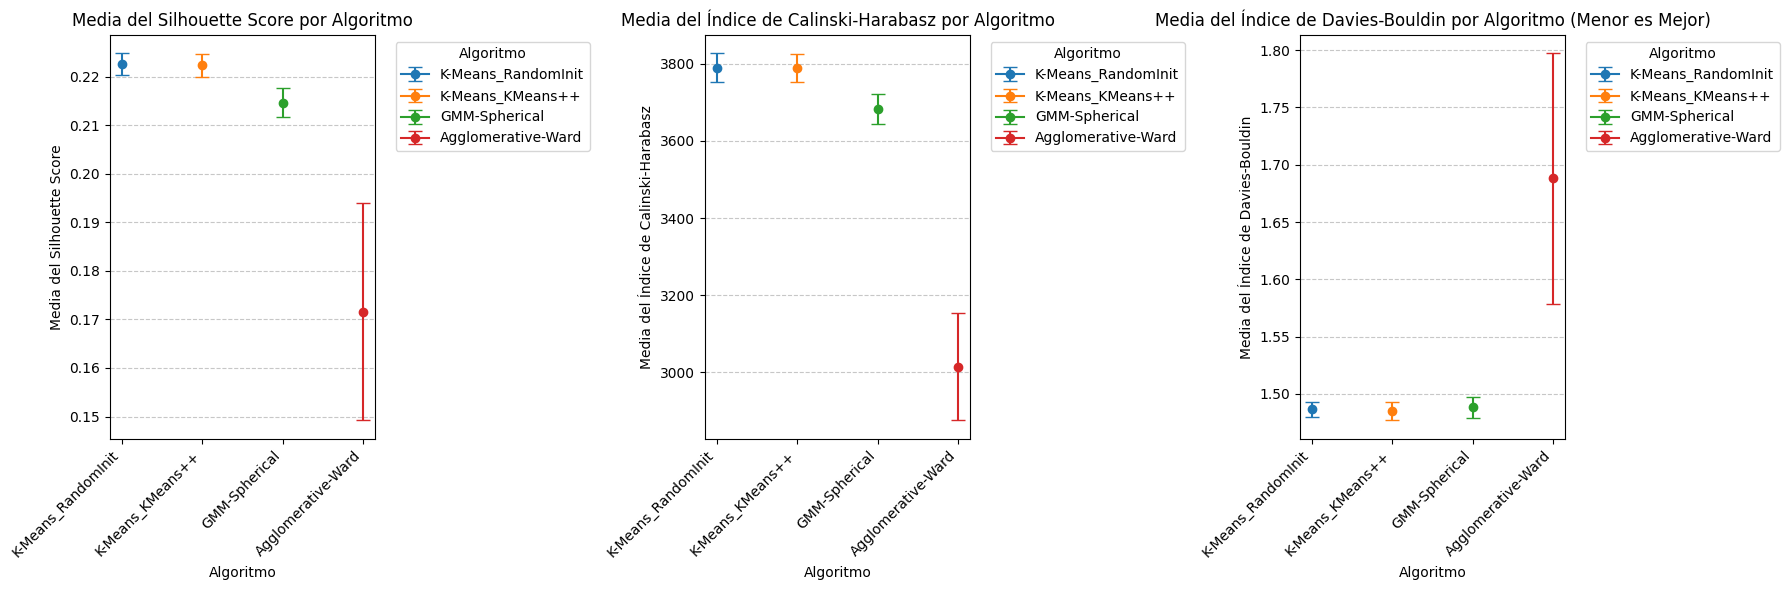

In [52]:
# Generar gráficas de las métricas por modelo de clasificación
print("Resultados consolidados de la evaluación de algoritmos (K=5, 10 Iteraciones de Bootstrap)\n" + "=" * 100)
data_t22 = {
    "Algoritmo": ["K-Means_RandomInit", "K-Means_KMeans++", "GMM-Spherical", "Agglomerative-Ward"],
    "Media_Silhouette": [0.2226, 0.2223, 0.2146, 0.1716],
    "Std_Silhouette": [0.0022, 0.0023, 0.0030, 0.0224],
    "Media_Calinski_Harabasz": [3790.0594, 3789.3693, 3682.9568, 3013.8953],
    "Std_Calinski_Harabasz": [37.1835, 36.9055, 38.4848, 138.7049],
    "Media_Davies_Bouldin": [1.4867, 1.4850, 1.4882, 1.6881],
    "Std_Davies_Bouldin": [0.0066, 0.0082, 0.0092, 0.1093]
}
df_t22 = pd.DataFrame(data_t22)

# Crear una columna "x_pos" para el eje X que represente los algoritmos
plt.figure(figsize=(18, 6))
x_pos = np.arange(len(df_t22["Algoritmo"]))

# Media del Silhouette Score por algoritmo (Líneas con Std Dev)
plt.subplot(1, 3, 1)
for i, row in df_t22.iterrows():
    plt.errorbar(x_pos[i], row["Media_Silhouette"], yerr=row["Std_Silhouette"], fmt="o-", label=row["Algoritmo"], capsize=5)

plt.title("Media del Silhouette Score por Algoritmo")
plt.xlabel("Algoritmo")
plt.ylabel("Media del Silhouette Score")
plt.xticks(x_pos, df_t22["Algoritmo"], rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Algoritmo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Media del Índice de Calinski-Harabasz por algoritmo (Líneas con Std Dev)
plt.subplot(1, 3, 2)
for i, row in df_t22.iterrows():
    plt.errorbar(x_pos[i], row["Media_Calinski_Harabasz"], yerr=row["Std_Calinski_Harabasz"], fmt="o-", label=row["Algoritmo"], capsize=5)

plt.title("Media del Índice de Calinski-Harabasz por Algoritmo")
plt.xlabel("Algoritmo")
plt.ylabel("Media del Índice de Calinski-Harabasz")
plt.xticks(x_pos, df_t22["Algoritmo"], rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Algoritmo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Media del Índice de Davies-Bouldin por algoritmo (Líneas con Std Dev)
plt.subplot(1, 3, 3)
for i, row in df_t22.iterrows():
    plt.errorbar(x_pos[i], row["Media_Davies_Bouldin"], yerr=row["Std_Davies_Bouldin"], fmt="o-", label=row["Algoritmo"], capsize=5)

plt.title("Media del Índice de Davies-Bouldin por Algoritmo (Menor es Mejor)")
plt.xlabel("Algoritmo")
plt.ylabel("Media del Índice de Davies-Bouldin")
plt.xticks(x_pos, df_t22["Algoritmo"], rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Algoritmo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

## **2.5. Validación del modelo seleccionado**
---
---

Generación de 100 sets de etiquetas para K=5

Procesando K-Means RandomInit...
  K-Means RandomInit: 10/100 iteraciones completadas.
  K-Means RandomInit: 20/100 iteraciones completadas.
  K-Means RandomInit: 30/100 iteraciones completadas.
  K-Means RandomInit: 40/100 iteraciones completadas.
  K-Means RandomInit: 50/100 iteraciones completadas.
  K-Means RandomInit: 60/100 iteraciones completadas.
  K-Means RandomInit: 70/100 iteraciones completadas.
  K-Means RandomInit: 80/100 iteraciones completadas.
  K-Means RandomInit: 90/100 iteraciones completadas.
  K-Means RandomInit: 100/100 iteraciones completadas.

Procesando K-Means++...
  K-Means++: 10/100 iteraciones completadas.
  K-Means++: 20/100 iteraciones completadas.
  K-Means++: 30/100 iteraciones completadas.
  K-Means++: 40/100 iteraciones completadas.
  K-Means++: 50/100 iteraciones completadas.
  K-Means++: 60/100 iteraciones completadas.
  K-Means++: 70/100 iteraciones completadas.
  K-Means++: 80/100 iteraciones completa

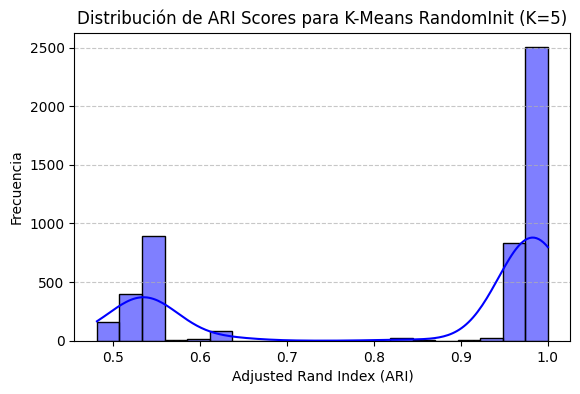


ARI para K-Means++ (K=5, Sin Escalado, 4950 comparaciones)
Media del Adjusted Rand Index (ARI): 0.9255
Desviación estándar del ARI: 0.1470
Mínimo ARI: 0.5204
Máximo ARI: 1.0000


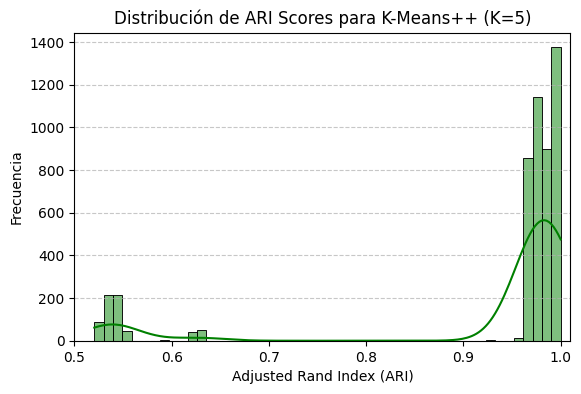

In [53]:
# Configurar variables de clustering (No_escalado) para el análisis ARI
X = df_cluster[clustering_vars].values
k_value = 5
n_bootstrap_iterations = 100
all_kmeans_random_labels = []
all_kmeans_plusplus_labels = []

print(f"Generación de {n_bootstrap_iterations} sets de etiquetas para K={k_value}\n" + "=" * 100)

# --- K-Means RandomInit ---
print("\nProcesando K-Means RandomInit...")
for i in range(n_bootstrap_iterations):
    # n_init=1: considera una única inicialización en cada iteración de bootstrap
    # random_state=i: asegura reproducibilidad para cada ejecución de bootstrap simulada
    kmeans_random = KMeans(n_clusters=k_value, init="random", n_init=1, random_state=i, max_iter=300, algorithm="lloyd")
    kmeans_random.fit(X)
    all_kmeans_random_labels.append(kmeans_random.labels_)
    if (i + 1) % 10 == 0:
        print(f"  K-Means RandomInit: {i + 1}/{n_bootstrap_iterations} iteraciones completadas.")

# --- K-Means++ ---
print("\nProcesando K-Means++...")
for i in range(n_bootstrap_iterations):
    kmeans_plusplus = KMeans(n_clusters=k_value, init="k-means++", n_init=1, random_state=i, max_iter=300, algorithm="lloyd")
    kmeans_plusplus.fit(X)
    all_kmeans_plusplus_labels.append(kmeans_plusplus.labels_)
    if (i + 1) % 10 == 0:
        print(f"  K-Means++: {i + 1}/{n_bootstrap_iterations} iteraciones completadas.")


# --- Calcular ARI para K-Means RandomInit ---
ari_scores_random = []
num_comparisons_random = 0
for i, j in itertools.combinations(range(n_bootstrap_iterations), 2):
    ari = adjusted_rand_score(all_kmeans_random_labels[i], all_kmeans_random_labels[j])
    ari_scores_random.append(ari)
    num_comparisons_random += 1

print(f"\nARI para K-Means RandomInit (K={k_value}, Sin Escalado, {num_comparisons_random} comparaciones)\n" + "=" * 100)
print(f"Media del Adjusted Rand Index (ARI): {np.mean(ari_scores_random):.4f}")
print(f"Desviación estándar del ARI: {np.std(ari_scores_random):.4f}")
print(f"Mínimo ARI: {np.min(ari_scores_random):.4f}")
print(f"Máximo ARI: {np.max(ari_scores_random):.4f}")

# Gráfica de histograma  para K-Means RandomInit
if len(ari_scores_random) > 10:
    plt.figure(figsize=(6.4, 4))
    sns.histplot(ari_scores_random, kde=True, bins=20, color="blue")
    plt.title(f"Distribución de ARI Scores para K-Means RandomInit (K={k_value})")
    plt.xlabel("Adjusted Rand Index (ARI)")
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


# --- Calcular ARI para K-Means++ ---
ari_scores_plusplus = []
num_comparisons_plusplus = 0
for i, j in itertools.combinations(range(n_bootstrap_iterations), 2):
    ari = adjusted_rand_score(all_kmeans_plusplus_labels[i], all_kmeans_plusplus_labels[j])
    ari_scores_plusplus.append(ari)
    num_comparisons_plusplus += 1

print(f"\nARI para K-Means++ (K={k_value}, Sin Escalado, {num_comparisons_plusplus} comparaciones)\n" + "=" * 100)
print(f"Media del Adjusted Rand Index (ARI): {np.mean(ari_scores_plusplus):.4f}")
print(f"Desviación estándar del ARI: {np.std(ari_scores_plusplus):.4f}")
print(f"Mínimo ARI: {np.min(ari_scores_plusplus):.4f}")
print(f"Máximo ARI: {np.max(ari_scores_plusplus):.4f}")

# Gráfica de histograma para K-Means++
if len(ari_scores_plusplus) > 10:
    plt.figure(figsize=(6.4, 4))
    sns.histplot(ari_scores_plusplus, kde=True, bins=50, color="green")
    plt.title(f"Distribución de ARI Scores para K-Means++ (K={k_value})")
    plt.xlabel("Adjusted Rand Index (ARI)")
    plt.ylabel("Frecuencia")
    plt.xlim(0.5, 1.01)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

Ejecutar el clustering final con K-Means++ y K=5 (Sin Escalado)
\Métricas del clustering final
--------------------------------------------------------------------------------
Silhouette Score:        0.2223
Calinski-Harabasz Score: 3787.3917
Davies-Bouldin Score:    1.4852

Características Generales de Cada Clúster
\Tamaño de cada Clúster
--------------------------------------------------------------------------------


Número de MYPEs  Porcentaje (%)
Clúster                                 
0                   2496           17.92
1                    987            7.09
2                   2918           20.95
3                   4255           30.55
4                   3272           23.49


Perfiles Promedio de Clústeres (Valores Originales)
--------------------------------------------------------------------------------


GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
Clúster                                                                 
0                      37.52                 59.15              18.45   
1                      43.53                 64.03              47.73   
2                      51.18                 64.16              68.15   
3                      17.19                  7.91               8.40   
4                      40.99                 16.40              51.61   

         MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
Clúster                                               
0                    32.19           28.73     46.28  
1                    53.54           79.87     45.74  
2                    37.01           26.16     55.01  
3                    15.27           23.02     33.71  
4                    32.94           26.69     51.35

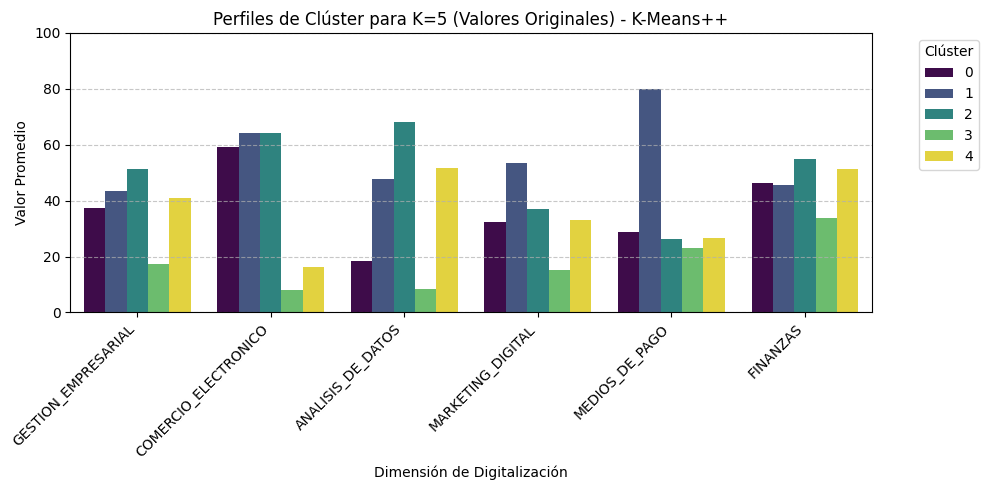


Crear df_cluster_kmeans con la columna 'CLUSTER'
--------------------------------------------------------------------------------


ID   CIIU                    DESCRIPCION_CIIU  \
0   1  18100          FAB. DE PRENDAS DE VESTIR.   
1   2  55205     RESTAURANTES, BARES Y CANTINAS.   
2   3  55205     RESTAURANTES, BARES Y CANTINAS.   
3   4  18100          FAB. DE PRENDAS DE VESTIR.   
4   5  92192  OTRAS ACTIVID.ENTRETENIMIENTO NCP.   

                            RAZON_SOCIAL_ANONIMIZADA DEPARTAMENTO PROVINCIA  \
0  5325E51F720E0A8F8C71188DAE1C4AC311713DDBBF8BDE...  LA LIBERTAD  TRUJILLO   
1  20E1926945D02E102075B60FB7F40A4ED071618C9B0BEB...  LA LIBERTAD  TRUJILLO   
2  7B2624A048B4437F2CE51B1F16E2BAF8EC454566477EAF...  LA LIBERTAD  TRUJILLO   
3  2315EC15C77EC0110FC24C7F7F9AA8ED150C006E2394C4...  LA LIBERTAD  TRUJILLO   
4  2E0D8F3A258AA02E0D72923ECCD89142EFBB76B8550A36...  LA LIBERTAD  TRUJILLO   

               DISTRITO  UBIGEO NIVEL_DIGITALIZACION  DIG_GENERAL  \
0  VICTOR LARCO HERRERA  130111              Inicial         19.0   
1  VICTOR LARCO HERRERA  130111               Básico         37.0   
2  VICTOR LARCO HERRERA  130111               Básico         29.0   
3  VICTOR LARCO HERRERA  130111               Básico         30.0   
4  VICTOR LARCO HERRERA  130111               Básico         39.0   

   GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
0                29.17                  12.5                0.0   
1                50.00                  37.5               50.0   
2                33.34                  25.0                0.0   
3                58.34                   0.0               50.0   
4                25.00                  62.5                0.0   

   MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  CLUSTER  
0               22.0            25.0     25.00        3  
1               27.0            25.0     31.25        4  
2               32.0            50.0     37.50        3  
3               22.0            25.0     56.25        4  
4               45.0            25.0     31.25        0


Número total de MYPEs en df_cluster_kmeans: 13928
Columnas en df_cluster_kmeans: ['ID', 'CIIU', 'DESCRIPCION_CIIU', 'RAZON_SOCIAL_ANONIMIZADA', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'NIVEL_DIGITALIZACION', 'DIG_GENERAL', 'GESTION_EMPRESARIAL', 'COMERCIO_ELECTRONICO', 'ANALISIS_DE_DATOS', 'MARKETING_DIGITAL', 'MEDIOS_DE_PAGO', 'FINANZAS', 'CLUSTER']

Cruce de CLUSTER y NIVEL_DIGITALIZACION
\Tabla de Contingencia (Frecuencias Absolutas)
--------------------------------------------------------------------------------


NIVEL_DIGITALIZACION  Avanzado  Básico  Inicial  Intermedio
CLUSTER                                                    
0                            0    2189       39         268
1                           81     429        4         473
2                           58    1566        0        1294
3                            0     247     4008           0
4                            0    2817      420          35


Tabla de Contingencia (Frecuencias Relativas % por Fila - Distribución de Niveles DENTRO de cada Clúster)
--------------------------------------------------------------------------------


NIVEL_DIGITALIZACION  Avanzado  Básico  Inicial  Intermedio
CLUSTER                                                    
0                         0.00   87.70     1.56       10.74
1                         8.21   43.47     0.41       47.92
2                         1.99   53.67     0.00       44.35
3                         0.00    5.80    94.20        0.00
4                         0.00   86.09    12.84        1.07

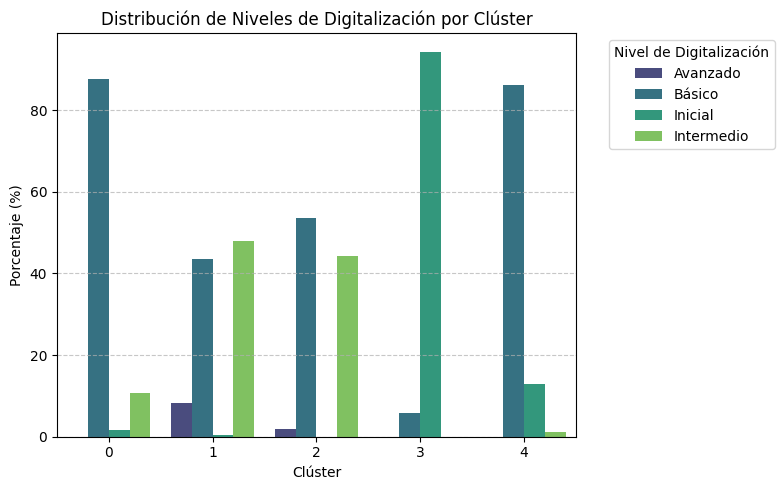

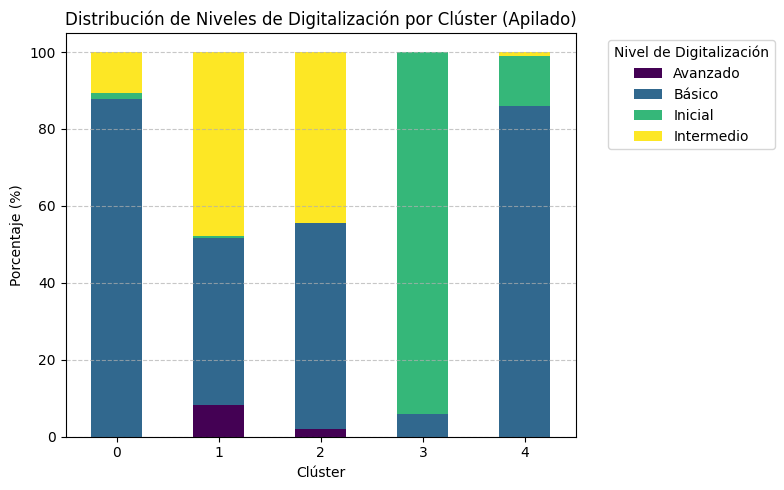

In [54]:
# Ejecutar el clustering final con K-Means++ y K=5 (Sin Escalado)
print("Ejecutar el clustering final con K-Means++ y K=5 (Sin Escalado)\n" + "=" * 100)
final_kmeans_model = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42, max_iter=300, algorithm="lloyd")
final_kmeans_model.fit(X)
cluster_labels = final_kmeans_model.labels_
cluster_centers = final_kmeans_model.cluster_centers_

# Evaluar las métricas del clustering final
print("\Métricas del clustering final\n" + "-" * 80)
final_silhouette = silhouette_score(X, cluster_labels)
final_calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
final_davies_bouldin = davies_bouldin_score(X, cluster_labels)

print(f"Silhouette Score:        {final_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {final_calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score:    {final_davies_bouldin:.4f}")

# Crear un dataframe con los centroides, calculando el tamaño de cada clúster
print("\nCaracterísticas Generales de Cada Clúster\n" + "=" * 100)
df_cluster_profiles = pd.DataFrame(cluster_centers, columns=clustering_vars)
df_cluster_profiles.index.name = "Clúster"

cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
cluster_sizes_df = pd.DataFrame({
    "Número de MYPEs": cluster_sizes,
    "Porcentaje (%)": (cluster_sizes / len(X) * 100).round(2)})
cluster_sizes_df.index.name = "Clúster"

print("\Tamaño de cada Clúster\n" + "-" * 80)
display(cluster_sizes_df)

print("\nPerfiles Promedio de Clústeres (Valores Originales)\n" + "-" * 80)
display(df_cluster_profiles.round(2))
print()

# Visualizar gráfico de barras del valor promedio de cada dimensión por clúster
df_cluster_profiles_melted = df_cluster_profiles.reset_index().melt(id_vars="Clúster",
                                                                    var_name="Dimensión",
                                                                    value_name="Valor Promedio")
plt.figure(figsize=(10, 5))
sns.barplot(x="Dimensión", y="Valor Promedio", hue="Clúster", data=df_cluster_profiles_melted, palette="viridis")
plt.title("Perfiles de Clúster para K=5 (Valores Originales) - K-Means++")
plt.xlabel("Dimensión de Digitalización")
plt.ylabel("Valor Promedio")
plt.ylim(0, 100) # Dimensiones en escala 0-100
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Clúster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Preparar un dataset "df_cluster_kmeans" para el OE3, con la columna "CLUSTER" (etiquetas asignadas)
df_cluster_kmeans = df_cluster.copy()
df_cluster_kmeans["CLUSTER"] = cluster_labels

print("\nCrear df_cluster_kmeans con la columna 'CLUSTER'\n" + "-" * 80)
display(df_cluster_kmeans.head())
print(f"\nNúmero total de MYPEs en df_cluster_kmeans: {len(df_cluster_kmeans)}")
print(f"Columnas en df_cluster_kmeans: {df_cluster_kmeans.columns.tolist()}")

# --- Cruce CLUSTER vs NIVEL_DIGITALIZACION para el OE3 ---
print("\nCruce de CLUSTER y NIVEL_DIGITALIZACION\n" + "=" * 100)

# Calcular las tablas de contingencia de frecuencias absolutas y relativas (por fila - porcentaje dentro de cada clúster)
cross_tab_abs = pd.crosstab(df_cluster_kmeans["CLUSTER"], df_cluster_kmeans["NIVEL_DIGITALIZACION"])
cross_tab_pct_row = pd.crosstab(df_cluster_kmeans["CLUSTER"], df_cluster_kmeans["NIVEL_DIGITALIZACION"], normalize="index") * 100

print("\Tabla de Contingencia (Frecuencias Absolutas)\n" + "-" * 80)
display(cross_tab_abs)

print("\nTabla de Contingencia (Frecuencias Relativas % por Fila - Distribución de Niveles DENTRO de cada Clúster)\n" + "-" * 80)
display(cross_tab_pct_row.round(2))
print()

# Visualización del Cruce por gráfico de barras
df_plot_cross = cross_tab_pct_row.reset_index().melt(id_vars="CLUSTER", var_name="Nivel de Digitalización", value_name="Porcentaje")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot_cross, x="CLUSTER", y="Porcentaje", hue="Nivel de Digitalización", palette="viridis")
plt.title("Distribución de Niveles de Digitalización por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.legend(title="Nivel de Digitalización", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
print()

# Visualización del Cruce por gráfico de barras apiladas
cross_tab_pct_row.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Distribución de Niveles de Digitalización por Clúster (Apilado)")
plt.xlabel("Clúster")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.legend(title="Nivel de Digitalización", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
df_cluster_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13928 entries, 0 to 13927
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13928 non-null  int64  
 1   CIIU                      13928 non-null  object 
 2   DESCRIPCION_CIIU          13928 non-null  object 
 3   RAZON_SOCIAL_ANONIMIZADA  13928 non-null  object 
 4   DEPARTAMENTO              13928 non-null  object 
 5   PROVINCIA                 13928 non-null  object 
 6   DISTRITO                  13928 non-null  object 
 7   UBIGEO                    13928 non-null  int64  
 8   NIVEL_DIGITALIZACION      13928 non-null  object 
 9   DIG_GENERAL               13928 non-null  float64
 10  GESTION_EMPRESARIAL       13928 non-null  float64
 11  COMERCIO_ELECTRONICO      13928 non-null  float64
 12  ANALISIS_DE_DATOS         13928 non-null  float64
 13  MARKETING_DIGITAL         13928 non-null  float64
 14  MEDIOS

Visualizar las matrices de contingencia como heatmaps

Matriz de Contingencia: CLUSTER vs. NIVEL_DIGITALIZACION (Frecuencias Absolutas)
--------------------------------------------------------------------------------


NIVEL_DIGITALIZACION  Avanzado  Básico  Inicial  Intermedio
CLUSTER                                                    
0                            0    2189       39         268
1                           81     429        4         473
2                           58    1566        0        1294
3                            0     247     4008           0
4                            0    2817      420          35


Matriz de Contingencia: CLUSTER vs. NIVEL_DIGITALIZACION (Frecuencias Relativas por FILA - %)
--------------------------------------------------------------------------------


NIVEL_DIGITALIZACION  Avanzado  Básico  Inicial  Intermedio
CLUSTER                                                    
0                         0.00   87.70     1.56       10.74
1                         8.21   43.47     0.41       47.92
2                         1.99   53.67     0.00       44.35
3                         0.00    5.80    94.20        0.00
4                         0.00   86.09    12.84        1.07


Matriz de Contingencia: CLUSTER vs. NIVEL_DIGITALIZACION (Frecuencias Relativas por COLUMNA - %)
--------------------------------------------------------------------------------


NIVEL_DIGITALIZACION  Avanzado  Básico  Inicial  Intermedio
CLUSTER                                                    
0                         0.00   30.20     0.87       12.95
1                        58.27    5.92     0.09       22.85
2                        41.73   21.61     0.00       62.51
3                         0.00    3.41    89.64        0.00
4                         0.00   38.87     9.39        1.69

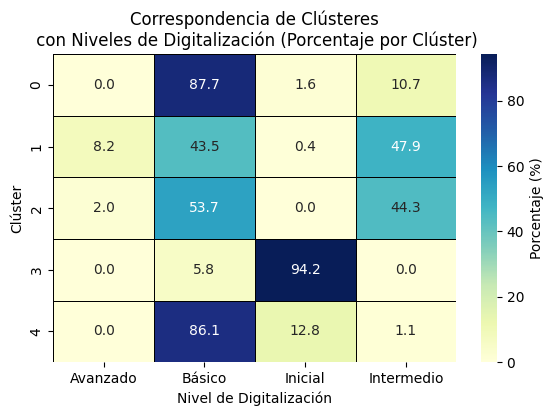

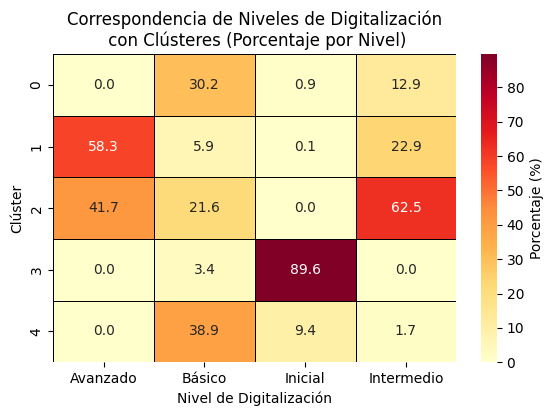

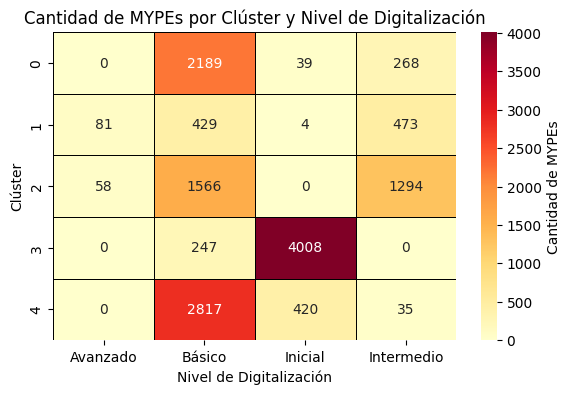

In [56]:
# Crear las matrices de contingencia de CLUSTER vs. NIVEL_DIGITALIZACION como heatmaps
print("Visualizar las matrices de contingencia como heatmaps\n" + "=" * 100)

print("\nMatriz de Contingencia: CLUSTER vs. NIVEL_DIGITALIZACION (Frecuencias Absolutas)\n" + "-" * 80)
# Matriz de contingencia de frecuencias absolutas
contingency_matrix_abs = pd.crosstab(df_cluster_kmeans["CLUSTER"], df_cluster_kmeans["NIVEL_DIGITALIZACION"])
display(contingency_matrix_abs)

print("\nMatriz de Contingencia: CLUSTER vs. NIVEL_DIGITALIZACION (Frecuencias Relativas por FILA - %)\n" + "-" * 80)
# Matriz de la distribución de los Niveles de Digitalización DENTRO de cada Clúster
contingency_matrix_pct_row = pd.crosstab(df_cluster_kmeans["CLUSTER"], df_cluster_kmeans["NIVEL_DIGITALIZACION"], normalize="index") * 100
display(contingency_matrix_pct_row.round(2))

print("\nMatriz de Contingencia: CLUSTER vs. NIVEL_DIGITALIZACION (Frecuencias Relativas por COLUMNA - %)\n" + "-" * 80)
# Matriz de la distribución de los Clústeres DENTRO de cada Nivel de Digitalización
contingency_matrix_pct_col = pd.crosstab(df_cluster_kmeans["CLUSTER"], df_cluster_kmeans["NIVEL_DIGITALIZACION"], normalize="columns") * 100
display(contingency_matrix_pct_col.round(2))
print()

# --- Heatmap 1: Porcentaje por Clúster (distribución de Niveles DENTRO de cada Clúster) ---
plt.figure(figsize=(6.5, 4))
sns.heatmap(contingency_matrix_pct_row, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, linecolor="black", cbar_kws={"label": "Porcentaje (%)"})
plt.title("Correspondencia de Clústeres\n con Niveles de Digitalización (Porcentaje por Clúster)")
plt.xlabel("Nivel de Digitalización")
plt.ylabel("Clúster")
plt.show()
print()

# --- Heatmap 2: Porcentaje por Nivel (distribución de Clústeres DENTRO de cada Nivel) ---
plt.figure(figsize=(6.5, 4))
sns.heatmap(contingency_matrix_pct_col, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5, linecolor="black", cbar_kws={"label": "Porcentaje (%)"})
plt.title("Correspondencia de Niveles de Digitalización\n con Clústeres (Porcentaje por Nivel)")
plt.xlabel("Nivel de Digitalización")
plt.ylabel("Clúster")
plt.show()
print()

# --- Heatmap 3: Frecuencias Absolutas (cantidad de MYPEs en cada intersección) ---
plt.figure(figsize=(6.5, 4))
sns.heatmap(contingency_matrix_abs, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5, linecolor="black", cbar_kws={"label": "Cantidad de MYPEs"})
plt.title("Cantidad de MYPEs por Clúster y Nivel de Digitalización")
plt.xlabel("Nivel de Digitalización")
plt.ylabel("Clúster")
plt.show()

In [57]:
# Columnas a visualizar
columnas = [
    'NIVEL_DIGITALIZACION',
    'DIG_GENERAL',
    'GESTION_EMPRESARIAL',
    'COMERCIO_ELECTRONICO',
    'ANALISIS_DE_DATOS',
    'MARKETING_DIGITAL',
    'MEDIOS_DE_PAGO',
    'FINANZAS'
]

# Filtrar y mostrar primeras filas
df_cluster_kmeans[
    (df_cluster_kmeans["CLUSTER"] == 1) & (df_cluster_kmeans["NIVEL_DIGITALIZACION"] == "Inicial")
][columnas].head()

NIVEL_DIGITALIZACION  DIG_GENERAL  GESTION_EMPRESARIAL  \
6421               Inicial         20.0                 0.00   
11925              Inicial         22.0                12.50   
12107              Inicial         22.0                 8.33   
12674              Inicial         20.0                 4.17   

       COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  MARKETING_DIGITAL  \
6421                    0.0               50.0               30.0   
11925                  12.5               25.0               20.0   
12107                  12.5               25.0               15.0   
12674                   0.0               50.0               22.0   

       MEDIOS_DE_PAGO  FINANZAS  
6421            100.0     12.50  
11925           100.0     31.25  
12107           100.0     50.00  
12674           100.0     25.00

# **3. Anáisis de resultados del Objetivo Específico 3**

## **3.1. Validación de dataset y configuración de variables derivadas**
---
---

In [58]:
# Cargar el dataset que incluye las variables sectoriales y geográficas derivadas
df_cluster_final = pd.read_csv("df_cluster_final.csv")

# Mostrar la información general del dataframe (tamaño, tipos de variables, primeras filas)
print("\Información actualizada del dataframe con variables derivadas:\n" + "=" * 100)
df_cluster_final.info()

# Ordenar ambos dataframes por la RAZON_SOCIAL_ANONIMIZADA y reiniciar los índices
df_cluster = df_cluster_kmeans.sort_values(by="RAZON_SOCIAL_ANONIMIZADA").reset_index(drop=True)
df_cluster_final = df_cluster_final.sort_values(by="RAZON_SOCIAL_ANONIMIZADA").reset_index(drop=True)

print("\nPrimeras filas del dataframe clusterizado:\n" + "=" * 100)
display(df_cluster.head())
print("\nPrimeras filas del dataframe con variables sectoriales y geográficas derivadas:\n" + "=" * 100)
display(df_cluster_final.head())

\Información actualizada del dataframe con variables derivadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13928 entries, 0 to 13927
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANIO                      13928 non-null  int64  
 1   CIIU                      13928 non-null  int64  
 2   DESCRIPCION_CIIU          13928 non-null  object 
 3   RAZON_SOCIAL_ANONIMIZADA  13928 non-null  object 
 4   TIPO                      13928 non-null  object 
 5   DEPARTAMENTO              13928 non-null  object 
 6   PROVINCIA                 13928 non-null  object 
 7   DISTRITO                  13928 non-null  object 
 8   UBIGEO                    13928 non-null  int64  
 9   NIVEL_DIGITALIZACION      13928 non-null  object 
 10  DIG_GENERAL               13928 non-null  float64
 11  GESTION_EMPRESARIAL       13928 non-null  float64
 12  COMERCIO_ELECTRONICO      13928 non-null  float64
 1

ID   CIIU                         DESCRIPCION_CIIU  \
0  5487  74306                               PUBLICIDAD   
1    69  64207                       TELECOMUNICACIONES   
2   744  25200          FAB. DE PRODUCTOS DE PLASTICOS.   
3  8977  52511  VTA. MIN. DE CASAS DE VENTA POR CORREO.   
4   983  15432         ELAB. CACAO, CHOCOLATE Y CONFIT.   

                            RAZON_SOCIAL_ANONIMIZADA DEPARTAMENTO PROVINCIA  \
0  0005B72A9B269EF48B975373F092A7B037E15932F72E96...         LIMA      LIMA   
1  000AC3C0E9A0D3FB59EF6303B3767852CB51A2CBDB9D2D...   LAMBAYEQUE  CHICLAYO   
2  0012DFE26E8C185280AFF752541318F61E9B969FCCEC88...         LIMA      LIMA   
3  0012EF038B91A01D82E62908C70DCDEE6AB07563967E38...         LIMA      LIMA   
4  00202521A50550D3BA51FC384FF2F79AAB88BB5A454F9B...         LIMA      LIMA   

            DISTRITO  UBIGEO NIVEL_DIGITALIZACION  DIG_GENERAL  \
0  SANTIAGO DE SURCO  150140               Básico         37.0   
1           CHICLAYO  140101               Básico         46.0   
2                ATE  150103               Básico         46.0   
3               LIMA  150101               Básico         48.0   
4              BREÑA  150105              Inicial          7.0   

   GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
0                62.50                  25.0               25.0   
1                87.50                  50.0                0.0   
2                37.50                  50.0               50.0   
3                42.00                  62.0               50.0   
4                 4.17                   0.0                0.0   

   MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  CLUSTER  
0               27.0            50.0     56.25        4  
1               32.0            25.0     56.25        0  
2               42.0            25.0     68.75        2  
3               42.0            25.0     56.00        2  
4               15.0            25.0      6.25        3


Primeras filas del dataframe con variables sectoriales y geográficas derivadas:


ANIO   CIIU                         DESCRIPCION_CIIU  \
0  2021  74306                               PUBLICIDAD   
1  2022  64207                       TELECOMUNICACIONES   
2  2021  25200          FAB. DE PRODUCTOS DE PLASTICOS.   
3  2024  52511  VTA. MIN. DE CASAS DE VENTA POR CORREO.   
4  2021  15432         ELAB. CACAO, CHOCOLATE Y CONFIT.   

                            RAZON_SOCIAL_ANONIMIZADA      TIPO DEPARTAMENTO  \
0  0005B72A9B269EF48B975373F092A7B037E15932F72E96...  JURIDICA         LIMA   
1  000AC3C0E9A0D3FB59EF6303B3767852CB51A2CBDB9D2D...   NATURAL   LAMBAYEQUE   
2  0012DFE26E8C185280AFF752541318F61E9B969FCCEC88...  JURIDICA         LIMA   
3  0012EF038B91A01D82E62908C70DCDEE6AB07563967E38...  JURIDICA         LIMA   
4  00202521A50550D3BA51FC384FF2F79AAB88BB5A454F9B...   NATURAL         LIMA   

  PROVINCIA           DISTRITO  UBIGEO NIVEL_DIGITALIZACION  ...  \
0      LIMA  SANTIAGO DE SURCO  150140               Básico  ...   
1  CHICLAYO           CHICLAYO  140101               Básico  ...   
2      LIMA                ATE  150103               Básico  ...   
3      LIMA               LIMA  150101               Básico  ...   
4      LIMA              BREÑA  150105              Inicial  ...   

   FECHA_INICIO   FECHA_FIN  TIEMPO_DEMORA_MINUTOS  FECHA_REGISTRO  \
0    2021-11-12  2022-12-18                 577913      2021-11-12   
1    2022-12-06  2022-12-06                      1      2022-04-11   
2    2021-11-10  2022-11-25                 547658      2021-07-14   
3    2024-12-16  2024-12-16                      3      2024-12-16   
4    2021-10-18  2022-07-30                 409444      2021-02-26   

   AUT_PUBLICIDAD  FECHA_PUB_PNDA       SECTOR                CATEGORIA  \
0              SI      2025-03-06    SERVICIOS  SERVICIOS PROFESIONALES   
1              SI      2025-03-06    SERVICIOS       TELECOMUNICACIONES   
2              SI      2025-03-06  MANUFACTURA              MANUFACTURA   
3              SI      2025-03-06     COMERCIO  CONSUMO MASIVO Y RETAIL   
4              SI      2025-03-06  MANUFACTURA              MANUFACTURA   

            UBICACION    ID  
0  LIMA METROPOLITANA  3675  
1          LAMBAYEQUE  5352  
2  LIMA METROPOLITANA  6751  
3  LIMA METROPOLITANA   533  
4  LIMA METROPOLITANA  8612  

[5 rows x 27 columns]

In [59]:
# Comparar la variable RAZON_SOCIAL_ANONIMIZADA
print("Comparación de la variable RAZON_SOCIAL_ANONIMIZADA:\n" + "=" * 100)
mismas_razones = df_cluster["RAZON_SOCIAL_ANONIMIZADA"].equals(df_cluster_final["RAZON_SOCIAL_ANONIMIZADA"])

if mismas_razones:
    print("✅ La columna 'RAZON_SOCIAL_ANONIMIZADA' es exactamente igual en ambos dataframes.")
else:
    print("❌ Hay diferencias en la columna 'RAZON_SOCIAL_ANONIMIZADA'.")

    # Mostrar diferencias respecto de la variable
    difs = df_cluster["RAZON_SOCIAL_ANONIMIZADA"] != df_cluster_final["RAZON_SOCIAL_ANONIMIZADA"]
    print("\nDiferencias encontradas:")
    diferencias = pd.DataFrame({
        'df_cluster': df_cluster.loc[difs, "RAZON_SOCIAL_ANONIMIZADA"].reset_index(drop=True),
        'df_cluster_final': df_cluster_final.loc[difs, "RAZON_SOCIAL_ANONIMIZADA"].reset_index(drop=True)})
    display(diferencias)

# Verificar las coincidencias exactas a través de la cantidad de razones sociales
coincidencias = df_cluster['RAZON_SOCIAL_ANONIMIZADA'].isin(df_cluster_final['RAZON_SOCIAL_ANONIMIZADA']).sum()
total = len(df_cluster)
print(f"\n✅ Coincidencias exactas por 'RAZON_SOCIAL_ANONIMIZADA': {coincidencias} de {total}")

# Unir ambos dataframes por 'RAZON_SOCIAL_ANONIMIZADA' e incorporar las variables derivadas
df_cluster_actualizado = df_cluster.merge(
    df_cluster_final[['RAZON_SOCIAL_ANONIMIZADA', 'SECTOR', 'CATEGORIA', 'UBICACION']],
    on='RAZON_SOCIAL_ANONIMIZADA',
    how='left',
    validate='one_to_one')

# Verificar la cantidad de valores asignados correctamente y renombrar el dataset
modificados = {
    col: df_cluster_actualizado[col].notna().sum() for col in ['SECTOR', 'CATEGORIA', 'UBICACION']}
print("\nRegistros no nulos en cada variable nueva:\n" + "-" * 80)
for col, count in modificados.items():
    print(f"- {col}: {count} de {total}")

# Utilizar el nombre original del dataset clusterizado
df_cluster = df_cluster_actualizado

Comparación de la variable RAZON_SOCIAL_ANONIMIZADA:
✅ La columna 'RAZON_SOCIAL_ANONIMIZADA' es exactamente igual en ambos dataframes.

✅ Coincidencias exactas por 'RAZON_SOCIAL_ANONIMIZADA': 13928 de 13928

Registros no nulos en cada variable nueva:
--------------------------------------------------------------------------------
- SECTOR: 13928 de 13928
- CATEGORIA: 13928 de 13928
- UBICACION: 13928 de 13928


In [60]:
# Mostrar la información general del dataframe (tamaño, tipos de variables, primeras filas)
print("Tamaño del dataframe actualizado:\n" + "=" * 100)
print(df_cluster.shape)
print("\nInformación del dataframe actualizado:\n" + "=" * 100)
print(df_cluster.info())
print("\nPrimeras filas del dataframe actualizado:\n" + "=" * 100)
display(df_cluster.head())

# Mostrar la distribución de registros por categoría de variables relevantes
display(df_cluster['CLUSTER'].value_counts().sort_index())

display(df_cluster['NIVEL_DIGITALIZACION'].value_counts())

display(df_cluster['UBICACION'].value_counts())

display(df_cluster['CATEGORIA'].value_counts())

display(df_cluster['SECTOR'].value_counts())

Tamaño del dataframe actualizado:
(13928, 20)

Información del dataframe actualizado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13928 entries, 0 to 13927
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13928 non-null  int64  
 1   CIIU                      13928 non-null  object 
 2   DESCRIPCION_CIIU          13928 non-null  object 
 3   RAZON_SOCIAL_ANONIMIZADA  13928 non-null  object 
 4   DEPARTAMENTO              13928 non-null  object 
 5   PROVINCIA                 13928 non-null  object 
 6   DISTRITO                  13928 non-null  object 
 7   UBIGEO                    13928 non-null  int64  
 8   NIVEL_DIGITALIZACION      13928 non-null  object 
 9   DIG_GENERAL               13928 non-null  float64
 10  GESTION_EMPRESARIAL       13928 non-null  float64
 11  COMERCIO_ELECTRONICO      13928 non-null  float64
 12  ANALISIS_DE_DATOS         1392

ID   CIIU                         DESCRIPCION_CIIU  \
0  5487  74306                               PUBLICIDAD   
1    69  64207                       TELECOMUNICACIONES   
2   744  25200          FAB. DE PRODUCTOS DE PLASTICOS.   
3  8977  52511  VTA. MIN. DE CASAS DE VENTA POR CORREO.   
4   983  15432         ELAB. CACAO, CHOCOLATE Y CONFIT.   

                            RAZON_SOCIAL_ANONIMIZADA DEPARTAMENTO PROVINCIA  \
0  0005B72A9B269EF48B975373F092A7B037E15932F72E96...         LIMA      LIMA   
1  000AC3C0E9A0D3FB59EF6303B3767852CB51A2CBDB9D2D...   LAMBAYEQUE  CHICLAYO   
2  0012DFE26E8C185280AFF752541318F61E9B969FCCEC88...         LIMA      LIMA   
3  0012EF038B91A01D82E62908C70DCDEE6AB07563967E38...         LIMA      LIMA   
4  00202521A50550D3BA51FC384FF2F79AAB88BB5A454F9B...         LIMA      LIMA   

            DISTRITO  UBIGEO NIVEL_DIGITALIZACION  DIG_GENERAL  \
0  SANTIAGO DE SURCO  150140               Básico         37.0   
1           CHICLAYO  140101               Básico         46.0   
2                ATE  150103               Básico         46.0   
3               LIMA  150101               Básico         48.0   
4              BREÑA  150105              Inicial          7.0   

   GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
0                62.50                  25.0               25.0   
1                87.50                  50.0                0.0   
2                37.50                  50.0               50.0   
3                42.00                  62.0               50.0   
4                 4.17                   0.0                0.0   

   MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  CLUSTER       SECTOR  \
0               27.0            50.0     56.25        4    SERVICIOS   
1               32.0            25.0     56.25        0    SERVICIOS   
2               42.0            25.0     68.75        2  MANUFACTURA   
3               42.0            25.0     56.00        2     COMERCIO   
4               15.0            25.0      6.25        3  MANUFACTURA   

                 CATEGORIA           UBICACION  
0  SERVICIOS PROFESIONALES  LIMA METROPOLITANA  
1       TELECOMUNICACIONES          LAMBAYEQUE  
2              MANUFACTURA  LIMA METROPOLITANA  
3  CONSUMO MASIVO Y RETAIL  LIMA METROPOLITANA  
4              MANUFACTURA  LIMA METROPOLITANA

CLUSTER
0    2496
1     987
2    2918
3    4255
4    3272
Name: count, dtype: int64

NIVEL_DIGITALIZACION
Básico        7248
Inicial       4471
Intermedio    2070
Avanzado       139
Name: count, dtype: int64

UBICACION
LIMA METROPOLITANA    6110
LA LIBERTAD            611
AREQUIPA               568
CUSCO                  536
CAJAMARCA              527
LAMBAYEQUE             487
PIURA                  455
ANCASH                 454
TACNA                  439
AYACUCHO               410
ICA                    393
CALLAO                 390
LORETO                 311
JUNIN                  302
PUNO                   289
MOQUEGUA               231
HUANUCO                217
LIMA PROVINCIAS        197
APURIMAC               196
SAN MARTIN             196
UCAYALI                169
AMAZONAS               128
HUANCAVELICA           116
MADRE DE DIOS           86
TUMBES                  58
PASCO                   52
Name: count, dtype: int64

CATEGORIA
CONSUMO MASIVO Y RETAIL        5168
SERVICIOS PROFESIONALES        3325
MANUFACTURA                    2564
TURISMO Y HOTELERÍA            1231
LOGÍSTICA Y TRANSPORTE          471
INMOBILIARIA Y CONSTRUCCIÓN     461
SALUD                           218
EDUCACIÓN                       168
TELECOMUNICACIONES              144
SECTOR PÚBLICO Y GOBIERNO        57
MINERÍA METALES                  50
BANCA Y SEGUROS                  39
ENERGÍA E HIDROCARBUROS          32
Name: count, dtype: int64

SECTOR
SERVICIOS      6225
COMERCIO       5087
MANUFACTURA    2616
Name: count, dtype: int64

## **3.2. Análisis global de variables derivadas**
---
---

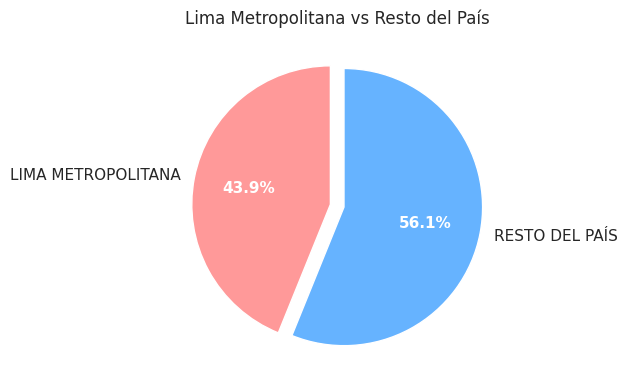


TÍTULO: Lima Metropolitana vs Resto del País
TIPO: Gráfico de pie (circular)
DATOS:
  LIMA METROPOLITANA: 6,110 (43.9%)
  RESTO DEL PAÍS: 7,818 (56.1%)

TOTAL: 13,928
--------------------------------------------------


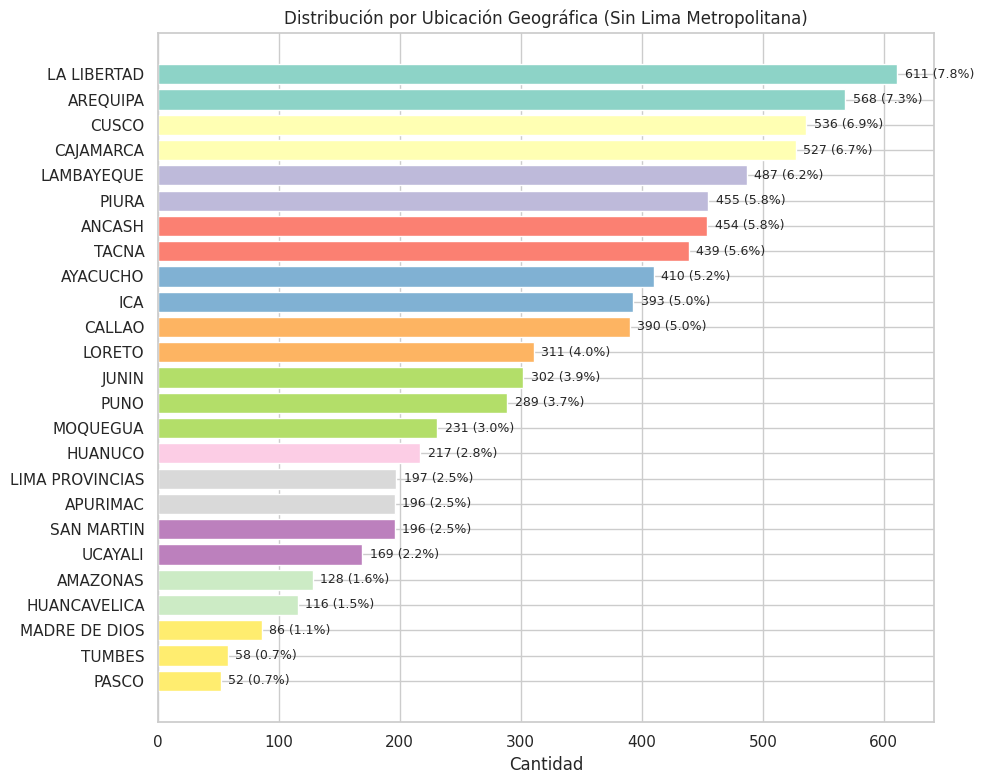



TÍTULO: Distribución por Ubicación Geográfica (Sin Lima Metropolitana)
TIPO: Gráfico de barras horizontales
DATOS:
   1. LA LIBERTAD: 611 (7.8%)
   2. AREQUIPA: 568 (7.3%)
   3. CUSCO: 536 (6.9%)
   4. CAJAMARCA: 527 (6.7%)
   5. LAMBAYEQUE: 487 (6.2%)
   6. PIURA: 455 (5.8%)
   7. ANCASH: 454 (5.8%)
   8. TACNA: 439 (5.6%)
   9. AYACUCHO: 410 (5.2%)
  10. ICA: 393 (5.0%)
  11. CALLAO: 390 (5.0%)
  12. LORETO: 311 (4.0%)
  13. JUNIN: 302 (3.9%)
  14. PUNO: 289 (3.7%)
  15. MOQUEGUA: 231 (3.0%)
  16. HUANUCO: 217 (2.8%)
  17. LIMA PROVINCIAS: 197 (2.5%)
  18. APURIMAC: 196 (2.5%)
  19. SAN MARTIN: 196 (2.5%)
  20. UCAYALI: 169 (2.2%)
  21. AMAZONAS: 128 (1.6%)
  22. HUANCAVELICA: 116 (1.5%)
  23. MADRE DE DIOS: 86 (1.1%)
  24. TUMBES: 58 (0.7%)
  25. PASCO: 52 (0.7%)

TOTAL: 7,818
--------------------------------------------------


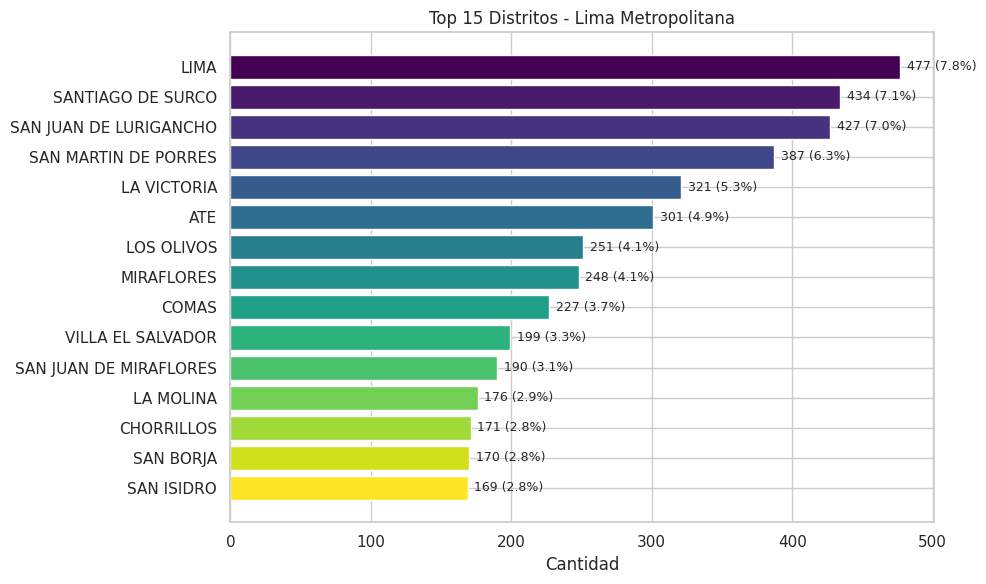



TÍTULO: Top 15 Distritos - Lima Metropolitana
TIPO: Gráfico de barras horizontales
DATOS:
   1. LIMA: 477 (7.8%)
   2. SANTIAGO DE SURCO: 434 (7.1%)
   3. SAN JUAN DE LURIGANCHO: 427 (7.0%)
   4. SAN MARTIN DE PORRES: 387 (6.3%)
   5. LA VICTORIA: 321 (5.3%)
   6. ATE: 301 (4.9%)
   7. LOS OLIVOS: 251 (4.1%)
   8. MIRAFLORES: 248 (4.1%)
   9. COMAS: 227 (3.7%)
  10. VILLA EL SALVADOR: 199 (3.3%)
  11. SAN JUAN DE MIRAFLORES: 190 (3.1%)
  12. LA MOLINA: 176 (2.9%)
  13. CHORRILLOS: 171 (2.8%)
  14. SAN BORJA: 170 (2.8%)
  15. SAN ISIDRO: 169 (2.8%)

TOTAL LIMA METROPOLITANA: 6,110
--------------------------------------------------


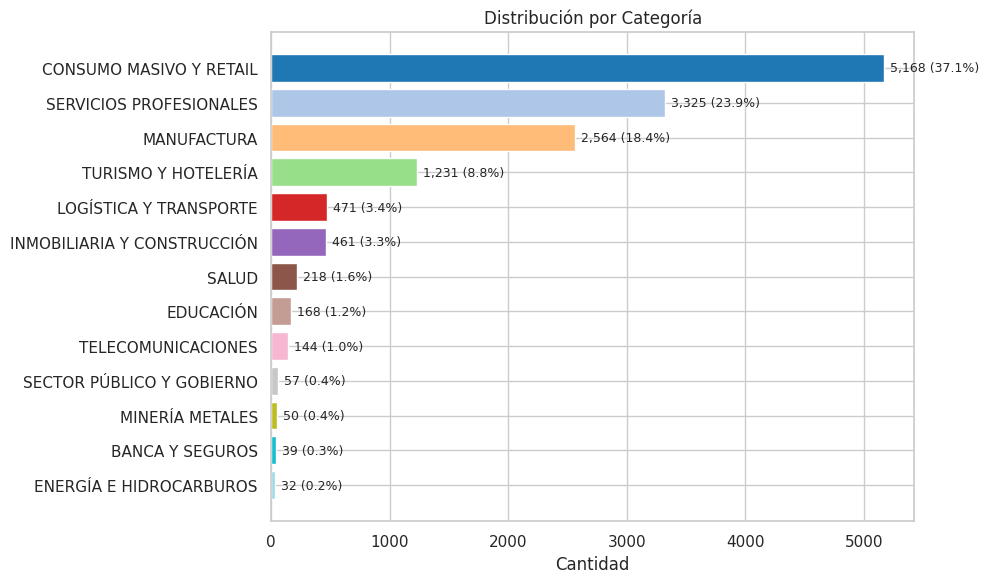


TÍTULO: Distribución por Categoría
TIPO: Gráfico de barras horizontales
DATOS:
   1. CONSUMO MASIVO Y RETAIL: 5,168 (37.1%)
   2. SERVICIOS PROFESIONALES: 3,325 (23.9%)
   3. MANUFACTURA: 2,564 (18.4%)
   4. TURISMO Y HOTELERÍA: 1,231 (8.8%)
   5. LOGÍSTICA Y TRANSPORTE: 471 (3.4%)
   6. INMOBILIARIA Y CONSTRUCCIÓN: 461 (3.3%)
   7. SALUD: 218 (1.6%)
   8. EDUCACIÓN: 168 (1.2%)
   9. TELECOMUNICACIONES: 144 (1.0%)
  10. SECTOR PÚBLICO Y GOBIERNO: 57 (0.4%)
  11. MINERÍA METALES: 50 (0.4%)
  12. BANCA Y SEGUROS: 39 (0.3%)
  13. ENERGÍA E HIDROCARBUROS: 32 (0.2%)

TOTAL: 13,928
--------------------------------------------------


In [68]:
# Configuración del estilo de gráficos
plt.style.use('default')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 13,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 10,
    'figure.titlesize': 14,
    'figure.dpi': 100,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'axes.edgecolor': 'gray',
    'axes.linewidth': 0.8
})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)
# 1. PIE CHART: LIMA METROPOLITANA vs RESTO
# ********************************************************************************
lima_count = (df_cluster['UBICACION'] == 'LIMA METROPOLITANA').sum()
resto_count = (df_cluster['UBICACION'] != 'LIMA METROPOLITANA').sum()
lima_vs_resto = pd.Series([lima_count, resto_count],index=['LIMA METROPOLITANA', 'RESTO DEL PAÍS'])
fig, ax = plt.subplots(figsize=(4.5, 4.5))
colors = ['#ff9999', '#66b3ff']
wedges, texts, autotexts = ax.pie(lima_vs_resto.values,
                                  labels=lima_vs_resto.index,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90,
                                  explode=(0.05, 0.05))
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
plt.title('Lima Metropolitana vs Resto del País')
plt.show()
# Datos en formato complementario de texto
print("\nTÍTULO: Lima Metropolitana vs Resto del País\n" + "=" * 80)
print("TIPO: Gráfico de pie (circular)")
print("DATOS:")
for categoria, valor in lima_vs_resto.items():
    porcentaje = (valor / lima_vs_resto.sum()) * 100
    print(f"  {categoria}: {valor:,} ({porcentaje:.1f}%)")
print(f"\nTOTAL: {lima_vs_resto.sum():,}")
print("-" * 50)
# 2. UBICACIONES (SIN LIMA METROPOLITANA) - Barras horizontales con cantidad y %
# ********************************************************************************
ubicacion_sin_lima = df_cluster[df_cluster['UBICACION'] != 'LIMA METROPOLITANA']['UBICACION'].value_counts()
total_sin_lima = ubicacion_sin_lima.sum()
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(ubicacion_sin_lima)))
bars = plt.barh(range(len(ubicacion_sin_lima)), ubicacion_sin_lima.values, color=colors)
# Añadir cantidad y porcentaje en las barras
for i, (bar, value) in enumerate(zip(bars, ubicacion_sin_lima.values)):
    pct = (value / total_sin_lima) * 100
    plt.text(value + max(ubicacion_sin_lima.values) * 0.01, i,
             f'{value:,} ({pct:.1f}%)',
             va='center', ha='left', fontsize=9)
plt.yticks(range(len(ubicacion_sin_lima)), ubicacion_sin_lima.index)
plt.xlabel('Cantidad')
plt.title('Distribución por Ubicación Geográfica (Sin Lima Metropolitana)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print()
# Datos en formato complementario de texto
print("\nTÍTULO: Distribución por Ubicación Geográfica (Sin Lima Metropolitana)\n" + "=" * 80)
print("TIPO: Gráfico de barras horizontales")
print("DATOS:")
for i, (ubicacion, valor) in enumerate(ubicacion_sin_lima.items(), 1):
    porcentaje = (valor / total_sin_lima) * 100
    print(f"  {i:2d}. {ubicacion}: {valor:,} ({porcentaje:.1f}%)")
print(f"\nTOTAL: {total_sin_lima:,}")
print("-" * 50)
# 3. DISTRITOS EN LIMA METROPOLITANA - Barras horizontales Top 15 con cantidad y %
# ********************************************************************************
lima_data = df_cluster[df_cluster['UBICACION'] == 'LIMA METROPOLITANA']
distrito_counts = lima_data['DISTRITO'].value_counts().head(15)
total_lima = len(lima_data)
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(distrito_counts)))
bars = plt.barh(range(len(distrito_counts)), distrito_counts.values, color=colors)
# Añadir cantidad y porcentaje en las barras
for i, (bar, value) in enumerate(zip(bars, distrito_counts.values)):
    pct = (value / total_lima) * 100
    plt.text(value + max(distrito_counts.values) * 0.01, i,
             f'{value:,} ({pct:.1f}%)',
             va='center', ha='left', fontsize=9)
plt.yticks(range(len(distrito_counts)), distrito_counts.index)
plt.xlabel('Cantidad')
plt.title('Top 15 Distritos - Lima Metropolitana')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print()
# Datos en formato complementario de texto
print("\nTÍTULO: Top 15 Distritos - Lima Metropolitana\n" + "=" * 80)
print("TIPO: Gráfico de barras horizontales")
print("DATOS:")
for i, (distrito, valor) in enumerate(distrito_counts.items(), 1):
    porcentaje = (valor / total_lima) * 100
    print(f"  {i:2d}. {distrito}: {valor:,} ({porcentaje:.1f}%)")
print(f"\nTOTAL LIMA METROPOLITANA: {total_lima:,}")
print("-" * 50)
# 4. CATEGORÍAS - Barras horizontales con cantidad y %
# ********************************************************************************
categoria_counts = df_cluster['CATEGORIA'].value_counts()
total_categorias = categoria_counts.sum()
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(categoria_counts)))
bars = plt.barh(range(len(categoria_counts)), categoria_counts.values, color=colors)
# Añadir cantidad y porcentaje en las barras
for i, (bar, value) in enumerate(zip(bars, categoria_counts.values)):
    pct = (value / total_categorias) * 100
    plt.text(value + max(categoria_counts.values) * 0.01, i,
             f'{value:,} ({pct:.1f}%)',
             va='center', ha='left', fontsize=9)
plt.yticks(range(len(categoria_counts)), categoria_counts.index)
plt.xlabel('Cantidad')
plt.title('Distribución por Categoría')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
# Datos en formato complementario de texto
print("\nTÍTULO: Distribución por Categoría\n" + "=" * 80)
print("TIPO: Gráfico de barras horizontales")
print("DATOS:")
for i, (categoria, valor) in enumerate(categoria_counts.items(), 1):
    porcentaje = (valor / total_categorias) * 100
    print(f"  {i:2d}. {categoria}: {valor:,} ({porcentaje:.1f}%)")
print(f"\nTOTAL: {total_categorias:,}")
print("-" * 50)

## **3.3. Análisis por cluster de variables derivadas**
---
---

ANÁLISIS DETALLADO DEL CLÚSTER 0
Cantidad de MYPEs: 2496 (17.92%)

### PERFIL DIGITAL DEL CLÚSTER


GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
count              2496.00               2496.00            2496.00   
mean                 37.52                 59.15              18.43   
std                  18.49                 18.53              14.30   
min                   0.00                 12.50               0.00   
25%                  20.84                 50.00               0.00   
50%                  37.50                 50.00              25.00   
75%                  50.00                 75.00              25.00   
max                 100.00                100.00              50.00   

       MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
count            2496.00         2496.00   2496.00  
mean               32.19           28.73     46.27  
std                13.38           16.39     20.43  
min                 0.00            0.00      6.00  
25%                22.00           25.00     31.25  
50%                32.00           25.00     50.00  
75%                41.00           50.00     56.25  
max                82.00           75.00    100.00



### ESTADÍSTICAS ADICIONALES
--------------------------------------------------

GESTION EMPRESARIAL:
  • Media: 37.52
  • Mediana: 37.50
  • Moda: 29.17
  • Desv. Estándar: 18.49
  • Coef. Variación: 49.3%

COMERCIO ELECTRONICO:
  • Media: 59.15
  • Mediana: 50.00
  • Moda: 50.00
  • Desv. Estándar: 18.53
  • Coef. Variación: 31.3%

ANALISIS DE DATOS:
  • Media: 18.43
  • Mediana: 25.00
  • Moda: 25.00
  • Desv. Estándar: 14.30
  • Coef. Variación: 77.6%

MARKETING DIGITAL:
  • Media: 32.19
  • Mediana: 32.00
  • Moda: 30.00
  • Desv. Estándar: 13.38
  • Coef. Variación: 41.6%

MEDIOS DE PAGO:
  • Media: 28.73
  • Mediana: 25.00
  • Moda: 25.00
  • Desv. Estándar: 16.39
  • Coef. Variación: 57.0%

FINANZAS:
  • Media: 46.27
  • Mediana: 50.00
  • Moda: 56.25
  • Desv. Estándar: 20.43
  • Coef. Variación: 44.2%



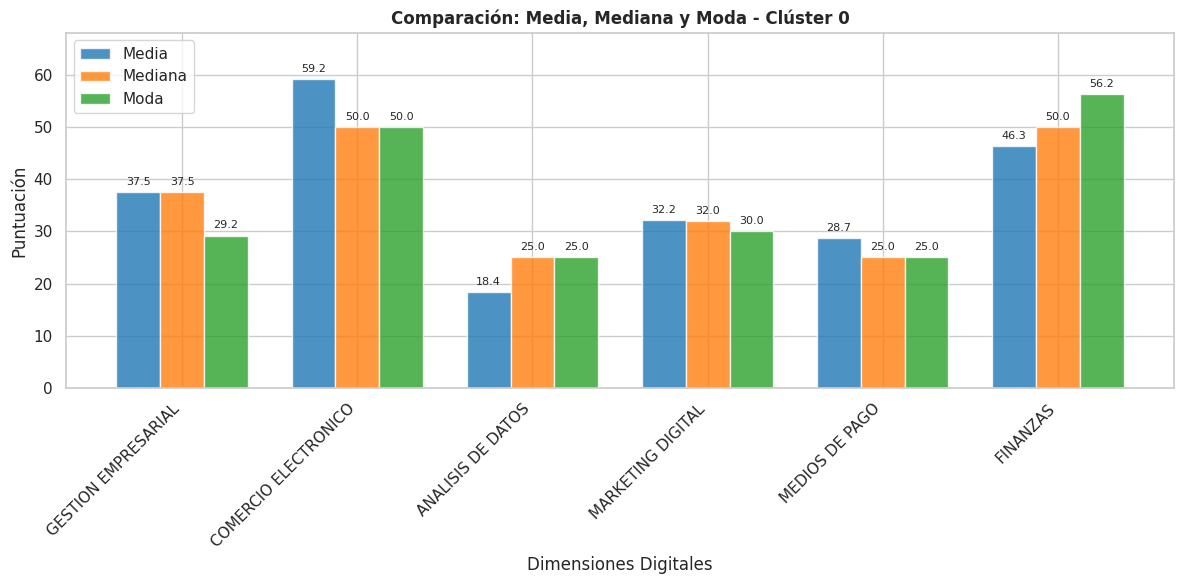


📊 ANÁLISIS DE TENDENCIA CENTRAL - CLÚSTER 0
--------------------------------------------------

GESTION EMPRESARIAL ⚖️:
  • Media: 37.52
  • Mediana: 37.50
  • Moda: 29.17
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (37.5)

COMERCIO ELECTRONICO 📈:
  • Media: 59.15
  • Mediana: 50.00
  • Moda: 50.00
  • Distribución: ASIMÉTRICA POSITIVA (cola derecha)
  • Valor más representativo: Mediana/Moda (~50.0)

ANALISIS DE DATOS 📉:
  • Media: 18.43
  • Mediana: 25.00
  • Moda: 25.00
  • Distribución: ASIMÉTRICA NEGATIVA (cola izquierda)
  • Valor más representativo: Mediana/Moda (~25.0)

MARKETING DIGITAL ⚖️:
  • Media: 32.19
  • Mediana: 32.00
  • Moda: 30.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (32.2)

MEDIOS DE PAGO 📈:
  • Media: 28.73
  • Mediana: 25.00
  • Moda: 25.00
  • Distribución: ASIMÉTRICA POSITIVA (cola derecha)
  • Valor más representativo: Mediana/Moda (~25.0)

FINANZAS 📉:
  • Media: 46.27
  • Mediana: 50.00
  • Moda: 56.25
  • Distr

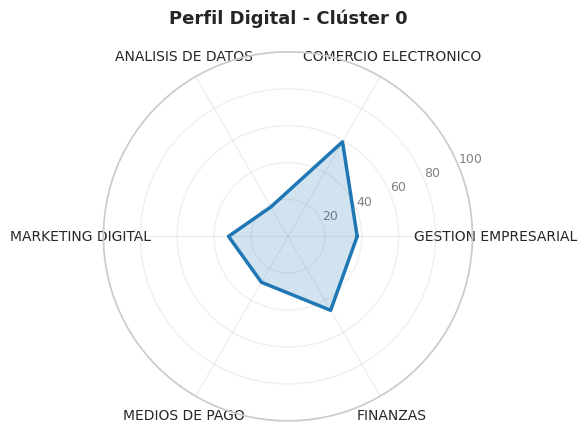


📊 DESCRIPCIÓN DEL GRÁFICO DE RADAR - CLÚSTER 0
--------------------------------------------------
Valores por dimensión:
• GESTION EMPRESARIAL: 37.5/100
• COMERCIO ELECTRONICO: 59.2/100
• ANALISIS DE DATOS: 18.4/100
• MARKETING DIGITAL: 32.2/100
• MEDIOS DE PAGO: 28.7/100
• FINANZAS: 46.3/100

INTERPRETACIÓN:
• Dimensión más fuerte: COMERCIO ELECTRONICO (59.2/100)
• Dimensión más débil: ANALISIS DE DATOS (18.4/100)
• Promedio general del clúster: 37.1/100



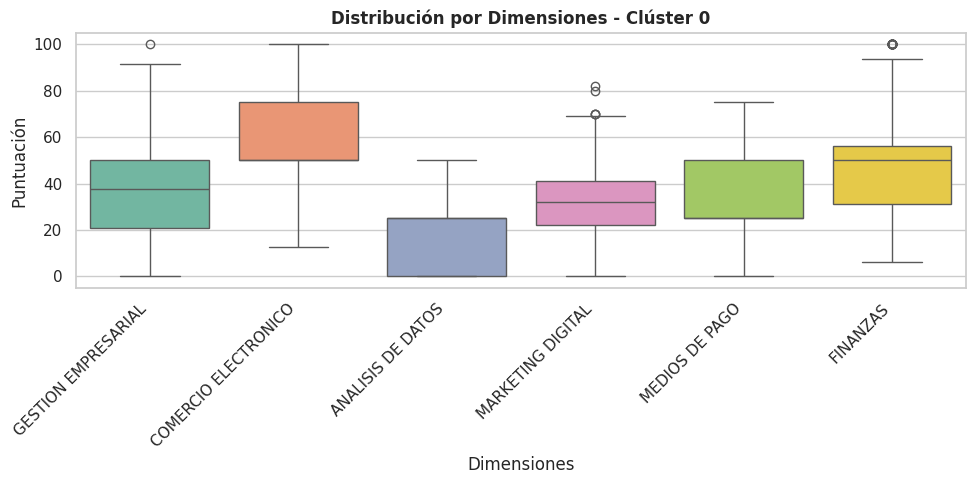


📊 DESCRIPCIÓN DEL BOXPLOT - CLÚSTER 0
--------------------------------------------------
Estadísticas por dimensión:

GESTION EMPRESARIAL:
  • Q1 (25%): 20.8
  • Mediana (50%): 37.5
  • Q3 (75%): 50.0
  • Rango intercuartílico: 29.2

COMERCIO ELECTRONICO:
  • Q1 (25%): 50.0
  • Mediana (50%): 50.0
  • Q3 (75%): 75.0
  • Rango intercuartílico: 25.0

ANALISIS DE DATOS:
  • Q1 (25%): 0.0
  • Mediana (50%): 25.0
  • Q3 (75%): 25.0
  • Rango intercuartílico: 25.0

MARKETING DIGITAL:
  • Q1 (25%): 22.0
  • Mediana (50%): 32.0
  • Q3 (75%): 41.0
  • Rango intercuartílico: 19.0

MEDIOS DE PAGO:
  • Q1 (25%): 25.0
  • Mediana (50%): 25.0
  • Q3 (75%): 50.0
  • Rango intercuartílico: 25.0

FINANZAS:
  • Q1 (25%): 31.2
  • Mediana (50%): 50.0
  • Q3 (75%): 56.2
  • Rango intercuartílico: 25.0



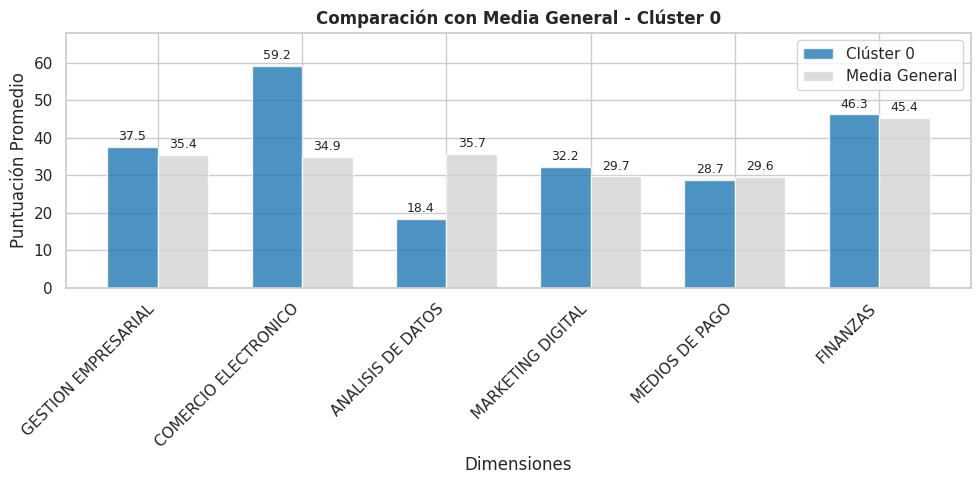


📊 COMPARACIÓN CON MEDIA GENERAL - CLÚSTER 0
--------------------------------------------------

GESTION EMPRESARIAL:
  • Clúster 0: 37.5
  • Media General: 35.4
  • Diferencia: +2.1 (+6.0%) ➡️ SIMILAR

COMERCIO ELECTRONICO:
  • Clúster 0: 59.2
  • Media General: 34.9
  • Diferencia: +24.3 (+69.7%) 🔺 SUPERIOR

ANALISIS DE DATOS:
  • Clúster 0: 18.4
  • Media General: 35.7
  • Diferencia: -17.2 (-48.3%) 🔻 INFERIOR

MARKETING DIGITAL:
  • Clúster 0: 32.2
  • Media General: 29.7
  • Diferencia: +2.5 (+8.3%) ➡️ SIMILAR

MEDIOS DE PAGO:
  • Clúster 0: 28.7
  • Media General: 29.6
  • Diferencia: -0.9 (-2.9%) ➡️ SIMILAR

FINANZAS:
  • Clúster 0: 46.3
  • Media General: 45.4
  • Diferencia: +0.9 (+1.9%) ➡️ SIMILAR

### CONTEXTO GEOGRÁFICO DEL CLÚSTER 0


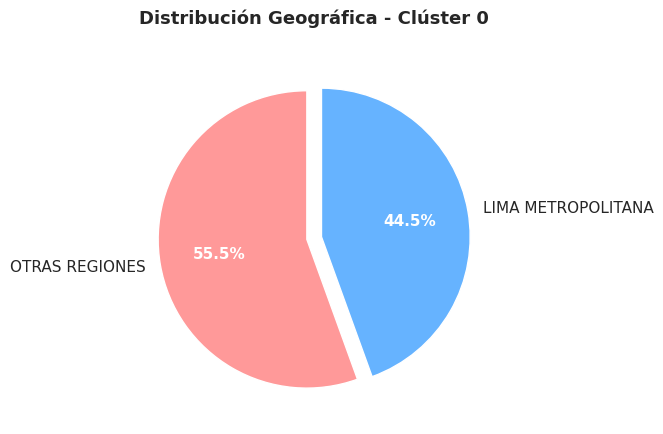


📊 DISTRIBUCIÓN GEOGRÁFICA - CLÚSTER 0
--------------------------------------------------
• OTRAS REGIONES: 1386 MYPEs (55.5%)
• LIMA METROPOLITANA: 1110 MYPEs (44.5%)



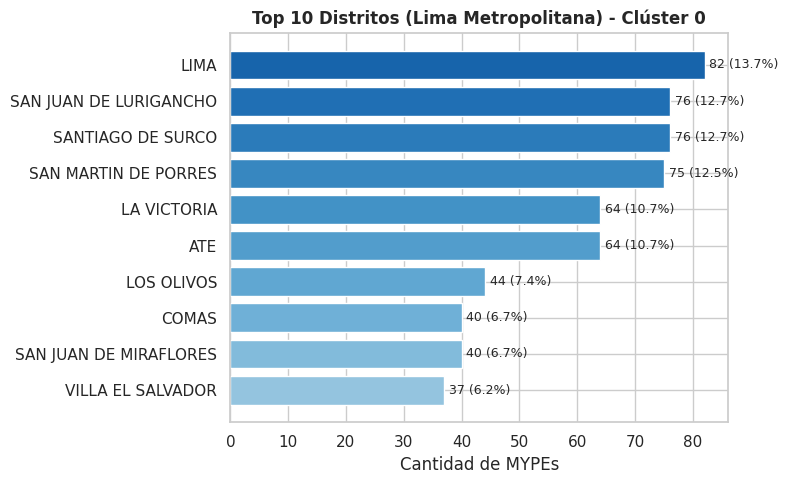


📊 TOP 10 DISTRITOS LIMA METROPOLITANA - CLÚSTER 0
--------------------------------------------------
 1. LIMA: 82 MYPEs (13.7%)
 2. SAN JUAN DE LURIGANCHO: 76 MYPEs (12.7%)
 3. SANTIAGO DE SURCO: 76 MYPEs (12.7%)
 4. SAN MARTIN DE PORRES: 75 MYPEs (12.5%)
 5. LA VICTORIA: 64 MYPEs (10.7%)
 6. ATE: 64 MYPEs (10.7%)
 7. LOS OLIVOS: 44 MYPEs (7.4%)
 8. COMAS: 40 MYPEs (6.7%)
 9. SAN JUAN DE MIRAFLORES: 40 MYPEs (6.7%)
10. VILLA EL SALVADOR: 37 MYPEs (6.2%)



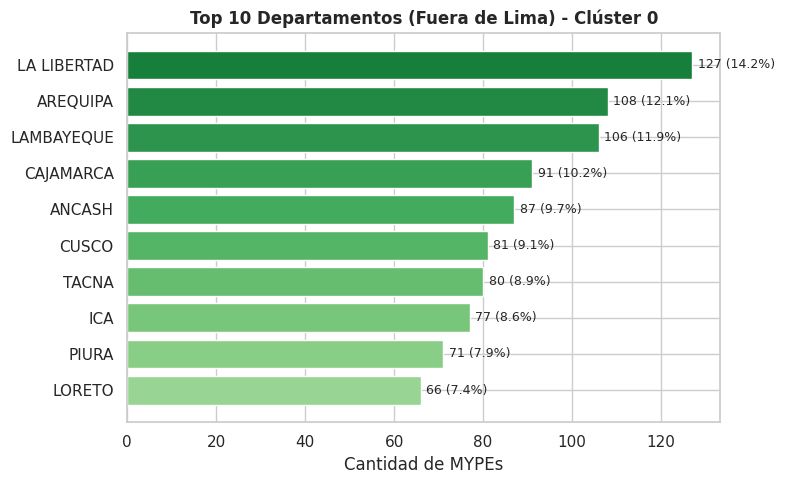


📊 TOP 10 DEPARTAMENTOS (FUERA DE LIMA) - CLÚSTER 0
--------------------------------------------------
 1. LA LIBERTAD: 127 MYPEs (14.2%)
 2. AREQUIPA: 108 MYPEs (12.1%)
 3. LAMBAYEQUE: 106 MYPEs (11.9%)
 4. CAJAMARCA: 91 MYPEs (10.2%)
 5. ANCASH: 87 MYPEs (9.7%)
 6. CUSCO: 81 MYPEs (9.1%)
 7. TACNA: 80 MYPEs (8.9%)
 8. ICA: 77 MYPEs (8.6%)
 9. PIURA: 71 MYPEs (7.9%)
10. LORETO: 66 MYPEs (7.4%)

### CONTEXTO SECTORIAL DEL CLÚSTER 0


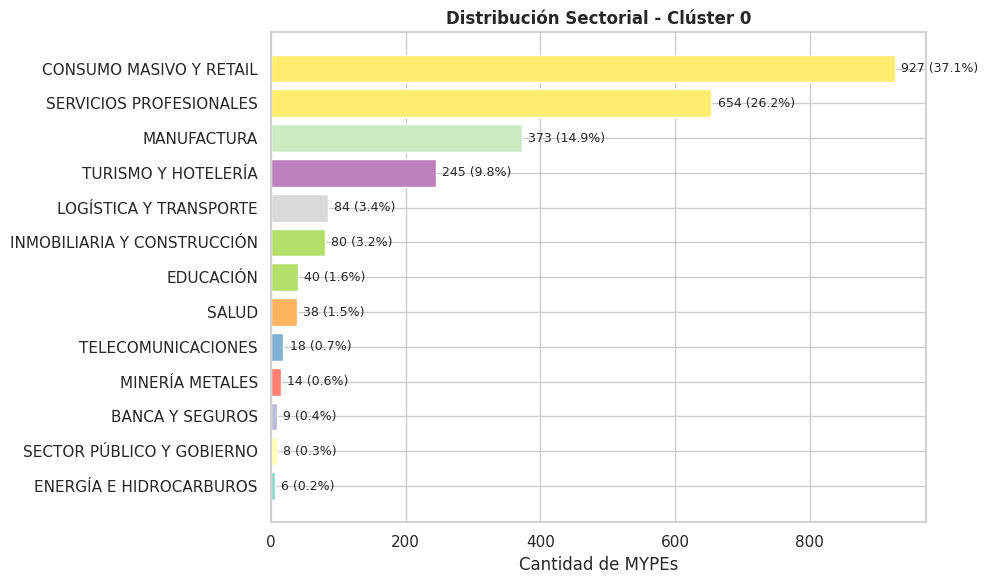


📊 DISTRIBUCIÓN SECTORIAL - CLÚSTER 0
--------------------------------------------------
 1. CONSUMO MASIVO Y RETAIL: 927 MYPEs (37.1%)
 2. SERVICIOS PROFESIONALES: 654 MYPEs (26.2%)
 3. MANUFACTURA: 373 MYPEs (14.9%)
 4. TURISMO Y HOTELERÍA: 245 MYPEs (9.8%)
 5. LOGÍSTICA Y TRANSPORTE: 84 MYPEs (3.4%)
 6. INMOBILIARIA Y CONSTRUCCIÓN: 80 MYPEs (3.2%)
 7. EDUCACIÓN: 40 MYPEs (1.6%)
 8. SALUD: 38 MYPEs (1.5%)
 9. TELECOMUNICACIONES: 18 MYPEs (0.7%)
10. MINERÍA METALES: 14 MYPEs (0.6%)
11. BANCA Y SEGUROS: 9 MYPEs (0.4%)
12. SECTOR PÚBLICO Y GOBIERNO: 8 MYPEs (0.3%)
13. ENERGÍA E HIDROCARBUROS: 6 MYPEs (0.2%)

### NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 0


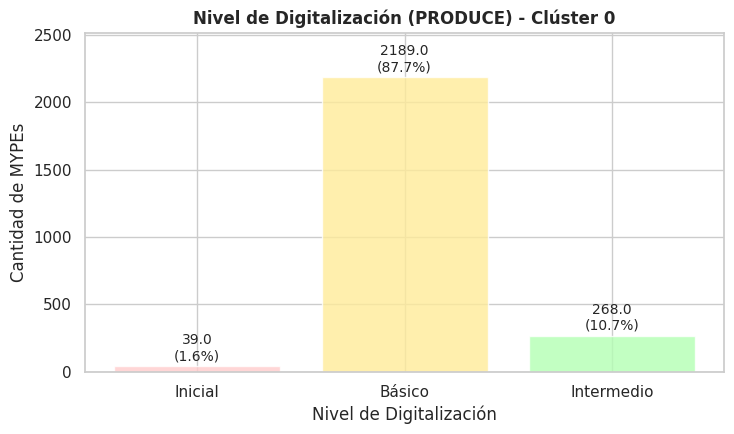


📊 NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 0
--------------------------------------------------
• Inicial: 39.0 MYPEs (1.6%)
• Básico: 2189.0 MYPEs (87.7%)
• Intermedio: 268.0 MYPEs (10.7%)

****************************************************************************************************
FIN ANÁLISIS CLÚSTER 0
****************************************************************************************************


ANÁLISIS DETALLADO DEL CLÚSTER 1
Cantidad de MYPEs: 987 (7.09%)

### PERFIL DIGITAL DEL CLÚSTER


GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
count               987.00                987.00             987.00   
mean                 43.52                 64.06              47.73   
std                  20.40                 25.03              23.99   
min                   0.00                  0.00               0.00   
25%                  29.17                 50.00              25.00   
50%                  41.67                 62.50              50.00   
75%                  56.25                 87.50              58.33   
max                 100.00                100.00             100.00   

       MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
count             987.00          987.00    987.00  
mean               53.53           79.90     45.72  
std                18.29           19.61     23.50  
min                10.00           41.67      6.00  
25%                40.00           58.33     25.00  
50%                52.00           83.33     50.00  
75%                65.00          100.00     62.50  
max               100.00          100.00    100.00



### ESTADÍSTICAS ADICIONALES
--------------------------------------------------

GESTION EMPRESARIAL:
  • Media: 43.52
  • Mediana: 41.67
  • Moda: 37.50
  • Desv. Estándar: 20.40
  • Coef. Variación: 46.9%

COMERCIO ELECTRONICO:
  • Media: 64.06
  • Mediana: 62.50
  • Moda: 100.00
  • Desv. Estándar: 25.03
  • Coef. Variación: 39.1%

ANALISIS DE DATOS:
  • Media: 47.73
  • Mediana: 50.00
  • Moda: 50.00
  • Desv. Estándar: 23.99
  • Coef. Variación: 50.3%

MARKETING DIGITAL:
  • Media: 53.53
  • Mediana: 52.00
  • Moda: 50.00
  • Desv. Estándar: 18.29
  • Coef. Variación: 34.2%

MEDIOS DE PAGO:
  • Media: 79.90
  • Mediana: 83.33
  • Moda: 100.00
  • Desv. Estándar: 19.61
  • Coef. Variación: 24.5%

FINANZAS:
  • Media: 45.72
  • Mediana: 50.00
  • Moda: 56.25
  • Desv. Estándar: 23.50
  • Coef. Variación: 51.4%



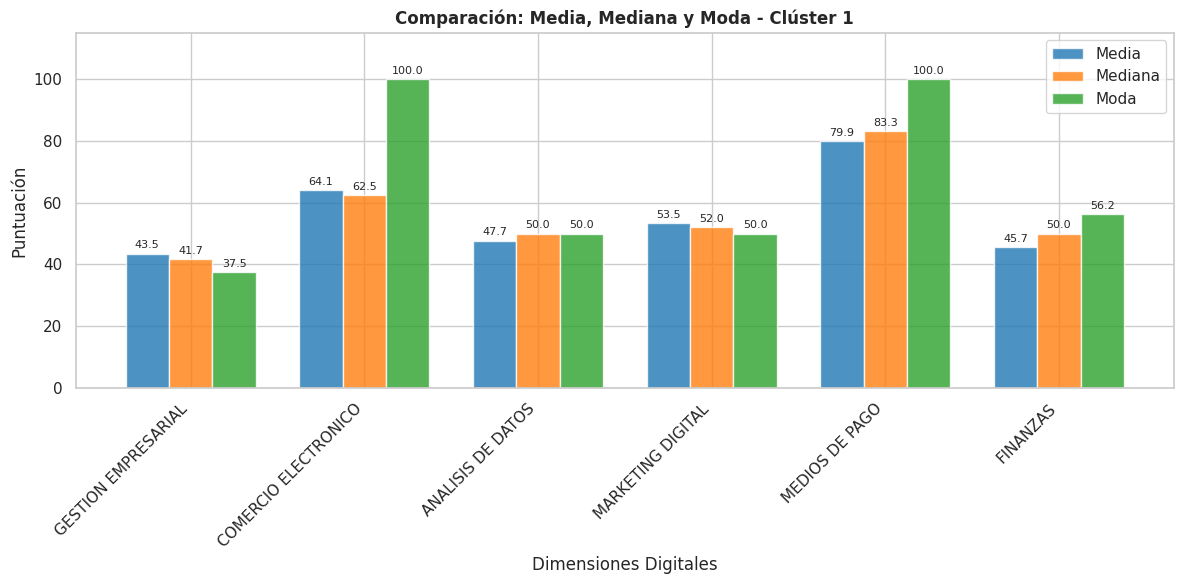


📊 ANÁLISIS DE TENDENCIA CENTRAL - CLÚSTER 1
--------------------------------------------------

GESTION EMPRESARIAL ⚖️:
  • Media: 43.52
  • Mediana: 41.67
  • Moda: 37.50
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (43.5)

COMERCIO ELECTRONICO ⚖️:
  • Media: 64.06
  • Mediana: 62.50
  • Moda: 100.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (64.1)

ANALISIS DE DATOS 📉:
  • Media: 47.73
  • Mediana: 50.00
  • Moda: 50.00
  • Distribución: ASIMÉTRICA NEGATIVA (cola izquierda)
  • Valor más representativo: Mediana/Moda (~50.0)

MARKETING DIGITAL ⚖️:
  • Media: 53.53
  • Mediana: 52.00
  • Moda: 50.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (53.5)

MEDIOS DE PAGO 📉:
  • Media: 79.90
  • Mediana: 83.33
  • Moda: 100.00
  • Distribución: ASIMÉTRICA NEGATIVA (cola izquierda)
  • Valor más representativo: Media (79.9)

FINANZAS 📉:
  • Media: 45.72
  • Mediana: 50.00
  • Moda: 56.25
  • Distribución: ASIMÉTRICA NEGATIVA (cola i

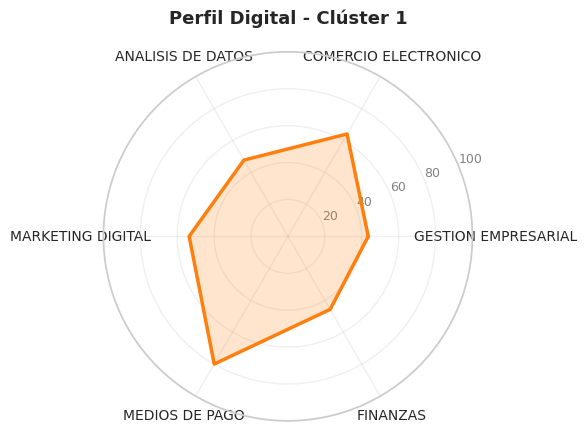


📊 DESCRIPCIÓN DEL GRÁFICO DE RADAR - CLÚSTER 1
--------------------------------------------------
Valores por dimensión:
• GESTION EMPRESARIAL: 43.5/100
• COMERCIO ELECTRONICO: 64.1/100
• ANALISIS DE DATOS: 47.7/100
• MARKETING DIGITAL: 53.5/100
• MEDIOS DE PAGO: 79.9/100
• FINANZAS: 45.7/100

INTERPRETACIÓN:
• Dimensión más fuerte: MEDIOS DE PAGO (79.9/100)
• Dimensión más débil: GESTION EMPRESARIAL (43.5/100)
• Promedio general del clúster: 55.7/100



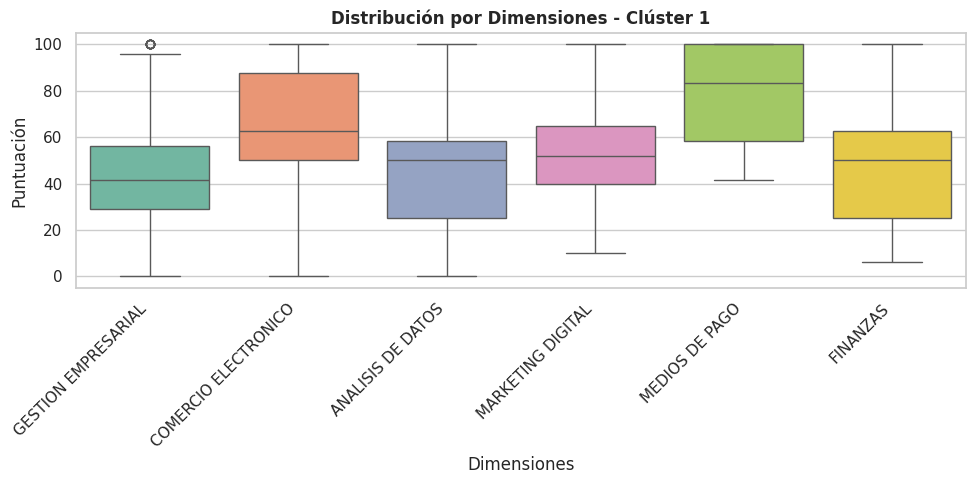


📊 DESCRIPCIÓN DEL BOXPLOT - CLÚSTER 1
--------------------------------------------------
Estadísticas por dimensión:

GESTION EMPRESARIAL:
  • Q1 (25%): 29.2
  • Mediana (50%): 41.7
  • Q3 (75%): 56.2
  • Rango intercuartílico: 27.1

COMERCIO ELECTRONICO:
  • Q1 (25%): 50.0
  • Mediana (50%): 62.5
  • Q3 (75%): 87.5
  • Rango intercuartílico: 37.5

ANALISIS DE DATOS:
  • Q1 (25%): 25.0
  • Mediana (50%): 50.0
  • Q3 (75%): 58.3
  • Rango intercuartílico: 33.3

MARKETING DIGITAL:
  • Q1 (25%): 40.0
  • Mediana (50%): 52.0
  • Q3 (75%): 65.0
  • Rango intercuartílico: 25.0

MEDIOS DE PAGO:
  • Q1 (25%): 58.3
  • Mediana (50%): 83.3
  • Q3 (75%): 100.0
  • Rango intercuartílico: 41.7

FINANZAS:
  • Q1 (25%): 25.0
  • Mediana (50%): 50.0
  • Q3 (75%): 62.5
  • Rango intercuartílico: 37.5



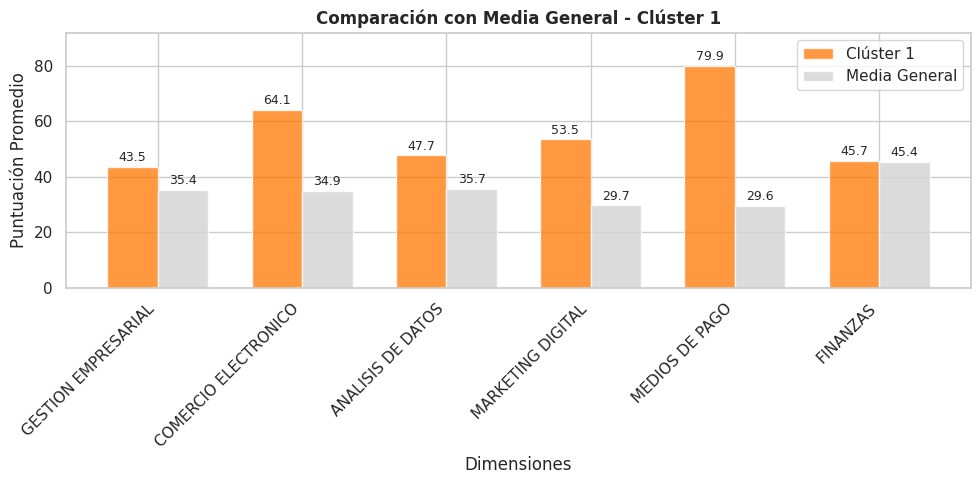


📊 COMPARACIÓN CON MEDIA GENERAL - CLÚSTER 1
--------------------------------------------------

GESTION EMPRESARIAL:
  • Clúster 1: 43.5
  • Media General: 35.4
  • Diferencia: +8.1 (+22.9%) 🔺 SUPERIOR

COMERCIO ELECTRONICO:
  • Clúster 1: 64.1
  • Media General: 34.9
  • Diferencia: +29.2 (+83.8%) 🔺 SUPERIOR

ANALISIS DE DATOS:
  • Clúster 1: 47.7
  • Media General: 35.7
  • Diferencia: +12.1 (+33.9%) 🔺 SUPERIOR

MARKETING DIGITAL:
  • Clúster 1: 53.5
  • Media General: 29.7
  • Diferencia: +23.8 (+80.1%) 🔺 SUPERIOR

MEDIOS DE PAGO:
  • Clúster 1: 79.9
  • Media General: 29.6
  • Diferencia: +50.3 (+170.0%) 🔺 SUPERIOR

FINANZAS:
  • Clúster 1: 45.7
  • Media General: 45.4
  • Diferencia: +0.3 (+0.7%) ➡️ SIMILAR

### CONTEXTO GEOGRÁFICO DEL CLÚSTER 1


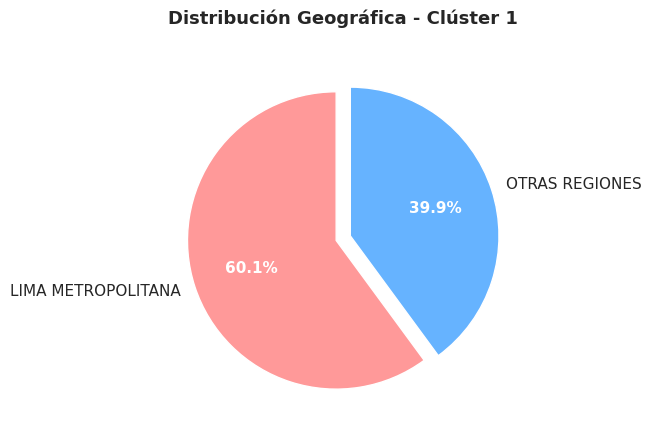


📊 DISTRIBUCIÓN GEOGRÁFICA - CLÚSTER 1
--------------------------------------------------
• LIMA METROPOLITANA: 593 MYPEs (60.1%)
• OTRAS REGIONES: 394 MYPEs (39.9%)



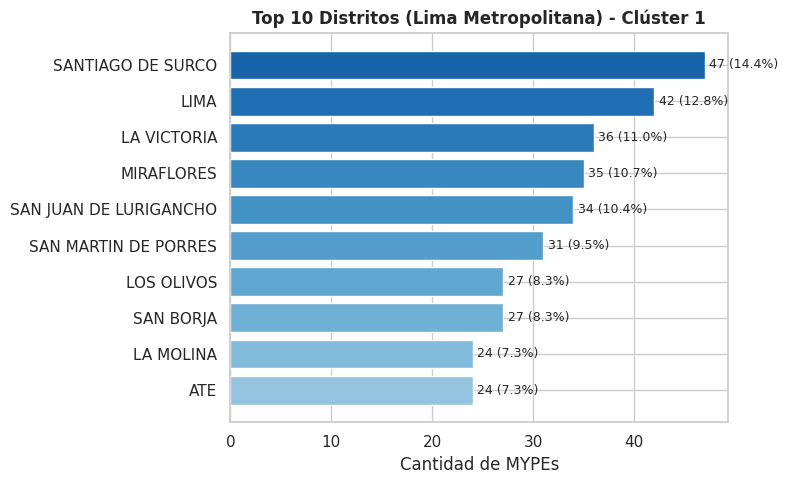


📊 TOP 10 DISTRITOS LIMA METROPOLITANA - CLÚSTER 1
--------------------------------------------------
 1. SANTIAGO DE SURCO: 47 MYPEs (14.4%)
 2. LIMA: 42 MYPEs (12.8%)
 3. LA VICTORIA: 36 MYPEs (11.0%)
 4. MIRAFLORES: 35 MYPEs (10.7%)
 5. SAN JUAN DE LURIGANCHO: 34 MYPEs (10.4%)
 6. SAN MARTIN DE PORRES: 31 MYPEs (9.5%)
 7. LOS OLIVOS: 27 MYPEs (8.3%)
 8. SAN BORJA: 27 MYPEs (8.3%)
 9. LA MOLINA: 24 MYPEs (7.3%)
10. ATE: 24 MYPEs (7.3%)



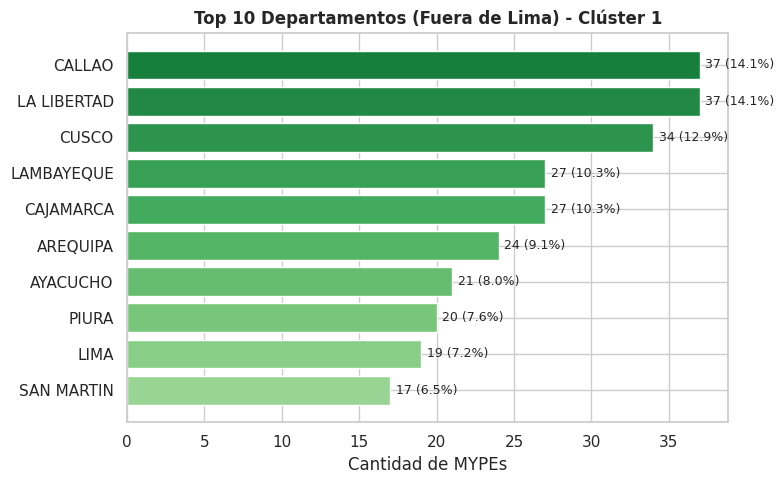


📊 TOP 10 DEPARTAMENTOS (FUERA DE LIMA) - CLÚSTER 1
--------------------------------------------------
 1. CALLAO: 37 MYPEs (14.1%)
 2. LA LIBERTAD: 37 MYPEs (14.1%)
 3. CUSCO: 34 MYPEs (12.9%)
 4. LAMBAYEQUE: 27 MYPEs (10.3%)
 5. CAJAMARCA: 27 MYPEs (10.3%)
 6. AREQUIPA: 24 MYPEs (9.1%)
 7. AYACUCHO: 21 MYPEs (8.0%)
 8. PIURA: 20 MYPEs (7.6%)
 9. LIMA: 19 MYPEs (7.2%)
10. SAN MARTIN: 17 MYPEs (6.5%)

### CONTEXTO SECTORIAL DEL CLÚSTER 1


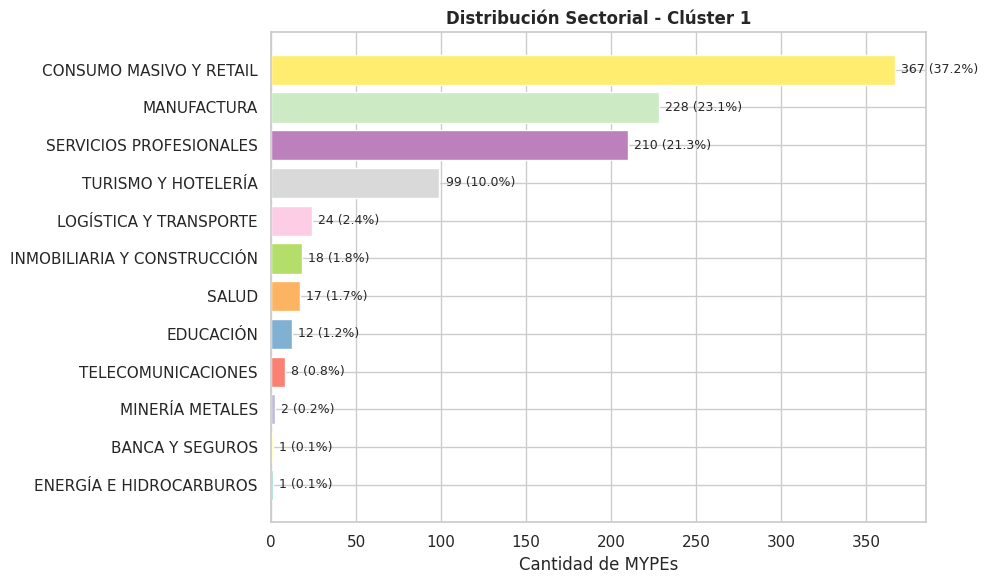


📊 DISTRIBUCIÓN SECTORIAL - CLÚSTER 1
--------------------------------------------------
 1. CONSUMO MASIVO Y RETAIL: 367 MYPEs (37.2%)
 2. MANUFACTURA: 228 MYPEs (23.1%)
 3. SERVICIOS PROFESIONALES: 210 MYPEs (21.3%)
 4. TURISMO Y HOTELERÍA: 99 MYPEs (10.0%)
 5. LOGÍSTICA Y TRANSPORTE: 24 MYPEs (2.4%)
 6. INMOBILIARIA Y CONSTRUCCIÓN: 18 MYPEs (1.8%)
 7. SALUD: 17 MYPEs (1.7%)
 8. EDUCACIÓN: 12 MYPEs (1.2%)
 9. TELECOMUNICACIONES: 8 MYPEs (0.8%)
10. MINERÍA METALES: 2 MYPEs (0.2%)
11. BANCA Y SEGUROS: 1 MYPEs (0.1%)
12. ENERGÍA E HIDROCARBUROS: 1 MYPEs (0.1%)

### NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 1


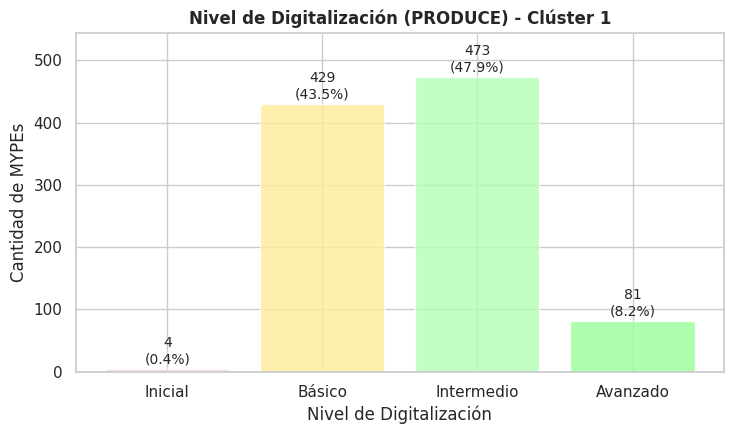


📊 NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 1
--------------------------------------------------
• Inicial: 4 MYPEs (0.4%)
• Básico: 429 MYPEs (43.5%)
• Intermedio: 473 MYPEs (47.9%)
• Avanzado: 81 MYPEs (8.2%)

****************************************************************************************************
FIN ANÁLISIS CLÚSTER 1
****************************************************************************************************


ANÁLISIS DETALLADO DEL CLÚSTER 2
Cantidad de MYPEs: 2918 (20.95%)

### PERFIL DIGITAL DEL CLÚSTER


GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
count              2918.00               2918.00            2918.00   
mean                 51.17                 64.15              68.15   
std                  17.57                 19.07              18.83   
min                   4.17                 12.50              25.00   
25%                  37.50                 50.00              50.00   
50%                  50.00                 62.50              75.00   
75%                  62.50                 75.00              75.00   
max                 100.00                100.00             100.00   

       MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
count            2918.00         2918.00   2918.00  
mean               37.00           26.16     55.01  
std                15.08           16.11     20.59  
min                 0.00            0.00      6.25  
25%                26.00           25.00     37.50  
50%                36.00           25.00     56.25  
75%                46.00           25.00     68.75  
max               100.00           75.00    100.00



### ESTADÍSTICAS ADICIONALES
--------------------------------------------------

GESTION EMPRESARIAL:
  • Media: 51.17
  • Mediana: 50.00
  • Moda: 50.00
  • Desv. Estándar: 17.57
  • Coef. Variación: 34.3%

COMERCIO ELECTRONICO:
  • Media: 64.15
  • Mediana: 62.50
  • Moda: 50.00
  • Desv. Estándar: 19.07
  • Coef. Variación: 29.7%

ANALISIS DE DATOS:
  • Media: 68.15
  • Mediana: 75.00
  • Moda: 50.00
  • Desv. Estándar: 18.83
  • Coef. Variación: 27.6%

MARKETING DIGITAL:
  • Media: 37.00
  • Mediana: 36.00
  • Moda: 42.00
  • Desv. Estándar: 15.08
  • Coef. Variación: 40.8%

MEDIOS DE PAGO:
  • Media: 26.16
  • Mediana: 25.00
  • Moda: 25.00
  • Desv. Estándar: 16.11
  • Coef. Variación: 61.6%

FINANZAS:
  • Media: 55.01
  • Mediana: 56.25
  • Moda: 56.25
  • Desv. Estándar: 20.59
  • Coef. Variación: 37.4%



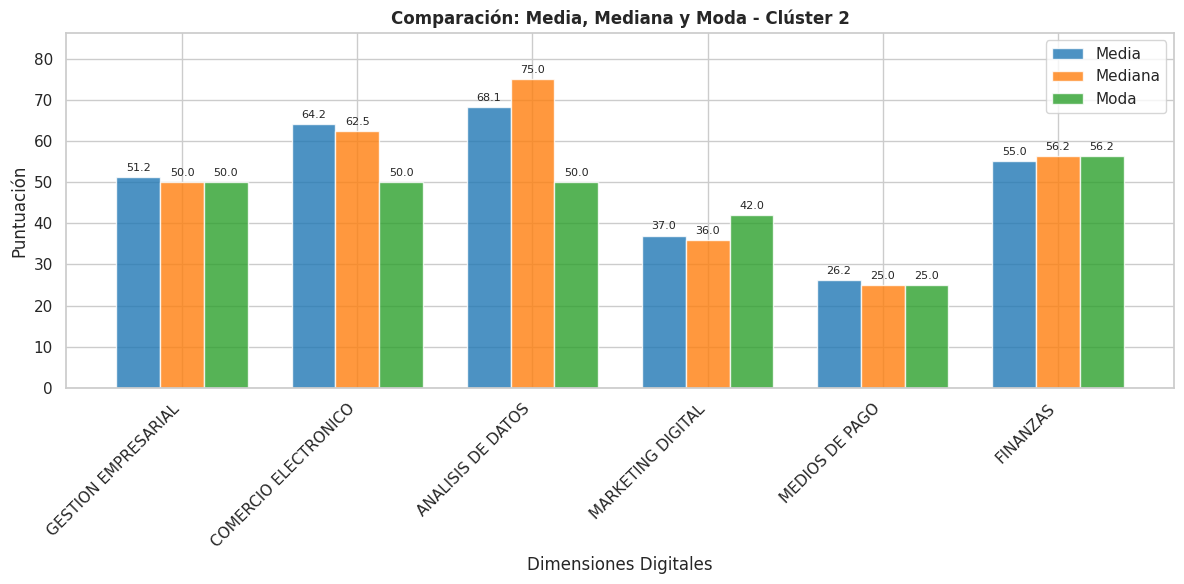


📊 ANÁLISIS DE TENDENCIA CENTRAL - CLÚSTER 2
--------------------------------------------------

GESTION EMPRESARIAL ⚖️:
  • Media: 51.17
  • Mediana: 50.00
  • Moda: 50.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~51.2)

COMERCIO ELECTRONICO ⚖️:
  • Media: 64.15
  • Mediana: 62.50
  • Moda: 50.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (64.2)

ANALISIS DE DATOS 📉:
  • Media: 68.15
  • Mediana: 75.00
  • Moda: 50.00
  • Distribución: ASIMÉTRICA NEGATIVA (cola izquierda)
  • Valor más representativo: Media (68.1)

MARKETING DIGITAL ⚖️:
  • Media: 37.00
  • Mediana: 36.00
  • Moda: 42.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (37.0)

MEDIOS DE PAGO ⚖️:
  • Media: 26.16
  • Mediana: 25.00
  • Moda: 25.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~26.2)

FINANZAS ⚖️:
  • Media: 55.01
  • Mediana: 56.25
  • Moda: 56.25
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera

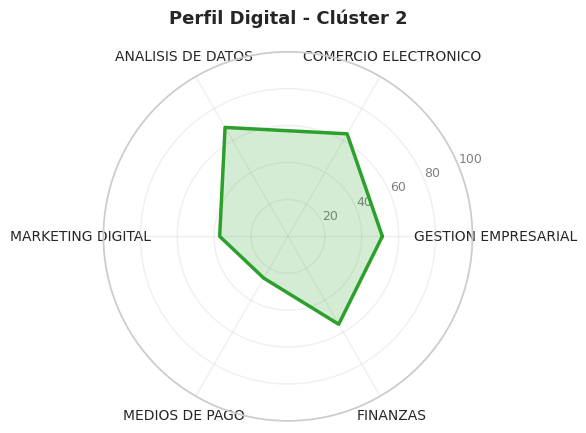


📊 DESCRIPCIÓN DEL GRÁFICO DE RADAR - CLÚSTER 2
--------------------------------------------------
Valores por dimensión:
• GESTION EMPRESARIAL: 51.2/100
• COMERCIO ELECTRONICO: 64.2/100
• ANALISIS DE DATOS: 68.1/100
• MARKETING DIGITAL: 37.0/100
• MEDIOS DE PAGO: 26.2/100
• FINANZAS: 55.0/100

INTERPRETACIÓN:
• Dimensión más fuerte: ANALISIS DE DATOS (68.1/100)
• Dimensión más débil: MEDIOS DE PAGO (26.2/100)
• Promedio general del clúster: 50.3/100



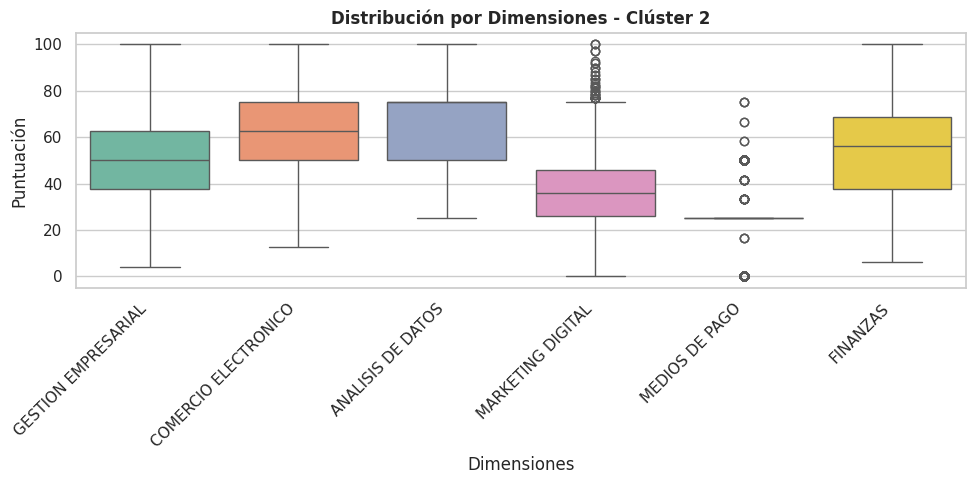


📊 DESCRIPCIÓN DEL BOXPLOT - CLÚSTER 2
--------------------------------------------------
Estadísticas por dimensión:

GESTION EMPRESARIAL:
  • Q1 (25%): 37.5
  • Mediana (50%): 50.0
  • Q3 (75%): 62.5
  • Rango intercuartílico: 25.0

COMERCIO ELECTRONICO:
  • Q1 (25%): 50.0
  • Mediana (50%): 62.5
  • Q3 (75%): 75.0
  • Rango intercuartílico: 25.0

ANALISIS DE DATOS:
  • Q1 (25%): 50.0
  • Mediana (50%): 75.0
  • Q3 (75%): 75.0
  • Rango intercuartílico: 25.0

MARKETING DIGITAL:
  • Q1 (25%): 26.0
  • Mediana (50%): 36.0
  • Q3 (75%): 46.0
  • Rango intercuartílico: 20.0

MEDIOS DE PAGO:
  • Q1 (25%): 25.0
  • Mediana (50%): 25.0
  • Q3 (75%): 25.0
  • Rango intercuartílico: 0.0

FINANZAS:
  • Q1 (25%): 37.5
  • Mediana (50%): 56.2
  • Q3 (75%): 68.8
  • Rango intercuartílico: 31.2



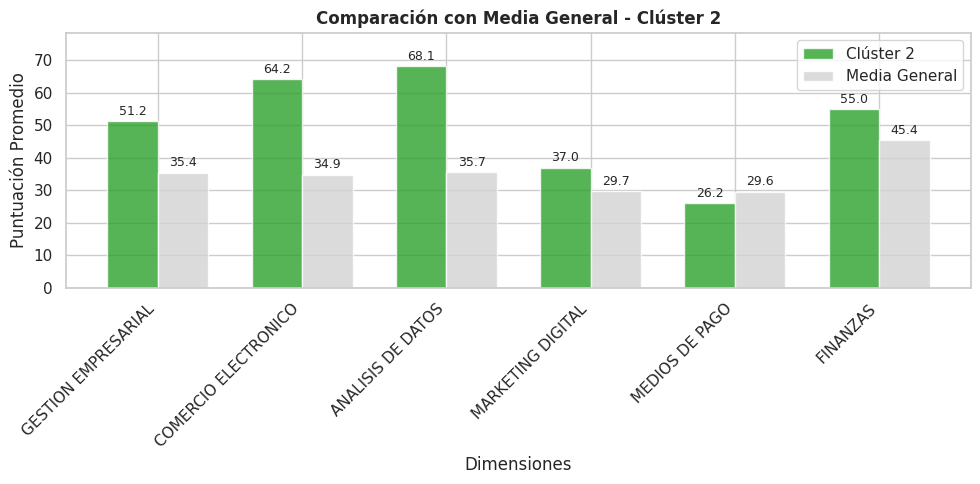


📊 COMPARACIÓN CON MEDIA GENERAL - CLÚSTER 2
--------------------------------------------------

GESTION EMPRESARIAL:
  • Clúster 2: 51.2
  • Media General: 35.4
  • Diferencia: +15.8 (+44.5%) 🔺 SUPERIOR

COMERCIO ELECTRONICO:
  • Clúster 2: 64.2
  • Media General: 34.9
  • Diferencia: +29.3 (+84.1%) 🔺 SUPERIOR

ANALISIS DE DATOS:
  • Clúster 2: 68.1
  • Media General: 35.7
  • Diferencia: +32.5 (+91.1%) 🔺 SUPERIOR

MARKETING DIGITAL:
  • Clúster 2: 37.0
  • Media General: 29.7
  • Diferencia: +7.3 (+24.5%) 🔺 SUPERIOR

MEDIOS DE PAGO:
  • Clúster 2: 26.2
  • Media General: 29.6
  • Diferencia: -3.4 (-11.6%) ➡️ SIMILAR

FINANZAS:
  • Clúster 2: 55.0
  • Media General: 45.4
  • Diferencia: +9.6 (+21.1%) 🔺 SUPERIOR

### CONTEXTO GEOGRÁFICO DEL CLÚSTER 2


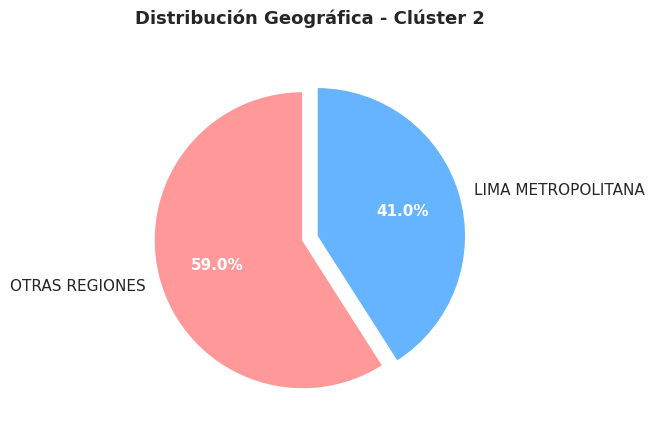


📊 DISTRIBUCIÓN GEOGRÁFICA - CLÚSTER 2
--------------------------------------------------
• OTRAS REGIONES: 1723 MYPEs (59.0%)
• LIMA METROPOLITANA: 1195 MYPEs (41.0%)



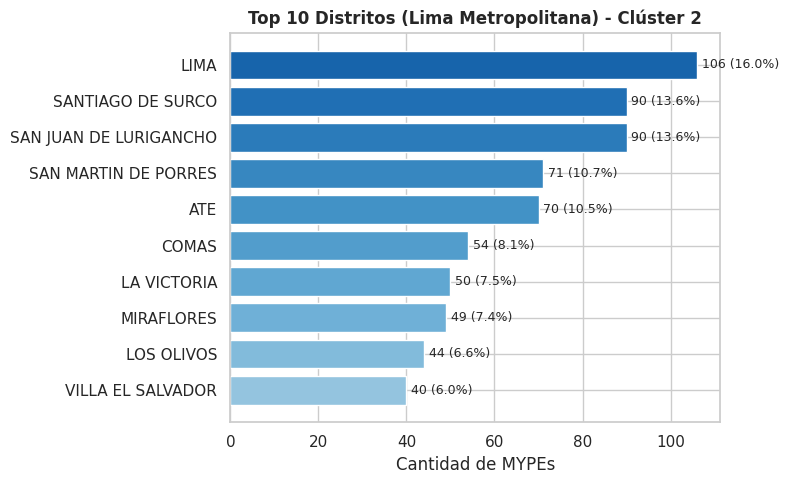


📊 TOP 10 DISTRITOS LIMA METROPOLITANA - CLÚSTER 2
--------------------------------------------------
 1. LIMA: 106 MYPEs (16.0%)
 2. SANTIAGO DE SURCO: 90 MYPEs (13.6%)
 3. SAN JUAN DE LURIGANCHO: 90 MYPEs (13.6%)
 4. SAN MARTIN DE PORRES: 71 MYPEs (10.7%)
 5. ATE: 70 MYPEs (10.5%)
 6. COMAS: 54 MYPEs (8.1%)
 7. LA VICTORIA: 50 MYPEs (7.5%)
 8. MIRAFLORES: 49 MYPEs (7.4%)
 9. LOS OLIVOS: 44 MYPEs (6.6%)
10. VILLA EL SALVADOR: 40 MYPEs (6.0%)



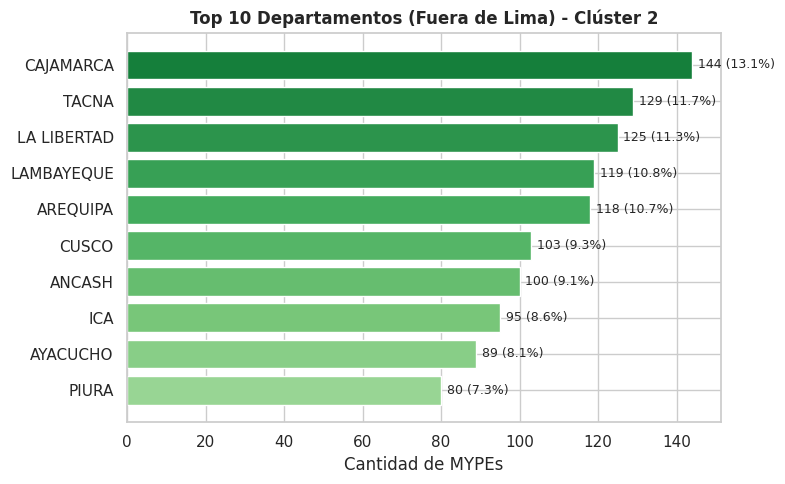


📊 TOP 10 DEPARTAMENTOS (FUERA DE LIMA) - CLÚSTER 2
--------------------------------------------------
 1. CAJAMARCA: 144 MYPEs (13.1%)
 2. TACNA: 129 MYPEs (11.7%)
 3. LA LIBERTAD: 125 MYPEs (11.3%)
 4. LAMBAYEQUE: 119 MYPEs (10.8%)
 5. AREQUIPA: 118 MYPEs (10.7%)
 6. CUSCO: 103 MYPEs (9.3%)
 7. ANCASH: 100 MYPEs (9.1%)
 8. ICA: 95 MYPEs (8.6%)
 9. AYACUCHO: 89 MYPEs (8.1%)
10. PIURA: 80 MYPEs (7.3%)

### CONTEXTO SECTORIAL DEL CLÚSTER 2


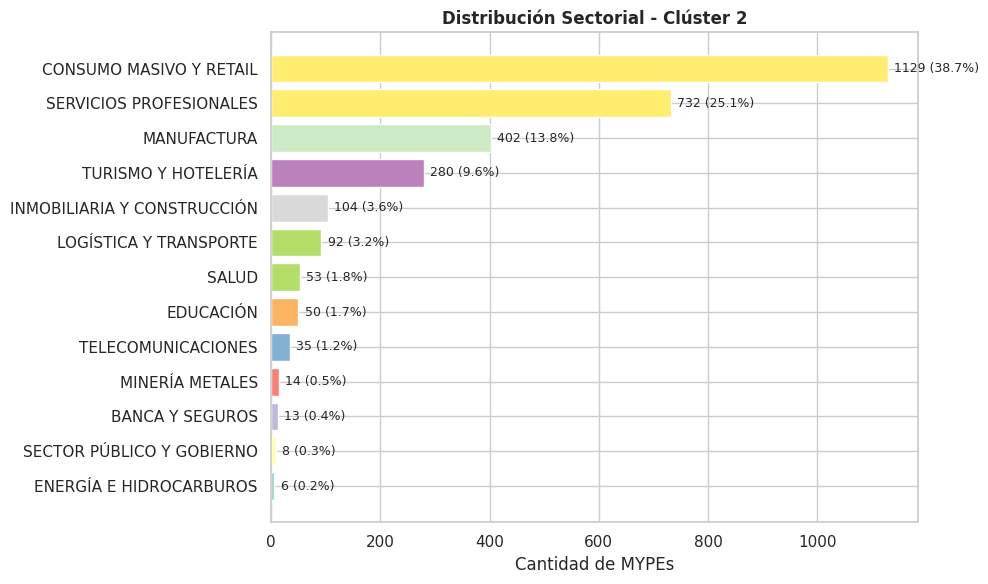


📊 DISTRIBUCIÓN SECTORIAL - CLÚSTER 2
--------------------------------------------------
 1. CONSUMO MASIVO Y RETAIL: 1129 MYPEs (38.7%)
 2. SERVICIOS PROFESIONALES: 732 MYPEs (25.1%)
 3. MANUFACTURA: 402 MYPEs (13.8%)
 4. TURISMO Y HOTELERÍA: 280 MYPEs (9.6%)
 5. INMOBILIARIA Y CONSTRUCCIÓN: 104 MYPEs (3.6%)
 6. LOGÍSTICA Y TRANSPORTE: 92 MYPEs (3.2%)
 7. SALUD: 53 MYPEs (1.8%)
 8. EDUCACIÓN: 50 MYPEs (1.7%)
 9. TELECOMUNICACIONES: 35 MYPEs (1.2%)
10. MINERÍA METALES: 14 MYPEs (0.5%)
11. BANCA Y SEGUROS: 13 MYPEs (0.4%)
12. SECTOR PÚBLICO Y GOBIERNO: 8 MYPEs (0.3%)
13. ENERGÍA E HIDROCARBUROS: 6 MYPEs (0.2%)

### NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 2


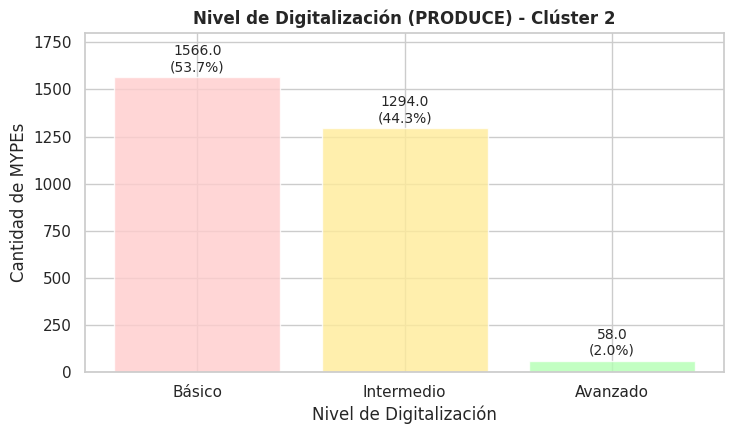


📊 NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 2
--------------------------------------------------
• Básico: 1566.0 MYPEs (53.7%)
• Intermedio: 1294.0 MYPEs (44.3%)
• Avanzado: 58.0 MYPEs (2.0%)

****************************************************************************************************
FIN ANÁLISIS CLÚSTER 2
****************************************************************************************************


ANÁLISIS DETALLADO DEL CLÚSTER 3
Cantidad de MYPEs: 4255 (30.55%)

### PERFIL DIGITAL DEL CLÚSTER


GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
count              4255.00               4255.00            4255.00   
mean                 17.19                  7.91               8.40   
std                  11.45                  9.93              12.33   
min                   0.00                  0.00               0.00   
25%                   8.33                  0.00               0.00   
50%                  16.67                  0.00               0.00   
75%                  21.00                 12.50              25.00   
max                  79.17                 50.00              50.00   

       MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
count            4255.00         4255.00   4255.00  
mean               15.27           23.02     33.71  
std                11.76           15.25     18.05  
min                 0.00            0.00      6.00  
25%                 5.00           25.00     25.00  
50%                15.00           25.00     31.25  
75%                22.00           25.00     50.00  
max                83.00          100.00    100.00



### ESTADÍSTICAS ADICIONALES
--------------------------------------------------

GESTION EMPRESARIAL:
  • Media: 17.19
  • Mediana: 16.67
  • Moda: 16.67
  • Desv. Estándar: 11.45
  • Coef. Variación: 66.6%

COMERCIO ELECTRONICO:
  • Media: 7.91
  • Mediana: 0.00
  • Moda: 0.00
  • Desv. Estándar: 9.93
  • Coef. Variación: 125.4%

ANALISIS DE DATOS:
  • Media: 8.40
  • Mediana: 0.00
  • Moda: 0.00
  • Desv. Estándar: 12.33
  • Coef. Variación: 146.8%

MARKETING DIGITAL:
  • Media: 15.27
  • Mediana: 15.00
  • Moda: 15.00
  • Desv. Estándar: 11.76
  • Coef. Variación: 77.0%

MEDIOS DE PAGO:
  • Media: 23.02
  • Mediana: 25.00
  • Moda: 25.00
  • Desv. Estándar: 15.25
  • Coef. Variación: 66.2%

FINANZAS:
  • Media: 33.71
  • Mediana: 31.25
  • Moda: 25.00
  • Desv. Estándar: 18.05
  • Coef. Variación: 53.6%



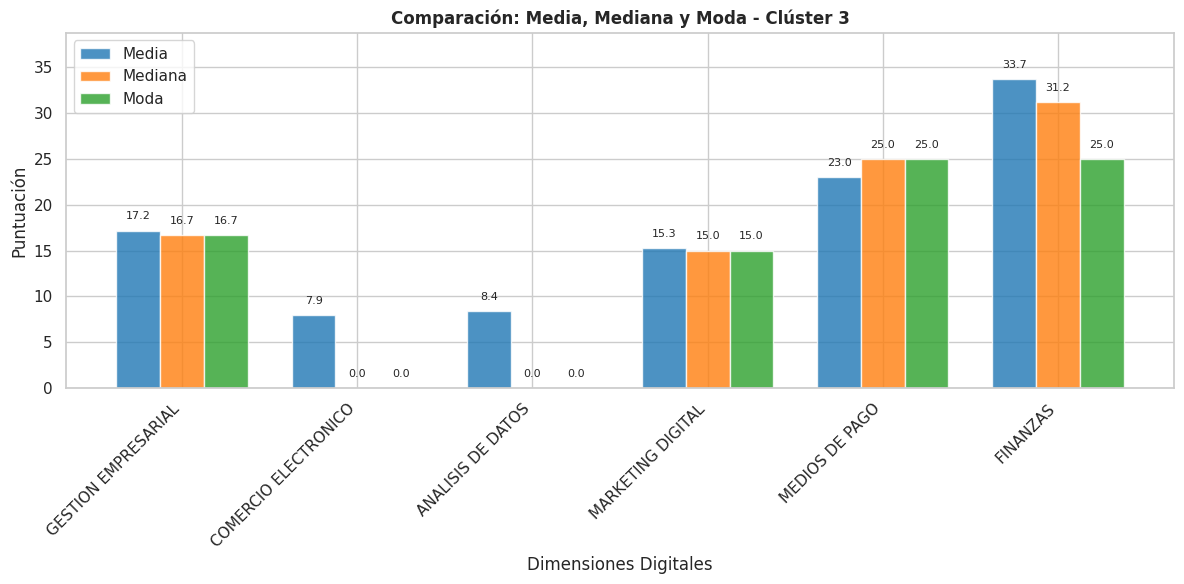


📊 ANÁLISIS DE TENDENCIA CENTRAL - CLÚSTER 3
--------------------------------------------------

GESTION EMPRESARIAL ⚖️:
  • Media: 17.19
  • Mediana: 16.67
  • Moda: 16.67
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~17.2)

COMERCIO ELECTRONICO 📈:
  • Media: 7.91
  • Mediana: 0.00
  • Moda: 0.00
  • Distribución: ASIMÉTRICA POSITIVA (cola derecha)
  • Valor más representativo: Mediana/Moda (~0.0)

ANALISIS DE DATOS 📈:
  • Media: 8.40
  • Mediana: 0.00
  • Moda: 0.00
  • Distribución: ASIMÉTRICA POSITIVA (cola derecha)
  • Valor más representativo: Mediana/Moda (~0.0)

MARKETING DIGITAL ⚖️:
  • Media: 15.27
  • Mediana: 15.00
  • Moda: 15.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~15.3)

MEDIOS DE PAGO ⚖️:
  • Media: 23.02
  • Mediana: 25.00
  • Moda: 25.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~23.0)

FINANZAS 📈:
  • Media: 33.71
  • Mediana: 31.25
  • Moda: 25.00
  • Distribución: ASIMÉTRICA POSI

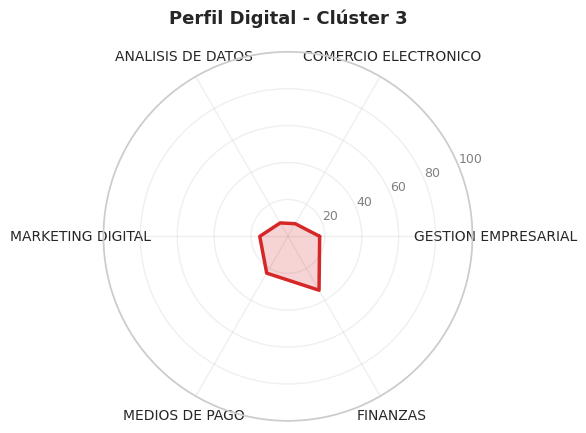


📊 DESCRIPCIÓN DEL GRÁFICO DE RADAR - CLÚSTER 3
--------------------------------------------------
Valores por dimensión:
• GESTION EMPRESARIAL: 17.2/100
• COMERCIO ELECTRONICO: 7.9/100
• ANALISIS DE DATOS: 8.4/100
• MARKETING DIGITAL: 15.3/100
• MEDIOS DE PAGO: 23.0/100
• FINANZAS: 33.7/100

INTERPRETACIÓN:
• Dimensión más fuerte: FINANZAS (33.7/100)
• Dimensión más débil: COMERCIO ELECTRONICO (7.9/100)
• Promedio general del clúster: 17.6/100



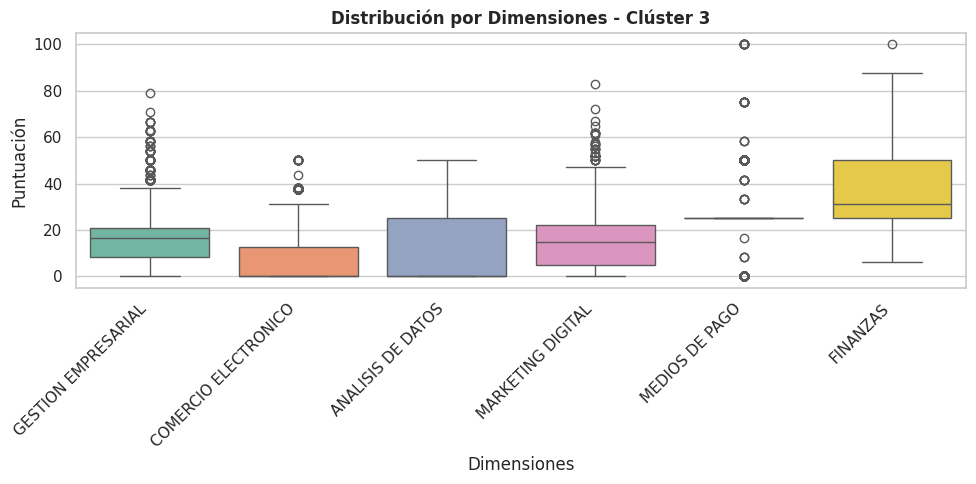


📊 DESCRIPCIÓN DEL BOXPLOT - CLÚSTER 3
--------------------------------------------------
Estadísticas por dimensión:

GESTION EMPRESARIAL:
  • Q1 (25%): 8.3
  • Mediana (50%): 16.7
  • Q3 (75%): 21.0
  • Rango intercuartílico: 12.7

COMERCIO ELECTRONICO:
  • Q1 (25%): 0.0
  • Mediana (50%): 0.0
  • Q3 (75%): 12.5
  • Rango intercuartílico: 12.5

ANALISIS DE DATOS:
  • Q1 (25%): 0.0
  • Mediana (50%): 0.0
  • Q3 (75%): 25.0
  • Rango intercuartílico: 25.0

MARKETING DIGITAL:
  • Q1 (25%): 5.0
  • Mediana (50%): 15.0
  • Q3 (75%): 22.0
  • Rango intercuartílico: 17.0

MEDIOS DE PAGO:
  • Q1 (25%): 25.0
  • Mediana (50%): 25.0
  • Q3 (75%): 25.0
  • Rango intercuartílico: 0.0

FINANZAS:
  • Q1 (25%): 25.0
  • Mediana (50%): 31.2
  • Q3 (75%): 50.0
  • Rango intercuartílico: 25.0



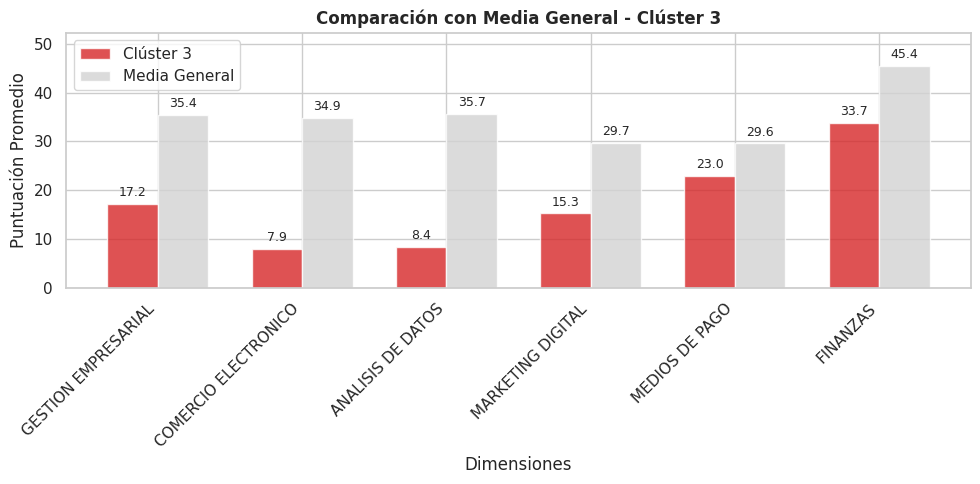


📊 COMPARACIÓN CON MEDIA GENERAL - CLÚSTER 3
--------------------------------------------------

GESTION EMPRESARIAL:
  • Clúster 3: 17.2
  • Media General: 35.4
  • Diferencia: -18.2 (-51.5%) 🔻 INFERIOR

COMERCIO ELECTRONICO:
  • Clúster 3: 7.9
  • Media General: 34.9
  • Diferencia: -26.9 (-77.3%) 🔻 INFERIOR

ANALISIS DE DATOS:
  • Clúster 3: 8.4
  • Media General: 35.7
  • Diferencia: -27.3 (-76.4%) 🔻 INFERIOR

MARKETING DIGITAL:
  • Clúster 3: 15.3
  • Media General: 29.7
  • Diferencia: -14.5 (-48.6%) 🔻 INFERIOR

MEDIOS DE PAGO:
  • Clúster 3: 23.0
  • Media General: 29.6
  • Diferencia: -6.6 (-22.2%) 🔻 INFERIOR

FINANZAS:
  • Clúster 3: 33.7
  • Media General: 45.4
  • Diferencia: -11.7 (-25.8%) 🔻 INFERIOR

### CONTEXTO GEOGRÁFICO DEL CLÚSTER 3


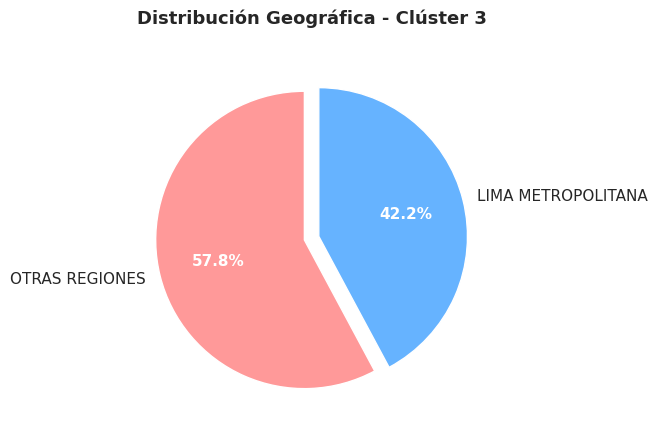


📊 DISTRIBUCIÓN GEOGRÁFICA - CLÚSTER 3
--------------------------------------------------
• OTRAS REGIONES: 2461 MYPEs (57.8%)
• LIMA METROPOLITANA: 1794 MYPEs (42.2%)



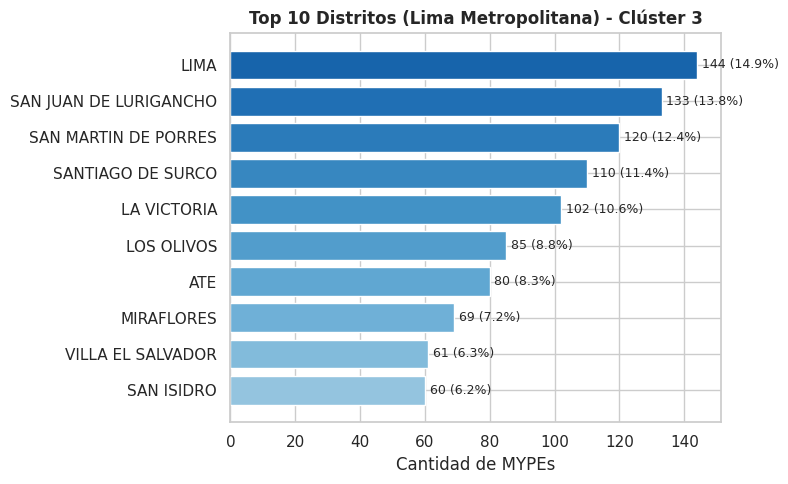


📊 TOP 10 DISTRITOS LIMA METROPOLITANA - CLÚSTER 3
--------------------------------------------------
 1. LIMA: 144 MYPEs (14.9%)
 2. SAN JUAN DE LURIGANCHO: 133 MYPEs (13.8%)
 3. SAN MARTIN DE PORRES: 120 MYPEs (12.4%)
 4. SANTIAGO DE SURCO: 110 MYPEs (11.4%)
 5. LA VICTORIA: 102 MYPEs (10.6%)
 6. LOS OLIVOS: 85 MYPEs (8.8%)
 7. ATE: 80 MYPEs (8.3%)
 8. MIRAFLORES: 69 MYPEs (7.2%)
 9. VILLA EL SALVADOR: 61 MYPEs (6.3%)
10. SAN ISIDRO: 60 MYPEs (6.2%)



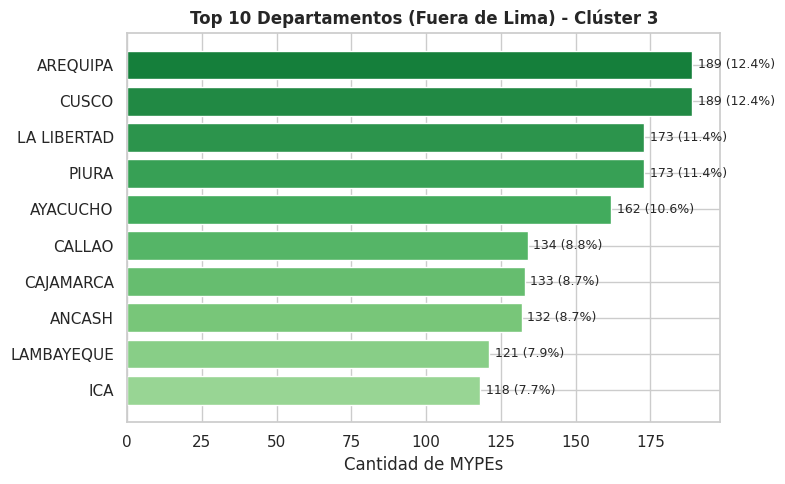


📊 TOP 10 DEPARTAMENTOS (FUERA DE LIMA) - CLÚSTER 3
--------------------------------------------------
 1. AREQUIPA: 189 MYPEs (12.4%)
 2. CUSCO: 189 MYPEs (12.4%)
 3. LA LIBERTAD: 173 MYPEs (11.4%)
 4. PIURA: 173 MYPEs (11.4%)
 5. AYACUCHO: 162 MYPEs (10.6%)
 6. CALLAO: 134 MYPEs (8.8%)
 7. CAJAMARCA: 133 MYPEs (8.7%)
 8. ANCASH: 132 MYPEs (8.7%)
 9. LAMBAYEQUE: 121 MYPEs (7.9%)
10. ICA: 118 MYPEs (7.7%)

### CONTEXTO SECTORIAL DEL CLÚSTER 3


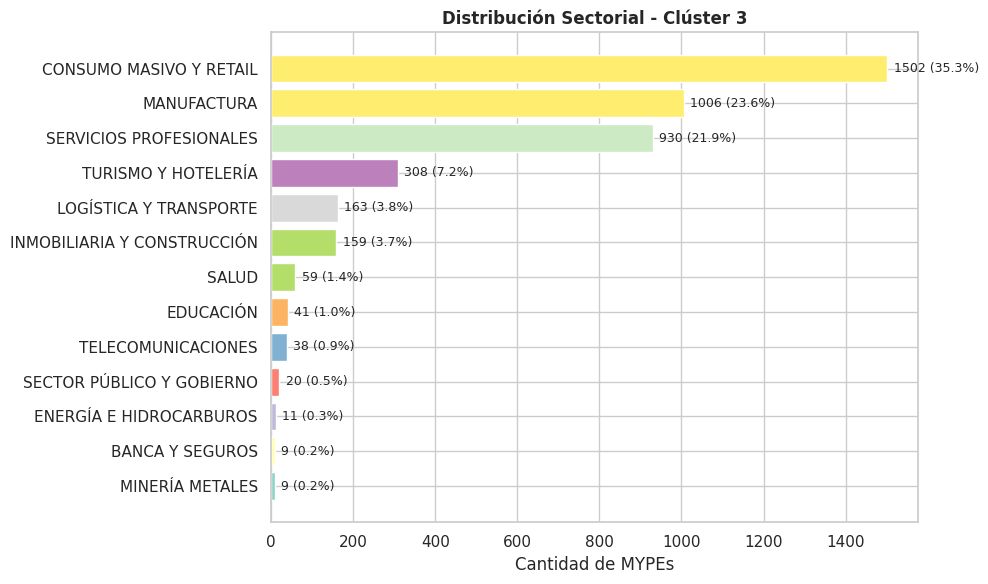


📊 DISTRIBUCIÓN SECTORIAL - CLÚSTER 3
--------------------------------------------------
 1. CONSUMO MASIVO Y RETAIL: 1502 MYPEs (35.3%)
 2. MANUFACTURA: 1006 MYPEs (23.6%)
 3. SERVICIOS PROFESIONALES: 930 MYPEs (21.9%)
 4. TURISMO Y HOTELERÍA: 308 MYPEs (7.2%)
 5. LOGÍSTICA Y TRANSPORTE: 163 MYPEs (3.8%)
 6. INMOBILIARIA Y CONSTRUCCIÓN: 159 MYPEs (3.7%)
 7. SALUD: 59 MYPEs (1.4%)
 8. EDUCACIÓN: 41 MYPEs (1.0%)
 9. TELECOMUNICACIONES: 38 MYPEs (0.9%)
10. SECTOR PÚBLICO Y GOBIERNO: 20 MYPEs (0.5%)
11. ENERGÍA E HIDROCARBUROS: 11 MYPEs (0.3%)
12. BANCA Y SEGUROS: 9 MYPEs (0.2%)
13. MINERÍA METALES: 9 MYPEs (0.2%)

### NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 3


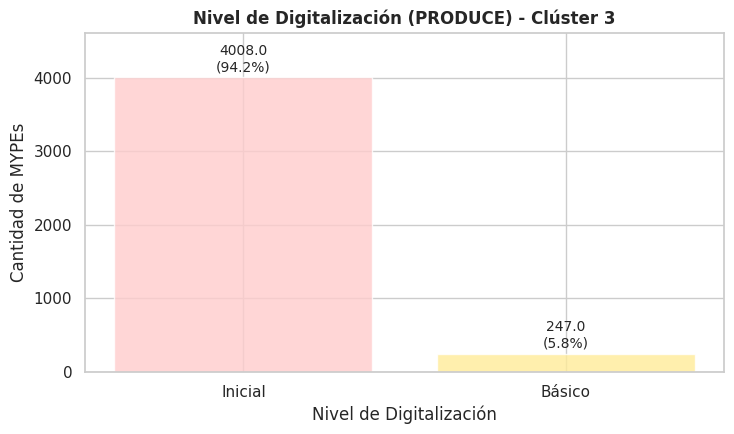


📊 NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 3
--------------------------------------------------
• Inicial: 4008.0 MYPEs (94.2%)
• Básico: 247.0 MYPEs (5.8%)

****************************************************************************************************
FIN ANÁLISIS CLÚSTER 3
****************************************************************************************************


ANÁLISIS DETALLADO DEL CLÚSTER 4
Cantidad de MYPEs: 3272 (23.49%)

### PERFIL DIGITAL DEL CLÚSTER


GESTION_EMPRESARIAL  COMERCIO_ELECTRONICO  ANALISIS_DE_DATOS  \
count              3272.00               3272.00            3272.00   
mean                 40.99                 16.40              51.60   
std                  16.41                 12.99              18.99   
min                   0.00                  0.00               0.00   
25%                  29.17                 12.00              50.00   
50%                  41.67                 12.50              50.00   
75%                  50.00                 25.00              50.00   
max                 100.00                 43.75             100.00   

       MARKETING_DIGITAL  MEDIOS_DE_PAGO  FINANZAS  
count            3272.00         3272.00   3272.00  
mean               32.95           26.70     51.36  
std                13.90           15.22     19.11  
min                 0.00            0.00      6.00  
25%                25.00           25.00     37.50  
50%                32.00           25.00     56.25  
75%                42.00           25.00     62.50  
max               100.00          100.00    100.00



### ESTADÍSTICAS ADICIONALES
--------------------------------------------------

GESTION EMPRESARIAL:
  • Media: 40.99
  • Mediana: 41.67
  • Moda: 41.67
  • Desv. Estándar: 16.41
  • Coef. Variación: 40.0%

COMERCIO ELECTRONICO:
  • Media: 16.40
  • Mediana: 12.50
  • Moda: 12.50
  • Desv. Estándar: 12.99
  • Coef. Variación: 79.2%

ANALISIS DE DATOS:
  • Media: 51.60
  • Mediana: 50.00
  • Moda: 50.00
  • Desv. Estándar: 18.99
  • Coef. Variación: 36.8%

MARKETING DIGITAL:
  • Media: 32.95
  • Mediana: 32.00
  • Moda: 27.00
  • Desv. Estándar: 13.90
  • Coef. Variación: 42.2%

MEDIOS DE PAGO:
  • Media: 26.70
  • Mediana: 25.00
  • Moda: 25.00
  • Desv. Estándar: 15.22
  • Coef. Variación: 57.0%

FINANZAS:
  • Media: 51.36
  • Mediana: 56.25
  • Moda: 56.25
  • Desv. Estándar: 19.11
  • Coef. Variación: 37.2%



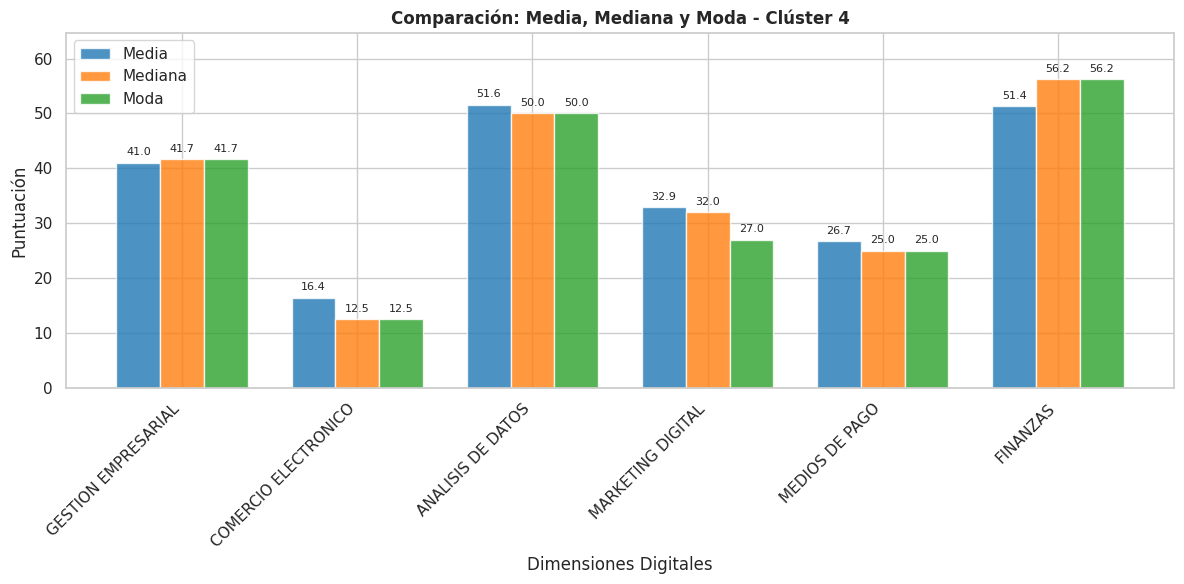


📊 ANÁLISIS DE TENDENCIA CENTRAL - CLÚSTER 4
--------------------------------------------------

GESTION EMPRESARIAL ⚖️:
  • Media: 40.99
  • Mediana: 41.67
  • Moda: 41.67
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~41.0)

COMERCIO ELECTRONICO 📈:
  • Media: 16.40
  • Mediana: 12.50
  • Moda: 12.50
  • Distribución: ASIMÉTRICA POSITIVA (cola derecha)
  • Valor más representativo: Mediana/Moda (~12.5)

ANALISIS DE DATOS ⚖️:
  • Media: 51.60
  • Mediana: 50.00
  • Moda: 50.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~51.6)

MARKETING DIGITAL ⚖️:
  • Media: 32.95
  • Mediana: 32.00
  • Moda: 27.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Media (32.9)

MEDIOS DE PAGO ⚖️:
  • Media: 26.70
  • Mediana: 25.00
  • Moda: 25.00
  • Distribución: SIMÉTRICA
  • Valor más representativo: Cualquiera (~26.7)

FINANZAS 📉:
  • Media: 51.36
  • Mediana: 56.25
  • Moda: 56.25
  • Distribución: ASIMÉTRICA NEGATIVA (cola izquierda)
  

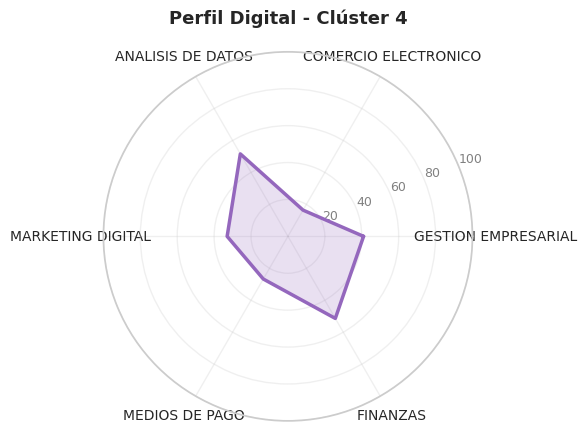


📊 DESCRIPCIÓN DEL GRÁFICO DE RADAR - CLÚSTER 4
--------------------------------------------------
Valores por dimensión:
• GESTION EMPRESARIAL: 41.0/100
• COMERCIO ELECTRONICO: 16.4/100
• ANALISIS DE DATOS: 51.6/100
• MARKETING DIGITAL: 32.9/100
• MEDIOS DE PAGO: 26.7/100
• FINANZAS: 51.4/100

INTERPRETACIÓN:
• Dimensión más fuerte: ANALISIS DE DATOS (51.6/100)
• Dimensión más débil: COMERCIO ELECTRONICO (16.4/100)
• Promedio general del clúster: 36.7/100



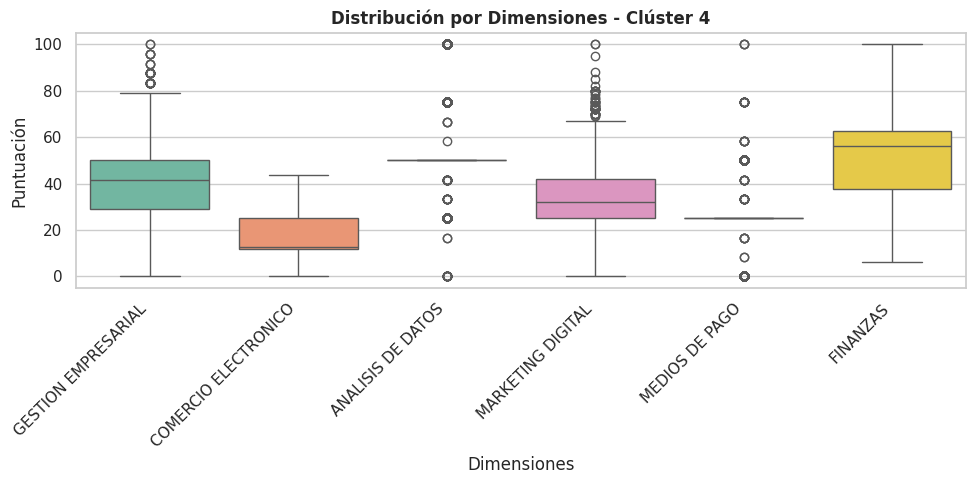


📊 DESCRIPCIÓN DEL BOXPLOT - CLÚSTER 4
--------------------------------------------------
Estadísticas por dimensión:

GESTION EMPRESARIAL:
  • Q1 (25%): 29.2
  • Mediana (50%): 41.7
  • Q3 (75%): 50.0
  • Rango intercuartílico: 20.8

COMERCIO ELECTRONICO:
  • Q1 (25%): 12.0
  • Mediana (50%): 12.5
  • Q3 (75%): 25.0
  • Rango intercuartílico: 13.0

ANALISIS DE DATOS:
  • Q1 (25%): 50.0
  • Mediana (50%): 50.0
  • Q3 (75%): 50.0
  • Rango intercuartílico: 0.0

MARKETING DIGITAL:
  • Q1 (25%): 25.0
  • Mediana (50%): 32.0
  • Q3 (75%): 42.0
  • Rango intercuartílico: 17.0

MEDIOS DE PAGO:
  • Q1 (25%): 25.0
  • Mediana (50%): 25.0
  • Q3 (75%): 25.0
  • Rango intercuartílico: 0.0

FINANZAS:
  • Q1 (25%): 37.5
  • Mediana (50%): 56.2
  • Q3 (75%): 62.5
  • Rango intercuartílico: 25.0



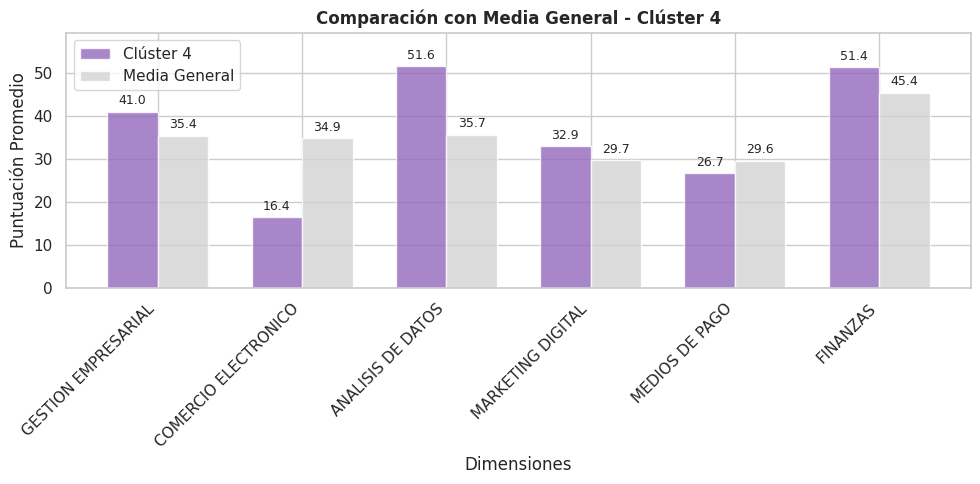


📊 COMPARACIÓN CON MEDIA GENERAL - CLÚSTER 4
--------------------------------------------------

GESTION EMPRESARIAL:
  • Clúster 4: 41.0
  • Media General: 35.4
  • Diferencia: +5.6 (+15.8%) 🔺 SUPERIOR

COMERCIO ELECTRONICO:
  • Clúster 4: 16.4
  • Media General: 34.9
  • Diferencia: -18.4 (-52.9%) 🔻 INFERIOR

ANALISIS DE DATOS:
  • Clúster 4: 51.6
  • Media General: 35.7
  • Diferencia: +16.0 (+44.7%) 🔺 SUPERIOR

MARKETING DIGITAL:
  • Clúster 4: 32.9
  • Media General: 29.7
  • Diferencia: +3.2 (+10.9%) ➡️ SIMILAR

MEDIOS DE PAGO:
  • Clúster 4: 26.7
  • Media General: 29.6
  • Diferencia: -2.9 (-9.8%) ➡️ SIMILAR

FINANZAS:
  • Clúster 4: 51.4
  • Media General: 45.4
  • Diferencia: +5.9 (+13.1%) 🔺 SUPERIOR

### CONTEXTO GEOGRÁFICO DEL CLÚSTER 4


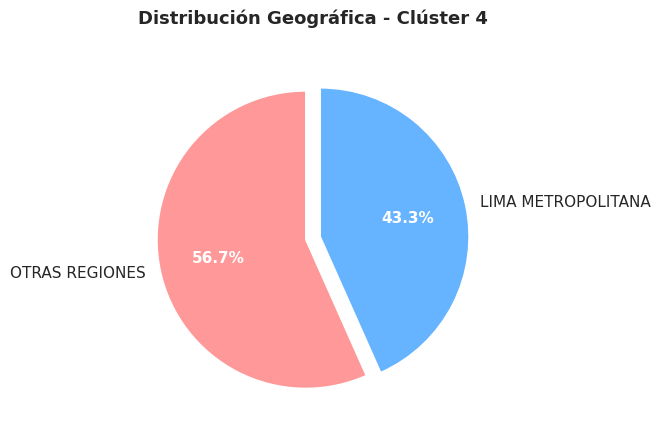


📊 DISTRIBUCIÓN GEOGRÁFICA - CLÚSTER 4
--------------------------------------------------
• OTRAS REGIONES: 1854 MYPEs (56.7%)
• LIMA METROPOLITANA: 1418 MYPEs (43.3%)



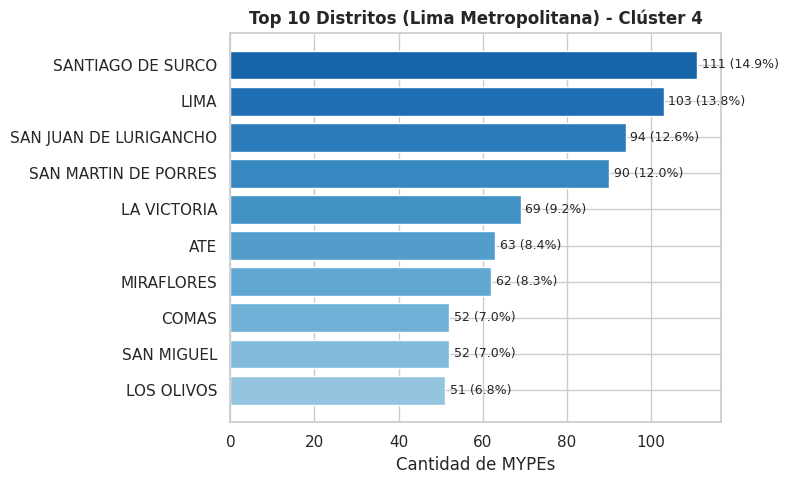


📊 TOP 10 DISTRITOS LIMA METROPOLITANA - CLÚSTER 4
--------------------------------------------------
 1. SANTIAGO DE SURCO: 111 MYPEs (14.9%)
 2. LIMA: 103 MYPEs (13.8%)
 3. SAN JUAN DE LURIGANCHO: 94 MYPEs (12.6%)
 4. SAN MARTIN DE PORRES: 90 MYPEs (12.0%)
 5. LA VICTORIA: 69 MYPEs (9.2%)
 6. ATE: 63 MYPEs (8.4%)
 7. MIRAFLORES: 62 MYPEs (8.3%)
 8. COMAS: 52 MYPEs (7.0%)
 9. SAN MIGUEL: 52 MYPEs (7.0%)
10. LOS OLIVOS: 51 MYPEs (6.8%)



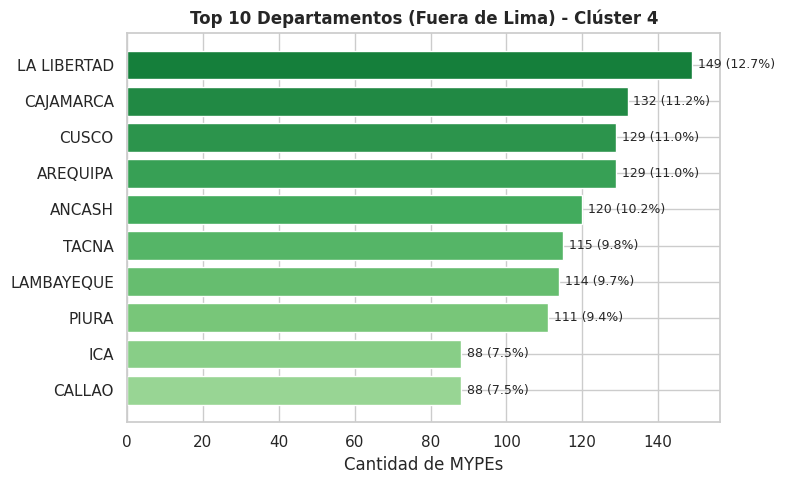


📊 TOP 10 DEPARTAMENTOS (FUERA DE LIMA) - CLÚSTER 4
--------------------------------------------------
 1. LA LIBERTAD: 149 MYPEs (12.7%)
 2. CAJAMARCA: 132 MYPEs (11.2%)
 3. CUSCO: 129 MYPEs (11.0%)
 4. AREQUIPA: 129 MYPEs (11.0%)
 5. ANCASH: 120 MYPEs (10.2%)
 6. TACNA: 115 MYPEs (9.8%)
 7. LAMBAYEQUE: 114 MYPEs (9.7%)
 8. PIURA: 111 MYPEs (9.4%)
 9. ICA: 88 MYPEs (7.5%)
10. CALLAO: 88 MYPEs (7.5%)

### CONTEXTO SECTORIAL DEL CLÚSTER 4


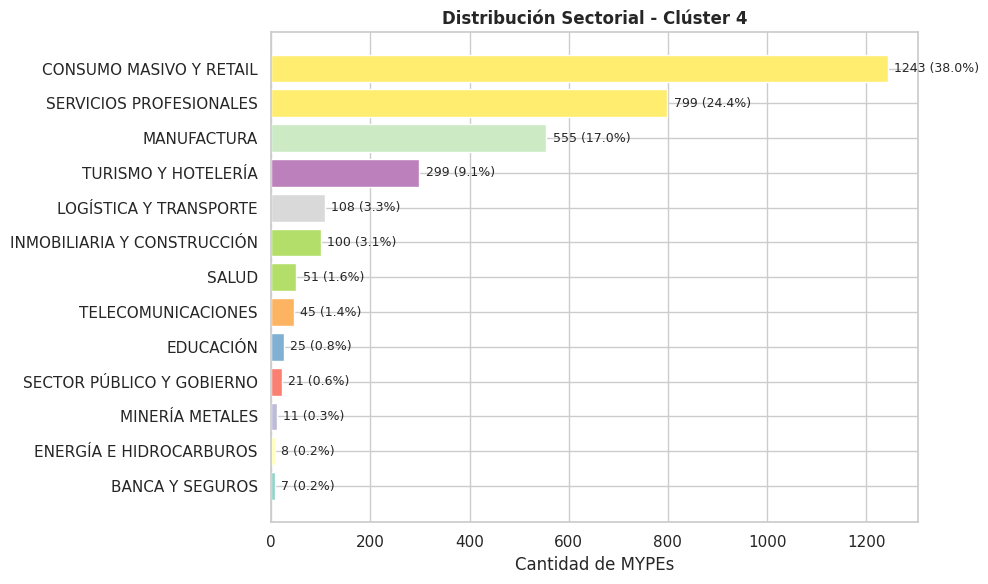


📊 DISTRIBUCIÓN SECTORIAL - CLÚSTER 4
--------------------------------------------------
 1. CONSUMO MASIVO Y RETAIL: 1243 MYPEs (38.0%)
 2. SERVICIOS PROFESIONALES: 799 MYPEs (24.4%)
 3. MANUFACTURA: 555 MYPEs (17.0%)
 4. TURISMO Y HOTELERÍA: 299 MYPEs (9.1%)
 5. LOGÍSTICA Y TRANSPORTE: 108 MYPEs (3.3%)
 6. INMOBILIARIA Y CONSTRUCCIÓN: 100 MYPEs (3.1%)
 7. SALUD: 51 MYPEs (1.6%)
 8. TELECOMUNICACIONES: 45 MYPEs (1.4%)
 9. EDUCACIÓN: 25 MYPEs (0.8%)
10. SECTOR PÚBLICO Y GOBIERNO: 21 MYPEs (0.6%)
11. MINERÍA METALES: 11 MYPEs (0.3%)
12. ENERGÍA E HIDROCARBUROS: 8 MYPEs (0.2%)
13. BANCA Y SEGUROS: 7 MYPEs (0.2%)

### NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 4


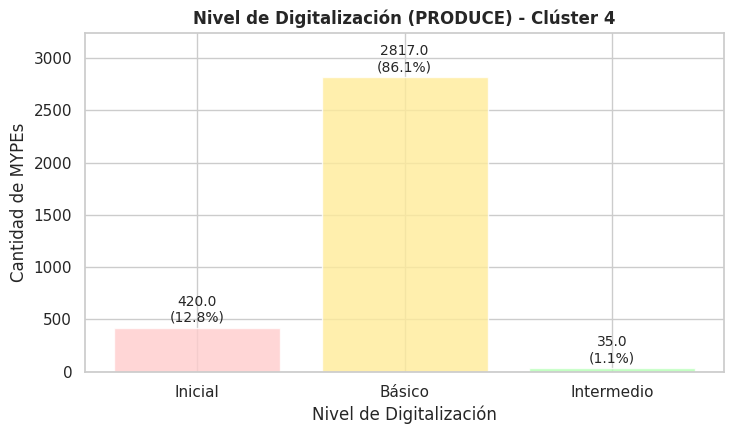


📊 NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER 4
--------------------------------------------------
• Inicial: 420.0 MYPEs (12.8%)
• Básico: 2817.0 MYPEs (86.1%)
• Intermedio: 35.0 MYPEs (1.1%)

****************************************************************************************************
FIN ANÁLISIS CLÚSTER 4
****************************************************************************************************




In [69]:
from scipy.stats import iqr, mode
# Variables de las seis dimensiones de digitalización
digital_dimensions = ['GESTION_EMPRESARIAL', 'COMERCIO_ELECTRONICO', 'ANALISIS_DE_DATOS','MARKETING_DIGITAL', 'MEDIOS_DE_PAGO', 'FINANZAS']
# Paleta de colores profesional para los clusteres
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# Función auxiliar para calcular la moda de forma segura
def calculate_mode(series):
    """Calculo de la moda de una serie, manejando casos especiales"""
    try:
        mode_result = mode(series, keepdims=True)
        if len(mode_result.mode) > 0:
            return mode_result.mode[0]
        else:
            return series.median()
    except:
        return series.median()
# Bucle principal para analizar cada clúster
for cluster_id in range(5):
    cluster_df = df_cluster[df_cluster['CLUSTER'] == cluster_id].copy()
    if cluster_df.empty:
        print(f"\nClúster {cluster_id} está vacío, saltando análisis.")
        continue
    print(f"{'='*60}" + f"\nANÁLISIS DETALLADO DEL CLÚSTER {cluster_id}" + f"\n{'='*60}")
    print(f"Cantidad de MYPEs: {len(cluster_df)} ({len(cluster_df)/len(df_cluster)*100:.2f}%)")
    # 1. PERFIL DIGITAL DEL CLÚSTER
    # ********************************************************************************
    print("\n### PERFIL DIGITAL DEL CLÚSTER\n" + "=" * 80)
    cluster_stats = cluster_df[digital_dimensions].describe()
    display(cluster_stats.round(2))
    print()
    # --- ESTADÍSTICAS ADICIONALES ---
    print("\n### ESTADÍSTICAS ADICIONALES\n" + "-" * 50)
    moda_stats = {}
    for dim in digital_dimensions:
        dim_data = cluster_df[dim]
        moda_val = calculate_mode(dim_data)
        moda_stats[dim] = moda_val
        print(f"\n{dim.replace('_', ' ')}:")
        print(f"  • Media: {dim_data.mean():.2f}")
        print(f"  • Mediana: {dim_data.median():.2f}")
        print(f"  • Moda: {moda_val:.2f}")
        print(f"  • Desv. Estándar: {dim_data.std():.2f}")
        print(f"  • Coef. Variación: {(dim_data.std()/dim_data.mean()*100):.1f}%")
    # --- GRÁFICO COMPARATIVO: MEDIA, MEDIANA Y MODA ---
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(digital_dimensions))
    width = 0.25
    means = [cluster_df[dim].mean() for dim in digital_dimensions]
    medians = [cluster_df[dim].median() for dim in digital_dimensions]
    modes = [moda_stats[dim] for dim in digital_dimensions]
    bars1 = ax.bar(x - width, means, width, label='Media', color='#1f77b4', alpha=0.8)
    bars2 = ax.bar(x, medians, width, label='Mediana', color='#ff7f0e', alpha=0.8)
    bars3 = ax.bar(x + width, modes, width, label='Moda', color='#2ca02c', alpha=0.8)
    # Añadir valores en las barras
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=8)
    ax.set_xlabel('Dimensiones Digitales')
    ax.set_ylabel('Puntuación')
    ax.set_title(f'Comparación: Media, Mediana y Moda - Clúster {cluster_id}', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([dim.replace('_', ' ') for dim in digital_dimensions], rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, max(max(means), max(medians), max(modes)) * 1.15)
    print()
    plt.tight_layout()
    plt.show()
    # --- ANÁLISIS DE TENDENCIA CENTRAL ---
    print(f"\n📊 ANÁLISIS DE TENDENCIA CENTRAL - CLÚSTER {cluster_id}")
    print("-" * 50)
    for dim in digital_dimensions:
        media = cluster_df[dim].mean()
        mediana = cluster_df[dim].median()
        moda = moda_stats[dim]
        # Análisis de simetría basado en la relación media-mediana-moda
        if abs(media - mediana) < 2:
            simetria = "SIMÉTRICA"
            emoji = "⚖️"
        elif media > mediana:
            simetria = "ASIMÉTRICA POSITIVA (cola derecha)"
            emoji = "📈"
        else:
            simetria = "ASIMÉTRICA NEGATIVA (cola izquierda)"
            emoji = "📉"
        print(f"\n{dim.replace('_', ' ')} {emoji}:")
        print(f"  • Media: {media:.2f}")
        print(f"  • Mediana: {mediana:.2f}")
        print(f"  • Moda: {moda:.2f}")
        print(f"  • Distribución: {simetria}")
        # Identificar valor más representativo
        valores = {'Media': media, 'Mediana': mediana, 'Moda': moda}
        if abs(media - mediana) < 2 and abs(media - moda) < 2:
            print(f"  • Valor más representativo: Cualquiera (~{media:.1f})")
        elif abs(mediana - moda) < abs(media - mediana):
            print(f"  • Valor más representativo: Mediana/Moda (~{mediana:.1f})")
        else:
            print(f"  • Valor más representativo: Media ({media:.1f})")
    # --- Gráfico de Radar ---
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    categories = [dim.replace('_', ' ') for dim in digital_dimensions]
    values = cluster_df[digital_dimensions].mean().values.tolist()
    values += values[:1]
    angles = [n / float(len(digital_dimensions)) * 2 * np.pi for n in range(len(digital_dimensions))]
    angles += angles[:1]
    # Línea principal
    ax.plot(angles, values, color=cluster_colors[cluster_id], linewidth=2.5,
            linestyle='solid', label=f'Clúster {cluster_id}')
    ax.fill(angles, values, color=cluster_colors[cluster_id], alpha=0.2)
    # Configuración del radar
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_ylim(0, 100)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels(['20', '40', '60', '80', '100'], color="gray", size=9)
    ax.grid(True, alpha=0.3)
    print()
    plt.title(f'Perfil Digital - Clúster {cluster_id}', pad=20, fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()
    # === DESCRIPCIÓN TEXTUAL DEL RADAR ===
    print(f"\n📊 DESCRIPCIÓN DEL GRÁFICO DE RADAR - CLÚSTER {cluster_id}")
    print("-" * 50)
    print("Valores por dimensión:")
    for dim, val in zip(digital_dimensions, cluster_df[digital_dimensions].mean().values):
        print(f"• {dim.replace('_', ' ')}: {val:.1f}/100")
    strongest_dim = cluster_df[digital_dimensions].mean().idxmax()
    weakest_dim = cluster_df[digital_dimensions].mean().idxmin()
    print(f"\nINTERPRETACIÓN:")
    print(f"• Dimensión más fuerte: {strongest_dim.replace('_', ' ')} ({cluster_df[digital_dimensions].mean()[strongest_dim]:.1f}/100)")
    print(f"• Dimensión más débil: {weakest_dim.replace('_', ' ')} ({cluster_df[digital_dimensions].mean()[weakest_dim]:.1f}/100)")
    print(f"• Promedio general del clúster: {cluster_df[digital_dimensions].mean().mean():.1f}/100\n")
    # --- Boxplots ---
    fig, ax = plt.subplots(figsize=(10, 5))
    # Preparar datos para boxplot
    box_data = [cluster_df[dim].values for dim in digital_dimensions]
    box_labels = [dim.replace('_', ' ') for dim in digital_dimensions]
    # Crear boxplot con seaborn para mejor estética
    melted_data = pd.melt(cluster_df[digital_dimensions])
    melted_data['variable'] = melted_data['variable'].str.replace('_', ' ')
    sns.boxplot(data=melted_data, x='variable', y='value',
                palette='Set2', ax=ax)
    ax.set_title(f'Distribución por Dimensiones - Clúster {cluster_id}', fontweight='bold')
    ax.set_ylabel('Puntuación')
    ax.set_xlabel('Dimensiones')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # === DESCRIPCIÓN TEXTUAL DEL BOXPLOT ===
    print(f"\n📊 DESCRIPCIÓN DEL BOXPLOT - CLÚSTER {cluster_id}")
    print("-" * 50)
    print("Estadísticas por dimensión:")
    for dim in digital_dimensions:
        q1 = cluster_df[dim].quantile(0.25)
        median = cluster_df[dim].median()
        q3 = cluster_df[dim].quantile(0.75)
        print(f"\n{dim.replace('_', ' ')}:")
        print(f"  • Q1 (25%): {q1:.1f}")
        print(f"  • Mediana (50%): {median:.1f}")
        print(f"  • Q3 (75%): {q3:.1f}")
        print(f"  • Rango intercuartílico: {q3-q1:.1f}")
    print()
    # --- Comparación con Media General ---
    general_means = df_cluster[digital_dimensions].mean()
    cluster_means = cluster_df[digital_dimensions].mean()
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(digital_dimensions))
    width = 0.35
    bars1 = ax.bar(x - width/2, cluster_means, width, label=f'Clúster {cluster_id}',
                   color=cluster_colors[cluster_id], alpha=0.8)
    bars2 = ax.bar(x + width/2, general_means, width, label='Media General',
                   color='lightgray', alpha=0.8)
    # Añadir valores en las barras
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    ax.set_xlabel('Dimensiones')
    ax.set_ylabel('Puntuación Promedio')
    ax.set_title(f'Comparación con Media General - Clúster {cluster_id}', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([dim.replace('_', ' ') for dim in digital_dimensions], rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, max(max(cluster_means), max(general_means)) * 1.15)
    plt.tight_layout()
    plt.show()
    # === DESCRIPCIÓN TEXTUAL DE LA COMPARACIÓN ===
    print(f"\n📊 COMPARACIÓN CON MEDIA GENERAL - CLÚSTER {cluster_id}")
    print("-" * 50)
    for dim in digital_dimensions:
        cluster_val = cluster_means[dim]
        general_val = general_means[dim]
        diff = cluster_val - general_val
        diff_perc = (diff / general_val) * 100 if general_val != 0 else 0
        status = "🔺 SUPERIOR" if diff > 5 else "🔻 INFERIOR" if diff < -5 else "➡️ SIMILAR"
        print(f"\n{dim.replace('_', ' ')}:")
        print(f"  • Clúster {cluster_id}: {cluster_val:.1f}")
        print(f"  • Media General: {general_val:.1f}")
        print(f"  • Diferencia: {diff:+.1f} ({diff_perc:+.1f}%) {status}")
    # 2. CONTEXTO GEOGRÁFICO
    # ********************************************************************************
    print(f"\n### CONTEXTO GEOGRÁFICO DEL CLÚSTER {cluster_id}\n" + "=" * 80)
    lima_vs_demas = cluster_df['UBICACION'].apply(
        lambda x: 'LIMA METROPOLITANA' if x == 'LIMA METROPOLITANA' else 'OTRAS REGIONES').value_counts()
    percentages = (lima_vs_demas / len(cluster_df)) * 100
    # Gráfico de pie
    fig, ax = plt.subplots(figsize=(6, 4.5))
    colors = ['#ff9999', '#66b3ff']
    wedges, texts, autotexts = ax.pie(lima_vs_demas.values,
                                      labels=lima_vs_demas.index,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90,
                                      explode=(0.05, 0.05))
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    ax.set_title(f'Distribución Geográfica - Clúster {cluster_id}', fontsize=13, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    # === DESCRIPCIÓN TEXTUAL GEOGRÁFICA ===
    print(f"\n📊 DISTRIBUCIÓN GEOGRÁFICA - CLÚSTER {cluster_id}")
    print("-" * 50)
    for region, count in lima_vs_demas.items():
        perc = (count / len(cluster_df)) * 100
        print(f"• {region}: {count} MYPEs ({perc:.1f}%)")
    print()
    # Top 10 Distritos de Lima
    df_lima_distritos = cluster_df[cluster_df['UBICACION'] == 'LIMA METROPOLITANA']['DISTRITO'].value_counts().head(10)
    if not df_lima_distritos.empty:
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.barh(range(len(df_lima_distritos)), df_lima_distritos.values[::-1],
                       color=plt.cm.Blues(np.linspace(0.4, 0.8, len(df_lima_distritos))))
        ax.set_yticks(range(len(df_lima_distritos)))
        ax.set_yticklabels(df_lima_distritos.index[::-1])
        ax.set_xlabel('Cantidad de MYPEs')
        ax.set_title(f'Top 10 Distritos (Lima Metropolitana) - Clúster {cluster_id}', fontweight='bold')
        # Añadir valores en las barras
        for i, (bar, value) in enumerate(zip(bars, df_lima_distritos.values[::-1])):
            percentage = (value / df_lima_distritos.sum()) * 100
            ax.text(bar.get_width() + max(df_lima_distritos.values)*0.01, bar.get_y() + bar.get_height()/2,
                    f'{value} ({percentage:.1f}%)', va='center', fontsize=9)
        plt.tight_layout()
        plt.show()
        # Descripción textual distritos Lima
        print(f"\n📊 TOP 10 DISTRITOS LIMA METROPOLITANA - CLÚSTER {cluster_id}")
        print("-" * 50)
        for i, (distrito, count) in enumerate(df_lima_distritos.items(), 1):
            perc = (count / df_lima_distritos.sum()) * 100
            print(f"{i:2d}. {distrito}: {count} MYPEs ({perc:.1f}%)")
        print()
    # Top 10 Otras Regiones
    df_otras_regiones = cluster_df[cluster_df['UBICACION'] != 'LIMA METROPOLITANA']['DEPARTAMENTO'].value_counts().head(10)
    if not df_otras_regiones.empty:
        fig, ax = plt.subplots(figsize=(8, 5))
        bars = ax.barh(range(len(df_otras_regiones)), df_otras_regiones.values[::-1],
                       color=plt.cm.Greens(np.linspace(0.4, 0.8, len(df_otras_regiones))))
        ax.set_yticks(range(len(df_otras_regiones)))
        ax.set_yticklabels(df_otras_regiones.index[::-1])
        ax.set_xlabel('Cantidad de MYPEs')
        ax.set_title(f'Top 10 Departamentos (Fuera de Lima) - Clúster {cluster_id}', fontweight='bold')
        # Añadir valores en las barras
        for i, (bar, value) in enumerate(zip(bars, df_otras_regiones.values[::-1])):
            percentage = (value / df_otras_regiones.sum()) * 100
            ax.text(bar.get_width() + max(df_otras_regiones.values)*0.01, bar.get_y() + bar.get_height()/2,
                    f'{value} ({percentage:.1f}%)', va='center', fontsize=9)
        plt.tight_layout()
        plt.show()
        # Descripción textual otras regiones
        print(f"\n📊 TOP 10 DEPARTAMENTOS (FUERA DE LIMA) - CLÚSTER {cluster_id}")
        print("-" * 50)
        for i, (depto, count) in enumerate(df_otras_regiones.items(), 1):
            perc = (count / df_otras_regiones.sum()) * 100
            print(f"{i:2d}. {depto}: {count} MYPEs ({perc:.1f}%)")
    # 3. CONTEXTO SECTORIAL
    # ********************************************************************************
    print(f"\n### CONTEXTO SECTORIAL DEL CLÚSTER {cluster_id}\n" + "=" * 80)
    sector_counts = cluster_df['CATEGORIA'].value_counts()
    fig, ax = plt.subplots(figsize=(10, max(6, len(sector_counts) * 0.4)))
    bars = ax.barh(range(len(sector_counts)), sector_counts.values[::-1],
                   color=plt.cm.Set3(np.linspace(0, 1, len(sector_counts))))
    ax.set_yticks(range(len(sector_counts)))
    ax.set_yticklabels(sector_counts.index[::-1])
    ax.set_xlabel('Cantidad de MYPEs')
    ax.set_title(f'Distribución Sectorial - Clúster {cluster_id}', fontweight='bold')
    # Añadir valores y porcentajes
    for i, (bar, value) in enumerate(zip(bars, sector_counts.values[::-1])):
        percentage = (value / sector_counts.sum()) * 100
        ax.text(bar.get_width() + max(sector_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
                f'{value} ({percentage:.1f}%)', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()
    # === DESCRIPCIÓN TEXTUAL SECTORIAL ===
    print(f"\n📊 DISTRIBUCIÓN SECTORIAL - CLÚSTER {cluster_id}")
    print("-" * 50)
    for i, (sector, count) in enumerate(sector_counts.items(), 1):
        perc = (count / len(cluster_df)) * 100
        print(f"{i:2d}. {sector}: {count} MYPEs ({perc:.1f}%)")
    # 4. NIVEL DE DIGITALIZACIÓN PRODUCE
    # ********************************************************************************
    print(f"\n### NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER {cluster_id}\n" + "=" * 80)
    nivel_dig_counts = cluster_df['NIVEL_DIGITALIZACION'].value_counts().reindex(
        ['Inicial', 'Básico', 'Intermedio', 'Avanzado']).dropna()
    if not nivel_dig_counts.empty:
        fig, ax = plt.subplots(figsize=(7.5, 4.5))
        colors = ['#ffcccc', '#ffeb99', '#b3ffb3', '#99ff99'][:len(nivel_dig_counts)]
        bars = ax.bar(nivel_dig_counts.index, nivel_dig_counts.values, color=colors, alpha=0.8)
        ax.set_title(f'Nivel de Digitalización (PRODUCE) - Clúster {cluster_id}', fontweight='bold')
        ax.set_xlabel('Nivel de Digitalización')
        ax.set_ylabel('Cantidad de MYPEs')
        y_max = max(nivel_dig_counts.values)
        ax.set_ylim(0, y_max * 1.15)
        # Añadir valores y porcentajes
        for bar, value in zip(bars, nivel_dig_counts.values):
            percentage = (value / nivel_dig_counts.sum()) * 100
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(nivel_dig_counts.values)*0.01,
                    f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)
        plt.tight_layout()
        plt.show()
        # === DESCRIPCIÓN TEXTUAL NIVEL DIGITALIZACIÓN ===
        print(f"\n📊 NIVEL DE DIGITALIZACIÓN (PRODUCE) - CLÚSTER {cluster_id}")
        print("-" * 50)
        for nivel, count in nivel_dig_counts.items():
            perc = (count / nivel_dig_counts.sum()) * 100
            print(f"• {nivel}: {count} MYPEs ({perc:.1f}%)")
    print(f"\n{'*'*100}" + f"\nFIN ANÁLISIS CLÚSTER {cluster_id}" + f"\n{'*'*100}\n")
    print()

# **ANEXO**

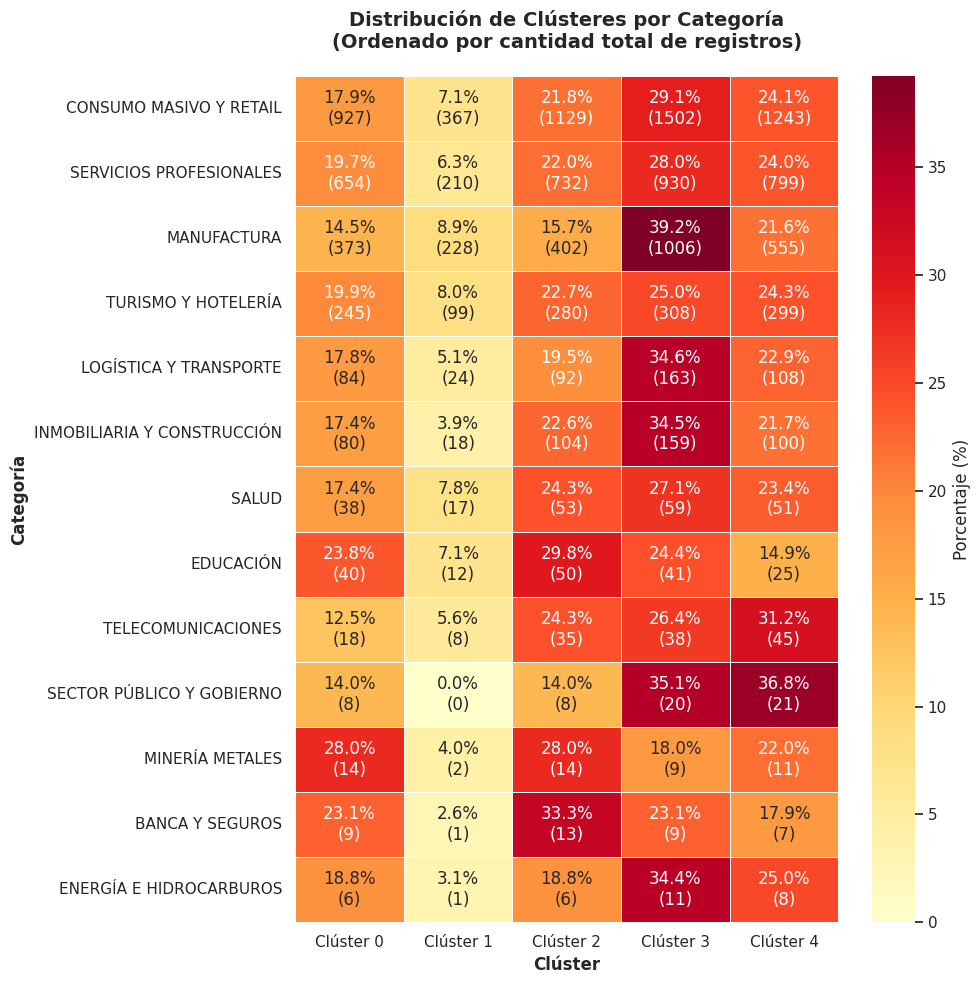


TABLA RESUMEN: DISTRIBUCIÓN DE CLÚSTERES POR CATEGORÍA
CATEGORÍA                                        TOTAL           C0           C1           C2           C3           C4
----------------------------------------------------------------------------------------------------
CONSUMO MASIVO Y RETAIL                           5168  927( 17.9%)  367(  7.1%) 1129( 21.8%) 1502( 29.1%) 1243( 24.1%)
SERVICIOS PROFESIONALES                           3325  654( 19.7%)  210(  6.3%)  732( 22.0%)  930( 28.0%)  799( 24.0%)
MANUFACTURA                                       2564  373( 14.5%)  228(  8.9%)  402( 15.7%) 1006( 39.2%)  555( 21.6%)
TURISMO Y HOTELERÍA                               1231  245( 19.9%)   99(  8.0%)  280( 22.7%)  308( 25.0%)  299( 24.3%)
LOGÍSTICA Y TRANSPORTE                             471   84( 17.8%)   24(  5.1%)   92( 19.5%)  163( 34.6%)  108( 22.9%)
INMOBILIARIA Y CONSTRUCCIÓN                        461   80( 17.4%)   18(  3.9%)  104( 22.6%)  159( 34.5%)  100( 21.7%)
SAL

In [71]:
# HEATMAP: DISTRIBUCIÓN DE CLÚSTERES POR CATEGORÍA
# ================================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Crear tabla cruzada
categoria_cluster = pd.crosstab(df_cluster['CATEGORIA'], df_cluster['CLUSTER'])

# Calcular porcentajes por fila (cada categoría suma 100%)
categoria_cluster_pct = categoria_cluster.div(categoria_cluster.sum(axis=1), axis=0) * 100

# Ordenar por total de registros (de mayor a menor)
totales_por_categoria = categoria_cluster.sum(axis=1).sort_values(ascending=False)
categoria_cluster_ordenado = categoria_cluster.loc[totales_por_categoria.index]
categoria_cluster_pct_ordenado = categoria_cluster_pct.loc[totales_por_categoria.index]

# Crear anotaciones personalizadas: "porcentaje% (cantidad)"
annotations = []
for i in range(len(categoria_cluster_ordenado)):
    row_annotations = []
    for j in range(len(categoria_cluster_ordenado.columns)):
        pct = categoria_cluster_pct_ordenado.iloc[i, j]
        count = categoria_cluster_ordenado.iloc[i, j]
        row_annotations.append(f'{pct:.1f}%\n({int(count)})')
    annotations.append(row_annotations)

# Convertir a array para seaborn
annotations_array = np.array(annotations)

# Crear el heatmap
fig, ax = plt.subplots(figsize=(10, max(10, len(categoria_cluster_ordenado) * 0.4)))

sns.heatmap(categoria_cluster_pct_ordenado,
            annot=annotations_array,
            fmt='',
            cmap='YlOrRd',
            cbar_kws={'label': 'Porcentaje (%)'},
            ax=ax,
            linewidths=0.5,
            linecolor='white')

ax.set_xlabel('Clúster', fontsize=12, fontweight='bold')
ax.set_ylabel('Categoría', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Clústeres por Categoría\n(Ordenado por cantidad total de registros)',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticklabels([f'Clúster {i}' for i in range(5)], rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Tabla resumen textual
print("\n" + "=" * 100)
print("TABLA RESUMEN: DISTRIBUCIÓN DE CLÚSTERES POR CATEGORÍA")
print("=" * 100)
print(f"{'CATEGORÍA':<45} {'TOTAL':>8} {'C0':>12} {'C1':>12} {'C2':>12} {'C3':>12} {'C4':>12}")
print("-" * 100)

for categoria in totales_por_categoria.index:
    total = categoria_cluster_ordenado.loc[categoria].sum()
    print(f"{categoria:<45} {total:>8}", end="")

    for cluster in range(5):
        count = categoria_cluster_ordenado.loc[categoria, cluster]
        pct = categoria_cluster_pct_ordenado.loc[categoria, cluster]
        print(f" {count:>4}({pct:>5.1f}%)", end="")
    print()

print("-" * 100)
total_general = categoria_cluster_ordenado.sum().sum()
print(f"{'TOTAL GENERAL':<45} {total_general:>8}", end="")
for cluster in range(5):
    total_cluster = categoria_cluster_ordenado[cluster].sum()
    pct_cluster = (total_cluster / total_general) * 100
    print(f" {total_cluster:>4}({pct_cluster:>5.1f}%)", end="")
print()
print("=" * 100)

ANÁLISIS: TOP 10 DISTRITOS DE LIMA METROPOLITANA


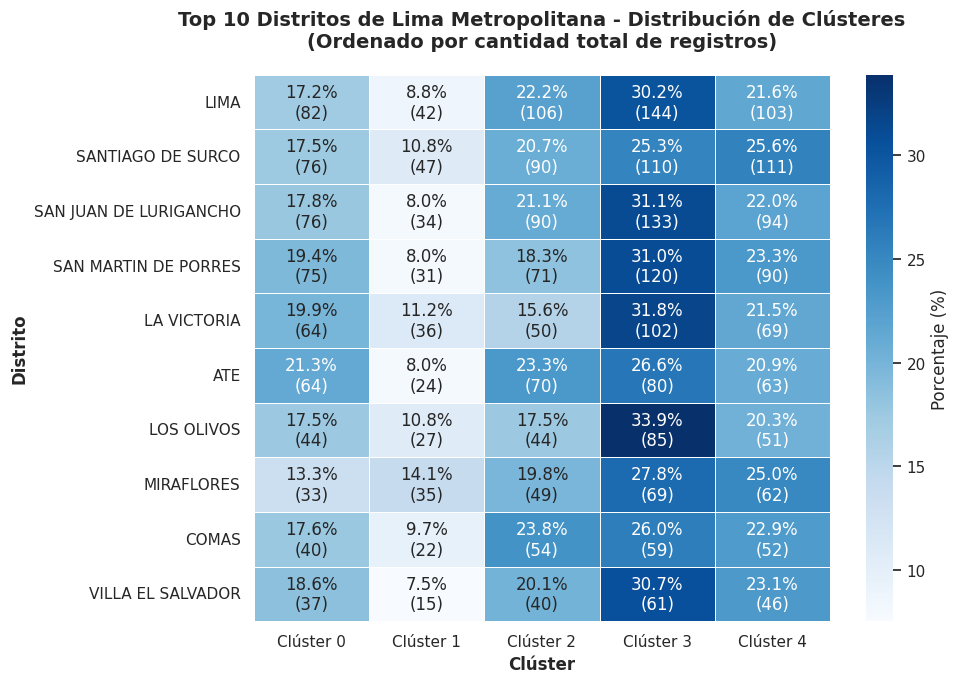


TABLA RESUMEN: TOP 10 DISTRITOS DE LIMA METROPOLITANA
DISTRITO                               TOTAL           C0           C1           C2           C3           C4
----------------------------------------------------------------------------------------------------
LIMA                                     477   82( 17.2%)   42(  8.8%)  106( 22.2%)  144( 30.2%)  103( 21.6%)
SANTIAGO DE SURCO                        434   76( 17.5%)   47( 10.8%)   90( 20.7%)  110( 25.3%)  111( 25.6%)
SAN JUAN DE LURIGANCHO                   427   76( 17.8%)   34(  8.0%)   90( 21.1%)  133( 31.1%)   94( 22.0%)
SAN MARTIN DE PORRES                     387   75( 19.4%)   31(  8.0%)   71( 18.3%)  120( 31.0%)   90( 23.3%)
LA VICTORIA                              321   64( 19.9%)   36( 11.2%)   50( 15.6%)  102( 31.8%)   69( 21.5%)
ATE                                      301   64( 21.3%)   24(  8.0%)   70( 23.3%)   80( 26.6%)   63( 20.9%)
LOS OLIVOS                               251   44( 17.5%)   27( 10.8%)   4

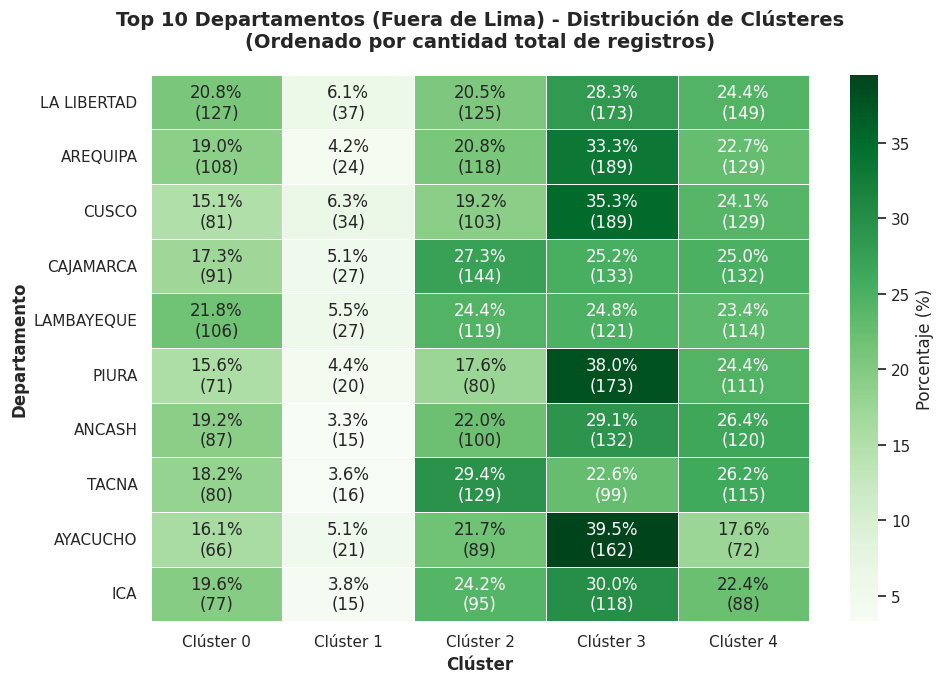


TABLA RESUMEN: TOP 10 DEPARTAMENTOS (FUERA DE LIMA)
DEPARTAMENTO                           TOTAL           C0           C1           C2           C3           C4
----------------------------------------------------------------------------------------------------
LA LIBERTAD                              611  127( 20.8%)   37(  6.1%)  125( 20.5%)  173( 28.3%)  149( 24.4%)
AREQUIPA                                 568  108( 19.0%)   24(  4.2%)  118( 20.8%)  189( 33.3%)  129( 22.7%)
CUSCO                                    536   81( 15.1%)   34(  6.3%)  103( 19.2%)  189( 35.3%)  129( 24.1%)
CAJAMARCA                                527   91( 17.3%)   27(  5.1%)  144( 27.3%)  133( 25.2%)  132( 25.0%)
LAMBAYEQUE                               487  106( 21.8%)   27(  5.5%)  119( 24.4%)  121( 24.8%)  114( 23.4%)
PIURA                                    455   71( 15.6%)   20(  4.4%)   80( 17.6%)  173( 38.0%)  111( 24.4%)
ANCASH                                   454   87( 19.2%)   15(  3.3%)  100(

In [72]:
# HEATMAPS GEOGRÁFICOS: DISTRIBUCIÓN DE CLÚSTERES
# ================================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# =============================================================================
# 1. HEATMAP: TOP 10 DISTRITOS DE LIMA METROPOLITANA
# =============================================================================

print("=" * 100)
print("ANÁLISIS: TOP 10 DISTRITOS DE LIMA METROPOLITANA")
print("=" * 100)

# Filtrar solo Lima Metropolitana
df_lima = df_cluster[df_cluster['UBICACION'] == 'LIMA METROPOLITANA']

# Crear tabla cruzada
distrito_cluster = pd.crosstab(df_lima['DISTRITO'], df_lima['CLUSTER'])

# Calcular porcentajes por fila (cada distrito suma 100%)
distrito_cluster_pct = distrito_cluster.div(distrito_cluster.sum(axis=1), axis=0) * 100

# Obtener top 10 distritos por cantidad total
totales_por_distrito = distrito_cluster.sum(axis=1).sort_values(ascending=False).head(10)
distrito_cluster_top10 = distrito_cluster.loc[totales_por_distrito.index]
distrito_cluster_pct_top10 = distrito_cluster_pct.loc[totales_por_distrito.index]

# Crear anotaciones personalizadas: "porcentaje% (cantidad)"
annotations_distrito = []
for i in range(len(distrito_cluster_top10)):
    row_annotations = []
    for j in range(len(distrito_cluster_top10.columns)):
        pct = distrito_cluster_pct_top10.iloc[i, j]
        count = distrito_cluster_top10.iloc[i, j]
        row_annotations.append(f'{pct:.1f}%\n({int(count)})')
    annotations_distrito.append(row_annotations)

annotations_distrito_array = np.array(annotations_distrito)

# Crear el heatmap para distritos
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(distrito_cluster_pct_top10,
            annot=annotations_distrito_array,
            fmt='',
            cmap='Blues',
            cbar_kws={'label': 'Porcentaje (%)'},
            ax=ax,
            linewidths=0.5,
            linecolor='white')

ax.set_xlabel('Clúster', fontsize=12, fontweight='bold')
ax.set_ylabel('Distrito', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Distritos de Lima Metropolitana - Distribución de Clústeres\n(Ordenado por cantidad total de registros)',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticklabels([f'Clúster {i}' for i in range(5)], rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Tabla resumen textual - Distritos
print("\n" + "=" * 100)
print("TABLA RESUMEN: TOP 10 DISTRITOS DE LIMA METROPOLITANA")
print("=" * 100)
print(f"{'DISTRITO':<35} {'TOTAL':>8} {'C0':>12} {'C1':>12} {'C2':>12} {'C3':>12} {'C4':>12}")
print("-" * 100)

for distrito in totales_por_distrito.index:
    total = distrito_cluster_top10.loc[distrito].sum()
    print(f"{distrito:<35} {total:>8}", end="")

    for cluster in range(5):
        count = distrito_cluster_top10.loc[distrito, cluster]
        pct = distrito_cluster_pct_top10.loc[distrito, cluster]
        print(f" {count:>4}({pct:>5.1f}%)", end="")
    print()

print("-" * 100)
total_top10_distritos = distrito_cluster_top10.sum().sum()
print(f"{'TOTAL TOP 10':<35} {total_top10_distritos:>8}", end="")
for cluster in range(5):
    total_cluster = distrito_cluster_top10[cluster].sum()
    pct_cluster = (total_cluster / total_top10_distritos) * 100
    print(f" {total_cluster:>4}({pct_cluster:>5.1f}%)", end="")
print()
print("=" * 100)
print()

# =============================================================================
# 2. HEATMAP: TOP 10 DEPARTAMENTOS (REGIONES FUERA DE LIMA)
# =============================================================================

print("\n" + "=" * 100)
print("ANÁLISIS: TOP 10 DEPARTAMENTOS (REGIONES FUERA DE LIMA)")
print("=" * 100)

# Filtrar solo fuera de Lima Metropolitana
df_regiones = df_cluster[df_cluster['UBICACION'] != 'LIMA METROPOLITANA']

# Crear tabla cruzada
departamento_cluster = pd.crosstab(df_regiones['DEPARTAMENTO'], df_regiones['CLUSTER'])

# Calcular porcentajes por fila (cada departamento suma 100%)
departamento_cluster_pct = departamento_cluster.div(departamento_cluster.sum(axis=1), axis=0) * 100

# Obtener top 10 departamentos por cantidad total
totales_por_departamento = departamento_cluster.sum(axis=1).sort_values(ascending=False).head(10)
departamento_cluster_top10 = departamento_cluster.loc[totales_por_departamento.index]
departamento_cluster_pct_top10 = departamento_cluster_pct.loc[totales_por_departamento.index]

# Crear anotaciones personalizadas: "porcentaje% (cantidad)"
annotations_depto = []
for i in range(len(departamento_cluster_top10)):
    row_annotations = []
    for j in range(len(departamento_cluster_top10.columns)):
        pct = departamento_cluster_pct_top10.iloc[i, j]
        count = departamento_cluster_top10.iloc[i, j]
        row_annotations.append(f'{pct:.1f}%\n({int(count)})')
    annotations_depto.append(row_annotations)

annotations_depto_array = np.array(annotations_depto)

# Crear el heatmap para departamentos
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(departamento_cluster_pct_top10,
            annot=annotations_depto_array,
            fmt='',
            cmap='Greens',
            cbar_kws={'label': 'Porcentaje (%)'},
            ax=ax,
            linewidths=0.5,
            linecolor='white')

ax.set_xlabel('Clúster', fontsize=12, fontweight='bold')
ax.set_ylabel('Departamento', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Departamentos (Fuera de Lima) - Distribución de Clústeres\n(Ordenado por cantidad total de registros)',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticklabels([f'Clúster {i}' for i in range(5)], rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Tabla resumen textual - Departamentos
print("\n" + "=" * 100)
print("TABLA RESUMEN: TOP 10 DEPARTAMENTOS (FUERA DE LIMA)")
print("=" * 100)
print(f"{'DEPARTAMENTO':<35} {'TOTAL':>8} {'C0':>12} {'C1':>12} {'C2':>12} {'C3':>12} {'C4':>12}")
print("-" * 100)

for departamento in totales_por_departamento.index:
    total = departamento_cluster_top10.loc[departamento].sum()
    print(f"{departamento:<35} {total:>8}", end="")

    for cluster in range(5):
        count = departamento_cluster_top10.loc[departamento, cluster]
        pct = departamento_cluster_pct_top10.loc[departamento, cluster]
        print(f" {count:>4}({pct:>5.1f}%)", end="")
    print()

print("-" * 100)
total_top10_deptos = departamento_cluster_top10.sum().sum()
print(f"{'TOTAL TOP 10':<35} {total_top10_deptos:>8}", end="")
for cluster in range(5):
    total_cluster = departamento_cluster_top10[cluster].sum()
    pct_cluster = (total_cluster / total_top10_deptos) * 100
    print(f" {total_cluster:>4}({pct_cluster:>5.1f}%)", end="")
print()
print("=" * 100)
print()

# =============================================================================
# 3. RESUMEN COMPARATIVO
# =============================================================================

print("\n" + "=" * 100)
print("RESUMEN COMPARATIVO GEOGRÁFICO")
print("=" * 100)

total_lima = len(df_lima)
total_regiones = len(df_regiones)
total_general = len(df_cluster)

print(f"\nDistribución General:")
print(f"  • Lima Metropolitana: {total_lima:,} MYPEs ({total_lima/total_general*100:.1f}%)")
print(f"  • Otras Regiones: {total_regiones:,} MYPEs ({total_regiones/total_general*100:.1f}%)")
print(f"  • TOTAL: {total_general:,} MYPEs")

print(f"\nTop 10 representa:")
print(f"  • Distritos Lima: {total_top10_distritos:,} MYPEs ({total_top10_distritos/total_lima*100:.1f}% de Lima)")
print(f"  • Departamentos: {total_top10_deptos:,} MYPEs ({total_top10_deptos/total_regiones*100:.1f}% de Regiones)")

print("\n" + "=" * 100)

ANÁLISIS DE SIMILITUD - CATEGORÍAS


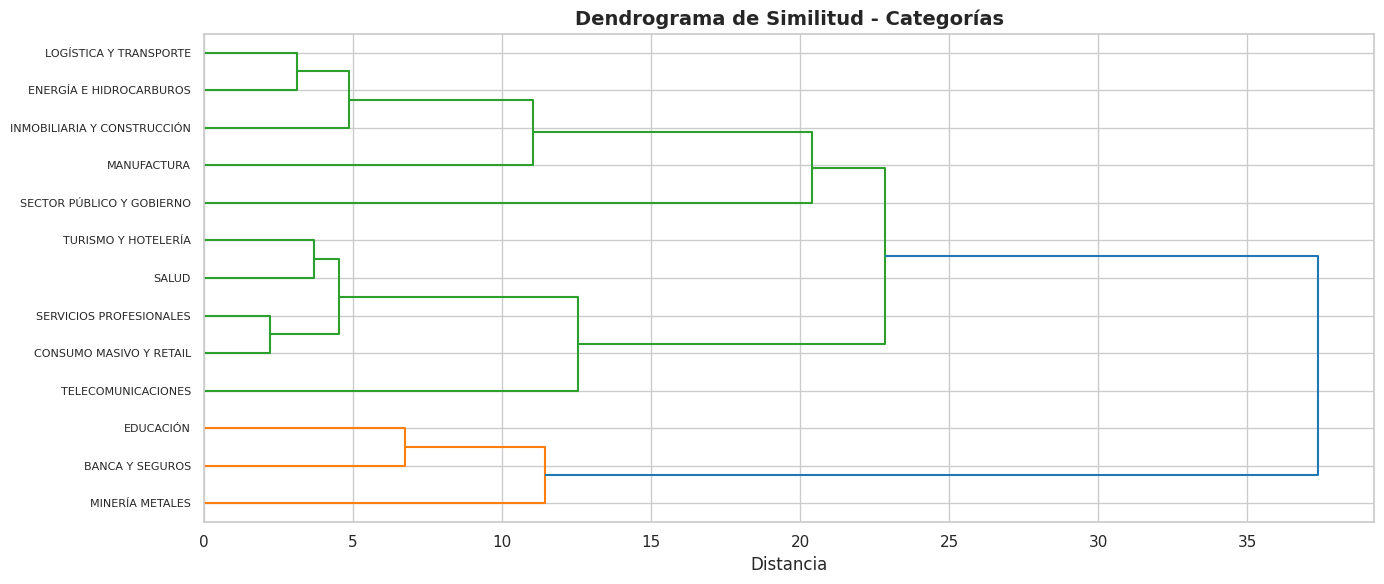


✓ Se encontraron 5 grupos de categorías con perfiles similares:


GRUPO 1 (3 categorías):
  • BANCA Y SEGUROS
  • EDUCACIÓN
  • MINERÍA METALES

Perfil promedio del grupo:
  Clúster 0: 25.0%
  Clúster 1: 4.6%
  Clúster 2: 30.4%
  Clúster 3: 21.8%
  Clúster 4: 18.3%

GRUPO 2 (4 categorías):
  • CONSUMO MASIVO Y RETAIL
  • SALUD
  • SERVICIOS PROFESIONALES
  • TURISMO Y HOTELERÍA

Perfil promedio del grupo:
  Clúster 0: 18.7%
  Clúster 1: 7.3%
  Clúster 2: 22.7%
  Clúster 3: 27.3%
  Clúster 4: 23.9%

GRUPO 3 (4 categorías):
  • ENERGÍA E HIDROCARBUROS
  • INMOBILIARIA Y CONSTRUCCIÓN
  • LOGÍSTICA Y TRANSPORTE
  • MANUFACTURA

Perfil promedio del grupo:
  Clúster 0: 17.1%
  Clúster 1: 5.3%
  Clúster 2: 19.1%
  Clúster 3: 35.7%
  Clúster 4: 22.8%

GRUPO 4 (1 categorías):
  • SECTOR PÚBLICO Y GOBIERNO

Perfil promedio del grupo:
  Clúster 0: 14.0%
  Clúster 1: 0.0%
  Clúster 2: 14.0%
  Clúster 3: 35.1%
  Clúster 4: 36.8%

GRUPO 5 (1 categorías):
  • TELECOMUNICACIONES

Perfil promedio del 

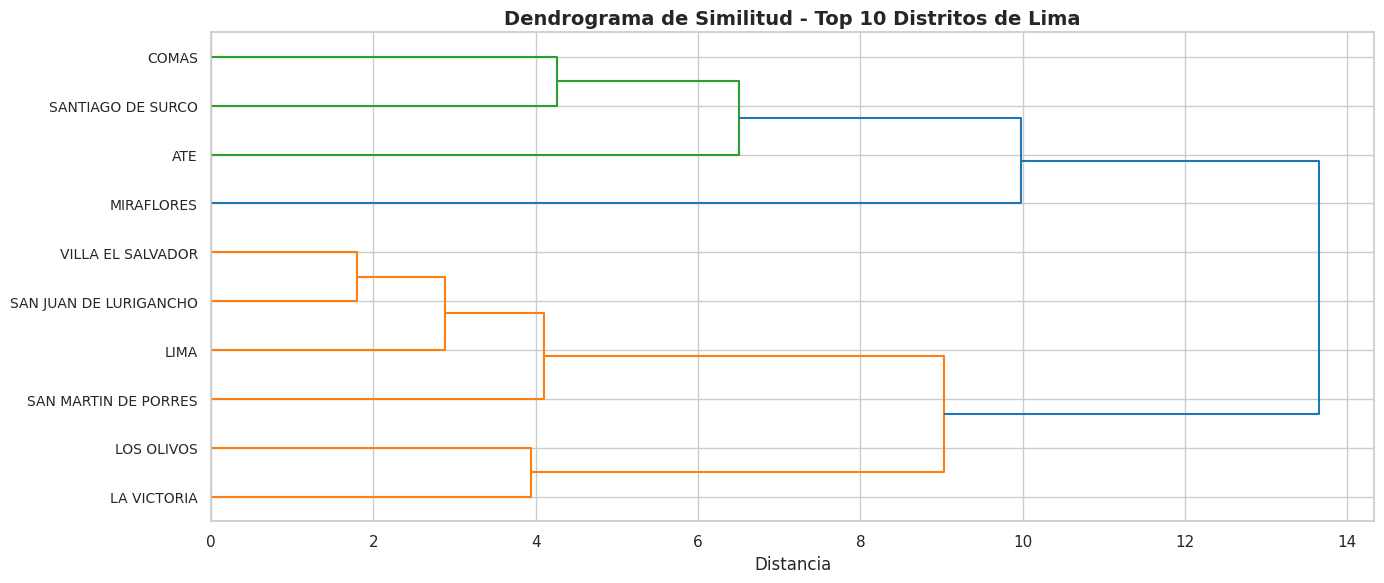


✓ Se encontraron 3 grupos de distritos con perfiles similares:


GRUPO 1 (6 distritos):
  • LIMA
  • SAN JUAN DE LURIGANCHO
  • SAN MARTIN DE PORRES
  • LA VICTORIA
  • LOS OLIVOS
  • VILLA EL SALVADOR

Perfil promedio del grupo:
  Clúster 0: 18.4%
  Clúster 1: 9.0%
  Clúster 2: 19.1%
  Clúster 3: 31.4%
  Clúster 4: 22.0%

GRUPO 2 (3 distritos):
  • SANTIAGO DE SURCO
  • ATE
  • COMAS

Perfil promedio del grupo:
  Clúster 0: 18.8%
  Clúster 1: 9.5%
  Clúster 2: 22.6%
  Clúster 3: 26.0%
  Clúster 4: 23.1%

GRUPO 3 (1 distritos):
  • MIRAFLORES

Perfil promedio del grupo:
  Clúster 0: 13.3%
  Clúster 1: 14.1%
  Clúster 2: 19.8%
  Clúster 3: 27.8%
  Clúster 4: 25.0%


ANÁLISIS DE SIMILITUD - TOP 10 DEPARTAMENTOS


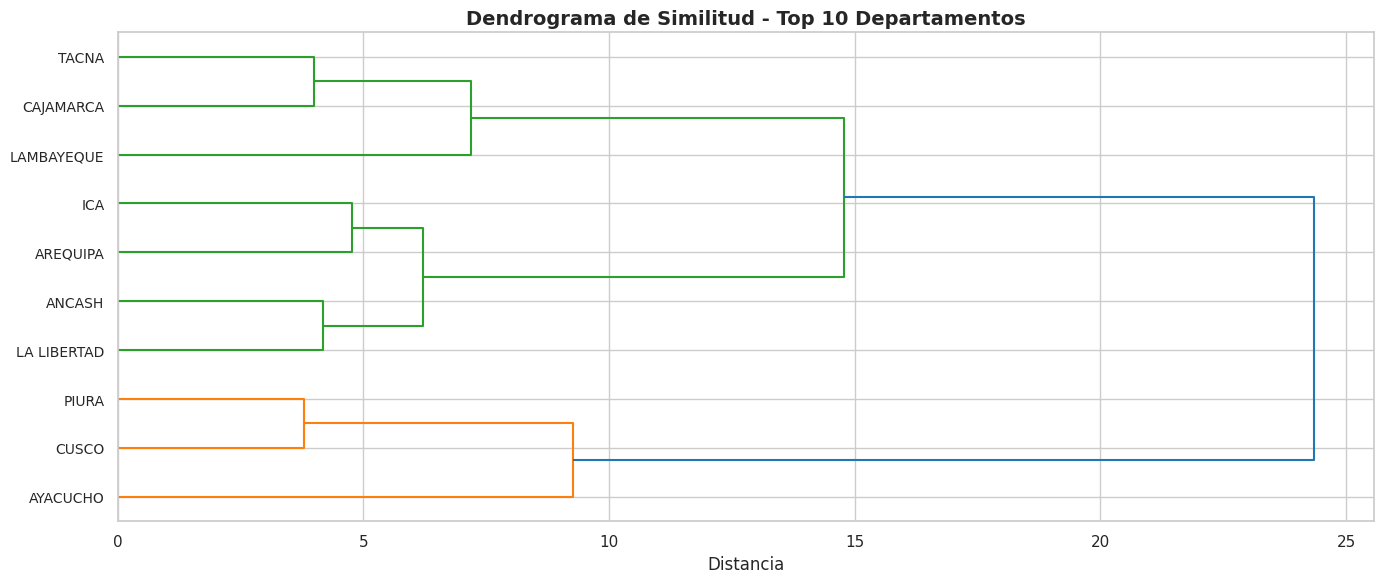


✓ Se encontraron 3 grupos de departamentos con perfiles similares:


GRUPO 1 (3 departamentos):
  • CUSCO
  • PIURA
  • AYACUCHO

Perfil promedio del grupo:
  Clúster 0: 15.6%
  Clúster 1: 5.3%
  Clúster 2: 19.5%
  Clúster 3: 37.6%
  Clúster 4: 22.0%

GRUPO 2 (3 departamentos):
  • CAJAMARCA
  • LAMBAYEQUE
  • TACNA

Perfil promedio del grupo:
  Clúster 0: 19.1%
  Clúster 1: 4.8%
  Clúster 2: 27.0%
  Clúster 3: 24.2%
  Clúster 4: 24.9%

GRUPO 3 (4 departamentos):
  • LA LIBERTAD
  • AREQUIPA
  • ANCASH
  • ICA

Perfil promedio del grupo:
  Clúster 0: 19.6%
  Clúster 1: 4.4%
  Clúster 2: 21.9%
  Clúster 3: 30.2%
  Clúster 4: 24.0%


VISUALIZACIÓN DE PERFILES PROMEDIO POR GRUPO


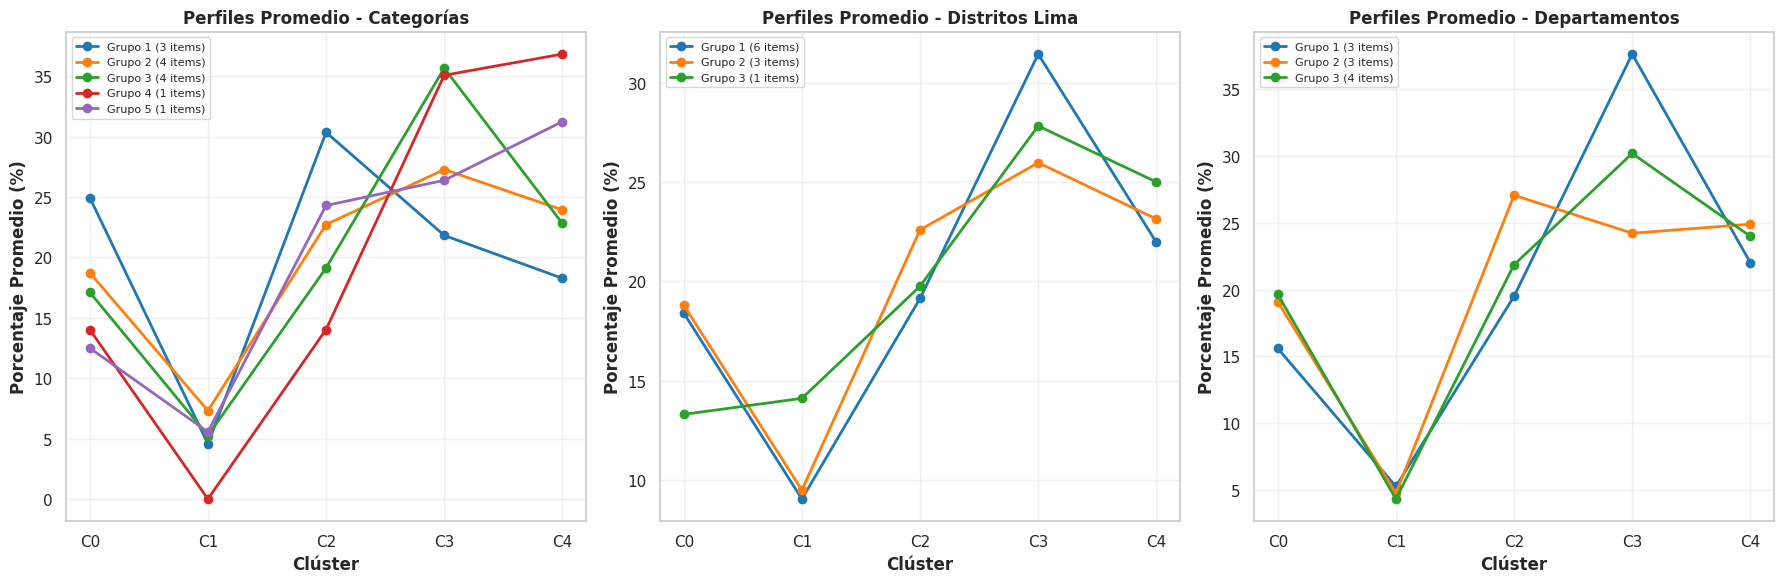


ANÁLISIS COMPLETADO

Interpretación:
• Los elementos en el mismo grupo tienen distribuciones similares de clústeres
• Los dendrogramas muestran la jerarquía de similitud
• Puedes ajustar 'n_grupos_cat', 'n_grupos_dist' y 'n_grupos_depto' para más/menos grupos


In [75]:
# AGRUPACIÓN POR SIMILITUD DE PERFILES DE CLÚSTERES
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# =============================================================================
# 1. PREPARAR DATOS DE CATEGORÍAS
# =============================================================================

print("=" * 100)
print("ANÁLISIS DE SIMILITUD - CATEGORÍAS")
print("=" * 100)

# Tabla cruzada y porcentajes
categoria_cluster = pd.crosstab(df_cluster['CATEGORIA'], df_cluster['CLUSTER'])
categoria_cluster_pct = categoria_cluster.div(categoria_cluster.sum(axis=1), axis=0) * 100

# Matriz de distancias (usando distancia euclidiana)
distancias_categorias = pdist(categoria_cluster_pct.values, metric='euclidean')
matriz_dist_cat = squareform(distancias_categorias)

# Clustering jerárquico
n_grupos_cat = 5  # Puedes ajustar este número
clustering_cat = AgglomerativeClustering(n_clusters=n_grupos_cat, linkage='ward')
grupos_cat = clustering_cat.fit_predict(categoria_cluster_pct.values)

# Agregar grupo al dataframe
categoria_cluster_pct['GRUPO'] = grupos_cat

# Visualizar dendrograma
fig, ax = plt.subplots(figsize=(14, 6))
linkage_matrix = linkage(categoria_cluster_pct.drop('GRUPO', axis=1).values, method='ward')
dendrogram(linkage_matrix, labels=categoria_cluster_pct.index.tolist(),
           ax=ax, leaf_font_size=8, orientation='right')
ax.set_title('Dendrograma de Similitud - Categorías', fontweight='bold', fontsize=14)
ax.set_xlabel('Distancia')
plt.tight_layout()
plt.show()

# Mostrar grupos encontrados
print(f"\n✓ Se encontraron {n_grupos_cat} grupos de categorías con perfiles similares:\n")
for grupo in range(n_grupos_cat):
    categorias_grupo = categoria_cluster_pct[categoria_cluster_pct['GRUPO'] == grupo].index.tolist()
    print(f"\n{'='*80}")
    print(f"GRUPO {grupo + 1} ({len(categorias_grupo)} categorías):")
    print(f"{'='*80}")
    for cat in categorias_grupo:
        print(f"  • {cat}")

    # Perfil promedio del grupo
    perfil_promedio = categoria_cluster_pct[categoria_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    print(f"\nPerfil promedio del grupo:")
    for cluster in range(5):
        print(f"  Clúster {cluster}: {perfil_promedio[cluster]:.1f}%")

# =============================================================================
# 2. PREPARAR DATOS DE DISTRITOS DE LIMA (TOP 10)
# =============================================================================

print("\n\n" + "=" * 100)
print("ANÁLISIS DE SIMILITUD - TOP 10 DISTRITOS DE LIMA METROPOLITANA")
print("=" * 100)

df_lima = df_cluster[df_cluster['UBICACION'] == 'LIMA METROPOLITANA']
distrito_cluster = pd.crosstab(df_lima['DISTRITO'], df_lima['CLUSTER'])
distrito_cluster_pct = distrito_cluster.div(distrito_cluster.sum(axis=1), axis=0) * 100

# Filtrar solo TOP 10
totales_distrito = distrito_cluster.sum(axis=1).sort_values(ascending=False).head(10)
distrito_cluster_pct = distrito_cluster_pct.loc[totales_distrito.index]

# Clustering jerárquico
n_grupos_dist = 3  # Ajustado para TOP 10
clustering_dist = AgglomerativeClustering(n_clusters=n_grupos_dist, linkage='ward')
grupos_dist = clustering_dist.fit_predict(distrito_cluster_pct.values)

distrito_cluster_pct['GRUPO'] = grupos_dist

# Visualizar dendrograma
fig, ax = plt.subplots(figsize=(14, 6))
linkage_matrix_dist = linkage(distrito_cluster_pct.drop('GRUPO', axis=1).values, method='ward')
dendrogram(linkage_matrix_dist, labels=distrito_cluster_pct.index.tolist(),
           ax=ax, leaf_font_size=10, orientation='right')
ax.set_title('Dendrograma de Similitud - Top 10 Distritos de Lima', fontweight='bold', fontsize=14)
ax.set_xlabel('Distancia')
plt.tight_layout()
plt.show()

# Mostrar grupos encontrados
print(f"\n✓ Se encontraron {n_grupos_dist} grupos de distritos con perfiles similares:\n")
for grupo in range(n_grupos_dist):
    distritos_grupo = distrito_cluster_pct[distrito_cluster_pct['GRUPO'] == grupo].index.tolist()
    print(f"\n{'='*80}")
    print(f"GRUPO {grupo + 1} ({len(distritos_grupo)} distritos):")
    print(f"{'='*80}")
    for dist in distritos_grupo:
        print(f"  • {dist}")

    # Perfil promedio del grupo
    perfil_promedio = distrito_cluster_pct[distrito_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    print(f"\nPerfil promedio del grupo:")
    for cluster in range(5):
        print(f"  Clúster {cluster}: {perfil_promedio[cluster]:.1f}%")

# =============================================================================
# 3. PREPARAR DATOS DE DEPARTAMENTOS (TOP 10)
# =============================================================================

print("\n\n" + "=" * 100)
print("ANÁLISIS DE SIMILITUD - TOP 10 DEPARTAMENTOS")
print("=" * 100)

df_regiones = df_cluster[df_cluster['UBICACION'] != 'LIMA METROPOLITANA']
departamento_cluster = pd.crosstab(df_regiones['DEPARTAMENTO'], df_regiones['CLUSTER'])
departamento_cluster_pct = departamento_cluster.div(departamento_cluster.sum(axis=1), axis=0) * 100

# Filtrar solo TOP 10
totales_depto = departamento_cluster.sum(axis=1).sort_values(ascending=False).head(10)
departamento_cluster_pct = departamento_cluster_pct.loc[totales_depto.index]

# Clustering jerárquico
n_grupos_depto = 3  # Ajustado para TOP 10
clustering_depto = AgglomerativeClustering(n_clusters=n_grupos_depto, linkage='ward')
grupos_depto = clustering_depto.fit_predict(departamento_cluster_pct.values)

departamento_cluster_pct['GRUPO'] = grupos_depto

# Visualizar dendrograma
fig, ax = plt.subplots(figsize=(14, 6))
linkage_matrix_depto = linkage(departamento_cluster_pct.drop('GRUPO', axis=1).values, method='ward')
dendrogram(linkage_matrix_depto, labels=departamento_cluster_pct.index.tolist(),
           ax=ax, leaf_font_size=10, orientation='right')
ax.set_title('Dendrograma de Similitud - Top 10 Departamentos', fontweight='bold', fontsize=14)
ax.set_xlabel('Distancia')
plt.tight_layout()
plt.show()

# Mostrar grupos encontrados
print(f"\n✓ Se encontraron {n_grupos_depto} grupos de departamentos con perfiles similares:\n")
for grupo in range(n_grupos_depto):
    deptos_grupo = departamento_cluster_pct[departamento_cluster_pct['GRUPO'] == grupo].index.tolist()
    print(f"\n{'='*80}")
    print(f"GRUPO {grupo + 1} ({len(deptos_grupo)} departamentos):")
    print(f"{'='*80}")
    for depto in deptos_grupo:
        print(f"  • {depto}")

    # Perfil promedio del grupo
    perfil_promedio = departamento_cluster_pct[departamento_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    print(f"\nPerfil promedio del grupo:")
    for cluster in range(5):
        print(f"  Clúster {cluster}: {perfil_promedio[cluster]:.1f}%")

# =============================================================================
# 4. VISUALIZACIÓN COMPARATIVA DE PERFILES
# =============================================================================

print("\n\n" + "=" * 100)
print("VISUALIZACIÓN DE PERFILES PROMEDIO POR GRUPO")
print("=" * 100)

# Gráfico para categorías
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Categorías
ax = axes[0]
for grupo in range(n_grupos_cat):
    perfil = categoria_cluster_pct[categoria_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    ax.plot(range(5), perfil.values, marker='o', linewidth=2,
            label=f'Grupo {grupo + 1} ({(categoria_cluster_pct["GRUPO"] == grupo).sum()} items)')
ax.set_xlabel('Clúster', fontweight='bold')
ax.set_ylabel('Porcentaje Promedio (%)', fontweight='bold')
ax.set_title('Perfiles Promedio - Categorías', fontweight='bold')
ax.set_xticks(range(5))
ax.set_xticklabels([f'C{i}' for i in range(5)])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

# Distritos
ax = axes[1]
for grupo in range(n_grupos_dist):
    perfil = distrito_cluster_pct[distrito_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    ax.plot(range(5), perfil.values, marker='o', linewidth=2,
            label=f'Grupo {grupo + 1} ({(distrito_cluster_pct["GRUPO"] == grupo).sum()} items)')
ax.set_xlabel('Clúster', fontweight='bold')
ax.set_ylabel('Porcentaje Promedio (%)', fontweight='bold')
ax.set_title('Perfiles Promedio - Distritos Lima', fontweight='bold')
ax.set_xticks(range(5))
ax.set_xticklabels([f'C{i}' for i in range(5)])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

# Departamentos
ax = axes[2]
for grupo in range(n_grupos_depto):
    perfil = departamento_cluster_pct[departamento_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    ax.plot(range(5), perfil.values, marker='o', linewidth=2,
            label=f'Grupo {grupo + 1} ({(departamento_cluster_pct["GRUPO"] == grupo).sum()} items)')
ax.set_xlabel('Clúster', fontweight='bold')
ax.set_ylabel('Porcentaje Promedio (%)', fontweight='bold')
ax.set_title('Perfiles Promedio - Departamentos', fontweight='bold')
ax.set_xticks(range(5))
ax.set_xticklabels([f'C{i}' for i in range(5)])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("ANÁLISIS COMPLETADO")
print("=" * 100)
print("\nInterpretación:")
print("• Los elementos en el mismo grupo tienen distribuciones similares de clústeres")
print("• Los dendrogramas muestran la jerarquía de similitud")
print("• Puedes ajustar 'n_grupos_cat', 'n_grupos_dist' y 'n_grupos_depto' para más/menos grupos")

ANÁLISIS DE SIMILITUD - CATEGORÍAS


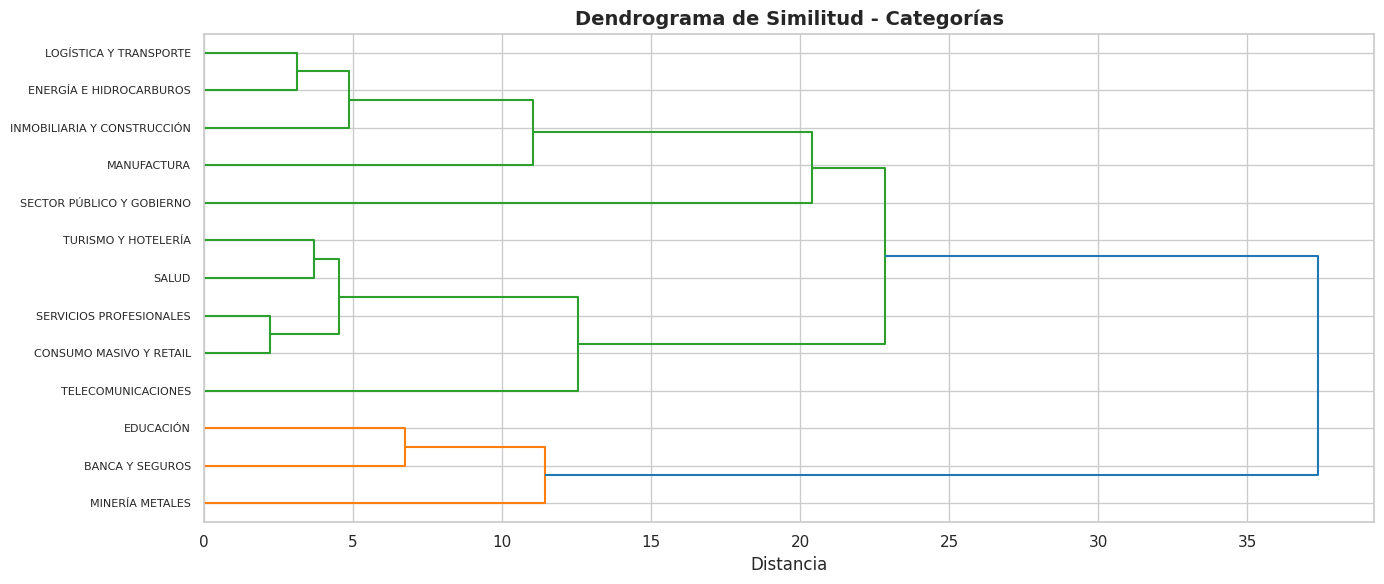


✓ Se encontraron 5 grupos de categorías con perfiles similares:


GRUPO 1 (3 categorías):
  • BANCA Y SEGUROS
  • EDUCACIÓN
  • MINERÍA METALES

Perfil promedio del grupo:
  Clúster 0: 25.0%
  Clúster 1: 4.6%
  Clúster 2: 30.4%
  Clúster 3: 21.8%
  Clúster 4: 18.3%

GRUPO 2 (4 categorías):
  • CONSUMO MASIVO Y RETAIL
  • SALUD
  • SERVICIOS PROFESIONALES
  • TURISMO Y HOTELERÍA

Perfil promedio del grupo:
  Clúster 0: 18.7%
  Clúster 1: 7.3%
  Clúster 2: 22.7%
  Clúster 3: 27.3%
  Clúster 4: 23.9%

GRUPO 3 (4 categorías):
  • ENERGÍA E HIDROCARBUROS
  • INMOBILIARIA Y CONSTRUCCIÓN
  • LOGÍSTICA Y TRANSPORTE
  • MANUFACTURA

Perfil promedio del grupo:
  Clúster 0: 17.1%
  Clúster 1: 5.3%
  Clúster 2: 19.1%
  Clúster 3: 35.7%
  Clúster 4: 22.8%

GRUPO 4 (1 categorías):
  • SECTOR PÚBLICO Y GOBIERNO

Perfil promedio del grupo:
  Clúster 0: 14.0%
  Clúster 1: 0.0%
  Clúster 2: 14.0%
  Clúster 3: 35.1%
  Clúster 4: 36.8%

GRUPO 5 (1 categorías):
  • TELECOMUNICACIONES

Perfil promedio del 

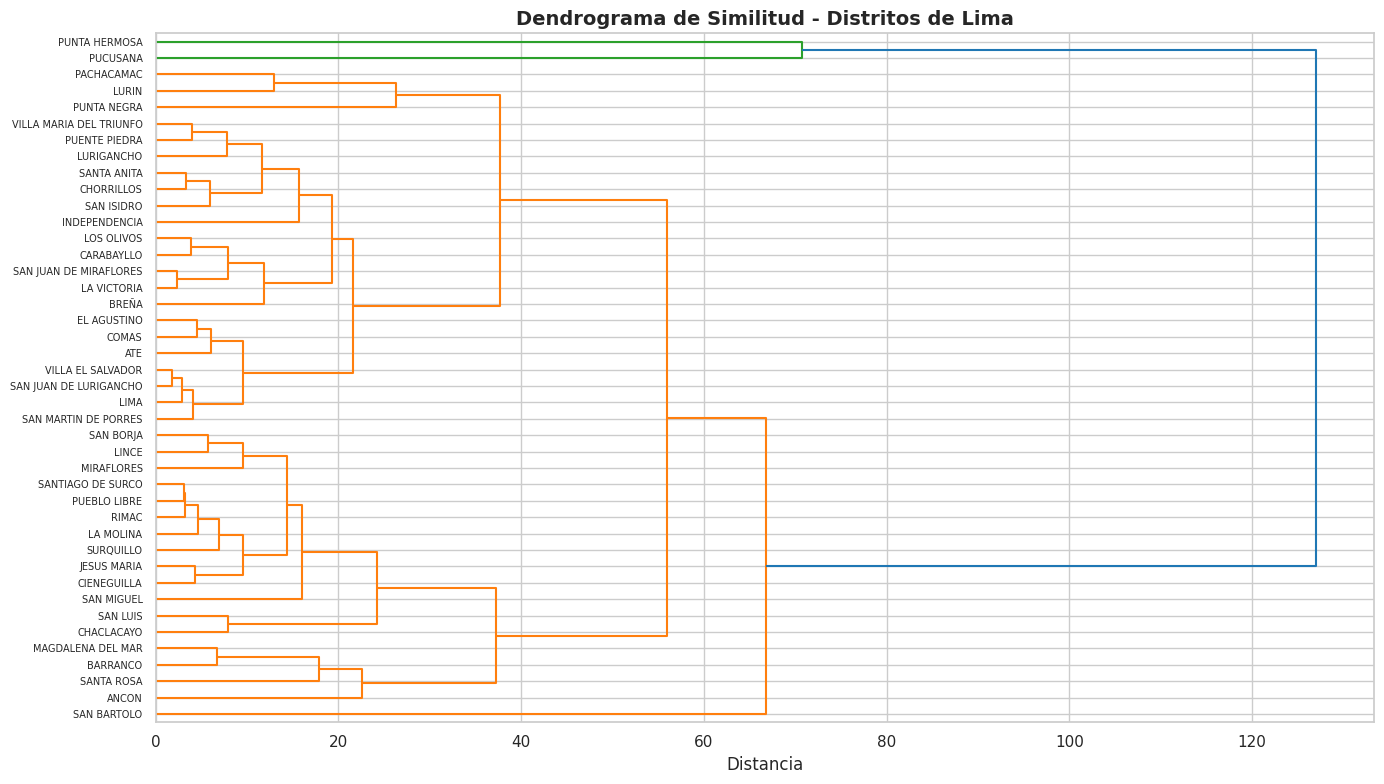


✓ Se encontraron 5 grupos de distritos con perfiles similares:


GRUPO 1 (22 distritos):
  • ATE
  • BREÑA
  • CARABAYLLO
  • CHORRILLOS
  • COMAS
  • EL AGUSTINO
  • INDEPENDENCIA
  • LA VICTORIA
  • LIMA
  • LOS OLIVOS
  • LURIGANCHO
  • LURIN
  • PACHACAMAC
  • PUENTE PIEDRA
  • PUNTA NEGRA
  • SAN ISIDRO
  • SAN JUAN DE LURIGANCHO
  • SAN JUAN DE MIRAFLORES
  • SAN MARTIN DE PORRES
  • SANTA ANITA
  • VILLA EL SALVADOR
  • VILLA MARIA DEL TRIUNFO

Perfil promedio del grupo:
  Clúster 0: 16.4%
  Clúster 1: 7.7%
  Clúster 2: 18.9%
  Clúster 3: 34.2%
  Clúster 4: 22.7%

GRUPO 2 (17 distritos):
  • ANCON
  • BARRANCO
  • CHACLACAYO
  • CIENEGUILLA
  • JESUS MARIA
  • LA MOLINA
  • LINCE
  • MAGDALENA DEL MAR
  • MIRAFLORES
  • PUEBLO LIBRE
  • RIMAC
  • SAN BORJA
  • SAN LUIS
  • SAN MIGUEL
  • SANTA ROSA
  • SANTIAGO DE SURCO
  • SURQUILLO

Perfil promedio del grupo:
  Clúster 0: 19.7%
  Clúster 1: 11.8%
  Clúster 2: 21.3%
  Clúster 3: 22.9%
  Clúster 4: 24.4%

GRUPO 3 (1 distritos):

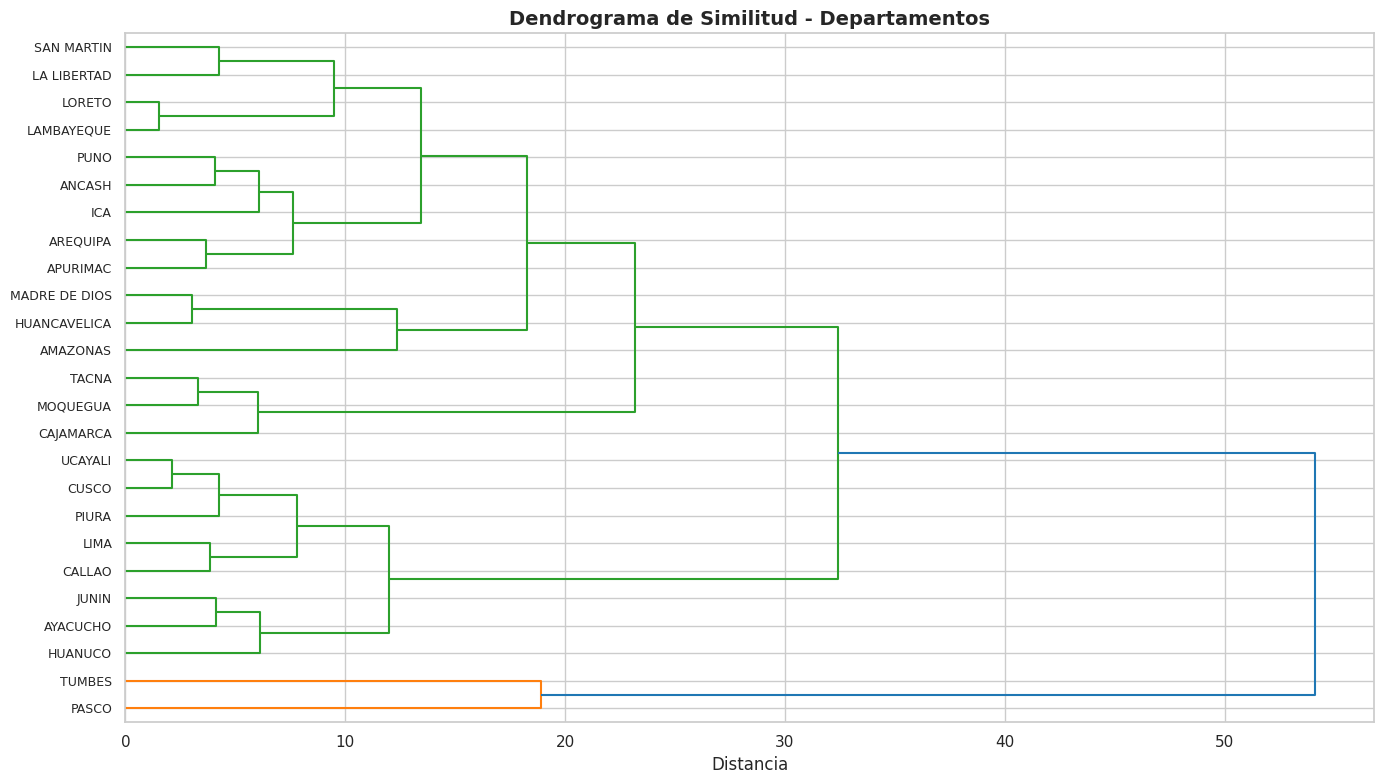


✓ Se encontraron 4 grupos de departamentos con perfiles similares:


GRUPO 1 (2 departamentos):
  • PASCO
  • TUMBES

Perfil promedio del grupo:
  Clúster 0: 6.3%
  Clúster 1: 4.5%
  Clúster 2: 11.0%
  Clúster 3: 55.1%
  Clúster 4: 23.0%

GRUPO 2 (12 departamentos):
  • AMAZONAS
  • ANCASH
  • APURIMAC
  • AREQUIPA
  • HUANCAVELICA
  • ICA
  • LA LIBERTAD
  • LAMBAYEQUE
  • LORETO
  • MADRE DE DIOS
  • PUNO
  • SAN MARTIN

Perfil promedio del grupo:
  Clúster 0: 18.0%
  Clúster 1: 3.9%
  Clúster 2: 22.4%
  Clúster 3: 30.6%
  Clúster 4: 25.2%

GRUPO 3 (8 departamentos):
  • AYACUCHO
  • CALLAO
  • CUSCO
  • HUANUCO
  • JUNIN
  • LIMA
  • PIURA
  • UCAYALI

Perfil promedio del grupo:
  Clúster 0: 16.1%
  Clúster 1: 6.5%
  Clúster 2: 19.3%
  Clúster 3: 36.6%
  Clúster 4: 21.6%

GRUPO 4 (3 departamentos):
  • CAJAMARCA
  • MOQUEGUA
  • TACNA

Perfil promedio del grupo:
  Clúster 0: 17.7%
  Clúster 1: 4.2%
  Clúster 2: 29.6%
  Clúster 3: 22.9%
  Clúster 4: 25.6%


VISUALIZACIÓN DE PERFILES

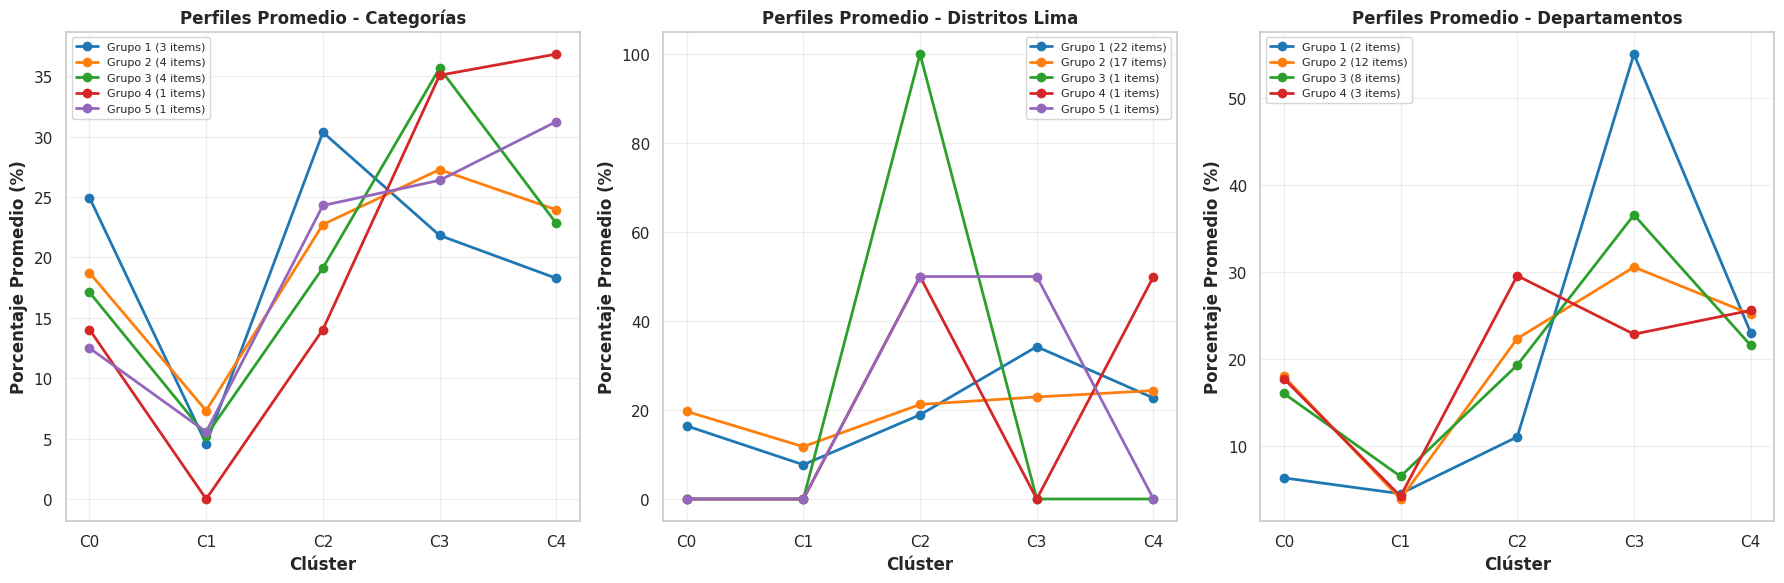


ANÁLISIS COMPLETADO

Interpretación:
• Los elementos en el mismo grupo tienen distribuciones similares de clústeres
• Los dendrogramas muestran la jerarquía de similitud
• Puedes ajustar 'n_grupos_cat', 'n_grupos_dist' y 'n_grupos_depto' para más/menos grupos


In [74]:
# AGRUPACIÓN POR SIMILITUD DE PERFILES DE CLÚSTERES
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# =============================================================================
# 1. PREPARAR DATOS DE CATEGORÍAS
# =============================================================================

print("=" * 100)
print("ANÁLISIS DE SIMILITUD - CATEGORÍAS")
print("=" * 100)

# Tabla cruzada y porcentajes
categoria_cluster = pd.crosstab(df_cluster['CATEGORIA'], df_cluster['CLUSTER'])
categoria_cluster_pct = categoria_cluster.div(categoria_cluster.sum(axis=1), axis=0) * 100

# Matriz de distancias (usando distancia euclidiana)
distancias_categorias = pdist(categoria_cluster_pct.values, metric='euclidean')
matriz_dist_cat = squareform(distancias_categorias)

# Clustering jerárquico
n_grupos_cat = 5  # Puedes ajustar este número
clustering_cat = AgglomerativeClustering(n_clusters=n_grupos_cat, linkage='ward')
grupos_cat = clustering_cat.fit_predict(categoria_cluster_pct.values)

# Agregar grupo al dataframe
categoria_cluster_pct['GRUPO'] = grupos_cat

# Visualizar dendrograma
fig, ax = plt.subplots(figsize=(14, 6))
linkage_matrix = linkage(categoria_cluster_pct.drop('GRUPO', axis=1).values, method='ward')
dendrogram(linkage_matrix, labels=categoria_cluster_pct.index.tolist(),
           ax=ax, leaf_font_size=8, orientation='right')
ax.set_title('Dendrograma de Similitud - Categorías', fontweight='bold', fontsize=14)
ax.set_xlabel('Distancia')
plt.tight_layout()
plt.show()

# Mostrar grupos encontrados
print(f"\n✓ Se encontraron {n_grupos_cat} grupos de categorías con perfiles similares:\n")
for grupo in range(n_grupos_cat):
    categorias_grupo = categoria_cluster_pct[categoria_cluster_pct['GRUPO'] == grupo].index.tolist()
    print(f"\n{'='*80}")
    print(f"GRUPO {grupo + 1} ({len(categorias_grupo)} categorías):")
    print(f"{'='*80}")
    for cat in categorias_grupo:
        print(f"  • {cat}")

    # Perfil promedio del grupo
    perfil_promedio = categoria_cluster_pct[categoria_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    print(f"\nPerfil promedio del grupo:")
    for cluster in range(5):
        print(f"  Clúster {cluster}: {perfil_promedio[cluster]:.1f}%")

# =============================================================================
# 2. PREPARAR DATOS DE DISTRITOS DE LIMA
# =============================================================================

print("\n\n" + "=" * 100)
print("ANÁLISIS DE SIMILITUD - DISTRITOS DE LIMA METROPOLITANA")
print("=" * 100)

df_lima = df_cluster[df_cluster['UBICACION'] == 'LIMA METROPOLITANA']
distrito_cluster = pd.crosstab(df_lima['DISTRITO'], df_lima['CLUSTER'])
distrito_cluster_pct = distrito_cluster.div(distrito_cluster.sum(axis=1), axis=0) * 100

# Clustering jerárquico
n_grupos_dist = 5  # Puedes ajustar este número
clustering_dist = AgglomerativeClustering(n_clusters=n_grupos_dist, linkage='ward')
grupos_dist = clustering_dist.fit_predict(distrito_cluster_pct.values)

distrito_cluster_pct['GRUPO'] = grupos_dist

# Visualizar dendrograma
fig, ax = plt.subplots(figsize=(14, max(8, len(distrito_cluster_pct) * 0.15)))
linkage_matrix_dist = linkage(distrito_cluster_pct.drop('GRUPO', axis=1).values, method='ward')
dendrogram(linkage_matrix_dist, labels=distrito_cluster_pct.index.tolist(),
           ax=ax, leaf_font_size=7, orientation='right')
ax.set_title('Dendrograma de Similitud - Distritos de Lima', fontweight='bold', fontsize=14)
ax.set_xlabel('Distancia')
plt.tight_layout()
plt.show()

# Mostrar grupos encontrados
print(f"\n✓ Se encontraron {n_grupos_dist} grupos de distritos con perfiles similares:\n")
for grupo in range(n_grupos_dist):
    distritos_grupo = distrito_cluster_pct[distrito_cluster_pct['GRUPO'] == grupo].index.tolist()
    print(f"\n{'='*80}")
    print(f"GRUPO {grupo + 1} ({len(distritos_grupo)} distritos):")
    print(f"{'='*80}")
    for dist in distritos_grupo:
        print(f"  • {dist}")

    # Perfil promedio del grupo
    perfil_promedio = distrito_cluster_pct[distrito_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    print(f"\nPerfil promedio del grupo:")
    for cluster in range(5):
        print(f"  Clúster {cluster}: {perfil_promedio[cluster]:.1f}%")

# =============================================================================
# 3. PREPARAR DATOS DE DEPARTAMENTOS
# =============================================================================

print("\n\n" + "=" * 100)
print("ANÁLISIS DE SIMILITUD - DEPARTAMENTOS")
print("=" * 100)

df_regiones = df_cluster[df_cluster['UBICACION'] != 'LIMA METROPOLITANA']
departamento_cluster = pd.crosstab(df_regiones['DEPARTAMENTO'], df_regiones['CLUSTER'])
departamento_cluster_pct = departamento_cluster.div(departamento_cluster.sum(axis=1), axis=0) * 100

# Clustering jerárquico
n_grupos_depto = 4  # Puedes ajustar este número
clustering_depto = AgglomerativeClustering(n_clusters=n_grupos_depto, linkage='ward')
grupos_depto = clustering_depto.fit_predict(departamento_cluster_pct.values)

departamento_cluster_pct['GRUPO'] = grupos_depto

# Visualizar dendrograma
fig, ax = plt.subplots(figsize=(14, 8))
linkage_matrix_depto = linkage(departamento_cluster_pct.drop('GRUPO', axis=1).values, method='ward')
dendrogram(linkage_matrix_depto, labels=departamento_cluster_pct.index.tolist(),
           ax=ax, leaf_font_size=9, orientation='right')
ax.set_title('Dendrograma de Similitud - Departamentos', fontweight='bold', fontsize=14)
ax.set_xlabel('Distancia')
plt.tight_layout()
plt.show()

# Mostrar grupos encontrados
print(f"\n✓ Se encontraron {n_grupos_depto} grupos de departamentos con perfiles similares:\n")
for grupo in range(n_grupos_depto):
    deptos_grupo = departamento_cluster_pct[departamento_cluster_pct['GRUPO'] == grupo].index.tolist()
    print(f"\n{'='*80}")
    print(f"GRUPO {grupo + 1} ({len(deptos_grupo)} departamentos):")
    print(f"{'='*80}")
    for depto in deptos_grupo:
        print(f"  • {depto}")

    # Perfil promedio del grupo
    perfil_promedio = departamento_cluster_pct[departamento_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    print(f"\nPerfil promedio del grupo:")
    for cluster in range(5):
        print(f"  Clúster {cluster}: {perfil_promedio[cluster]:.1f}%")

# =============================================================================
# 4. VISUALIZACIÓN COMPARATIVA DE PERFILES
# =============================================================================

print("\n\n" + "=" * 100)
print("VISUALIZACIÓN DE PERFILES PROMEDIO POR GRUPO")
print("=" * 100)

# Gráfico para categorías
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Categorías
ax = axes[0]
for grupo in range(n_grupos_cat):
    perfil = categoria_cluster_pct[categoria_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    ax.plot(range(5), perfil.values, marker='o', linewidth=2,
            label=f'Grupo {grupo + 1} ({(categoria_cluster_pct["GRUPO"] == grupo).sum()} items)')
ax.set_xlabel('Clúster', fontweight='bold')
ax.set_ylabel('Porcentaje Promedio (%)', fontweight='bold')
ax.set_title('Perfiles Promedio - Categorías', fontweight='bold')
ax.set_xticks(range(5))
ax.set_xticklabels([f'C{i}' for i in range(5)])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

# Distritos
ax = axes[1]
for grupo in range(n_grupos_dist):
    perfil = distrito_cluster_pct[distrito_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    ax.plot(range(5), perfil.values, marker='o', linewidth=2,
            label=f'Grupo {grupo + 1} ({(distrito_cluster_pct["GRUPO"] == grupo).sum()} items)')
ax.set_xlabel('Clúster', fontweight='bold')
ax.set_ylabel('Porcentaje Promedio (%)', fontweight='bold')
ax.set_title('Perfiles Promedio - Distritos Lima', fontweight='bold')
ax.set_xticks(range(5))
ax.set_xticklabels([f'C{i}' for i in range(5)])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

# Departamentos
ax = axes[2]
for grupo in range(n_grupos_depto):
    perfil = departamento_cluster_pct[departamento_cluster_pct['GRUPO'] == grupo].drop('GRUPO', axis=1).mean()
    ax.plot(range(5), perfil.values, marker='o', linewidth=2,
            label=f'Grupo {grupo + 1} ({(departamento_cluster_pct["GRUPO"] == grupo).sum()} items)')
ax.set_xlabel('Clúster', fontweight='bold')
ax.set_ylabel('Porcentaje Promedio (%)', fontweight='bold')
ax.set_title('Perfiles Promedio - Departamentos', fontweight='bold')
ax.set_xticks(range(5))
ax.set_xticklabels([f'C{i}' for i in range(5)])
ax.legend(fontsize=8)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("ANÁLISIS COMPLETADO")
print("=" * 100)
print("\nInterpretación:")
print("• Los elementos en el mismo grupo tienen distribuciones similares de clústeres")
print("• Los dendrogramas muestran la jerarquía de similitud")
print("• Puedes ajustar 'n_grupos_cat', 'n_grupos_dist' y 'n_grupos_depto' para más/menos grupos")